In [1]:
import logging
import tensorflow as tf

from src.common.logs import setup_logging
from src.models_service.models_service import TensorflowModelTuningService as TFMTS
from env import Env


logger = setup_logging(logger_name=__name__,
                        console_level=logging.INFO, 
                        log_file_level=logging.INFO)

config = {
    'AV': {
        'key': '',
        'ticker': 'VGT',
        'outputsize': 'full',
        'key_adjusted_close': 'Adj Close',
        'key_volume': 'Volume',
    },
    'data': {
        'test_size': 0.07,
    }, 
    'model': {
        'name': 'LSTM', 
        'window': [20, 40, 60, 120],
        'shuffle_buffer_size' : [0.2, 0.5, 1], # In % from dataset len. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
        'batch_size' : [64, 128],
        'epochs' : [5, 6, 7, 8, 9, 10, 12, 15, 20, 25],
# ----------------------------------
        'optimizer': 'adam',
        'loss': 'huber_loss',
        'metrics': ['mae', 'mse'],
    },
    'plots': {
        'loss_zoom': 0.9,
        'show': False,
    },
}

2023-10-20 00:02:08.761699: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-20 00:02:08.761750: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-20 00:02:08.761775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-20 00:02:08.768751: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Grig Search

2023-10-20 00:02:11.646011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 00:02:11.649977: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 00:02:11.650017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 00:02:11.651336: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 00:02:11.651366: I tensorflow/compile

Epoch 1/5


2023-10-20 00:02:17.710755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-20 00:02:19.017610: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f62381e3090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-20 00:02:19.017653: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-10-20 00:02:19.023036: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-20 00:02:19.106820: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 [==============================] - 7s 16ms/step - loss: 83.5727 - mae: 84.0723 - mse: 13394.9082
Epoch 2/5
 1/72 [..............................] - ETA: 9s - loss: 78.6756 - mae: 79.1756 - mse: 6291.3281

2023-10-20 00:02:20.761929: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:02:20.762005: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 1s 14ms/step - loss: 79.9945 - mae: 80.4927 - mse: 13285.1357
Epoch 3/5
72/72 [==============================] - 1s 13ms/step - loss: 75.2127 - mae: 75.7103 - mse: 12689.9639
Epoch 4/5
72/72 [==============================] - 1s 14ms/step - loss: 74.4187 - mae: 74.9174 - mse: 12695.2500
Epoch 5/5
72/72 [==============================] - 1s 14ms/step - loss: 74.3996 - mae: 74.8974 - mse: 12632.3223


2023-10-20 00:02:25 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E5_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E5_P42113_2023_10_20__00_02.png"
2023-10-20 00:02:25 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E5_P42113_2023_10_20__00_02.keras
2023-10-20 00:02:25 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E5_P42113_2023_10_20__00_02_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:02:28.130218: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:02:28 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E5_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E5_P42113_2023_10_20__00_02.png"
2023-10-20 00:02:28 - src.models_service.errors - INFO - Test RMSE: $ 274.796
2023-10-20 00:02:28 - src.models_service.errors - INFO - Test MAE : $ 271.328
2023-10-20 00:02:28 - src.models_service.errors - INFO - Test MAPE:   0.732
2023-10-20 00:02:28 - src.models_service.errors - INFO - Test MASE:   57.497
2023-10-20 00:02:28 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E5_P42113_2023_10_20__00_02 model to "logs/models_table.csv" file.
2023-10-20 00:02:28 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:02:28 - __main__ - INFO - ==============================================================================================
2023-10-20 00:02:28 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:02:28 - __main__ - INFO - ==============================================================================================
2023-10-20 00:02:28 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:02:28 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:02:28 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:02:28 - __main__ - INFO - model_name: LSTM
2023-10-20 00:02:28 - __main__ - INFO - model_window: 20
2023-10-20 00:02:28 - __main__ - INFO - model_shuffle_buffer_size: 1000
2023-10-20 00:02:28 - __main__ - INFO - model_batch_size: 64
2023-10-20 00:02:28 - __main_

Epoch 1/6
72/72 [==============================] - 5s 16ms/step - loss: 83.8118 - mae: 84.3113 - mse: 13457.6504
Epoch 2/6
72/72 [==============================] - 1s 16ms/step - loss: 79.4943 - mae: 79.9921 - mse: 13171.4648
Epoch 3/6
72/72 [==============================] - 1s 16ms/step - loss: 75.7029 - mae: 76.2016 - mse: 12718.4219
Epoch 4/6
72/72 [==============================] - 1s 14ms/step - loss: 74.5466 - mae: 75.0442 - mse: 12687.0332
Epoch 5/6
72/72 [==============================] - 1s 14ms/step - loss: 74.5259 - mae: 75.0242 - mse: 12654.3418
Epoch 6/6
72/72 [==============================] - 1s 14ms/step - loss: 74.2102 - mae: 74.7082 - mse: 12677.9580


2023-10-20 00:02:40 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E6_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E6_P42113_2023_10_20__00_02.png"
2023-10-20 00:02:41 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E6_P42113_2023_10_20__00_02.keras
2023-10-20 00:02:41 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E6_P42113_2023_10_20__00_02_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:02:43.583396: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:02:43 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E6_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E6_P42113_2023_10_20__00_02.png"
2023-10-20 00:02:44 - src.models_service.errors - INFO - Test RMSE: $ 275.903
2023-10-20 00:02:44 - src.models_service.errors - INFO - Test MAE : $ 272.449
2023-10-20 00:02:44 - src.models_service.errors - INFO - Test MAPE:   0.736
2023-10-20 00:02:44 - src.models_service.errors - INFO - Test MASE:   57.739
2023-10-20 00:02:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E6_P42113_2023_10_20__00_02 model to "logs/models_table.csv" file.
2023-10-20 00:02:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:02:44 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:02:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:02:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:02:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:02:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:02:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:02:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:02:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:02:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:02:44 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 5s 16ms/step - loss: 83.6925 - mae: 84.1920 - mse: 13374.1826
Epoch 2/7
 1/72 [..............................] - ETA: 9s - loss: 78.3779 - mae: 78.8779 - mse: 6250.0625

2023-10-20 00:02:49.134232: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:02:49.134306: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 1s 14ms/step - loss: 79.7806 - mae: 80.2788 - mse: 13112.3154
Epoch 3/7
72/72 [==============================] - 1s 14ms/step - loss: 75.2225 - mae: 75.7204 - mse: 12691.3701
Epoch 4/7
72/72 [==============================] - 1s 13ms/step - loss: 75.1421 - mae: 75.6399 - mse: 12742.4580
Epoch 5/7
72/72 [==============================] - 1s 15ms/step - loss: 74.3820 - mae: 74.8794 - mse: 12724.8398
Epoch 6/7
72/72 [==============================] - 1s 14ms/step - loss: 74.0071 - mae: 74.5047 - mse: 12683.0576
Epoch 7/7
72/72 [==============================] - 1s 14ms/step - loss: 74.3250 - mae: 74.8230 - mse: 12754.2842


2023-10-20 00:02:56 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E7_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E7_P42113_2023_10_20__00_02.png"
2023-10-20 00:02:56 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E7_P42113_2023_10_20__00_02.keras
2023-10-20 00:02:56 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E7_P42113_2023_10_20__00_02_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:02:58.664322: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:02:59 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E7_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E7_P42113_2023_10_20__00_02.png"
2023-10-20 00:02:59 - src.models_service.errors - INFO - Test RMSE: $ 276.61
2023-10-20 00:02:59 - src.models_service.errors - INFO - Test MAE : $ 273.165
2023-10-20 00:02:59 - src.models_service.errors - INFO - Test MAPE:   0.737
2023-10-20 00:02:59 - src.models_service.errors - INFO - Test MASE:   57.893
2023-10-20 00:02:59 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E7_P42113_2023_10_20__00_02 model to "logs/models_table.csv" file.
2023-10-20 00:02:59 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:02:59 - __main__ - INFO - ==============================================================================================
2023-10-20 00:02:59 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:02:59 - __main__ - INFO - ==============================================================================================
2023-10-20 00:02:59 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:02:59 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:02:59 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:02:59 - __main__ - INFO - model_name: LSTM
2023-10-20 00:02:59 - __main__ - INFO - model_window: 20
2023-10-20 00:02:59 - __main__ - INFO - model_shuffle_buffer_size: 1000
2023-10-20 00:02:59 - __main__ - INFO - model_batch_size: 64
2023-10-20 00:02:59 - __main_

Epoch 1/8
72/72 [==============================] - 5s 17ms/step - loss: 84.0014 - mae: 84.5009 - mse: 13411.2148
Epoch 2/8
72/72 [==============================] - 1s 15ms/step - loss: 79.2758 - mae: 79.7742 - mse: 13109.4102
Epoch 3/8
72/72 [==============================] - 1s 14ms/step - loss: 75.2665 - mae: 75.7642 - mse: 12689.7891
Epoch 4/8
72/72 [==============================] - 1s 14ms/step - loss: 74.7500 - mae: 75.2479 - mse: 12621.3730
Epoch 5/8
72/72 [==============================] - 1s 13ms/step - loss: 74.8025 - mae: 75.3010 - mse: 12690.2852
Epoch 6/8
72/72 [==============================] - 1s 16ms/step - loss: 74.5024 - mae: 75.0005 - mse: 12763.3965
Epoch 7/8
72/72 [==============================] - 1s 17ms/step - loss: 73.9088 - mae: 74.4070 - mse: 12669.2832
Epoch 8/8
72/72 [==============================] - 1s 16ms/step - loss: 73.9422 - mae: 74.4404 - mse: 12671.8193


2023-10-20 00:03:12 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E8_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E8_P42113_2023_10_20__00_02.png"
2023-10-20 00:03:13 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E8_P42113_2023_10_20__00_02.keras
2023-10-20 00:03:13 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E8_P42113_2023_10_20__00_02_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:03:15.513349: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:03:15 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E8_P42113_2023_10_20__00_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E8_P42113_2023_10_20__00_02.png"
2023-10-20 00:03:15 - src.models_service.errors - INFO - Test RMSE: $ 276.834
2023-10-20 00:03:15 - src.models_service.errors - INFO - Test MAE : $ 273.391
2023-10-20 00:03:15 - src.models_service.errors - INFO - Test MAPE:   0.738
2023-10-20 00:03:15 - src.models_service.errors - INFO - Test MASE:   57.942
2023-10-20 00:03:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E8_P42113_2023_10_20__00_02 model to "logs/models_table.csv" file.
2023-10-20 00:03:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:03:16 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:03:16 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:03:16 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:03:16 - __main__ - INFO - ==============================================================================================
2023-10-20 00:03:16 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:03:16 - __main__ - INFO - ==============================================================================================
2023-10-20 00:03:16 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:03:16 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:03:16 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:03:16 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 5s 20ms/step - loss: 84.4750 - mae: 84.9747 - mse: 13599.2393
Epoch 2/9
72/72 [==============================] - 2s 20ms/step - loss: 78.4641 - mae: 78.9628 - mse: 12968.8438
Epoch 3/9
72/72 [==============================] - 1s 18ms/step - loss: 76.0025 - mae: 76.5008 - mse: 12787.1826
Epoch 4/9
72/72 [==============================] - 1s 18ms/step - loss: 75.0324 - mae: 75.5304 - mse: 12701.5352
Epoch 5/9
72/72 [==============================] - 1s 16ms/step - loss: 74.2968 - mae: 74.7955 - mse: 12640.2598
Epoch 6/9
72/72 [==============================] - 1s 17ms/step - loss: 74.7721 - mae: 75.2700 - mse: 12805.0557
Epoch 7/9
72/72 [==============================] - 1s 16ms/step - loss: 73.6795 - mae: 74.1773 - mse: 12588.2949
Epoch 8/9
72/72 [==============================] - 1s 17ms/step - loss: 74.6617 - mae: 75.1600 - mse: 12759.3828
Epoch 9/9
72/72 [==============================] - 1s 17ms/step - loss: 74.0248 - mae: 74.5229 -

2023-10-20 00:03:32 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E9_P42113_2023_10_20__00_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E9_P42113_2023_10_20__00_03.png"
2023-10-20 00:03:32 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E9_P42113_2023_10_20__00_03.keras
2023-10-20 00:03:32 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E9_P42113_2023_10_20__00_03_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:03:34.881713: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:03:35 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E9_P42113_2023_10_20__00_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E9_P42113_2023_10_20__00_03.png"
2023-10-20 00:03:35 - src.models_service.errors - INFO - Test RMSE: $ 277.294
2023-10-20 00:03:35 - src.models_service.errors - INFO - Test MAE : $ 273.857
2023-10-20 00:03:35 - src.models_service.errors - INFO - Test MAPE:   0.739
2023-10-20 00:03:35 - src.models_service.errors - INFO - Test MASE:   58.043
2023-10-20 00:03:35 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E9_P42113_2023_10_20__00_03 model to "logs/models_table.csv" file.
2023-10-20 00:03:35 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:03:35 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:03:35 - __main__ - INFO - ==============================================================================================
2023-10-20 00:03:35 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:03:35 - __main__ - INFO - ==============================================================================================
2023-10-20 00:03:35 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:03:35 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:03:35 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:03:35 - __main__ - INFO - model_name: LSTM
2023-10-20 00:03:35 - __main__ - INFO - model_window: 20
2023-10-20 00:03:35 - __main__ - INFO - model_shuffle_buffer_size: 1000
2023-10-20 00:03:35

Epoch 1/10
72/72 [==============================] - 5s 20ms/step - loss: 83.6773 - mae: 84.1770 - mse: 13417.5596
Epoch 2/10
 1/72 [..............................] - ETA: 10s - loss: 77.5328 - mae: 78.0328 - mse: 6113.1787

2023-10-20 00:03:40.595012: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:03:40.595081: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 1s 17ms/step - loss: 79.9779 - mae: 80.4760 - mse: 13223.8730
Epoch 3/10
72/72 [==============================] - 1s 17ms/step - loss: 74.7754 - mae: 75.2731 - mse: 12654.9648
Epoch 4/10
72/72 [==============================] - 1s 17ms/step - loss: 74.7510 - mae: 75.2489 - mse: 12694.3086
Epoch 5/10
72/72 [==============================] - 1s 16ms/step - loss: 74.1732 - mae: 74.6717 - mse: 12579.2793
Epoch 6/10
72/72 [==============================] - 1s 16ms/step - loss: 74.7225 - mae: 75.2210 - mse: 12740.6328
Epoch 7/10
72/72 [==============================] - 1s 16ms/step - loss: 74.3969 - mae: 74.8951 - mse: 12745.3535
Epoch 8/10
72/72 [==============================] - 1s 16ms/step - loss: 74.0351 - mae: 74.5330 - mse: 12724.6582
Epoch 9/10
72/72 [==============================] - 1s 16ms/step - loss: 73.9781 - mae: 74.4757 - mse: 12673.9092
Epoch 10/10
72/72 [==============================] - 1s 17ms/step - loss: 73.7502 - mae: 74.2477 - 

2023-10-20 00:03:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E10_P42113_2023_10_20__00_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E10_P42113_2023_10_20__00_03.png"
2023-10-20 00:03:53 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E10_P42113_2023_10_20__00_03.keras
2023-10-20 00:03:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E10_P42113_2023_10_20__00_03_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:03:55.727250: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:03:56 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E10_P42113_2023_10_20__00_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E10_P42113_2023_10_20__00_03.png"
2023-10-20 00:03:56 - src.models_service.errors - INFO - Test RMSE: $ 277.54
2023-10-20 00:03:56 - src.models_service.errors - INFO - Test MAE : $ 274.106
2023-10-20 00:03:56 - src.models_service.errors - INFO - Test MAPE:   0.74
2023-10-20 00:03:56 - src.models_service.errors - INFO - Test MASE:   58.096
2023-10-20 00:03:56 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E10_P42113_2023_10_20__00_03 model to "logs/models_table.csv" file.
2023-10-20 00:03:56 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:03:56 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:03:56 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:03:56 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:03:56 - __main__ - INFO - ==============================================================================================
2023-10-20 00:03:56 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:03:56 - __main__ - INFO - ==============================================================================================
2023-10-20 00:03:56 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:03:56 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:03:56 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:03:56 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 5s 19ms/step - loss: 83.7934 - mae: 84.2931 - mse: 13463.9160
Epoch 2/12
 1/72 [..............................] - ETA: 10s - loss: 77.9371 - mae: 78.4371 - mse: 6178.3613

2023-10-20 00:04:01.337445: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 1s 16ms/step - loss: 79.5054 - mae: 80.0038 - mse: 13085.9863
Epoch 3/12
72/72 [==============================] - 1s 17ms/step - loss: 75.1689 - mae: 75.6671 - mse: 12771.7969
Epoch 4/12
72/72 [==============================] - 1s 17ms/step - loss: 75.0933 - mae: 75.5912 - mse: 12764.9629
Epoch 5/12
72/72 [==============================] - 1s 16ms/step - loss: 74.4198 - mae: 74.9188 - mse: 12667.7295
Epoch 6/12
72/72 [==============================] - 1s 17ms/step - loss: 74.0748 - mae: 74.5727 - mse: 12633.7139
Epoch 7/12
72/72 [==============================] - 1s 16ms/step - loss: 74.3977 - mae: 74.8956 - mse: 12814.4336
Epoch 8/12
72/72 [==============================] - 1s 17ms/step - loss: 73.7819 - mae: 74.2802 - mse: 12622.8965
Epoch 9/12
72/72 [==============================] - 1s 17ms/step - loss: 74.4070 - mae: 74.9050 - mse: 12704.5557
Epoch 10/12
72/72 [==============================] - 1s 16ms/step - loss: 74.1118 - mae: 74.6105 - 

2023-10-20 00:04:16 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E12_P42113_2023_10_20__00_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E12_P42113_2023_10_20__00_03.png"
2023-10-20 00:04:16 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E12_P42113_2023_10_20__00_03.keras
2023-10-20 00:04:16 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E12_P42113_2023_10_20__00_03_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:04:18.842001: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:04:19 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E12_P42113_2023_10_20__00_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E12_P42113_2023_10_20__00_03.png"
2023-10-20 00:04:19 - src.models_service.errors - INFO - Test RMSE: $ 272.82
2023-10-20 00:04:19 - src.models_service.errors - INFO - Test MAE : $ 269.326
2023-10-20 00:04:19 - src.models_service.errors - INFO - Test MAPE:   0.727
2023-10-20 00:04:19 - src.models_service.errors - INFO - Test MASE:   57.065
2023-10-20 00:04:19 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E12_P42113_2023_10_20__00_03 model to "logs/models_table.csv" file.
2023-10-20 00:04:19 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:04:19 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:04:19 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:04:19 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:04:19 - __main__ - INFO - ==============================================================================================
2023-10-20 00:04:19 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:04:19 - __main__ - INFO - ==============================================================================================
2023-10-20 00:04:19 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:04:19 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:04:19 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:04:19 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 5s 20ms/step - loss: 83.8795 - mae: 84.3793 - mse: 13452.4980
Epoch 2/15
72/72 [==============================] - 1s 17ms/step - loss: 79.4850 - mae: 79.9832 - mse: 13169.0801
Epoch 3/15
72/72 [==============================] - 1s 16ms/step - loss: 75.5950 - mae: 76.0932 - mse: 12797.6123
Epoch 4/15
72/72 [==============================] - 1s 17ms/step - loss: 74.1003 - mae: 74.5978 - mse: 12620.0654
Epoch 5/15
72/72 [==============================] - 1s 16ms/step - loss: 74.4668 - mae: 74.9650 - mse: 12663.5566
Epoch 6/15
72/72 [==============================] - 1s 17ms/step - loss: 74.5444 - mae: 75.0429 - mse: 12682.6807
Epoch 7/15
72/72 [==============================] - 1s 16ms/step - loss: 74.6636 - mae: 75.1616 - mse: 12698.4736
Epoch 8/15
72/72 [==============================] - 1s 17ms/step - loss: 74.5756 - mae: 75.0739 - mse: 12817.6494
Epoch 9/15
72/72 [==============================] - 1s 17ms/step - loss: 73.7682 - mae: 

2023-10-20 00:04:43 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E15_P42113_2023_10_20__00_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E15_P42113_2023_10_20__00_04.png"
2023-10-20 00:04:43 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E15_P42113_2023_10_20__00_04.keras
2023-10-20 00:04:43 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E15_P42113_2023_10_20__00_04_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:04:46.047694: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:04:46 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E15_P42113_2023_10_20__00_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E15_P42113_2023_10_20__00_04.png"
2023-10-20 00:04:46 - src.models_service.errors - INFO - Test RMSE: $ 280.21
2023-10-20 00:04:46 - src.models_service.errors - INFO - Test MAE : $ 276.81
2023-10-20 00:04:46 - src.models_service.errors - INFO - Test MAPE:   0.748
2023-10-20 00:04:46 - src.models_service.errors - INFO - Test MASE:   58.68
2023-10-20 00:04:46 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E15_P42113_2023_10_20__00_04 model to "logs/models_table.csv" file.
2023-10-20 00:04:46 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:04:46 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:04:46 - __main__ - INFO - ==============================================================================================
2023-10-20 00:04:46 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:04:46 - __main__ - INFO - ==============================================================================================
2023-10-20 00:04:46 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:04:46 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:04:46 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:04:46 - __main__ - INFO - model_name: LSTM
2023-10-20 00:04:46 - __main__ - INFO - model_window: 20
2023-10-20 00:04:46 - __main__ - INFO - model_shuffle_buffer_size: 1000
2023-10-20 00:04:46

Epoch 1/20
72/72 [==============================] - 5s 18ms/step - loss: 84.0783 - mae: 84.5778 - mse: 13496.1006
Epoch 2/20
72/72 [==============================] - 1s 16ms/step - loss: 79.2942 - mae: 79.7924 - mse: 13135.0527
Epoch 3/20
72/72 [==============================] - 1s 18ms/step - loss: 75.5222 - mae: 76.0205 - mse: 12814.5664
Epoch 4/20
72/72 [==============================] - 1s 18ms/step - loss: 74.3953 - mae: 74.8934 - mse: 12583.4170
Epoch 5/20
72/72 [==============================] - 1s 17ms/step - loss: 75.0654 - mae: 75.5633 - mse: 12726.0762
Epoch 6/20
72/72 [==============================] - 1s 16ms/step - loss: 74.0259 - mae: 74.5243 - mse: 12613.0000
Epoch 7/20
72/72 [==============================] - 1s 17ms/step - loss: 74.3318 - mae: 74.8304 - mse: 12665.4355
Epoch 8/20
72/72 [==============================] - 1s 17ms/step - loss: 73.8347 - mae: 74.3322 - mse: 12582.8672
Epoch 9/20
72/72 [==============================] - 1s 17ms/step - loss: 74.4149 - mae: 

2023-10-20 00:05:17 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E20_P42113_2023_10_20__00_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E20_P42113_2023_10_20__00_04.png"
2023-10-20 00:05:17 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E20_P42113_2023_10_20__00_04.keras
2023-10-20 00:05:17 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E20_P42113_2023_10_20__00_04_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:05:20.314047: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:05:20 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E20_P42113_2023_10_20__00_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E20_P42113_2023_10_20__00_04.png"
2023-10-20 00:05:20 - src.models_service.errors - INFO - Test RMSE: $ 279.931
2023-10-20 00:05:20 - src.models_service.errors - INFO - Test MAE : $ 276.527
2023-10-20 00:05:20 - src.models_service.errors - INFO - Test MAPE:   0.747
2023-10-20 00:05:20 - src.models_service.errors - INFO - Test MASE:   58.619
2023-10-20 00:05:20 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E20_P42113_2023_10_20__00_04 model to "logs/models_table.csv" file.
2023-10-20 00:05:20 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:05:20 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:05:20 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:05:20 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:05:20 - __main__ - INFO - ==============================================================================================
2023-10-20 00:05:20 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:05:20 - __main__ - INFO - ==============================================================================================
2023-10-20 00:05:20 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:05:20 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:05:20 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:05:20 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 5s 20ms/step - loss: 83.6015 - mae: 84.1013 - mse: 13377.3320
Epoch 2/25
72/72 [==============================] - 1s 17ms/step - loss: 79.8532 - mae: 80.3513 - mse: 13193.4473
Epoch 3/25
72/72 [==============================] - 1s 17ms/step - loss: 75.2592 - mae: 75.7575 - mse: 12656.9941
Epoch 4/25
72/72 [==============================] - 1s 17ms/step - loss: 74.7249 - mae: 75.2233 - mse: 12701.3867
Epoch 5/25
72/72 [==============================] - 1s 18ms/step - loss: 74.4524 - mae: 74.9507 - mse: 12728.0498
Epoch 6/25
72/72 [==============================] - 1s 17ms/step - loss: 74.4577 - mae: 74.9554 - mse: 12692.1133
Epoch 7/25
72/72 [==============================] - 1s 18ms/step - loss: 73.9415 - mae: 74.4398 - mse: 12702.8428
Epoch 8/25
72/72 [==============================] - 1s 17ms/step - loss: 73.7314 - mae: 74.2293 - mse: 12607.5156
Epoch 9/25
72/72 [==============================] - 1s 16ms/step - loss: 74.5234 - mae: 

2023-10-20 00:05:59 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B64_E25_P42113_2023_10_20__00_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B64_E25_P42113_2023_10_20__00_05.png"
2023-10-20 00:05:59 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B64_E25_P42113_2023_10_20__00_05.keras
2023-10-20 00:05:59 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B64_E25_P42113_2023_10_20__00_05_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:06:01.917933: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:06:02 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B64_E25_P42113_2023_10_20__00_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B64_E25_P42113_2023_10_20__00_05.png"
2023-10-20 00:06:02 - src.models_service.errors - INFO - Test RMSE: $ 281.412
2023-10-20 00:06:02 - src.models_service.errors - INFO - Test MAE : $ 278.026
2023-10-20 00:06:02 - src.models_service.errors - INFO - Test MAPE:   0.751
2023-10-20 00:06:02 - src.models_service.errors - INFO - Test MASE:   58.942
2023-10-20 00:06:02 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B64_E25_P42113_2023_10_20__00_05 model to "logs/models_table.csv" file.
2023-10-20 00:06:02 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:06:02 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:06:02 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:06:02 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:06:02 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:02 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:06:02 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:02 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:06:02 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:06:02 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:06:02 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 5s 28ms/step - loss: 108.7432 - mae: 109.2432 - mse: 21668.0820
Epoch 2/5
 1/36 [..............................] - ETA: 5s - loss: 22.5356 - mae: 23.0356 - mse: 551.6141

2023-10-20 00:06:07.331918: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 23ms/step - loss: 60.8587 - mae: 61.3564 - mse: 10441.7930
Epoch 3/5
36/36 [==============================] - 1s 23ms/step - loss: 82.5627 - mae: 83.0617 - mse: 13270.2969
Epoch 4/5
36/36 [==============================] - 1s 24ms/step - loss: 73.5477 - mae: 74.0464 - mse: 13068.9658
Epoch 5/5
36/36 [==============================] - 1s 24ms/step - loss: 71.1664 - mae: 71.6650 - mse: 13101.3076


2023-10-20 00:06:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E5_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E5_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:11 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E5_P42113_2023_10_20__00_06.keras
2023-10-20 00:06:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E5_P42113_2023_10_20__00_06_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:06:14.033142: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:06:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E5_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E5_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:14 - src.models_service.errors - INFO - Test RMSE: $ 299.407
2023-10-20 00:06:14 - src.models_service.errors - INFO - Test MAE : $ 296.227
2023-10-20 00:06:14 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:06:14 - src.models_service.errors - INFO - Test MASE:   62.87
2023-10-20 00:06:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E5_P42113_2023_10_20__00_06 model to "logs/models_table.csv" file.
2023-10-20 00:06:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:06:14 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:06:14 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:06:14 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:06:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:14 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:06:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:14 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:06:14 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:06:14 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:06:14 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 4s 28ms/step - loss: 108.7854 - mae: 109.2854 - mse: 21700.3906
Epoch 2/6
 1/36 [..............................] - ETA: 5s - loss: 23.7441 - mae: 24.2441 - mse: 613.6826

2023-10-20 00:06:19.383299: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:06:19.383374: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 23ms/step - loss: 61.4511 - mae: 61.9492 - mse: 10559.6611
Epoch 3/6
36/36 [==============================] - 1s 25ms/step - loss: 82.0053 - mae: 82.5041 - mse: 13184.0645
Epoch 4/6
36/36 [==============================] - 1s 22ms/step - loss: 73.4549 - mae: 73.9540 - mse: 12985.7070
Epoch 5/6
36/36 [==============================] - 1s 23ms/step - loss: 71.3537 - mae: 71.8519 - mse: 13126.7256
Epoch 6/6
36/36 [==============================] - 1s 24ms/step - loss: 70.6768 - mae: 71.1751 - mse: 13121.2158


2023-10-20 00:06:24 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E6_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E6_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:24 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E6_P42113_2023_10_20__00_06.keras
2023-10-20 00:06:24 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E6_P42113_2023_10_20__00_06_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:06:27 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E6_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E6_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:27 - src.models_service.errors - INFO - Test RMSE: $ 300.166
2023-10-20 00:06:27 - src.models_service.errors - INFO - Test MAE : $ 296.994
2023-10-20 00:06:27 - src.models_service.errors - INFO - Test MAPE:   0.803
2023-10-20 00:06:27 - src.models_service.errors - INFO - Test MASE:   63.036
2023-10-20 00:06:27 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E6_P42113_2023_10_20__00_06 model to "logs/models_table.csv" file.
2023-10-20 00:06:27 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:06:27 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:06:27 - __main__ - INFO - df.columns:

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:06:28 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:06:28 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:06:28 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:06:28 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:28 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:06:28 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:28 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:06:28 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:06:28 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:06:28 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 4s 27ms/step - loss: 108.8046 - mae: 109.3046 - mse: 21686.0332
Epoch 2/7
 1/36 [..............................] - ETA: 5s - loss: 22.7625 - mae: 23.2625 - mse: 563.0363

2023-10-20 00:06:32.752553: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:06:32.752626: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:06:32.752636: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 1s 23ms/step - loss: 60.8465 - mae: 61.3437 - mse: 10485.7109
Epoch 3/7
36/36 [==============================] - 1s 24ms/step - loss: 82.1781 - mae: 82.6772 - mse: 13145.0684
Epoch 4/7
36/36 [==============================] - 1s 24ms/step - loss: 73.7430 - mae: 74.2414 - mse: 12998.5254
Epoch 5/7
36/36 [==============================] - 1s 23ms/step - loss: 71.3383 - mae: 71.8366 - mse: 13098.2656
Epoch 6/7
36/36 [==============================] - 1s 23ms/step - loss: 70.6162 - mae: 71.1148 - mse: 13063.5410
Epoch 7/7
36/36 [==============================] - 1s 23ms/step - loss: 70.6138 - mae: 71.1116 - mse: 13080.9873


2023-10-20 00:06:38 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E7_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E7_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:38 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E7_P42113_2023_10_20__00_06.keras
2023-10-20 00:06:38 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E7_P42113_2023_10_20__00_06_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:06:41.363048: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:06:41 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E7_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E7_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:41 - src.models_service.errors - INFO - Test RMSE: $ 299.65
2023-10-20 00:06:41 - src.models_service.errors - INFO - Test MAE : $ 296.473
2023-10-20 00:06:41 - src.models_service.errors - INFO - Test MAPE:   0.802
2023-10-20 00:06:41 - src.models_service.errors - INFO - Test MASE:   62.924
2023-10-20 00:06:41 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E7_P42113_2023_10_20__00_06 model to "logs/models_table.csv" file.
2023-10-20 00:06:41 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:06:41 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:06:41 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:06:41 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:06:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:42 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:06:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:42 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:06:42 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:06:42 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:06:42 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 5s 27ms/step - loss: 108.8129 - mae: 109.3129 - mse: 21696.0000
Epoch 2/8
 1/36 [..............................] - ETA: 5s - loss: 23.5082 - mae: 24.0082 - mse: 603.0955

2023-10-20 00:06:46.783819: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:06:46.783898: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 23ms/step - loss: 61.1602 - mae: 61.6575 - mse: 10518.7744
Epoch 3/8
36/36 [==============================] - 1s 22ms/step - loss: 82.1255 - mae: 82.6245 - mse: 13207.6533
Epoch 4/8
36/36 [==============================] - 1s 23ms/step - loss: 73.5401 - mae: 74.0386 - mse: 13032.6445
Epoch 5/8
36/36 [==============================] - 1s 23ms/step - loss: 71.0864 - mae: 71.5851 - mse: 13084.5869
Epoch 6/8
36/36 [==============================] - 1s 23ms/step - loss: 70.8543 - mae: 71.3525 - mse: 13130.8516
Epoch 7/8
36/36 [==============================] - 1s 23ms/step - loss: 70.5831 - mae: 71.0811 - mse: 13103.6865
Epoch 8/8
36/36 [==============================] - 1s 23ms/step - loss: 70.6624 - mae: 71.1603 - mse: 13159.5898


2023-10-20 00:06:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E8_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E8_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:53 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E8_P42113_2023_10_20__00_06.keras
2023-10-20 00:06:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E8_P42113_2023_10_20__00_06_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:06:56 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E8_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E8_P42113_2023_10_20__00_06.png"
2023-10-20 00:06:56 - src.models_service.errors - INFO - Test RMSE: $ 300.489
2023-10-20 00:06:56 - src.models_service.errors - INFO - Test MAE : $ 297.321
2023-10-20 00:06:56 - src.models_service.errors - INFO - Test MAPE:   0.804
2023-10-20 00:06:56 - src.models_service.errors - INFO - Test MASE:   63.107
2023-10-20 00:06:56 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E8_P42113_2023_10_20__00_06 model to "logs/models_table.csv" file.
2023-10-20 00:06:56 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:06:56 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:06:56 - __main__ - INFO - df.columns:

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:06:56 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:06:56 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:06:56 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:06:57 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:57 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:06:57 - __main__ - INFO - ==============================================================================================
2023-10-20 00:06:57 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:06:57 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:06:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:06:57 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 4s 27ms/step - loss: 108.8240 - mae: 109.3240 - mse: 21699.3457
Epoch 2/9
 1/36 [..............................] - ETA: 5s - loss: 22.9125 - mae: 23.4125 - mse: 573.1334

2023-10-20 00:07:01.465490: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:07:01.465548: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:07:01.465558: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 23ms/step - loss: 61.3416 - mae: 61.8390 - mse: 10533.2080
Epoch 3/9
36/36 [==============================] - 1s 23ms/step - loss: 82.0696 - mae: 82.5688 - mse: 13219.1924
Epoch 4/9
36/36 [==============================] - 1s 26ms/step - loss: 73.4280 - mae: 73.9265 - mse: 13018.4902
Epoch 5/9
36/36 [==============================] - 1s 25ms/step - loss: 71.1133 - mae: 71.6118 - mse: 13100.0859
Epoch 6/9
36/36 [==============================] - 1s 23ms/step - loss: 70.6462 - mae: 71.1444 - mse: 13093.4531
Epoch 7/9
36/36 [==============================] - 1s 23ms/step - loss: 70.4970 - mae: 70.9951 - mse: 13076.8779
Epoch 8/9
36/36 [==============================] - 1s 23ms/step - loss: 70.8221 - mae: 71.3204 - mse: 13171.0176
Epoch 9/9
36/36 [==============================] - 1s 23ms/step - loss: 70.4258 - mae: 70.9238 - mse: 13121.9277


2023-10-20 00:07:09 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E9_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E9_P42113_2023_10_20__00_06.png"
2023-10-20 00:07:09 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E9_P42113_2023_10_20__00_06.keras
2023-10-20 00:07:09 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E9_P42113_2023_10_20__00_06_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:07:12.204330: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:07:12 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E9_P42113_2023_10_20__00_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E9_P42113_2023_10_20__00_06.png"
2023-10-20 00:07:12 - src.models_service.errors - INFO - Test RMSE: $ 300.058
2023-10-20 00:07:12 - src.models_service.errors - INFO - Test MAE : $ 296.885
2023-10-20 00:07:12 - src.models_service.errors - INFO - Test MAPE:   0.803
2023-10-20 00:07:12 - src.models_service.errors - INFO - Test MASE:   63.013
2023-10-20 00:07:12 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E9_P42113_2023_10_20__00_06 model to "logs/models_table.csv" file.
2023-10-20 00:07:12 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:07:12 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:07:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:07:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:07:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:07:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:07:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:07:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:07:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:07:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:07:12 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 5s 29ms/step - loss: 108.7410 - mae: 109.2410 - mse: 21668.5508
Epoch 2/10
36/36 [==============================] - 1s 22ms/step - loss: 60.2847 - mae: 60.7821 - mse: 10374.3359
Epoch 3/10
36/36 [==============================] - 1s 22ms/step - loss: 82.3495 - mae: 82.8485 - mse: 13110.1123
Epoch 4/10
36/36 [==============================] - 1s 23ms/step - loss: 73.9744 - mae: 74.4733 - mse: 12999.6211
Epoch 5/10
36/36 [==============================] - 1s 25ms/step - loss: 71.4849 - mae: 71.9836 - mse: 13140.9463
Epoch 6/10
36/36 [==============================] - 1s 23ms/step - loss: 70.6596 - mae: 71.1578 - mse: 13128.0820
Epoch 7/10
36/36 [==============================] - 1s 23ms/step - loss: 70.7056 - mae: 71.2034 - mse: 13163.1533
Epoch 8/10
36/36 [==============================] - 1s 25ms/step - loss: 70.5258 - mae: 71.0237 - mse: 13134.0381
Epoch 9/10
36/36 [==============================] - 1s 24ms/step - loss: 70.6314 - mae

2023-10-20 00:07:26 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E10_P42113_2023_10_20__00_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E10_P42113_2023_10_20__00_07.png"
2023-10-20 00:07:26 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E10_P42113_2023_10_20__00_07.keras
2023-10-20 00:07:26 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E10_P42113_2023_10_20__00_07_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:07:29.393856: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:07:30 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E10_P42113_2023_10_20__00_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E10_P42113_2023_10_20__00_07.png"
2023-10-20 00:07:30 - src.models_service.errors - INFO - Test RMSE: $ 300.159
2023-10-20 00:07:30 - src.models_service.errors - INFO - Test MAE : $ 296.987
2023-10-20 00:07:30 - src.models_service.errors - INFO - Test MAPE:   0.803
2023-10-20 00:07:30 - src.models_service.errors - INFO - Test MASE:   63.035
2023-10-20 00:07:30 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E10_P42113_2023_10_20__00_07 model to "logs/models_table.csv" file.
2023-10-20 00:07:30 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:07:30 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:07:30 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:07:30 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:07:30 - __main__ - INFO - ==============================================================================================
2023-10-20 00:07:30 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:07:30 - __main__ - INFO - ==============================================================================================
2023-10-20 00:07:30 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:07:30 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:07:30 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:07:30 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 5s 30ms/step - loss: 108.7984 - mae: 109.2984 - mse: 21690.6367
Epoch 2/12
 1/36 [..............................] - ETA: 5s - loss: 23.7507 - mae: 24.2507 - mse: 615.8373

2023-10-20 00:07:35.355933: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 24ms/step - loss: 60.8397 - mae: 61.3371 - mse: 10466.5820
Epoch 3/12
36/36 [==============================] - 1s 24ms/step - loss: 82.3605 - mae: 82.8595 - mse: 13206.9541
Epoch 4/12
36/36 [==============================] - 1s 24ms/step - loss: 73.5810 - mae: 74.0797 - mse: 13028.6416
Epoch 5/12
36/36 [==============================] - 1s 23ms/step - loss: 71.2975 - mae: 71.7953 - mse: 13143.7021
Epoch 6/12
36/36 [==============================] - 1s 23ms/step - loss: 70.7418 - mae: 71.2397 - mse: 13150.6826
Epoch 7/12
36/36 [==============================] - 1s 23ms/step - loss: 70.5378 - mae: 71.0358 - mse: 13131.5781
Epoch 8/12
36/36 [==============================] - 1s 23ms/step - loss: 70.5127 - mae: 71.0110 - mse: 13110.2217
Epoch 9/12
36/36 [==============================] - 1s 24ms/step - loss: 70.7221 - mae: 71.2202 - mse: 13169.0801
Epoch 10/12
36/36 [==============================] - 1s 25ms/step - loss: 70.2888 - mae: 70.7869 - 

2023-10-20 00:07:46 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E12_P42113_2023_10_20__00_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E12_P42113_2023_10_20__00_07.png"
2023-10-20 00:07:46 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E12_P42113_2023_10_20__00_07.keras
2023-10-20 00:07:46 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E12_P42113_2023_10_20__00_07_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:07:49.066611: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:07:49 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E12_P42113_2023_10_20__00_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E12_P42113_2023_10_20__00_07.png"
2023-10-20 00:07:49 - src.models_service.errors - INFO - Test RMSE: $ 300.087
2023-10-20 00:07:49 - src.models_service.errors - INFO - Test MAE : $ 296.914
2023-10-20 00:07:49 - src.models_service.errors - INFO - Test MAPE:   0.803
2023-10-20 00:07:49 - src.models_service.errors - INFO - Test MASE:   63.019
2023-10-20 00:07:49 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E12_P42113_2023_10_20__00_07 model to "logs/models_table.csv" file.
2023-10-20 00:07:49 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:07:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:07:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:07:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:07:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:07:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:07:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:07:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:07:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:07:49 - __main__ - INFO - model_name: LSTM
2023-10-20 00:07:49 - __main__ - INFO - model_window: 20
2023-10-20 00:0

Epoch 1/15
36/36 [==============================] - 4s 30ms/step - loss: 108.7706 - mae: 109.2706 - mse: 21689.3633
Epoch 2/15
36/36 [==============================] - 1s 25ms/step - loss: 61.0246 - mae: 61.5221 - mse: 10481.5918
Epoch 3/15
36/36 [==============================] - 1s 23ms/step - loss: 82.4439 - mae: 82.9431 - mse: 13224.8242
Epoch 4/15
36/36 [==============================] - 1s 23ms/step - loss: 73.6138 - mae: 74.1127 - mse: 13036.2051
Epoch 5/15
36/36 [==============================] - 1s 23ms/step - loss: 71.2220 - mae: 71.7201 - mse: 13108.0215
Epoch 6/15
36/36 [==============================] - 1s 23ms/step - loss: 70.6719 - mae: 71.1698 - mse: 13120.4463
Epoch 7/15
36/36 [==============================] - 1s 23ms/step - loss: 70.6124 - mae: 71.1113 - mse: 13115.9404
Epoch 8/15
36/36 [==============================] - 1s 23ms/step - loss: 70.6151 - mae: 71.1133 - mse: 13136.4844
Epoch 9/15
36/36 [==============================] - 1s 23ms/step - loss: 70.5522 - mae

2023-10-20 00:08:08 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E15_P42113_2023_10_20__00_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E15_P42113_2023_10_20__00_07.png"
2023-10-20 00:08:08 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E15_P42113_2023_10_20__00_07.keras
2023-10-20 00:08:08 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E15_P42113_2023_10_20__00_07_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:08:10.792238: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:08:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E15_P42113_2023_10_20__00_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E15_P42113_2023_10_20__00_07.png"
2023-10-20 00:08:11 - src.models_service.errors - INFO - Test RMSE: $ 300.645
2023-10-20 00:08:11 - src.models_service.errors - INFO - Test MAE : $ 297.478
2023-10-20 00:08:11 - src.models_service.errors - INFO - Test MAPE:   0.804
2023-10-20 00:08:11 - src.models_service.errors - INFO - Test MASE:   63.141
2023-10-20 00:08:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E15_P42113_2023_10_20__00_07 model to "logs/models_table.csv" file.
2023-10-20 00:08:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:08:11 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:08:11 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:08:11 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:08:11 - __main__ - INFO - ==============================================================================================
2023-10-20 00:08:11 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:08:11 - __main__ - INFO - ==============================================================================================
2023-10-20 00:08:11 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:08:11 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:08:11 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:08:11 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 5s 26ms/step - loss: 108.8004 - mae: 109.3004 - mse: 21690.6777
Epoch 2/20
36/36 [==============================] - 1s 23ms/step - loss: 61.1195 - mae: 61.6173 - mse: 10519.7588
Epoch 3/20
36/36 [==============================] - 1s 24ms/step - loss: 82.4588 - mae: 82.9578 - mse: 13232.8760
Epoch 4/20
36/36 [==============================] - 1s 22ms/step - loss: 73.5641 - mae: 74.0629 - mse: 12994.9863
Epoch 5/20
36/36 [==============================] - 1s 23ms/step - loss: 71.1623 - mae: 71.6600 - mse: 13065.5820
Epoch 6/20
36/36 [==============================] - 1s 24ms/step - loss: 70.7411 - mae: 71.2396 - mse: 13100.8818
Epoch 7/20
36/36 [==============================] - 1s 23ms/step - loss: 70.5918 - mae: 71.0901 - mse: 13084.8770
Epoch 8/20
36/36 [==============================] - 1s 23ms/step - loss: 70.7439 - mae: 71.2418 - mse: 13151.6104
Epoch 9/20
36/36 [==============================] - 1s 25ms/step - loss: 70.4169 - mae

2023-10-20 00:08:35 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E20_P42113_2023_10_20__00_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E20_P42113_2023_10_20__00_08.png"
2023-10-20 00:08:35 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E20_P42113_2023_10_20__00_08.keras
2023-10-20 00:08:35 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E20_P42113_2023_10_20__00_08_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:08:37.871000: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:08:38 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E20_P42113_2023_10_20__00_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E20_P42113_2023_10_20__00_08.png"
2023-10-20 00:08:38 - src.models_service.errors - INFO - Test RMSE: $ 300.428
2023-10-20 00:08:38 - src.models_service.errors - INFO - Test MAE : $ 297.259
2023-10-20 00:08:38 - src.models_service.errors - INFO - Test MAPE:   0.804
2023-10-20 00:08:38 - src.models_service.errors - INFO - Test MASE:   63.093
2023-10-20 00:08:38 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E20_P42113_2023_10_20__00_08 model to "logs/models_table.csv" file.
2023-10-20 00:08:38 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:08:38 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:08:38 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:08:38 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:08:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:08:38 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:08:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:08:38 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:08:38 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:08:38 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:08:38 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 4s 28ms/step - loss: 108.7843 - mae: 109.2843 - mse: 21692.7871
Epoch 2/25
 1/36 [..............................] - ETA: 5s - loss: 23.8075 - mae: 24.3075 - mse: 617.3071

2023-10-20 00:08:43.074207: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:08:43.074286: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 25ms/step - loss: 61.1382 - mae: 61.6362 - mse: 10494.3975
Epoch 3/25
36/36 [==============================] - 1s 24ms/step - loss: 82.0981 - mae: 82.5974 - mse: 13220.7979
Epoch 4/25
36/36 [==============================] - 1s 23ms/step - loss: 73.4710 - mae: 73.9701 - mse: 13044.8486
Epoch 5/25
36/36 [==============================] - 1s 23ms/step - loss: 71.0788 - mae: 71.5774 - mse: 13063.1191
Epoch 6/25
36/36 [==============================] - 1s 23ms/step - loss: 70.8761 - mae: 71.3740 - mse: 13128.3506
Epoch 7/25
36/36 [==============================] - 1s 24ms/step - loss: 70.7086 - mae: 71.2069 - mse: 13154.2686
Epoch 8/25
36/36 [==============================] - 1s 24ms/step - loss: 70.3969 - mae: 70.8947 - mse: 13090.2061
Epoch 9/25
36/36 [==============================] - 1s 27ms/step - loss: 70.5172 - mae: 71.0150 - mse: 13076.3027
Epoch 10/25
36/36 [==============================] - 1s 22ms/step - loss: 70.4955 - mae: 70.9941 - 

2023-10-20 00:09:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1000_B128_E25_P42113_2023_10_20__00_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1000_B128_E25_P42113_2023_10_20__00_08.png"
2023-10-20 00:09:07 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1000_B128_E25_P42113_2023_10_20__00_08.keras
2023-10-20 00:09:07 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1000_B128_E25_P42113_2023_10_20__00_08_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:09:09.901662: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:09:10 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1000_B128_E25_P42113_2023_10_20__00_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1000_B128_E25_P42113_2023_10_20__00_08.png"
2023-10-20 00:09:10 - src.models_service.errors - INFO - Test RMSE: $ 300.241
2023-10-20 00:09:10 - src.models_service.errors - INFO - Test MAE : $ 297.07
2023-10-20 00:09:10 - src.models_service.errors - INFO - Test MAPE:   0.803
2023-10-20 00:09:10 - src.models_service.errors - INFO - Test MASE:   63.052
2023-10-20 00:09:10 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS1000_B128_E25_P42113_2023_10_20__00_08 model to "logs/models_table.csv" file.
2023-10-20 00:09:10 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:09:10 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:09:10 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:09:10 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:09:10 - __main__ - INFO - ==============================================================================================
2023-10-20 00:09:10 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:09:10 - __main__ - INFO - ==============================================================================================
2023-10-20 00:09:10 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:09:10 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:09:10 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:09:10 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 6s 20ms/step - loss: 89.6984 - mae: 90.1972 - mse: 16703.9336
Epoch 2/5


2023-10-20 00:09:16.680261: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


72/72 [==============================] - 2s 17ms/step - loss: 69.6341 - mae: 70.1320 - mse: 12801.0879
Epoch 3/5
72/72 [==============================] - 2s 17ms/step - loss: 69.6116 - mae: 70.1100 - mse: 12796.8418
Epoch 4/5
72/72 [==============================] - 2s 18ms/step - loss: 69.7205 - mae: 70.2189 - mse: 12781.9219
Epoch 5/5
72/72 [==============================] - 2s 17ms/step - loss: 69.6708 - mae: 70.1686 - mse: 12857.4258


2023-10-20 00:09:23 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E5_P42113_2023_10_20__00_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E5_P42113_2023_10_20__00_09.png"
2023-10-20 00:09:23 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E5_P42113_2023_10_20__00_09.keras
2023-10-20 00:09:23 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E5_P42113_2023_10_20__00_09_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:09:25.892541: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:09:26 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E5_P42113_2023_10_20__00_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E5_P42113_2023_10_20__00_09.png"
2023-10-20 00:09:26 - src.models_service.errors - INFO - Test RMSE: $ 282.547
2023-10-20 00:09:26 - src.models_service.errors - INFO - Test MAE : $ 279.175
2023-10-20 00:09:26 - src.models_service.errors - INFO - Test MAPE:   0.754
2023-10-20 00:09:26 - src.models_service.errors - INFO - Test MASE:   59.19
2023-10-20 00:09:26 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E5_P42113_2023_10_20__00_09 model to "logs/models_table.csv" file.
2023-10-20 00:09:26 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:09:26 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:09:26 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:09:26 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:09:26 - __main__ - INFO - ==============================================================================================
2023-10-20 00:09:26 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:09:26 - __main__ - INFO - ==============================================================================================
2023-10-20 00:09:26 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:09:26 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:09:26 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:09:26 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 5s 19ms/step - loss: 89.6250 - mae: 90.1245 - mse: 16592.6484
Epoch 2/6


2023-10-20 00:09:31.763827: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


72/72 [==============================] - 2s 17ms/step - loss: 70.1287 - mae: 70.6266 - mse: 12875.8301
Epoch 3/6
72/72 [==============================] - 2s 18ms/step - loss: 69.5295 - mae: 70.0273 - mse: 12921.0449
Epoch 4/6
72/72 [==============================] - 2s 18ms/step - loss: 69.3393 - mae: 69.8371 - mse: 12671.2227
Epoch 5/6
72/72 [==============================] - 2s 17ms/step - loss: 69.6509 - mae: 70.1492 - mse: 12874.5020
Epoch 6/6
72/72 [==============================] - 1s 16ms/step - loss: 69.5034 - mae: 70.0018 - mse: 12845.6064


2023-10-20 00:09:39 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E6_P42113_2023_10_20__00_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E6_P42113_2023_10_20__00_09.png"
2023-10-20 00:09:39 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E6_P42113_2023_10_20__00_09.keras
2023-10-20 00:09:39 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E6_P42113_2023_10_20__00_09_scalers.pkl"


328/328 [==============================] - 2s 5ms/step


2023-10-20 00:09:42.263145: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:09:42 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E6_P42113_2023_10_20__00_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E6_P42113_2023_10_20__00_09.png"
2023-10-20 00:09:42 - src.models_service.errors - INFO - Test RMSE: $ 285.668
2023-10-20 00:09:42 - src.models_service.errors - INFO - Test MAE : $ 282.334
2023-10-20 00:09:42 - src.models_service.errors - INFO - Test MAPE:   0.763
2023-10-20 00:09:42 - src.models_service.errors - INFO - Test MASE:   59.872
2023-10-20 00:09:42 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E6_P42113_2023_10_20__00_09 model to "logs/models_table.csv" file.
2023-10-20 00:09:42 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:09:43 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:09:43 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:09:43 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:09:43 - __main__ - INFO - ==============================================================================================
2023-10-20 00:09:43 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:09:43 - __main__ - INFO - ==============================================================================================
2023-10-20 00:09:43 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:09:43 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:09:43 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:09:43 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 5s 18ms/step - loss: 89.9336 - mae: 90.4326 - mse: 16904.6836
Epoch 2/7


2023-10-20 00:09:48.404870: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:09:48.404929: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 17ms/step - loss: 69.3894 - mae: 69.8870 - mse: 12872.7129
Epoch 3/7
72/72 [==============================] - 2s 17ms/step - loss: 69.7650 - mae: 70.2635 - mse: 12866.5410
Epoch 4/7
72/72 [==============================] - 2s 17ms/step - loss: 69.4513 - mae: 69.9493 - mse: 12823.9404
Epoch 5/7
72/72 [==============================] - 2s 17ms/step - loss: 69.1805 - mae: 69.6786 - mse: 12715.9912
Epoch 6/7
72/72 [==============================] - 2s 17ms/step - loss: 69.4796 - mae: 69.9779 - mse: 12764.0801
Epoch 7/7
72/72 [==============================] - 2s 17ms/step - loss: 69.1269 - mae: 69.6252 - mse: 12877.2344


2023-10-20 00:09:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E7_P42113_2023_10_20__00_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E7_P42113_2023_10_20__00_09.png"
2023-10-20 00:09:57 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E7_P42113_2023_10_20__00_09.keras
2023-10-20 00:09:57 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E7_P42113_2023_10_20__00_09_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:10:00.439075: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:10:00 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E7_P42113_2023_10_20__00_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E7_P42113_2023_10_20__00_09.png"
2023-10-20 00:10:00 - src.models_service.errors - INFO - Test RMSE: $ 287.1
2023-10-20 00:10:00 - src.models_service.errors - INFO - Test MAE : $ 283.782
2023-10-20 00:10:00 - src.models_service.errors - INFO - Test MAPE:   0.767
2023-10-20 00:10:00 - src.models_service.errors - INFO - Test MASE:   60.185
2023-10-20 00:10:00 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E7_P42113_2023_10_20__00_09 model to "logs/models_table.csv" file.
2023-10-20 00:10:00 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:10:01 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:10:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:10:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:10:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:10:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:10:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:10:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:10:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:10:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:10:01 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 5s 19ms/step - loss: 89.6373 - mae: 90.1364 - mse: 16799.2559
Epoch 2/8


2023-10-20 00:10:06.544638: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:10:06.544722: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 17ms/step - loss: 69.8498 - mae: 70.3484 - mse: 12762.9951
Epoch 3/8
72/72 [==============================] - 2s 17ms/step - loss: 69.6702 - mae: 70.1685 - mse: 12757.9766
Epoch 4/8
72/72 [==============================] - 2s 17ms/step - loss: 69.3118 - mae: 69.8094 - mse: 12688.6729
Epoch 5/8
72/72 [==============================] - 1s 17ms/step - loss: 69.6394 - mae: 70.1372 - mse: 12921.3096
Epoch 6/8
72/72 [==============================] - 2s 18ms/step - loss: 69.1699 - mae: 69.6680 - mse: 12808.0205
Epoch 7/8
72/72 [==============================] - 2s 18ms/step - loss: 69.0307 - mae: 69.5281 - mse: 12675.0117
Epoch 8/8
72/72 [==============================] - 2s 17ms/step - loss: 69.1725 - mae: 69.6698 - mse: 12867.3623


2023-10-20 00:10:17 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E8_P42113_2023_10_20__00_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E8_P42113_2023_10_20__00_10.png"
2023-10-20 00:10:17 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E8_P42113_2023_10_20__00_10.keras
2023-10-20 00:10:17 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E8_P42113_2023_10_20__00_10_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:10:20.172730: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:10:20 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E8_P42113_2023_10_20__00_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E8_P42113_2023_10_20__00_10.png"
2023-10-20 00:10:20 - src.models_service.errors - INFO - Test RMSE: $ 280.049
2023-10-20 00:10:20 - src.models_service.errors - INFO - Test MAE : $ 276.646
2023-10-20 00:10:20 - src.models_service.errors - INFO - Test MAPE:   0.747
2023-10-20 00:10:20 - src.models_service.errors - INFO - Test MASE:   58.645
2023-10-20 00:10:20 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E8_P42113_2023_10_20__00_10 model to "logs/models_table.csv" file.
2023-10-20 00:10:20 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:10:21 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:10:21 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:10:21 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:10:21 - __main__ - INFO - ==============================================================================================
2023-10-20 00:10:21 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:10:21 - __main__ - INFO - ==============================================================================================
2023-10-20 00:10:21 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:10:21 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:10:21 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:10:21 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 5s 19ms/step - loss: 89.2166 - mae: 89.7154 - mse: 16560.2637
Epoch 2/9
72/72 [==============================] - 2s 17ms/step - loss: 69.9227 - mae: 70.4197 - mse: 12811.8838
Epoch 3/9
72/72 [==============================] - 2s 17ms/step - loss: 69.4720 - mae: 69.9701 - mse: 12614.5254
Epoch 4/9
72/72 [==============================] - 2s 17ms/step - loss: 69.9127 - mae: 70.4104 - mse: 12786.7617
Epoch 5/9
72/72 [==============================] - 1s 17ms/step - loss: 69.1374 - mae: 69.6357 - mse: 12824.6055
Epoch 6/9
72/72 [==============================] - 2s 18ms/step - loss: 69.3426 - mae: 69.8403 - mse: 12737.8203
Epoch 7/9
72/72 [==============================] - 2s 18ms/step - loss: 69.5429 - mae: 70.0409 - mse: 12933.1611
Epoch 8/9
72/72 [==============================] - 1s 16ms/step - loss: 69.1404 - mae: 69.6379 - mse: 12760.5068
Epoch 9/9
72/72 [==============================] - 2s 17ms/step - loss: 69.4932 - mae: 69.9910 -

2023-10-20 00:10:38 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E9_P42113_2023_10_20__00_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E9_P42113_2023_10_20__00_10.png"
2023-10-20 00:10:39 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E9_P42113_2023_10_20__00_10.keras
2023-10-20 00:10:39 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E9_P42113_2023_10_20__00_10_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:10:41.569945: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:10:42 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E9_P42113_2023_10_20__00_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E9_P42113_2023_10_20__00_10.png"
2023-10-20 00:10:42 - src.models_service.errors - INFO - Test RMSE: $ 282.833
2023-10-20 00:10:42 - src.models_service.errors - INFO - Test MAE : $ 279.464
2023-10-20 00:10:42 - src.models_service.errors - INFO - Test MAPE:   0.755
2023-10-20 00:10:42 - src.models_service.errors - INFO - Test MASE:   59.253
2023-10-20 00:10:42 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E9_P42113_2023_10_20__00_10 model to "logs/models_table.csv" file.
2023-10-20 00:10:42 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:10:42 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:10:42 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:10:42 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:10:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:10:42 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:10:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:10:42 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:10:42 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:10:42 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:10:42 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 5s 18ms/step - loss: 89.9036 - mae: 90.4025 - mse: 16778.6250
Epoch 2/10
72/72 [==============================] - 1s 17ms/step - loss: 69.9189 - mae: 70.4171 - mse: 12858.7197
Epoch 3/10
72/72 [==============================] - 1s 16ms/step - loss: 69.7723 - mae: 70.2700 - mse: 12835.2881
Epoch 4/10
72/72 [==============================] - 1s 16ms/step - loss: 69.4105 - mae: 69.9083 - mse: 12818.7695
Epoch 5/10
72/72 [==============================] - 1s 17ms/step - loss: 69.2840 - mae: 69.7822 - mse: 12828.9092
Epoch 6/10
72/72 [==============================] - 2s 18ms/step - loss: 69.1643 - mae: 69.6627 - mse: 12719.6094
Epoch 7/10
72/72 [==============================] - 2s 17ms/step - loss: 69.6554 - mae: 70.1534 - mse: 12736.7764
Epoch 8/10
72/72 [==============================] - 1s 16ms/step - loss: 69.4322 - mae: 69.9302 - mse: 12766.8486
Epoch 9/10
72/72 [==============================] - 1s 17ms/step - loss: 69.0494 - mae: 

2023-10-20 00:11:01 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E10_P42113_2023_10_20__00_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E10_P42113_2023_10_20__00_10.png"
2023-10-20 00:11:01 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E10_P42113_2023_10_20__00_10.keras
2023-10-20 00:11:01 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E10_P42113_2023_10_20__00_10_scalers.pkl"


328/328 [==============================] - 3s 7ms/step


2023-10-20 00:11:05 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E10_P42113_2023_10_20__00_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E10_P42113_2023_10_20__00_10.png"
2023-10-20 00:11:05 - src.models_service.errors - INFO - Test RMSE: $ 287.317
2023-10-20 00:11:05 - src.models_service.errors - INFO - Test MAE : $ 284.001
2023-10-20 00:11:05 - src.models_service.errors - INFO - Test MAPE:   0.767
2023-10-20 00:11:05 - src.models_service.errors - INFO - Test MASE:   60.232
2023-10-20 00:11:05 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E10_P42113_2023_10_20__00_10 model to "logs/models_table.csv" file.
2023-10-20 00:11:05 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:11:05 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:11:05 - __main__ - INFO - df.columns:

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:11:05 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:11:05 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:11:05 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:11:05 - __main__ - INFO - ==============================================================================================
2023-10-20 00:11:05 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:11:05 - __main__ - INFO - ==============================================================================================
2023-10-20 00:11:05 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:11:05 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:11:05 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:11:05 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 6s 19ms/step - loss: 89.3699 - mae: 89.8692 - mse: 16630.0527
Epoch 2/12
72/72 [==============================] - 2s 18ms/step - loss: 69.6031 - mae: 70.1011 - mse: 12739.8604
Epoch 3/12
72/72 [==============================] - 2s 20ms/step - loss: 69.7051 - mae: 70.2032 - mse: 12701.9443
Epoch 4/12
72/72 [==============================] - 2s 17ms/step - loss: 69.1678 - mae: 69.6652 - mse: 12799.4365
Epoch 5/12
72/72 [==============================] - 2s 18ms/step - loss: 69.2603 - mae: 69.7582 - mse: 12832.7041
Epoch 6/12
72/72 [==============================] - 2s 16ms/step - loss: 69.6796 - mae: 70.1781 - mse: 12802.1260
Epoch 7/12
72/72 [==============================] - 2s 19ms/step - loss: 69.2990 - mae: 69.7964 - mse: 12769.2939
Epoch 8/12
72/72 [==============================] - 1s 17ms/step - loss: 69.3149 - mae: 69.8129 - mse: 12786.8896
Epoch 9/12
72/72 [==============================] - 2s 18ms/step - loss: 69.3865 - mae: 

2023-10-20 00:11:29 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E12_P42113_2023_10_20__00_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E12_P42113_2023_10_20__00_11.png"
2023-10-20 00:11:29 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E12_P42113_2023_10_20__00_11.keras
2023-10-20 00:11:29 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E12_P42113_2023_10_20__00_11_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:11:32.165267: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:11:32 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E12_P42113_2023_10_20__00_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E12_P42113_2023_10_20__00_11.png"
2023-10-20 00:11:32 - src.models_service.errors - INFO - Test RMSE: $ 283.964
2023-10-20 00:11:32 - src.models_service.errors - INFO - Test MAE : $ 280.609
2023-10-20 00:11:32 - src.models_service.errors - INFO - Test MAPE:   0.758
2023-10-20 00:11:32 - src.models_service.errors - INFO - Test MASE:   59.5
2023-10-20 00:11:32 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E12_P42113_2023_10_20__00_11 model to "logs/models_table.csv" file.
2023-10-20 00:11:32 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:11:32 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:11:32 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:11:32 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:11:33 - __main__ - INFO - ==============================================================================================
2023-10-20 00:11:33 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:11:33 - __main__ - INFO - ==============================================================================================
2023-10-20 00:11:33 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:11:33 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:11:33 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:11:33 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 5s 19ms/step - loss: 89.7498 - mae: 90.2488 - mse: 16710.8730
Epoch 2/15
72/72 [==============================] - 2s 17ms/step - loss: 70.0215 - mae: 70.5199 - mse: 12773.5225
Epoch 3/15
72/72 [==============================] - 2s 17ms/step - loss: 69.5911 - mae: 70.0887 - mse: 12850.7920
Epoch 4/15
72/72 [==============================] - 2s 17ms/step - loss: 69.3573 - mae: 69.8547 - mse: 12768.2949
Epoch 5/15
72/72 [==============================] - 2s 18ms/step - loss: 69.4952 - mae: 69.9928 - mse: 13000.2588
Epoch 6/15
72/72 [==============================] - 2s 17ms/step - loss: 69.1473 - mae: 69.6452 - mse: 12765.0586
Epoch 7/15
72/72 [==============================] - 2s 17ms/step - loss: 69.2862 - mae: 69.7842 - mse: 12806.9443
Epoch 8/15
72/72 [==============================] - 2s 17ms/step - loss: 69.3968 - mae: 69.8948 - mse: 12790.2695
Epoch 9/15
72/72 [==============================] - 2s 17ms/step - loss: 69.7214 - mae: 

2023-10-20 00:12:00 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E15_P42113_2023_10_20__00_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E15_P42113_2023_10_20__00_11.png"
2023-10-20 00:12:00 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E15_P42113_2023_10_20__00_11.keras
2023-10-20 00:12:00 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E15_P42113_2023_10_20__00_11_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:12:03.302397: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:12:03 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E15_P42113_2023_10_20__00_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E15_P42113_2023_10_20__00_11.png"
2023-10-20 00:12:03 - src.models_service.errors - INFO - Test RMSE: $ 285.745
2023-10-20 00:12:03 - src.models_service.errors - INFO - Test MAE : $ 282.411
2023-10-20 00:12:03 - src.models_service.errors - INFO - Test MAPE:   0.763
2023-10-20 00:12:03 - src.models_service.errors - INFO - Test MASE:   59.889
2023-10-20 00:12:03 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E15_P42113_2023_10_20__00_11 model to "logs/models_table.csv" file.
2023-10-20 00:12:03 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:12:04 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:12:04 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:12:04 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:12:04 - __main__ - INFO - ==============================================================================================
2023-10-20 00:12:04 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:12:04 - __main__ - INFO - ==============================================================================================
2023-10-20 00:12:04 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:12:04 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:12:04 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:12:04 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 6s 18ms/step - loss: 89.6593 - mae: 90.1585 - mse: 16659.5215
Epoch 2/20
72/72 [==============================] - 2s 17ms/step - loss: 69.6492 - mae: 70.1474 - mse: 12769.1836
Epoch 3/20
72/72 [==============================] - 1s 16ms/step - loss: 69.9314 - mae: 70.4295 - mse: 12862.6807
Epoch 4/20
72/72 [==============================] - 2s 19ms/step - loss: 68.9827 - mae: 69.4811 - mse: 12698.5635
Epoch 5/20
72/72 [==============================] - 2s 18ms/step - loss: 69.4266 - mae: 69.9246 - mse: 12735.1553
Epoch 6/20
72/72 [==============================] - 2s 17ms/step - loss: 69.0613 - mae: 69.5591 - mse: 12792.3662
Epoch 7/20
72/72 [==============================] - 2s 18ms/step - loss: 69.8652 - mae: 70.3629 - mse: 12864.9971
Epoch 8/20
72/72 [==============================] - 2s 17ms/step - loss: 69.3874 - mae: 69.8852 - mse: 12942.1406
Epoch 9/20
72/72 [==============================] - 2s 17ms/step - loss: 69.2757 - mae: 

2023-10-20 00:12:41 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E20_P42113_2023_10_20__00_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E20_P42113_2023_10_20__00_12.png"
2023-10-20 00:12:41 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E20_P42113_2023_10_20__00_12.keras
2023-10-20 00:12:41 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E20_P42113_2023_10_20__00_12_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:12:43.748168: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:12:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E20_P42113_2023_10_20__00_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E20_P42113_2023_10_20__00_12.png"
2023-10-20 00:12:44 - src.models_service.errors - INFO - Test RMSE: $ 286.158
2023-10-20 00:12:44 - src.models_service.errors - INFO - Test MAE : $ 282.829
2023-10-20 00:12:44 - src.models_service.errors - INFO - Test MAPE:   0.764
2023-10-20 00:12:44 - src.models_service.errors - INFO - Test MASE:   59.979
2023-10-20 00:12:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E20_P42113_2023_10_20__00_12 model to "logs/models_table.csv" file.
2023-10-20 00:12:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:12:44 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:12:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:12:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:12:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:12:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:12:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:12:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:12:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:12:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:12:44 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 5s 19ms/step - loss: 89.6465 - mae: 90.1455 - mse: 16692.8105
Epoch 2/25
72/72 [==============================] - 2s 17ms/step - loss: 69.5573 - mae: 70.0552 - mse: 12726.2617
Epoch 3/25
72/72 [==============================] - 2s 17ms/step - loss: 69.5721 - mae: 70.0704 - mse: 12841.3027
Epoch 4/25
72/72 [==============================] - 2s 18ms/step - loss: 69.3841 - mae: 69.8818 - mse: 12797.4619
Epoch 5/25
72/72 [==============================] - 2s 18ms/step - loss: 69.6406 - mae: 70.1381 - mse: 12858.0381
Epoch 6/25
72/72 [==============================] - 1s 17ms/step - loss: 69.1568 - mae: 69.6545 - mse: 12847.8906
Epoch 7/25
72/72 [==============================] - 1s 16ms/step - loss: 69.6820 - mae: 70.1794 - mse: 12837.2480
Epoch 8/25
72/72 [==============================] - 2s 17ms/step - loss: 69.7409 - mae: 70.2392 - mse: 12866.2109
Epoch 9/25
72/72 [==============================] - 2s 17ms/step - loss: 69.1679 - mae: 

2023-10-20 00:13:27 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B64_E25_P42113_2023_10_20__00_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B64_E25_P42113_2023_10_20__00_12.png"
2023-10-20 00:13:27 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B64_E25_P42113_2023_10_20__00_12.keras
2023-10-20 00:13:27 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B64_E25_P42113_2023_10_20__00_12_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:13:30.487006: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:13:30 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B64_E25_P42113_2023_10_20__00_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B64_E25_P42113_2023_10_20__00_12.png"
2023-10-20 00:13:30 - src.models_service.errors - INFO - Test RMSE: $ 286.648
2023-10-20 00:13:30 - src.models_service.errors - INFO - Test MAE : $ 283.325
2023-10-20 00:13:30 - src.models_service.errors - INFO - Test MAPE:   0.765
2023-10-20 00:13:30 - src.models_service.errors - INFO - Test MASE:   60.086
2023-10-20 00:13:30 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B64_E25_P42113_2023_10_20__00_12 model to "logs/models_table.csv" file.
2023-10-20 00:13:30 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:13:31 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:13:31 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:13:31 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:13:31 - __main__ - INFO - ==============================================================================================
2023-10-20 00:13:31 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:13:31 - __main__ - INFO - ==============================================================================================
2023-10-20 00:13:31 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:13:31 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:13:31 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:13:31 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 5s 29ms/step - loss: 108.2848 - mae: 108.7848 - mse: 22019.0703
Epoch 2/5
36/36 [==============================] - 1s 23ms/step - loss: 70.1091 - mae: 70.6068 - mse: 12683.2090
Epoch 3/5
36/36 [==============================] - 1s 22ms/step - loss: 70.9873 - mae: 71.4864 - mse: 12806.9600
Epoch 4/5
36/36 [==============================] - 1s 22ms/step - loss: 68.2183 - mae: 68.7169 - mse: 13024.2920
Epoch 5/5
36/36 [==============================] - 1s 23ms/step - loss: 68.4216 - mae: 68.9200 - mse: 13054.4502


2023-10-20 00:13:41 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E5_P42113_2023_10_20__00_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E5_P42113_2023_10_20__00_13.png"
2023-10-20 00:13:41 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E5_P42113_2023_10_20__00_13.keras
2023-10-20 00:13:41 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E5_P42113_2023_10_20__00_13_scalers.pkl"


328/328 [==============================] - 2s 5ms/step


2023-10-20 00:13:43.658431: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:13:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E5_P42113_2023_10_20__00_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E5_P42113_2023_10_20__00_13.png"
2023-10-20 00:13:44 - src.models_service.errors - INFO - Test RMSE: $ 298.881
2023-10-20 00:13:44 - src.models_service.errors - INFO - Test MAE : $ 295.696
2023-10-20 00:13:44 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:13:44 - src.models_service.errors - INFO - Test MASE:   62.756
2023-10-20 00:13:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E5_P42113_2023_10_20__00_13 model to "logs/models_table.csv" file.
2023-10-20 00:13:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:13:44 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:13:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:13:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:13:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:13:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:13:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:13:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:13:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:13:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:13:44 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 5s 28ms/step - loss: 108.3428 - mae: 108.8428 - mse: 22044.1855
Epoch 2/6


2023-10-20 00:13:49.473206: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:13:49.473291: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 23ms/step - loss: 70.9371 - mae: 71.4351 - mse: 12848.2275
Epoch 3/6
36/36 [==============================] - 1s 22ms/step - loss: 70.6603 - mae: 71.1589 - mse: 12894.6348
Epoch 4/6
36/36 [==============================] - 1s 22ms/step - loss: 68.2959 - mae: 68.7934 - mse: 13039.8848
Epoch 5/6
36/36 [==============================] - 1s 23ms/step - loss: 68.3368 - mae: 68.8350 - mse: 13017.3350
Epoch 6/6
36/36 [==============================] - 1s 24ms/step - loss: 68.4488 - mae: 68.9473 - mse: 13035.0508


2023-10-20 00:13:55 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E6_P42113_2023_10_20__00_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E6_P42113_2023_10_20__00_13.png"
2023-10-20 00:13:55 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E6_P42113_2023_10_20__00_13.keras
2023-10-20 00:13:55 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E6_P42113_2023_10_20__00_13_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:13:58.024716: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:13:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E6_P42113_2023_10_20__00_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E6_P42113_2023_10_20__00_13.png"
2023-10-20 00:13:58 - src.models_service.errors - INFO - Test RMSE: $ 299.331
2023-10-20 00:13:58 - src.models_service.errors - INFO - Test MAE : $ 296.15
2023-10-20 00:13:58 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:13:58 - src.models_service.errors - INFO - Test MASE:   62.854
2023-10-20 00:13:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E6_P42113_2023_10_20__00_13 model to "logs/models_table.csv" file.
2023-10-20 00:13:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:13:58 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:13:58 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:13:58 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:13:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:13:58 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:13:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:13:58 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:13:58 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:13:58 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:13:58 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 5s 27ms/step - loss: 108.4119 - mae: 108.9119 - mse: 22030.4648
Epoch 2/7


2023-10-20 00:14:03.590454: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:14:03.590536: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 25ms/step - loss: 70.4250 - mae: 70.9227 - mse: 12787.4658
Epoch 3/7
36/36 [==============================] - 1s 23ms/step - loss: 71.2136 - mae: 71.7118 - mse: 12969.8760
Epoch 4/7
36/36 [==============================] - 1s 22ms/step - loss: 68.1733 - mae: 68.6719 - mse: 13052.2598
Epoch 5/7
36/36 [==============================] - 1s 23ms/step - loss: 68.3770 - mae: 68.8752 - mse: 13033.1074
Epoch 6/7
36/36 [==============================] - 1s 23ms/step - loss: 68.2138 - mae: 68.7120 - mse: 12942.3281
Epoch 7/7
36/36 [==============================] - 1s 23ms/step - loss: 68.3885 - mae: 68.8864 - mse: 12988.9424


2023-10-20 00:14:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E7_P42113_2023_10_20__00_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E7_P42113_2023_10_20__00_13.png"
2023-10-20 00:14:11 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E7_P42113_2023_10_20__00_13.keras
2023-10-20 00:14:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E7_P42113_2023_10_20__00_13_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:14:14.395633: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:14:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E7_P42113_2023_10_20__00_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E7_P42113_2023_10_20__00_13.png"
2023-10-20 00:14:14 - src.models_service.errors - INFO - Test RMSE: $ 299.865
2023-10-20 00:14:14 - src.models_service.errors - INFO - Test MAE : $ 296.69
2023-10-20 00:14:14 - src.models_service.errors - INFO - Test MAPE:   0.802
2023-10-20 00:14:14 - src.models_service.errors - INFO - Test MASE:   62.97
2023-10-20 00:14:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E7_P42113_2023_10_20__00_13 model to "logs/models_table.csv" file.
2023-10-20 00:14:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:14:15 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:14:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:14:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:14:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:14:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:14:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:14:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:14:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:14:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:14:15 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 5s 26ms/step - loss: 108.3580 - mae: 108.8580 - mse: 22011.2598
Epoch 2/8


2023-10-20 00:14:20.118353: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 1s 23ms/step - loss: 70.5111 - mae: 71.0086 - mse: 12793.8369
Epoch 3/8
36/36 [==============================] - 1s 22ms/step - loss: 70.7830 - mae: 71.2817 - mse: 12810.4600
Epoch 4/8
36/36 [==============================] - 1s 22ms/step - loss: 68.4330 - mae: 68.9311 - mse: 13124.5283
Epoch 5/8
36/36 [==============================] - 1s 24ms/step - loss: 68.2177 - mae: 68.7158 - mse: 12977.4795
Epoch 6/8
36/36 [==============================] - 1s 24ms/step - loss: 68.4767 - mae: 68.9747 - mse: 13061.0322
Epoch 7/8
36/36 [==============================] - 1s 22ms/step - loss: 68.4715 - mae: 68.9694 - mse: 13141.8945
Epoch 8/8
36/36 [==============================] - 1s 22ms/step - loss: 68.3430 - mae: 68.8413 - mse: 12927.7637


2023-10-20 00:14:28 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E8_P42113_2023_10_20__00_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E8_P42113_2023_10_20__00_14.png"
2023-10-20 00:14:28 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E8_P42113_2023_10_20__00_14.keras
2023-10-20 00:14:28 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E8_P42113_2023_10_20__00_14_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:14:30.959442: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:14:31 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E8_P42113_2023_10_20__00_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E8_P42113_2023_10_20__00_14.png"
2023-10-20 00:14:31 - src.models_service.errors - INFO - Test RMSE: $ 298.721
2023-10-20 00:14:31 - src.models_service.errors - INFO - Test MAE : $ 295.533
2023-10-20 00:14:31 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:14:31 - src.models_service.errors - INFO - Test MASE:   62.721
2023-10-20 00:14:31 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E8_P42113_2023_10_20__00_14 model to "logs/models_table.csv" file.
2023-10-20 00:14:31 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:14:31 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:14:31 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:14:31 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:14:31 - __main__ - INFO - ==============================================================================================
2023-10-20 00:14:31 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:14:31 - __main__ - INFO - ==============================================================================================
2023-10-20 00:14:31 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:14:31 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:14:31 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:14:31 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 5s 27ms/step - loss: 108.2622 - mae: 108.7622 - mse: 22020.0352
Epoch 2/9


2023-10-20 00:14:36.779725: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:14:36.779800: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 23ms/step - loss: 70.6544 - mae: 71.1518 - mse: 12806.7451
Epoch 3/9
36/36 [==============================] - 1s 22ms/step - loss: 71.0513 - mae: 71.5498 - mse: 12938.8623
Epoch 4/9
36/36 [==============================] - 1s 23ms/step - loss: 68.2877 - mae: 68.7856 - mse: 13144.4453
Epoch 5/9
36/36 [==============================] - 1s 22ms/step - loss: 68.1026 - mae: 68.6002 - mse: 12825.7236
Epoch 6/9
36/36 [==============================] - 1s 22ms/step - loss: 68.4156 - mae: 68.9137 - mse: 13050.8418
Epoch 7/9
36/36 [==============================] - 1s 23ms/step - loss: 68.3024 - mae: 68.8000 - mse: 13067.0332
Epoch 8/9
36/36 [==============================] - 1s 24ms/step - loss: 68.3509 - mae: 68.8492 - mse: 13028.2402
Epoch 9/9
36/36 [==============================] - 1s 24ms/step - loss: 68.4304 - mae: 68.9280 - mse: 13044.8926


2023-10-20 00:14:46 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E9_P42113_2023_10_20__00_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E9_P42113_2023_10_20__00_14.png"
2023-10-20 00:14:46 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E9_P42113_2023_10_20__00_14.keras
2023-10-20 00:14:46 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E9_P42113_2023_10_20__00_14_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:14:48.803227: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:14:49 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E9_P42113_2023_10_20__00_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E9_P42113_2023_10_20__00_14.png"
2023-10-20 00:14:49 - src.models_service.errors - INFO - Test RMSE: $ 299.552
2023-10-20 00:14:49 - src.models_service.errors - INFO - Test MAE : $ 296.374
2023-10-20 00:14:49 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:14:49 - src.models_service.errors - INFO - Test MASE:   62.902
2023-10-20 00:14:49 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E9_P42113_2023_10_20__00_14 model to "logs/models_table.csv" file.
2023-10-20 00:14:49 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:14:49 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:14:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:14:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:14:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:14:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:14:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:14:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:14:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:14:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:14:49 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 5s 33ms/step - loss: 108.3648 - mae: 108.8648 - mse: 22024.7090
Epoch 2/10
36/36 [==============================] - 1s 24ms/step - loss: 70.5898 - mae: 71.0872 - mse: 12829.3438
Epoch 3/10
36/36 [==============================] - 1s 22ms/step - loss: 70.5583 - mae: 71.0573 - mse: 12750.4463
Epoch 4/10
36/36 [==============================] - 1s 22ms/step - loss: 68.2673 - mae: 68.7652 - mse: 13120.5723
Epoch 5/10
36/36 [==============================] - 1s 22ms/step - loss: 68.3607 - mae: 68.8586 - mse: 13110.6221
Epoch 6/10
36/36 [==============================] - 1s 23ms/step - loss: 68.1394 - mae: 68.6374 - mse: 12960.8936
Epoch 7/10
36/36 [==============================] - 1s 22ms/step - loss: 68.5145 - mae: 69.0128 - mse: 13101.9756
Epoch 8/10
36/36 [==============================] - 1s 23ms/step - loss: 68.2001 - mae: 68.6977 - mse: 13045.0225
Epoch 9/10
36/36 [==============================] - 1s 22ms/step - loss: 68.2935 - mae

2023-10-20 00:15:05 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E10_P42113_2023_10_20__00_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E10_P42113_2023_10_20__00_14.png"
2023-10-20 00:15:05 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E10_P42113_2023_10_20__00_14.keras
2023-10-20 00:15:05 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E10_P42113_2023_10_20__00_14_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:15:07.738118: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:15:08 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E10_P42113_2023_10_20__00_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E10_P42113_2023_10_20__00_14.png"
2023-10-20 00:15:08 - src.models_service.errors - INFO - Test RMSE: $ 298.953
2023-10-20 00:15:08 - src.models_service.errors - INFO - Test MAE : $ 295.769
2023-10-20 00:15:08 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 00:15:08 - src.models_service.errors - INFO - Test MASE:   62.772
2023-10-20 00:15:08 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E10_P42113_2023_10_20__00_14 model to "logs/models_table.csv" file.
2023-10-20 00:15:08 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:15:08 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:15:08 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:15:08 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:15:08 - __main__ - INFO - ==============================================================================================
2023-10-20 00:15:08 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:15:08 - __main__ - INFO - ==============================================================================================
2023-10-20 00:15:08 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:15:08 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:15:08 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:15:08 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 5s 27ms/step - loss: 108.4576 - mae: 108.9576 - mse: 22031.0059
Epoch 2/12


2023-10-20 00:15:13.337051: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:15:13.337109: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:15:13.337142: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:15:13.337151: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 1s 24ms/step - loss: 70.9815 - mae: 71.4802 - mse: 12926.5303
Epoch 3/12
36/36 [==============================] - 1s 25ms/step - loss: 70.8702 - mae: 71.3687 - mse: 12917.3145
Epoch 4/12
36/36 [==============================] - 1s 22ms/step - loss: 68.1642 - mae: 68.6624 - mse: 13074.7920
Epoch 5/12
36/36 [==============================] - 1s 23ms/step - loss: 68.3228 - mae: 68.8204 - mse: 13073.4043
Epoch 6/12
36/36 [==============================] - 1s 22ms/step - loss: 68.3041 - mae: 68.8026 - mse: 12997.1992
Epoch 7/12
36/36 [==============================] - 1s 23ms/step - loss: 68.1845 - mae: 68.6824 - mse: 12946.5107
Epoch 8/12
36/36 [==============================] - 1s 24ms/step - loss: 68.4469 - mae: 68.9451 - mse: 13093.4219
Epoch 9/12
36/36 [==============================] - 1s 22ms/step - loss: 68.4569 - mae: 68.9551 - mse: 13097.7627
Epoch 10/12
36/36 [==============================] - 1s 23ms/step - loss: 68.2212 - mae: 68.7196 - 

2023-10-20 00:15:26 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E12_P42113_2023_10_20__00_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E12_P42113_2023_10_20__00_15.png"
2023-10-20 00:15:26 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E12_P42113_2023_10_20__00_15.keras
2023-10-20 00:15:26 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E12_P42113_2023_10_20__00_15_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:15:29.081012: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:15:29 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E12_P42113_2023_10_20__00_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E12_P42113_2023_10_20__00_15.png"
2023-10-20 00:15:29 - src.models_service.errors - INFO - Test RMSE: $ 298.778
2023-10-20 00:15:29 - src.models_service.errors - INFO - Test MAE : $ 295.591
2023-10-20 00:15:29 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:15:29 - src.models_service.errors - INFO - Test MASE:   62.733
2023-10-20 00:15:29 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E12_P42113_2023_10_20__00_15 model to "logs/models_table.csv" file.
2023-10-20 00:15:29 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:15:29 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:15:29 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:15:29 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:15:29 - __main__ - INFO - ==============================================================================================
2023-10-20 00:15:29 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:15:29 - __main__ - INFO - ==============================================================================================
2023-10-20 00:15:29 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:15:29 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:15:29 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:15:29 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 5s 28ms/step - loss: 108.3394 - mae: 108.8394 - mse: 22014.7129
Epoch 2/15
36/36 [==============================] - 1s 25ms/step - loss: 70.2000 - mae: 70.6975 - mse: 12600.4541
Epoch 3/15
36/36 [==============================] - 1s 23ms/step - loss: 71.5146 - mae: 72.0127 - mse: 12966.7012
Epoch 4/15
36/36 [==============================] - 1s 23ms/step - loss: 68.1809 - mae: 68.6795 - mse: 13077.6494
Epoch 5/15
36/36 [==============================] - 1s 22ms/step - loss: 68.3938 - mae: 68.8913 - mse: 13072.6924
Epoch 6/15
36/36 [==============================] - 1s 23ms/step - loss: 68.1986 - mae: 68.6968 - mse: 12972.1807
Epoch 7/15
36/36 [==============================] - 1s 23ms/step - loss: 68.4118 - mae: 68.9098 - mse: 12984.0479
Epoch 8/15
36/36 [==============================] - 1s 23ms/step - loss: 68.4855 - mae: 68.9842 - mse: 13080.1543
Epoch 9/15
36/36 [==============================] - 1s 23ms/step - loss: 68.2459 - mae

2023-10-20 00:15:51 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E15_P42113_2023_10_20__00_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E15_P42113_2023_10_20__00_15.png"
2023-10-20 00:15:51 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E15_P42113_2023_10_20__00_15.keras
2023-10-20 00:15:51 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E15_P42113_2023_10_20__00_15_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:15:53.673117: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:15:54 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E15_P42113_2023_10_20__00_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E15_P42113_2023_10_20__00_15.png"
2023-10-20 00:15:54 - src.models_service.errors - INFO - Test RMSE: $ 298.882
2023-10-20 00:15:54 - src.models_service.errors - INFO - Test MAE : $ 295.697
2023-10-20 00:15:54 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:15:54 - src.models_service.errors - INFO - Test MASE:   62.756
2023-10-20 00:15:54 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E15_P42113_2023_10_20__00_15 model to "logs/models_table.csv" file.
2023-10-20 00:15:54 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:15:54 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:15:54 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:15:54 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:15:54 - __main__ - INFO - ==============================================================================================
2023-10-20 00:15:54 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:15:54 - __main__ - INFO - ==============================================================================================
2023-10-20 00:15:54 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:15:54 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:15:54 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:15:54 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 5s 26ms/step - loss: 108.4351 - mae: 108.9351 - mse: 22068.5918
Epoch 2/20


2023-10-20 00:15:59.391992: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 1s 24ms/step - loss: 71.4665 - mae: 71.9635 - mse: 13104.8633
Epoch 3/20
36/36 [==============================] - 1s 22ms/step - loss: 70.4040 - mae: 70.9029 - mse: 12809.4971
Epoch 4/20
36/36 [==============================] - 1s 23ms/step - loss: 68.3526 - mae: 68.8508 - mse: 13045.3867
Epoch 5/20
36/36 [==============================] - 1s 23ms/step - loss: 68.2460 - mae: 68.7435 - mse: 13066.9170
Epoch 6/20
36/36 [==============================] - 1s 24ms/step - loss: 68.3254 - mae: 68.8234 - mse: 12954.4199
Epoch 7/20
36/36 [==============================] - 1s 23ms/step - loss: 68.2555 - mae: 68.7536 - mse: 12995.9902
Epoch 8/20
36/36 [==============================] - 1s 23ms/step - loss: 68.3557 - mae: 68.8536 - mse: 12979.6211
Epoch 9/20
36/36 [==============================] - 1s 23ms/step - loss: 68.4756 - mae: 68.9737 - mse: 13149.2549
Epoch 10/20
36/36 [==============================] - 1s 23ms/step - loss: 68.3042 - mae: 68.8024 - 

2023-10-20 00:16:21 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E20_P42113_2023_10_20__00_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E20_P42113_2023_10_20__00_15.png"
2023-10-20 00:16:21 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E20_P42113_2023_10_20__00_15.keras
2023-10-20 00:16:21 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E20_P42113_2023_10_20__00_15_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:16:24.411407: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:16:24 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E20_P42113_2023_10_20__00_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E20_P42113_2023_10_20__00_15.png"
2023-10-20 00:16:24 - src.models_service.errors - INFO - Test RMSE: $ 300.577
2023-10-20 00:16:24 - src.models_service.errors - INFO - Test MAE : $ 297.41
2023-10-20 00:16:24 - src.models_service.errors - INFO - Test MAPE:   0.804
2023-10-20 00:16:24 - src.models_service.errors - INFO - Test MASE:   63.126
2023-10-20 00:16:24 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E20_P42113_2023_10_20__00_15 model to "logs/models_table.csv" file.
2023-10-20 00:16:24 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:16:25 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:16:25 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:16:25 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:16:25 - __main__ - INFO - ==============================================================================================
2023-10-20 00:16:25 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:16:25 - __main__ - INFO - ==============================================================================================
2023-10-20 00:16:25 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:16:25 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:16:25 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:16:25 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 5s 26ms/step - loss: 108.3284 - mae: 108.8284 - mse: 22008.5332
Epoch 2/25


2023-10-20 00:16:30.147285: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:16:30.147355: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:16:30.147366: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 22ms/step - loss: 70.8061 - mae: 71.3036 - mse: 12836.3457
Epoch 3/25
36/36 [==============================] - 1s 23ms/step - loss: 70.8834 - mae: 71.3817 - mse: 12987.1426
Epoch 4/25
36/36 [==============================] - 1s 22ms/step - loss: 68.3793 - mae: 68.8776 - mse: 13052.8594
Epoch 5/25
36/36 [==============================] - 1s 24ms/step - loss: 68.2376 - mae: 68.7355 - mse: 13008.9570
Epoch 6/25
36/36 [==============================] - 1s 24ms/step - loss: 68.1963 - mae: 68.6946 - mse: 12981.3926
Epoch 7/25
36/36 [==============================] - 1s 22ms/step - loss: 68.2917 - mae: 68.7898 - mse: 13008.1016
Epoch 8/25
36/36 [==============================] - 1s 23ms/step - loss: 68.4172 - mae: 68.9154 - mse: 13055.3447
Epoch 9/25
36/36 [==============================] - 1s 23ms/step - loss: 68.3166 - mae: 68.8150 - mse: 13058.4912
Epoch 10/25
36/36 [==============================] - 1s 24ms/step - loss: 68.2763 - mae: 68.7743 - 

2023-10-20 00:16:58 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS2500_B128_E25_P42113_2023_10_20__00_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS2500_B128_E25_P42113_2023_10_20__00_16.png"
2023-10-20 00:16:58 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS2500_B128_E25_P42113_2023_10_20__00_16.keras
2023-10-20 00:16:58 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS2500_B128_E25_P42113_2023_10_20__00_16_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:17:00.732684: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:17:01 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS2500_B128_E25_P42113_2023_10_20__00_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS2500_B128_E25_P42113_2023_10_20__00_16.png"
2023-10-20 00:17:01 - src.models_service.errors - INFO - Test RMSE: $ 298.638
2023-10-20 00:17:01 - src.models_service.errors - INFO - Test MAE : $ 295.45
2023-10-20 00:17:01 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:17:01 - src.models_service.errors - INFO - Test MASE:   62.703
2023-10-20 00:17:01 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS2500_B128_E25_P42113_2023_10_20__00_16 model to "logs/models_table.csv" file.
2023-10-20 00:17:01 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:17:01 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:17:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:17:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:17:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:17:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:17:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:17:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:17:01 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 6s 20ms/step - loss: 90.6747 - mae: 91.1738 - mse: 18462.6719
Epoch 2/5


2023-10-20 00:17:08.430155: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:17:08.430233: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 17ms/step - loss: 67.3485 - mae: 67.8465 - mse: 12686.8945
Epoch 3/5
72/72 [==============================] - 2s 17ms/step - loss: 67.2774 - mae: 67.7744 - mse: 12859.9453
Epoch 4/5
72/72 [==============================] - 2s 17ms/step - loss: 67.2844 - mae: 67.7823 - mse: 12705.6943
Epoch 5/5
72/72 [==============================] - 2s 18ms/step - loss: 67.2842 - mae: 67.7811 - mse: 12848.0049


2023-10-20 00:17:15 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E5_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E5_P42113_2023_10_20__00_17.png"
2023-10-20 00:17:15 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E5_P42113_2023_10_20__00_17.keras
2023-10-20 00:17:15 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E5_P42113_2023_10_20__00_17_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:17:18.612976: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:17:19 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E5_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E5_P42113_2023_10_20__00_17.png"
2023-10-20 00:17:19 - src.models_service.errors - INFO - Test RMSE: $ 303.358
2023-10-20 00:17:19 - src.models_service.errors - INFO - Test MAE : $ 300.22
2023-10-20 00:17:19 - src.models_service.errors - INFO - Test MAPE:   0.812
2023-10-20 00:17:19 - src.models_service.errors - INFO - Test MASE:   63.732
2023-10-20 00:17:19 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E5_P42113_2023_10_20__00_17 model to "logs/models_table.csv" file.
2023-10-20 00:17:19 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:17:19 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:17:19 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:17:19 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:17:19 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:19 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:17:19 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:19 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:17:19 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:17:19 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:17:19 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 5s 19ms/step - loss: 90.3959 - mae: 90.8949 - mse: 18234.8730
Epoch 2/6
72/72 [==============================] - 2s 17ms/step - loss: 67.3524 - mae: 67.8503 - mse: 12482.3467
Epoch 3/6
72/72 [==============================] - 2s 16ms/step - loss: 67.2885 - mae: 67.7853 - mse: 12799.1836
Epoch 4/6
72/72 [==============================] - 2s 17ms/step - loss: 67.3020 - mae: 67.7988 - mse: 12807.2832
Epoch 5/6
72/72 [==============================] - 2s 16ms/step - loss: 67.2745 - mae: 67.7719 - mse: 12797.4893
Epoch 6/6
72/72 [==============================] - 2s 18ms/step - loss: 67.2878 - mae: 67.7850 - mse: 12756.1523


2023-10-20 00:17:34 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E6_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E6_P42113_2023_10_20__00_17.png"
2023-10-20 00:17:34 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E6_P42113_2023_10_20__00_17.keras
2023-10-20 00:17:34 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E6_P42113_2023_10_20__00_17_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:17:37.341446: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:17:37 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E6_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E6_P42113_2023_10_20__00_17.png"
2023-10-20 00:17:37 - src.models_service.errors - INFO - Test RMSE: $ 308.153
2023-10-20 00:17:37 - src.models_service.errors - INFO - Test MAE : $ 305.064
2023-10-20 00:17:37 - src.models_service.errors - INFO - Test MAPE:   0.825
2023-10-20 00:17:37 - src.models_service.errors - INFO - Test MASE:   64.778
2023-10-20 00:17:37 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E6_P42113_2023_10_20__00_17 model to "logs/models_table.csv" file.
2023-10-20 00:17:37 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:17:38 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:17:38 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:17:38 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:17:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:38 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:17:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:38 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:17:38 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:17:38 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:17:38 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 5s 19ms/step - loss: 90.3289 - mae: 90.8275 - mse: 18429.3770
Epoch 2/7


2023-10-20 00:17:43.747245: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 18ms/step - loss: 67.3781 - mae: 67.8759 - mse: 12606.4980
Epoch 3/7
72/72 [==============================] - 2s 17ms/step - loss: 67.2410 - mae: 67.7383 - mse: 12814.1396
Epoch 4/7
72/72 [==============================] - 2s 16ms/step - loss: 67.3199 - mae: 67.8177 - mse: 12664.6445
Epoch 5/7
72/72 [==============================] - 2s 17ms/step - loss: 67.2674 - mae: 67.7652 - mse: 12812.2461
Epoch 6/7
72/72 [==============================] - 2s 17ms/step - loss: 67.2959 - mae: 67.7932 - mse: 12790.6875
Epoch 7/7
72/72 [==============================] - 2s 20ms/step - loss: 67.2982 - mae: 67.7959 - mse: 12763.0957


2023-10-20 00:17:55 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E7_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E7_P42113_2023_10_20__00_17.png"
2023-10-20 00:17:55 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E7_P42113_2023_10_20__00_17.keras
2023-10-20 00:17:55 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E7_P42113_2023_10_20__00_17_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:17:58.379906: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:17:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E7_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E7_P42113_2023_10_20__00_17.png"
2023-10-20 00:17:58 - src.models_service.errors - INFO - Test RMSE: $ 304.256
2023-10-20 00:17:58 - src.models_service.errors - INFO - Test MAE : $ 301.128
2023-10-20 00:17:58 - src.models_service.errors - INFO - Test MAPE:   0.814
2023-10-20 00:17:58 - src.models_service.errors - INFO - Test MASE:   63.928
2023-10-20 00:17:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E7_P42113_2023_10_20__00_17 model to "logs/models_table.csv" file.
2023-10-20 00:17:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:17:59 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:17:59 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:17:59 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:17:59 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:59 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:17:59 - __main__ - INFO - ==============================================================================================
2023-10-20 00:17:59 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:17:59 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:17:59 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:17:59 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 5s 20ms/step - loss: 90.4260 - mae: 90.9248 - mse: 18242.5547
Epoch 2/8
72/72 [==============================] - 2s 17ms/step - loss: 67.4126 - mae: 67.9110 - mse: 12597.0537
Epoch 3/8
72/72 [==============================] - 2s 17ms/step - loss: 67.2679 - mae: 67.7646 - mse: 12788.7930
Epoch 4/8
72/72 [==============================] - 2s 17ms/step - loss: 67.2739 - mae: 67.7711 - mse: 12786.8291
Epoch 5/8
72/72 [==============================] - 2s 16ms/step - loss: 67.3176 - mae: 67.8156 - mse: 12779.4697
Epoch 6/8
72/72 [==============================] - 2s 17ms/step - loss: 67.3629 - mae: 67.8608 - mse: 12670.1348
Epoch 7/8
72/72 [==============================] - 2s 19ms/step - loss: 67.2756 - mae: 67.7729 - mse: 12812.6299
Epoch 8/8
72/72 [==============================] - 2s 18ms/step - loss: 67.2161 - mae: 67.7141 - mse: 12734.1992


2023-10-20 00:18:17 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E8_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E8_P42113_2023_10_20__00_17.png"
2023-10-20 00:18:17 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E8_P42113_2023_10_20__00_17.keras
2023-10-20 00:18:17 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E8_P42113_2023_10_20__00_17_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:18:20.558369: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:18:21 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E8_P42113_2023_10_20__00_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E8_P42113_2023_10_20__00_17.png"
2023-10-20 00:18:21 - src.models_service.errors - INFO - Test RMSE: $ 306.302
2023-10-20 00:18:21 - src.models_service.errors - INFO - Test MAE : $ 303.198
2023-10-20 00:18:21 - src.models_service.errors - INFO - Test MAPE:   0.82
2023-10-20 00:18:21 - src.models_service.errors - INFO - Test MASE:   64.376
2023-10-20 00:18:21 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E8_P42113_2023_10_20__00_17 model to "logs/models_table.csv" file.
2023-10-20 00:18:21 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:18:21 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:18:21 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:18:21 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:18:21 - __main__ - INFO - ==============================================================================================
2023-10-20 00:18:21 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:18:21 - __main__ - INFO - ==============================================================================================
2023-10-20 00:18:21 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:18:21 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:18:21 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:18:21 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 6s 20ms/step - loss: 90.2623 - mae: 90.7610 - mse: 18143.7637
Epoch 2/9


2023-10-20 00:18:27.504756: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:18:27.504833: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 17ms/step - loss: 67.4755 - mae: 67.9739 - mse: 12463.0195
Epoch 3/9
72/72 [==============================] - 2s 17ms/step - loss: 67.2980 - mae: 67.7955 - mse: 12765.4922
Epoch 4/9
72/72 [==============================] - 2s 17ms/step - loss: 67.2816 - mae: 67.7801 - mse: 12671.7158
Epoch 5/9
72/72 [==============================] - 2s 17ms/step - loss: 67.3626 - mae: 67.8605 - mse: 12744.6211
Epoch 6/9
72/72 [==============================] - 2s 18ms/step - loss: 67.2691 - mae: 67.7662 - mse: 12826.9219
Epoch 7/9
72/72 [==============================] - 2s 17ms/step - loss: 67.2827 - mae: 67.7797 - mse: 12816.3623
Epoch 8/9
72/72 [==============================] - 2s 17ms/step - loss: 67.2805 - mae: 67.7785 - mse: 12650.6357
Epoch 9/9
72/72 [==============================] - 2s 16ms/step - loss: 56.5500 - mae: 57.0445 - mse: 10480.8281


2023-10-20 00:18:41 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E9_P42113_2023_10_20__00_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E9_P42113_2023_10_20__00_18.png"
2023-10-20 00:18:41 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E9_P42113_2023_10_20__00_18.keras
2023-10-20 00:18:41 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E9_P42113_2023_10_20__00_18_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:18:44.502959: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:18:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E9_P42113_2023_10_20__00_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E9_P42113_2023_10_20__00_18.png"
2023-10-20 00:18:44 - src.models_service.errors - INFO - Test RMSE: $ 176.871
2023-10-20 00:18:44 - src.models_service.errors - INFO - Test MAE : $ 171.476
2023-10-20 00:18:44 - src.models_service.errors - INFO - Test MAPE:   0.458
2023-10-20 00:18:44 - src.models_service.errors - INFO - Test MASE:   35.951
2023-10-20 00:18:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E9_P42113_2023_10_20__00_18 model to "logs/models_table.csv" file.
2023-10-20 00:18:45 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:18:45 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:18:45 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:18:45 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:18:45 - __main__ - INFO - ==============================================================================================
2023-10-20 00:18:45 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:18:45 - __main__ - INFO - ==============================================================================================
2023-10-20 00:18:45 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:18:45 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:18:45 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:18:45 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 5s 19ms/step - loss: 90.3395 - mae: 90.8384 - mse: 18342.0391
Epoch 2/10
72/72 [==============================] - 2s 16ms/step - loss: 67.4085 - mae: 67.9066 - mse: 12525.1348
Epoch 3/10
72/72 [==============================] - 2s 17ms/step - loss: 67.2803 - mae: 67.7781 - mse: 12751.1992
Epoch 4/10
72/72 [==============================] - 2s 17ms/step - loss: 67.2803 - mae: 67.7774 - mse: 12676.1123
Epoch 5/10
72/72 [==============================] - 2s 16ms/step - loss: 67.2639 - mae: 67.7617 - mse: 12836.2666
Epoch 6/10
72/72 [==============================] - 2s 17ms/step - loss: 67.2713 - mae: 67.7687 - mse: 12810.6465
Epoch 7/10
72/72 [==============================] - 2s 17ms/step - loss: 67.2770 - mae: 67.7743 - mse: 12795.4209
Epoch 8/10
72/72 [==============================] - 2s 16ms/step - loss: 67.2648 - mae: 67.7622 - mse: 12719.9141
Epoch 9/10
72/72 [==============================] - 2s 18ms/step - loss: 53.7935 - mae: 

2023-10-20 00:19:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E10_P42113_2023_10_20__00_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E10_P42113_2023_10_20__00_18.png"
2023-10-20 00:19:07 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E10_P42113_2023_10_20__00_18.keras
2023-10-20 00:19:07 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E10_P42113_2023_10_20__00_18_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:19:10.023610: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:19:10 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E10_P42113_2023_10_20__00_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E10_P42113_2023_10_20__00_18.png"
2023-10-20 00:19:10 - src.models_service.errors - INFO - Test RMSE: $ 11.87
2023-10-20 00:19:10 - src.models_service.errors - INFO - Test MAE : $ 9.585
2023-10-20 00:19:10 - src.models_service.errors - INFO - Test MAPE:   0.027
2023-10-20 00:19:10 - src.models_service.errors - INFO - Test MASE:   2.098
2023-10-20 00:19:10 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E10_P42113_2023_10_20__00_18 model to "logs/models_table.csv" file.
2023-10-20 00:19:10 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:19:11 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:19:11 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:19:11 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:19:11 - __main__ - INFO - ==============================================================================================
2023-10-20 00:19:11 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:19:11 - __main__ - INFO - ==============================================================================================
2023-10-20 00:19:11 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:19:11 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:19:11 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:19:11 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 6s 20ms/step - loss: 90.2642 - mae: 90.7627 - mse: 18225.8828
Epoch 2/12


2023-10-20 00:19:16.714663: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:19:16.714770: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 17ms/step - loss: 67.4418 - mae: 67.9403 - mse: 12496.6963
Epoch 3/12
72/72 [==============================] - 2s 17ms/step - loss: 67.2670 - mae: 67.7648 - mse: 12823.5391
Epoch 4/12
72/72 [==============================] - 2s 18ms/step - loss: 67.3322 - mae: 67.8300 - mse: 12721.0508
Epoch 5/12
72/72 [==============================] - 2s 17ms/step - loss: 67.2797 - mae: 67.7773 - mse: 12806.5879
Epoch 6/12
72/72 [==============================] - 2s 18ms/step - loss: 67.2540 - mae: 67.7514 - mse: 12822.9111
Epoch 7/12
72/72 [==============================] - 2s 17ms/step - loss: 67.2729 - mae: 67.7708 - mse: 12668.7578
Epoch 8/12
72/72 [==============================] - 2s 17ms/step - loss: 65.8855 - mae: 66.3831 - mse: 12578.5703
Epoch 9/12
72/72 [==============================] - 2s 18ms/step - loss: 28.5562 - mae: 29.0444 - mse: 4068.2104
Epoch 10/12
72/72 [==============================] - 2s 19ms/step - loss: 4.9863 - mae: 5.4602 - mse

2023-10-20 00:19:37 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E12_P42113_2023_10_20__00_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E12_P42113_2023_10_20__00_19.png"
2023-10-20 00:19:37 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E12_P42113_2023_10_20__00_19.keras
2023-10-20 00:19:37 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E12_P42113_2023_10_20__00_19_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:19:39.967630: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:19:40 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E12_P42113_2023_10_20__00_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E12_P42113_2023_10_20__00_19.png"
2023-10-20 00:19:40 - src.models_service.errors - INFO - Test RMSE: $ 16.302
2023-10-20 00:19:40 - src.models_service.errors - INFO - Test MAE : $ 13.563
2023-10-20 00:19:40 - src.models_service.errors - INFO - Test MAPE:   0.037
2023-10-20 00:19:40 - src.models_service.errors - INFO - Test MASE:   2.88
2023-10-20 00:19:40 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E12_P42113_2023_10_20__00_19 model to "logs/models_table.csv" file.
2023-10-20 00:19:40 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:19:41 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:19:41 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:19:41 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:19:41 - __main__ - INFO - ==============================================================================================
2023-10-20 00:19:41 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:19:41 - __main__ - INFO - ==============================================================================================
2023-10-20 00:19:41 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:19:41 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:19:41 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:19:41 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 6s 20ms/step - loss: 90.4309 - mae: 90.9294 - mse: 18324.7852
Epoch 2/15
72/72 [==============================] - 2s 17ms/step - loss: 67.3934 - mae: 67.8912 - mse: 12524.9961
Epoch 3/15
72/72 [==============================] - 2s 17ms/step - loss: 67.2912 - mae: 67.7896 - mse: 12776.3945
Epoch 4/15
72/72 [==============================] - 2s 17ms/step - loss: 67.2840 - mae: 67.7817 - mse: 12749.0508
Epoch 5/15
72/72 [==============================] - 2s 18ms/step - loss: 67.3085 - mae: 67.8067 - mse: 12737.8848
Epoch 6/15
72/72 [==============================] - 2s 18ms/step - loss: 67.2749 - mae: 67.7724 - mse: 12860.6777
Epoch 7/15
72/72 [==============================] - 2s 18ms/step - loss: 67.3047 - mae: 67.8028 - mse: 12782.9082
Epoch 8/15
72/72 [==============================] - 2s 16ms/step - loss: 67.1718 - mae: 67.6692 - mse: 12714.8242
Epoch 9/15
72/72 [==============================] - 2s 16ms/step - loss: 47.3895 - mae: 

2023-10-20 00:20:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E15_P42113_2023_10_20__00_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E15_P42113_2023_10_20__00_19.png"
2023-10-20 00:20:11 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E15_P42113_2023_10_20__00_19.keras
2023-10-20 00:20:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E15_P42113_2023_10_20__00_19_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:20:14.569251: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:20:15 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E15_P42113_2023_10_20__00_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E15_P42113_2023_10_20__00_19.png"
2023-10-20 00:20:15 - src.models_service.errors - INFO - Test RMSE: $ 9.263
2023-10-20 00:20:15 - src.models_service.errors - INFO - Test MAE : $ 7.321
2023-10-20 00:20:15 - src.models_service.errors - INFO - Test MAPE:   0.02
2023-10-20 00:20:15 - src.models_service.errors - INFO - Test MASE:   1.558
2023-10-20 00:20:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E15_P42113_2023_10_20__00_19 model to "logs/models_table.csv" file.
2023-10-20 00:20:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:20:15 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:20:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:20:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:20:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:20:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:20:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:20:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:20:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:20:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:20:15 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 5s 19ms/step - loss: 90.5076 - mae: 91.0063 - mse: 18207.8086
Epoch 2/20


2023-10-20 00:20:21.349096: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:20:21.349172: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 17ms/step - loss: 67.3739 - mae: 67.8710 - mse: 12599.5156
Epoch 3/20
72/72 [==============================] - 2s 18ms/step - loss: 67.3150 - mae: 67.8126 - mse: 12694.2773
Epoch 4/20
72/72 [==============================] - 2s 18ms/step - loss: 67.2703 - mae: 67.7678 - mse: 12837.3125
Epoch 5/20
72/72 [==============================] - 2s 16ms/step - loss: 67.3024 - mae: 67.7999 - mse: 12752.1777
Epoch 6/20
72/72 [==============================] - 2s 16ms/step - loss: 67.2534 - mae: 67.7497 - mse: 12831.6182
Epoch 7/20
72/72 [==============================] - 2s 17ms/step - loss: 67.3328 - mae: 67.8311 - mse: 12692.4727
Epoch 8/20
72/72 [==============================] - 2s 17ms/step - loss: 67.0824 - mae: 67.5793 - mse: 12806.1611
Epoch 9/20
72/72 [==============================] - 2s 17ms/step - loss: 50.6054 - mae: 51.1020 - mse: 8242.0371
Epoch 10/20
72/72 [==============================] - 2s 16ms/step - loss: 10.9437 - mae: 11.4248 - m

2023-10-20 00:20:54 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E20_P42113_2023_10_20__00_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E20_P42113_2023_10_20__00_20.png"
2023-10-20 00:20:55 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E20_P42113_2023_10_20__00_20.keras
2023-10-20 00:20:55 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E20_P42113_2023_10_20__00_20_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:20:57.881867: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:20:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E20_P42113_2023_10_20__00_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E20_P42113_2023_10_20__00_20.png"
2023-10-20 00:20:58 - src.models_service.errors - INFO - Test RMSE: $ 13.261
2023-10-20 00:20:58 - src.models_service.errors - INFO - Test MAE : $ 10.287
2023-10-20 00:20:58 - src.models_service.errors - INFO - Test MAPE:   0.027
2023-10-20 00:20:58 - src.models_service.errors - INFO - Test MASE:   2.139
2023-10-20 00:20:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E20_P42113_2023_10_20__00_20 model to "logs/models_table.csv" file.
2023-10-20 00:20:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:20:58 - __main__ - INFO - x.shape: (64, 20, 2), y.shape: (64,)
2023-10-20 00:20:58 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:20:58 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:20:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:20:58 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:20:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:20:58 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:20:58 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:20:58 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:20:58 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 6s 19ms/step - loss: 90.6924 - mae: 91.1913 - mse: 18388.0566
Epoch 2/25


2023-10-20 00:21:05.428147: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 16ms/step - loss: 67.2601 - mae: 67.7581 - mse: 12734.5156
Epoch 3/25
72/72 [==============================] - 2s 16ms/step - loss: 67.3756 - mae: 67.8746 - mse: 12658.3691
Epoch 4/25
72/72 [==============================] - 2s 17ms/step - loss: 67.2612 - mae: 67.7596 - mse: 12683.5254
Epoch 5/25
72/72 [==============================] - 2s 17ms/step - loss: 67.2841 - mae: 67.7821 - mse: 12767.4014
Epoch 6/25
72/72 [==============================] - 2s 17ms/step - loss: 67.3712 - mae: 67.8691 - mse: 12763.8662
Epoch 7/25
72/72 [==============================] - 2s 17ms/step - loss: 67.2718 - mae: 67.7692 - mse: 12855.4443
Epoch 8/25
72/72 [==============================] - 2s 15ms/step - loss: 67.2886 - mae: 67.7860 - mse: 12645.6504
Epoch 9/25
72/72 [==============================] - 2s 16ms/step - loss: 62.1096 - mae: 62.6057 - mse: 11766.4473
Epoch 10/25
72/72 [==============================] - 2s 16ms/step - loss: 16.3532 - mae: 16.8417 - 

2023-10-20 00:21:48 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B64_E25_P42113_2023_10_20__00_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B64_E25_P42113_2023_10_20__00_20.png"
2023-10-20 00:21:48 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B64_E25_P42113_2023_10_20__00_20.keras
2023-10-20 00:21:48 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B64_E25_P42113_2023_10_20__00_20_scalers.pkl"


328/328 [==============================] - 2s 5ms/step


2023-10-20 00:21:50.614880: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:21:51 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B64_E25_P42113_2023_10_20__00_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B64_E25_P42113_2023_10_20__00_20.png"
2023-10-20 00:21:51 - src.models_service.errors - INFO - Test RMSE: $ 10.542
2023-10-20 00:21:51 - src.models_service.errors - INFO - Test MAE : $ 8.257
2023-10-20 00:21:51 - src.models_service.errors - INFO - Test MAPE:   0.022
2023-10-20 00:21:51 - src.models_service.errors - INFO - Test MASE:   1.747
2023-10-20 00:21:51 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B64_E25_P42113_2023_10_20__00_20 model to "logs/models_table.csv" file.
2023-10-20 00:21:51 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:21:51 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:21:51 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:21:51 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:21:51 - __main__ - INFO - ==============================================================================================
2023-10-20 00:21:51 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:21:51 - __main__ - INFO - ==============================================================================================
2023-10-20 00:21:51 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:21:51 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:21:51 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:21:51 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 5s 24ms/step - loss: 108.0367 - mae: 108.5367 - mse: 22206.1387
Epoch 2/5


2023-10-20 00:21:56.831413: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:21:56.831472: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:21:56.831504: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:21:56.831513: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 1s 21ms/step - loss: 72.0745 - mae: 72.5711 - mse: 14224.9482
Epoch 3/5
36/36 [==============================] - 1s 21ms/step - loss: 67.5636 - mae: 68.0625 - mse: 12208.2852
Epoch 4/5
36/36 [==============================] - 1s 21ms/step - loss: 67.2990 - mae: 67.7964 - mse: 12739.9580
Epoch 5/5
36/36 [==============================] - 1s 21ms/step - loss: 67.2700 - mae: 67.7672 - mse: 12841.6494


2023-10-20 00:22:02 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E5_P42113_2023_10_20__00_21.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E5_P42113_2023_10_20__00_21.png"
2023-10-20 00:22:02 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E5_P42113_2023_10_20__00_21.keras
2023-10-20 00:22:02 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E5_P42113_2023_10_20__00_21_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:22:04.733304: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:22:05 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E5_P42113_2023_10_20__00_21.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E5_P42113_2023_10_20__00_21.png"
2023-10-20 00:22:05 - src.models_service.errors - INFO - Test RMSE: $ 305.884
2023-10-20 00:22:05 - src.models_service.errors - INFO - Test MAE : $ 302.772
2023-10-20 00:22:05 - src.models_service.errors - INFO - Test MAPE:   0.819
2023-10-20 00:22:05 - src.models_service.errors - INFO - Test MASE:   64.283
2023-10-20 00:22:05 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E5_P42113_2023_10_20__00_21 model to "logs/models_table.csv" file.
2023-10-20 00:22:05 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:22:05 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:22:05 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:22:05 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:22:05 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:05 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:22:05 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:05 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:22:06 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:22:06 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:22:06 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 5s 29ms/step - loss: 108.0476 - mae: 108.5476 - mse: 22241.1543
Epoch 2/6


2023-10-20 00:22:11.267109: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:22:11.267190: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 26ms/step - loss: 72.7328 - mae: 73.2299 - mse: 14305.0635
Epoch 3/6
36/36 [==============================] - 2s 26ms/step - loss: 67.5510 - mae: 68.0499 - mse: 12375.5713
Epoch 4/6
36/36 [==============================] - 2s 29ms/step - loss: 67.2538 - mae: 67.7524 - mse: 12743.4580
Epoch 5/6
36/36 [==============================] - 2s 25ms/step - loss: 67.2527 - mae: 67.7485 - mse: 12830.3877
Epoch 6/6
36/36 [==============================] - 1s 24ms/step - loss: 67.2707 - mae: 67.7679 - mse: 12822.5469


2023-10-20 00:22:19 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E6_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E6_P42113_2023_10_20__00_22.png"
2023-10-20 00:22:19 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E6_P42113_2023_10_20__00_22.keras
2023-10-20 00:22:19 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E6_P42113_2023_10_20__00_22_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:22:22.063340: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:22:22 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E6_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E6_P42113_2023_10_20__00_22.png"
2023-10-20 00:22:22 - src.models_service.errors - INFO - Test RMSE: $ 304.992
2023-10-20 00:22:22 - src.models_service.errors - INFO - Test MAE : $ 301.87
2023-10-20 00:22:22 - src.models_service.errors - INFO - Test MAPE:   0.816
2023-10-20 00:22:22 - src.models_service.errors - INFO - Test MASE:   64.089
2023-10-20 00:22:22 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E6_P42113_2023_10_20__00_22 model to "logs/models_table.csv" file.
2023-10-20 00:22:22 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:22:23 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:22:23 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:22:23 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:22:23 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:23 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:22:23 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:23 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:22:23 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:22:23 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:22:23 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 5s 25ms/step - loss: 107.9641 - mae: 108.4641 - mse: 22206.6855
Epoch 2/7
36/36 [==============================] - 1s 20ms/step - loss: 72.8696 - mae: 73.3668 - mse: 14276.6895
Epoch 3/7
36/36 [==============================] - 1s 21ms/step - loss: 67.5109 - mae: 68.0085 - mse: 12492.3896
Epoch 4/7
36/36 [==============================] - 1s 20ms/step - loss: 67.2697 - mae: 67.7670 - mse: 12781.2344
Epoch 5/7
36/36 [==============================] - 1s 20ms/step - loss: 67.2609 - mae: 67.7578 - mse: 12835.6016
Epoch 6/7
36/36 [==============================] - 1s 23ms/step - loss: 67.2355 - mae: 67.7318 - mse: 12810.1523
Epoch 7/7
36/36 [==============================] - 1s 21ms/step - loss: 67.2791 - mae: 67.7760 - mse: 12800.5488


2023-10-20 00:22:36 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E7_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E7_P42113_2023_10_20__00_22.png"
2023-10-20 00:22:36 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E7_P42113_2023_10_20__00_22.keras
2023-10-20 00:22:36 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E7_P42113_2023_10_20__00_22_scalers.pkl"


328/328 [==============================] - 2s 5ms/step


2023-10-20 00:22:38.495762: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:22:38 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E7_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E7_P42113_2023_10_20__00_22.png"
2023-10-20 00:22:38 - src.models_service.errors - INFO - Test RMSE: $ 304.472
2023-10-20 00:22:38 - src.models_service.errors - INFO - Test MAE : $ 301.346
2023-10-20 00:22:38 - src.models_service.errors - INFO - Test MAPE:   0.815
2023-10-20 00:22:38 - src.models_service.errors - INFO - Test MASE:   63.975
2023-10-20 00:22:38 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E7_P42113_2023_10_20__00_22 model to "logs/models_table.csv" file.
2023-10-20 00:22:38 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:22:39 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:22:39 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:22:39 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:22:39 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:39 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:22:39 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:39 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:22:39 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:22:39 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:22:39 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 5s 24ms/step - loss: 108.0487 - mae: 108.5487 - mse: 22215.8691
Epoch 2/8
36/36 [==============================] - 1s 21ms/step - loss: 73.0168 - mae: 73.5149 - mse: 14306.7441
Epoch 3/8
36/36 [==============================] - 1s 21ms/step - loss: 67.4367 - mae: 67.9351 - mse: 12479.3477
Epoch 4/8
36/36 [==============================] - 1s 20ms/step - loss: 67.2461 - mae: 67.7441 - mse: 12786.0674
Epoch 5/8
36/36 [==============================] - 1s 20ms/step - loss: 67.2524 - mae: 67.7488 - mse: 12868.7715
Epoch 6/8
36/36 [==============================] - 1s 20ms/step - loss: 67.2551 - mae: 67.7539 - mse: 12622.3525
Epoch 7/8
36/36 [==============================] - 1s 21ms/step - loss: 67.2738 - mae: 67.7710 - mse: 12842.8467
Epoch 8/8
36/36 [==============================] - 1s 21ms/step - loss: 67.2599 - mae: 67.7572 - mse: 12763.2129


2023-10-20 00:22:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E8_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E8_P42113_2023_10_20__00_22.png"
2023-10-20 00:22:53 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E8_P42113_2023_10_20__00_22.keras
2023-10-20 00:22:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E8_P42113_2023_10_20__00_22_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:22:55.988764: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:22:56 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E8_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E8_P42113_2023_10_20__00_22.png"
2023-10-20 00:22:56 - src.models_service.errors - INFO - Test RMSE: $ 307.654
2023-10-20 00:22:56 - src.models_service.errors - INFO - Test MAE : $ 304.56
2023-10-20 00:22:56 - src.models_service.errors - INFO - Test MAPE:   0.824
2023-10-20 00:22:56 - src.models_service.errors - INFO - Test MASE:   64.669
2023-10-20 00:22:56 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E8_P42113_2023_10_20__00_22 model to "logs/models_table.csv" file.
2023-10-20 00:22:56 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:22:57 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:22:57 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:22:57 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:22:57 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:57 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:22:57 - __main__ - INFO - ==============================================================================================
2023-10-20 00:22:57 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:22:57 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:22:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:22:57 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 5s 25ms/step - loss: 108.0183 - mae: 108.5183 - mse: 22253.2871
Epoch 2/9


2023-10-20 00:23:01.868893: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:23:01.868975: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 20ms/step - loss: 72.5632 - mae: 73.0604 - mse: 14248.8896
Epoch 3/9
36/36 [==============================] - 1s 21ms/step - loss: 67.4313 - mae: 67.9303 - mse: 12245.1338
Epoch 4/9
36/36 [==============================] - 1s 21ms/step - loss: 67.2601 - mae: 67.7565 - mse: 12835.0908
Epoch 5/9
36/36 [==============================] - 1s 20ms/step - loss: 67.2806 - mae: 67.7781 - mse: 12722.6230
Epoch 6/9
36/36 [==============================] - 1s 20ms/step - loss: 67.3005 - mae: 67.7980 - mse: 12842.7969
Epoch 7/9
36/36 [==============================] - 1s 21ms/step - loss: 67.2505 - mae: 67.7474 - mse: 12825.0420
Epoch 8/9
36/36 [==============================] - 1s 20ms/step - loss: 67.2668 - mae: 67.7649 - mse: 12745.2881
Epoch 9/9
36/36 [==============================] - 1s 20ms/step - loss: 67.2566 - mae: 67.7536 - mse: 12832.1094


2023-10-20 00:23:12 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E9_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E9_P42113_2023_10_20__00_22.png"
2023-10-20 00:23:12 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E9_P42113_2023_10_20__00_22.keras
2023-10-20 00:23:12 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E9_P42113_2023_10_20__00_22_scalers.pkl"


328/328 [==============================] - 2s 5ms/step


2023-10-20 00:23:14.686153: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:23:15 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E9_P42113_2023_10_20__00_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E9_P42113_2023_10_20__00_22.png"
2023-10-20 00:23:15 - src.models_service.errors - INFO - Test RMSE: $ 304.702
2023-10-20 00:23:15 - src.models_service.errors - INFO - Test MAE : $ 301.578
2023-10-20 00:23:15 - src.models_service.errors - INFO - Test MAPE:   0.816
2023-10-20 00:23:15 - src.models_service.errors - INFO - Test MASE:   64.025
2023-10-20 00:23:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E9_P42113_2023_10_20__00_22 model to "logs/models_table.csv" file.
2023-10-20 00:23:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:23:15 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:23:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:23:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:23:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:23:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:23:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:23:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:23:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:23:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:23:15 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 5s 25ms/step - loss: 108.1041 - mae: 108.6041 - mse: 22260.2207
Epoch 2/10


2023-10-20 00:23:20.635983: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 1s 21ms/step - loss: 72.9156 - mae: 73.4132 - mse: 14284.5078
Epoch 3/10
36/36 [==============================] - 1s 20ms/step - loss: 67.4338 - mae: 67.9326 - mse: 12271.2100
Epoch 4/10
36/36 [==============================] - 1s 22ms/step - loss: 67.2355 - mae: 67.7322 - mse: 12896.1963
Epoch 5/10
36/36 [==============================] - 1s 21ms/step - loss: 67.3043 - mae: 67.8021 - mse: 12624.1133
Epoch 6/10
36/36 [==============================] - 1s 20ms/step - loss: 67.2997 - mae: 67.7963 - mse: 12754.3389
Epoch 7/10
36/36 [==============================] - 1s 20ms/step - loss: 67.2597 - mae: 67.7567 - mse: 12824.0586
Epoch 8/10
36/36 [==============================] - 1s 21ms/step - loss: 67.2963 - mae: 67.7938 - mse: 12705.0420
Epoch 9/10
36/36 [==============================] - 1s 21ms/step - loss: 67.2653 - mae: 67.7629 - mse: 12826.0596
Epoch 10/10
36/36 [==============================] - 1s 20ms/step - loss: 67.2803 - mae: 67.7776 - 

2023-10-20 00:23:32 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E10_P42113_2023_10_20__00_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E10_P42113_2023_10_20__00_23.png"
2023-10-20 00:23:32 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E10_P42113_2023_10_20__00_23.keras
2023-10-20 00:23:32 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E10_P42113_2023_10_20__00_23_scalers.pkl"


328/328 [==============================] - 2s 5ms/step


2023-10-20 00:23:34.840390: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:23:35 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E10_P42113_2023_10_20__00_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E10_P42113_2023_10_20__00_23.png"
2023-10-20 00:23:35 - src.models_service.errors - INFO - Test RMSE: $ 307.77
2023-10-20 00:23:35 - src.models_service.errors - INFO - Test MAE : $ 304.677
2023-10-20 00:23:35 - src.models_service.errors - INFO - Test MAPE:   0.824
2023-10-20 00:23:35 - src.models_service.errors - INFO - Test MASE:   64.694
2023-10-20 00:23:35 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E10_P42113_2023_10_20__00_23 model to "logs/models_table.csv" file.
2023-10-20 00:23:35 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:23:35 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:23:35 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:23:35 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:23:35 - __main__ - INFO - ==============================================================================================
2023-10-20 00:23:35 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:23:35 - __main__ - INFO - ==============================================================================================
2023-10-20 00:23:35 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:23:35 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:23:35 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:23:35 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 5s 26ms/step - loss: 108.0174 - mae: 108.5174 - mse: 22216.1562
Epoch 2/12


2023-10-20 00:23:40.806745: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 21ms/step - loss: 72.9380 - mae: 73.4360 - mse: 14268.0869
Epoch 3/12
36/36 [==============================] - 1s 20ms/step - loss: 67.4893 - mae: 67.9874 - mse: 12460.7197
Epoch 4/12
36/36 [==============================] - 1s 21ms/step - loss: 67.2608 - mae: 67.7580 - mse: 12793.3818
Epoch 5/12
36/36 [==============================] - 1s 21ms/step - loss: 67.2558 - mae: 67.7530 - mse: 12841.5273
Epoch 6/12
36/36 [==============================] - 1s 21ms/step - loss: 67.2918 - mae: 67.7896 - mse: 12734.3145
Epoch 7/12
36/36 [==============================] - 1s 21ms/step - loss: 67.2511 - mae: 67.7488 - mse: 12749.2822
Epoch 8/12
36/36 [==============================] - 1s 21ms/step - loss: 67.2468 - mae: 67.7438 - mse: 12800.4717
Epoch 9/12
36/36 [==============================] - 1s 21ms/step - loss: 67.2648 - mae: 67.7621 - mse: 12802.4189
Epoch 10/12
36/36 [==============================] - 1s 20ms/step - loss: 67.2497 - mae: 67.7471 - 

2023-10-20 00:23:55 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E12_P42113_2023_10_20__00_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E12_P42113_2023_10_20__00_23.png"
2023-10-20 00:23:55 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E12_P42113_2023_10_20__00_23.keras
2023-10-20 00:23:55 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E12_P42113_2023_10_20__00_23_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:23:57.821407: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:23:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E12_P42113_2023_10_20__00_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E12_P42113_2023_10_20__00_23.png"
2023-10-20 00:23:58 - src.models_service.errors - INFO - Test RMSE: $ 308.933
2023-10-20 00:23:58 - src.models_service.errors - INFO - Test MAE : $ 305.853
2023-10-20 00:23:58 - src.models_service.errors - INFO - Test MAPE:   0.827
2023-10-20 00:23:58 - src.models_service.errors - INFO - Test MASE:   64.948
2023-10-20 00:23:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E12_P42113_2023_10_20__00_23 model to "logs/models_table.csv" file.
2023-10-20 00:23:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:23:58 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:23:58 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:23:58 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:23:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:23:58 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:23:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:23:58 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:23:58 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:23:58 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:23:58 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 5s 29ms/step - loss: 108.1266 - mae: 108.6266 - mse: 22267.6270
Epoch 2/15
36/36 [==============================] - 1s 21ms/step - loss: 72.9806 - mae: 73.4786 - mse: 14405.1445
Epoch 3/15
36/36 [==============================] - 1s 22ms/step - loss: 67.5472 - mae: 68.0455 - mse: 12473.7461
Epoch 4/15
36/36 [==============================] - 1s 21ms/step - loss: 67.2654 - mae: 67.7637 - mse: 12758.8467
Epoch 5/15
36/36 [==============================] - 1s 20ms/step - loss: 67.2698 - mae: 67.7675 - mse: 12770.1953
Epoch 6/15
36/36 [==============================] - 1s 20ms/step - loss: 67.2438 - mae: 67.7405 - mse: 12865.7266
Epoch 7/15
36/36 [==============================] - 1s 21ms/step - loss: 67.3107 - mae: 67.8075 - mse: 12725.7969
Epoch 8/15
36/36 [==============================] - 1s 20ms/step - loss: 67.2685 - mae: 67.7657 - mse: 12779.9297
Epoch 9/15
36/36 [==============================] - 1s 20ms/step - loss: 67.2517 - mae

2023-10-20 00:24:22 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E15_P42113_2023_10_20__00_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E15_P42113_2023_10_20__00_23.png"
2023-10-20 00:24:22 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E15_P42113_2023_10_20__00_23.keras
2023-10-20 00:24:22 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E15_P42113_2023_10_20__00_23_scalers.pkl"


328/328 [==============================] - 2s 6ms/step


2023-10-20 00:24:24.966102: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:24:25 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E15_P42113_2023_10_20__00_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E15_P42113_2023_10_20__00_23.png"
2023-10-20 00:24:25 - src.models_service.errors - INFO - Test RMSE: $ 305.695
2023-10-20 00:24:25 - src.models_service.errors - INFO - Test MAE : $ 302.582
2023-10-20 00:24:25 - src.models_service.errors - INFO - Test MAPE:   0.818
2023-10-20 00:24:25 - src.models_service.errors - INFO - Test MASE:   64.242
2023-10-20 00:24:25 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E15_P42113_2023_10_20__00_23 model to "logs/models_table.csv" file.
2023-10-20 00:24:25 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:24:26 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:24:26 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:24:26 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:24:26 - __main__ - INFO - ==============================================================================================
2023-10-20 00:24:26 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:24:26 - __main__ - INFO - ==============================================================================================
2023-10-20 00:24:26 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:24:26 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:24:26 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:24:26 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 5s 25ms/step - loss: 108.0686 - mae: 108.5686 - mse: 22235.8125
Epoch 2/20


2023-10-20 00:24:30.875045: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:24:30.875101: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:24:30.875134: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:24:30.875143: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 1s 22ms/step - loss: 72.8565 - mae: 73.3545 - mse: 14508.4111
Epoch 3/20
36/36 [==============================] - 1s 20ms/step - loss: 67.4977 - mae: 67.9951 - mse: 12549.9893
Epoch 4/20
36/36 [==============================] - 1s 21ms/step - loss: 67.2449 - mae: 67.7433 - mse: 12777.4170
Epoch 5/20
36/36 [==============================] - 1s 22ms/step - loss: 67.2495 - mae: 67.7467 - mse: 12817.4482
Epoch 6/20
36/36 [==============================] - 2s 28ms/step - loss: 67.2587 - mae: 67.7560 - mse: 12809.5137
Epoch 7/20
36/36 [==============================] - 1s 21ms/step - loss: 67.2632 - mae: 67.7606 - mse: 12798.8633
Epoch 8/20
36/36 [==============================] - 1s 22ms/step - loss: 67.3580 - mae: 67.8557 - mse: 12763.0234
Epoch 9/20
36/36 [==============================] - 1s 24ms/step - loss: 67.2630 - mae: 67.7610 - mse: 12676.1875
Epoch 10/20
36/36 [==============================] - 1s 24ms/step - loss: 67.2821 - mae: 67.7796 - 

2023-10-20 00:24:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E20_P42113_2023_10_20__00_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E20_P42113_2023_10_20__00_24.png"
2023-10-20 00:24:57 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E20_P42113_2023_10_20__00_24.keras
2023-10-20 00:24:57 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E20_P42113_2023_10_20__00_24_scalers.pkl"


328/328 [==============================] - 3s 6ms/step


2023-10-20 00:25:00.199986: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:25:00 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E20_P42113_2023_10_20__00_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E20_P42113_2023_10_20__00_24.png"
2023-10-20 00:25:00 - src.models_service.errors - INFO - Test RMSE: $ 11.645
2023-10-20 00:25:00 - src.models_service.errors - INFO - Test MAE : $ 9.245
2023-10-20 00:25:00 - src.models_service.errors - INFO - Test MAPE:   0.025
2023-10-20 00:25:00 - src.models_service.errors - INFO - Test MASE:   1.956
2023-10-20 00:25:00 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E20_P42113_2023_10_20__00_24 model to "logs/models_table.csv" file.
2023-10-20 00:25:00 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:25:01 - __main__ - INFO - x.shape: (128, 20, 2), y.shape: (128,)
2023-10-20 00:25:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:25:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:25:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:25:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:25:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:25:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:25:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:25:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:25:01 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 5s 26ms/step - loss: 108.0027 - mae: 108.5027 - mse: 22247.6055
Epoch 2/25


2023-10-20 00:25:06.390329: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:25:06.390417: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 22ms/step - loss: 72.8366 - mae: 73.3343 - mse: 14274.2744
Epoch 3/25
36/36 [==============================] - 1s 21ms/step - loss: 67.3773 - mae: 67.8756 - mse: 12456.3799
Epoch 4/25
36/36 [==============================] - 1s 21ms/step - loss: 67.2713 - mae: 67.7683 - mse: 12846.0830
Epoch 5/25
36/36 [==============================] - 1s 21ms/step - loss: 67.2426 - mae: 67.7393 - mse: 12806.5244
Epoch 6/25
36/36 [==============================] - 1s 24ms/step - loss: 67.2831 - mae: 67.7813 - mse: 12785.2266
Epoch 7/25
36/36 [==============================] - 1s 21ms/step - loss: 67.2618 - mae: 67.7599 - mse: 12706.5234
Epoch 8/25
36/36 [==============================] - 2s 27ms/step - loss: 67.2673 - mae: 67.7638 - mse: 12820.0586
Epoch 9/25
36/36 [==============================] - 1s 22ms/step - loss: 67.2594 - mae: 67.7563 - mse: 12792.2354
Epoch 10/25
36/36 [==============================] - 1s 26ms/step - loss: 67.2733 - mae: 67.7713 - 

2023-10-20 00:25:39 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS4965_B128_E25_P42113_2023_10_20__00_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS4965_B128_E25_P42113_2023_10_20__00_25.png"
2023-10-20 00:25:39 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS4965_B128_E25_P42113_2023_10_20__00_25.keras
2023-10-20 00:25:39 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS4965_B128_E25_P42113_2023_10_20__00_25_scalers.pkl"


328/328 [==============================] - 2s 5ms/step


2023-10-20 00:25:42.102001: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:25:42 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS4965_B128_E25_P42113_2023_10_20__00_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS4965_B128_E25_P42113_2023_10_20__00_25.png"
2023-10-20 00:25:42 - src.models_service.errors - INFO - Test RMSE: $ 11.397
2023-10-20 00:25:42 - src.models_service.errors - INFO - Test MAE : $ 9.063
2023-10-20 00:25:42 - src.models_service.errors - INFO - Test MAPE:   0.024
2023-10-20 00:25:42 - src.models_service.errors - INFO - Test MASE:   1.921
2023-10-20 00:25:42 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W20_SBS4965_B128_E25_P42113_2023_10_20__00_25 model to "logs/models_table.csv" file.
2023-10-20 00:25:42 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:25:42 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:25:42 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:25:42 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:25:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:25:42 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:25:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:25:42 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:25:42 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:25:42 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:25:42 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 7s 24ms/step - loss: 84.1165 - mae: 84.6158 - mse: 13567.5996
Epoch 2/5
72/72 [==============================] - 2s 22ms/step - loss: 77.1225 - mae: 77.6210 - mse: 12609.8955
Epoch 3/5
72/72 [==============================] - 2s 22ms/step - loss: 74.2001 - mae: 74.6982 - mse: 12316.4824
Epoch 4/5
72/72 [==============================] - 2s 22ms/step - loss: 73.8709 - mae: 74.3693 - mse: 12390.5264
Epoch 5/5
72/72 [==============================] - 2s 23ms/step - loss: 73.5818 - mae: 74.0797 - mse: 12419.3262


2023-10-20 00:25:56 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E5_P42113_2023_10_20__00_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E5_P42113_2023_10_20__00_25.png"
2023-10-20 00:25:56 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E5_P42113_2023_10_20__00_25.keras
2023-10-20 00:25:56 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E5_P42113_2023_10_20__00_25_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:25:59.522391: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:25:59 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E5_P42113_2023_10_20__00_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E5_P42113_2023_10_20__00_25.png"
2023-10-20 00:25:59 - src.models_service.errors - INFO - Test RMSE: $ 271.197
2023-10-20 00:25:59 - src.models_service.errors - INFO - Test MAE : $ 267.981
2023-10-20 00:25:59 - src.models_service.errors - INFO - Test MAPE:   0.732
2023-10-20 00:25:59 - src.models_service.errors - INFO - Test MASE:   56.291
2023-10-20 00:25:59 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E5_P42113_2023_10_20__00_25 model to "logs/models_table.csv" file.
2023-10-20 00:25:59 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:26:00 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:26:00 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:26:00 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:26:00 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:00 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:26:00 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:00 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:26:00 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:26:00 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:26:00 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 5s 26ms/step - loss: 83.6583 - mae: 84.1579 - mse: 13326.4854
Epoch 2/6
72/72 [==============================] - 2s 22ms/step - loss: 78.6557 - mae: 79.1536 - mse: 12868.1152
Epoch 3/6
72/72 [==============================] - 2s 24ms/step - loss: 74.3651 - mae: 74.8632 - mse: 12425.2236
Epoch 4/6
72/72 [==============================] - 2s 23ms/step - loss: 73.6762 - mae: 74.1746 - mse: 12371.4658
Epoch 5/6
72/72 [==============================] - 2s 23ms/step - loss: 73.8287 - mae: 74.3262 - mse: 12345.5654
Epoch 6/6
72/72 [==============================] - 2s 22ms/step - loss: 73.1813 - mae: 73.6790 - mse: 12345.6553


2023-10-20 00:26:14 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E6_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E6_P42113_2023_10_20__00_26.png"
2023-10-20 00:26:14 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E6_P42113_2023_10_20__00_26.keras
2023-10-20 00:26:14 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E6_P42113_2023_10_20__00_26_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:26:17.677144: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:26:18 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E6_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E6_P42113_2023_10_20__00_26.png"
2023-10-20 00:26:18 - src.models_service.errors - INFO - Test RMSE: $ 271.002
2023-10-20 00:26:18 - src.models_service.errors - INFO - Test MAE : $ 267.785
2023-10-20 00:26:18 - src.models_service.errors - INFO - Test MAPE:   0.731
2023-10-20 00:26:18 - src.models_service.errors - INFO - Test MASE:   56.249
2023-10-20 00:26:18 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E6_P42113_2023_10_20__00_26 model to "logs/models_table.csv" file.
2023-10-20 00:26:18 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:26:18 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:26:18 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:26:18 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:26:18 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:18 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:26:18 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:18 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:26:18 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:26:18 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:26:18 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 5s 23ms/step - loss: 83.5054 - mae: 84.0049 - mse: 13336.5635
Epoch 2/7
 1/72 [..............................] - ETA: 11s - loss: 75.4046 - mae: 75.9046 - mse: 5785.9297

2023-10-20 00:26:23.690085: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:26:23.690144: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:26:23.690156: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 23ms/step - loss: 78.0740 - mae: 78.5719 - mse: 12825.9893
Epoch 3/7
72/72 [==============================] - 2s 22ms/step - loss: 74.0396 - mae: 74.5383 - mse: 12294.3359
Epoch 4/7
72/72 [==============================] - 2s 22ms/step - loss: 73.9633 - mae: 74.4606 - mse: 12393.9795
Epoch 5/7
72/72 [==============================] - 2s 22ms/step - loss: 73.6171 - mae: 74.1156 - mse: 12380.2324
Epoch 6/7
72/72 [==============================] - 2s 22ms/step - loss: 73.4810 - mae: 73.9789 - mse: 12428.2695
Epoch 7/7
72/72 [==============================] - 2s 22ms/step - loss: 73.0083 - mae: 73.5059 - mse: 12363.8242


2023-10-20 00:26:34 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E7_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E7_P42113_2023_10_20__00_26.png"
2023-10-20 00:26:34 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E7_P42113_2023_10_20__00_26.keras
2023-10-20 00:26:34 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E7_P42113_2023_10_20__00_26_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:26:37.132912: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:26:37 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E7_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E7_P42113_2023_10_20__00_26.png"
2023-10-20 00:26:37 - src.models_service.errors - INFO - Test RMSE: $ 272.79
2023-10-20 00:26:37 - src.models_service.errors - INFO - Test MAE : $ 269.594
2023-10-20 00:26:37 - src.models_service.errors - INFO - Test MAPE:   0.736
2023-10-20 00:26:37 - src.models_service.errors - INFO - Test MASE:   56.635
2023-10-20 00:26:37 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E7_P42113_2023_10_20__00_26 model to "logs/models_table.csv" file.
2023-10-20 00:26:37 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:26:37 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:26:37 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:26:37 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:26:37 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:37 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:26:37 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:37 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:26:37 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:26:37 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:26:37 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 5s 24ms/step - loss: 83.7451 - mae: 84.2447 - mse: 13402.1846
Epoch 2/8
 1/72 [..............................] - ETA: 11s - loss: 75.0307 - mae: 75.5307 - mse: 5726.6450

2023-10-20 00:26:42.989217: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:26:42.989295: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 23ms/step - loss: 77.8607 - mae: 78.3587 - mse: 12779.2979
Epoch 3/8
72/72 [==============================] - 2s 24ms/step - loss: 74.4551 - mae: 74.9531 - mse: 12441.7871
Epoch 4/8
72/72 [==============================] - 2s 22ms/step - loss: 73.6081 - mae: 74.1061 - mse: 12379.1230
Epoch 5/8
72/72 [==============================] - 2s 22ms/step - loss: 73.1011 - mae: 73.5994 - mse: 12254.2021
Epoch 6/8
72/72 [==============================] - 2s 22ms/step - loss: 73.6919 - mae: 74.1906 - mse: 12394.7266
Epoch 7/8
72/72 [==============================] - 2s 22ms/step - loss: 72.9754 - mae: 73.4741 - mse: 12332.4258
Epoch 8/8
72/72 [==============================] - 2s 23ms/step - loss: 72.8412 - mae: 73.3394 - mse: 12354.6660


2023-10-20 00:26:55 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E8_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E8_P42113_2023_10_20__00_26.png"
2023-10-20 00:26:55 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E8_P42113_2023_10_20__00_26.keras
2023-10-20 00:26:55 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E8_P42113_2023_10_20__00_26_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:26:58.170786: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:26:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E8_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E8_P42113_2023_10_20__00_26.png"
2023-10-20 00:26:58 - src.models_service.errors - INFO - Test RMSE: $ 272.307
2023-10-20 00:26:58 - src.models_service.errors - INFO - Test MAE : $ 269.105
2023-10-20 00:26:58 - src.models_service.errors - INFO - Test MAPE:   0.735
2023-10-20 00:26:58 - src.models_service.errors - INFO - Test MASE:   56.531
2023-10-20 00:26:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E8_P42113_2023_10_20__00_26 model to "logs/models_table.csv" file.
2023-10-20 00:26:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:26:58 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:26:58 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:26:58 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:26:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:58 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:26:58 - __main__ - INFO - ==============================================================================================
2023-10-20 00:26:58 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:26:58 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:26:58 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:26:58 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 5s 25ms/step - loss: 84.1803 - mae: 84.6793 - mse: 13543.1709
Epoch 2/9
 1/72 [..............................] - ETA: 12s - loss: 71.7613 - mae: 72.2613 - mse: 5239.0938

2023-10-20 00:27:04.247934: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:27:04.248018: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 24ms/step - loss: 77.0860 - mae: 77.5848 - mse: 12707.3760
Epoch 3/9
72/72 [==============================] - 2s 22ms/step - loss: 74.5235 - mae: 75.0213 - mse: 12454.4229
Epoch 4/9
72/72 [==============================] - 2s 22ms/step - loss: 73.9771 - mae: 74.4757 - mse: 12433.8135
Epoch 5/9
72/72 [==============================] - 2s 22ms/step - loss: 73.1458 - mae: 73.6441 - mse: 12350.1445
Epoch 6/9
72/72 [==============================] - 2s 22ms/step - loss: 73.6517 - mae: 74.1500 - mse: 12515.8926
Epoch 7/9
72/72 [==============================] - 2s 22ms/step - loss: 72.5462 - mae: 73.0441 - mse: 12334.7344
Epoch 8/9
72/72 [==============================] - 2s 23ms/step - loss: 72.6634 - mae: 73.1612 - mse: 12305.3838
Epoch 9/9
72/72 [==============================] - 2s 22ms/step - loss: 72.8653 - mae: 73.3638 - mse: 12361.4014


2023-10-20 00:27:18 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E9_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E9_P42113_2023_10_20__00_26.png"
2023-10-20 00:27:18 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E9_P42113_2023_10_20__00_26.keras
2023-10-20 00:27:18 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E9_P42113_2023_10_20__00_26_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:27:21 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E9_P42113_2023_10_20__00_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E9_P42113_2023_10_20__00_26.png"
2023-10-20 00:27:21 - src.models_service.errors - INFO - Test RMSE: $ 272.864
2023-10-20 00:27:21 - src.models_service.errors - INFO - Test MAE : $ 269.669
2023-10-20 00:27:21 - src.models_service.errors - INFO - Test MAPE:   0.737
2023-10-20 00:27:21 - src.models_service.errors - INFO - Test MASE:   56.651
2023-10-20 00:27:21 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E9_P42113_2023_10_20__00_26 model to "logs/models_table.csv" file.
2023-10-20 00:27:21 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:27:21 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:27:21 - __main__ - INFO - df.columns: In

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:27:21 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:27:21 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:27:21 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:27:21 - __main__ - INFO - ==============================================================================================
2023-10-20 00:27:21 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:27:21 - __main__ - INFO - ==============================================================================================
2023-10-20 00:27:21 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:27:21 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:27:21 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:27:21 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 5s 25ms/step - loss: 84.9933 - mae: 85.4927 - mse: 13813.3760
Epoch 2/10
 1/72 [..............................] - ETA: 10s - loss: 69.0913 - mae: 69.5913 - mse: 4864.3398

2023-10-20 00:27:27.359247: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:27:27.359305: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:27:27.359337: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:27:27.359345: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


72/72 [==============================] - 2s 23ms/step - loss: 76.3596 - mae: 76.8575 - mse: 12516.9609
Epoch 3/10
72/72 [==============================] - 2s 22ms/step - loss: 74.6354 - mae: 75.1340 - mse: 12479.2705
Epoch 4/10
72/72 [==============================] - 2s 22ms/step - loss: 73.8670 - mae: 74.3651 - mse: 12423.6113
Epoch 5/10
72/72 [==============================] - 2s 22ms/step - loss: 73.1084 - mae: 73.6068 - mse: 12256.5156
Epoch 6/10
72/72 [==============================] - 2s 23ms/step - loss: 73.7505 - mae: 74.2490 - mse: 12430.5625
Epoch 7/10
72/72 [==============================] - 2s 21ms/step - loss: 73.1178 - mae: 73.6153 - mse: 12413.8867
Epoch 8/10
72/72 [==============================] - 2s 22ms/step - loss: 72.6899 - mae: 73.1880 - mse: 12319.5645
Epoch 9/10
72/72 [==============================] - 2s 23ms/step - loss: 73.1379 - mae: 73.6357 - mse: 12430.3896
Epoch 10/10
72/72 [==============================] - 2s 22ms/step - loss: 72.3695 - mae: 72.8676 - 

2023-10-20 00:27:43 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E10_P42113_2023_10_20__00_27.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E10_P42113_2023_10_20__00_27.png"
2023-10-20 00:27:43 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E10_P42113_2023_10_20__00_27.keras
2023-10-20 00:27:43 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E10_P42113_2023_10_20__00_27_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:27:46.187152: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:27:46 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E10_P42113_2023_10_20__00_27.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E10_P42113_2023_10_20__00_27.png"
2023-10-20 00:27:46 - src.models_service.errors - INFO - Test RMSE: $ 273.574
2023-10-20 00:27:46 - src.models_service.errors - INFO - Test MAE : $ 270.387
2023-10-20 00:27:46 - src.models_service.errors - INFO - Test MAPE:   0.739
2023-10-20 00:27:46 - src.models_service.errors - INFO - Test MASE:   56.805
2023-10-20 00:27:46 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E10_P42113_2023_10_20__00_27 model to "logs/models_table.csv" file.
2023-10-20 00:27:46 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:27:46 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:27:46 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:27:46 - __main__ - INFO - ==============================================================================================
2023-10-20 00:27:46 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:27:46 - __main__ - INFO - ==============================================================================================
2023-10-20 00:27:46 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:27:46 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:27:46 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:27:46 - __main__ - INFO - model_name: LSTM
2023-10-20 00:27:46 - __main__ - INFO - model_window: 40
2023-10-20 00:2

Epoch 1/12
72/72 [==============================] - 5s 23ms/step - loss: 83.2306 - mae: 83.7301 - mse: 13324.9102
Epoch 2/12
72/72 [==============================] - 2s 22ms/step - loss: 77.6146 - mae: 78.1122 - mse: 12666.1123
Epoch 3/12
72/72 [==============================] - 2s 23ms/step - loss: 74.7874 - mae: 75.2862 - mse: 12406.9834
Epoch 4/12
72/72 [==============================] - 2s 22ms/step - loss: 73.9292 - mae: 74.4277 - mse: 12404.7119
Epoch 5/12
72/72 [==============================] - 2s 22ms/step - loss: 73.2954 - mae: 73.7933 - mse: 12378.9932
Epoch 6/12
72/72 [==============================] - 2s 23ms/step - loss: 73.1226 - mae: 73.6203 - mse: 12369.3271
Epoch 7/12
72/72 [==============================] - 2s 22ms/step - loss: 73.5893 - mae: 74.0876 - mse: 12435.3271
Epoch 8/12
72/72 [==============================] - 2s 22ms/step - loss: 72.6610 - mae: 73.1592 - mse: 12279.4854
Epoch 9/12
72/72 [==============================] - 2s 23ms/step - loss: 72.4682 - mae: 

2023-10-20 00:28:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E12_P42113_2023_10_20__00_27.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E12_P42113_2023_10_20__00_27.png"
2023-10-20 00:28:11 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E12_P42113_2023_10_20__00_27.keras
2023-10-20 00:28:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E12_P42113_2023_10_20__00_27_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:28:14.069548: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:28:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E12_P42113_2023_10_20__00_27.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E12_P42113_2023_10_20__00_27.png"
2023-10-20 00:28:14 - src.models_service.errors - INFO - Test RMSE: $ 273.524
2023-10-20 00:28:14 - src.models_service.errors - INFO - Test MAE : $ 270.337
2023-10-20 00:28:14 - src.models_service.errors - INFO - Test MAPE:   0.738
2023-10-20 00:28:14 - src.models_service.errors - INFO - Test MASE:   56.794
2023-10-20 00:28:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E12_P42113_2023_10_20__00_27 model to "logs/models_table.csv" file.
2023-10-20 00:28:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:28:14 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:28:14 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:28:14 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:28:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:28:14 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:28:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:28:14 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:28:14 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:28:14 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:28:14 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 5s 24ms/step - loss: 84.0184 - mae: 84.5178 - mse: 13562.7080
Epoch 2/15
72/72 [==============================] - 2s 25ms/step - loss: 77.5548 - mae: 78.0529 - mse: 12723.7939
Epoch 3/15
72/72 [==============================] - 2s 22ms/step - loss: 74.3600 - mae: 74.8582 - mse: 12370.7295
Epoch 4/15
72/72 [==============================] - 2s 23ms/step - loss: 73.8308 - mae: 74.3288 - mse: 12404.7266
Epoch 5/15
72/72 [==============================] - 2s 23ms/step - loss: 73.5308 - mae: 74.0288 - mse: 12434.9941
Epoch 6/15
72/72 [==============================] - 2s 22ms/step - loss: 73.0904 - mae: 73.5880 - mse: 12319.9111
Epoch 7/15
72/72 [==============================] - 2s 22ms/step - loss: 73.1938 - mae: 73.6928 - mse: 12382.5957
Epoch 8/15
72/72 [==============================] - 2s 23ms/step - loss: 73.1582 - mae: 73.6570 - mse: 12295.8135
Epoch 9/15
72/72 [==============================] - 2s 22ms/step - loss: 73.1090 - mae: 

2023-10-20 00:28:45 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E15_P42113_2023_10_20__00_28.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E15_P42113_2023_10_20__00_28.png"
2023-10-20 00:28:45 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E15_P42113_2023_10_20__00_28.keras
2023-10-20 00:28:45 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E15_P42113_2023_10_20__00_28_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:28:48.703812: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:28:49 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E15_P42113_2023_10_20__00_28.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E15_P42113_2023_10_20__00_28.png"
2023-10-20 00:28:49 - src.models_service.errors - INFO - Test RMSE: $ 275.249
2023-10-20 00:28:49 - src.models_service.errors - INFO - Test MAE : $ 272.081
2023-10-20 00:28:49 - src.models_service.errors - INFO - Test MAPE:   0.743
2023-10-20 00:28:49 - src.models_service.errors - INFO - Test MASE:   57.167
2023-10-20 00:28:49 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E15_P42113_2023_10_20__00_28 model to "logs/models_table.csv" file.
2023-10-20 00:28:49 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:28:49 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:28:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:28:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:28:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:28:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:28:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:28:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:28:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:28:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:28:49 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 5s 26ms/step - loss: 84.0689 - mae: 84.5685 - mse: 13551.3701
Epoch 2/20
 1/72 [..............................] - ETA: 12s - loss: 72.9644 - mae: 73.4644 - mse: 5424.6855

2023-10-20 00:28:54.810979: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 24ms/step - loss: 77.6158 - mae: 78.1146 - mse: 12686.4023
Epoch 3/20
72/72 [==============================] - 2s 23ms/step - loss: 74.4847 - mae: 74.9832 - mse: 12437.8447
Epoch 4/20
72/72 [==============================] - 2s 24ms/step - loss: 73.8133 - mae: 74.3117 - mse: 12434.2021
Epoch 5/20
72/72 [==============================] - 2s 22ms/step - loss: 73.0618 - mae: 73.5600 - mse: 12317.2256
Epoch 6/20
72/72 [==============================] - 2s 23ms/step - loss: 73.3701 - mae: 73.8678 - mse: 12375.5332
Epoch 7/20
72/72 [==============================] - 2s 25ms/step - loss: 73.1002 - mae: 73.5976 - mse: 12369.0303
Epoch 8/20
72/72 [==============================] - 2s 24ms/step - loss: 73.0351 - mae: 73.5332 - mse: 12342.7373
Epoch 9/20
72/72 [==============================] - 2s 23ms/step - loss: 73.1179 - mae: 73.6161 - mse: 12394.5342
Epoch 10/20
72/72 [==============================] - 2s 23ms/step - loss: 72.9096 - mae: 73.4085 - 

2023-10-20 00:29:30 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E20_P42113_2023_10_20__00_28.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E20_P42113_2023_10_20__00_28.png"
2023-10-20 00:29:30 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E20_P42113_2023_10_20__00_28.keras
2023-10-20 00:29:30 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E20_P42113_2023_10_20__00_28_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:29:32.951583: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:29:33 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E20_P42113_2023_10_20__00_28.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E20_P42113_2023_10_20__00_28.png"
2023-10-20 00:29:33 - src.models_service.errors - INFO - Test RMSE: $ 276.682
2023-10-20 00:29:33 - src.models_service.errors - INFO - Test MAE : $ 273.531
2023-10-20 00:29:33 - src.models_service.errors - INFO - Test MAPE:   0.747
2023-10-20 00:29:33 - src.models_service.errors - INFO - Test MASE:   57.476
2023-10-20 00:29:33 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E20_P42113_2023_10_20__00_28 model to "logs/models_table.csv" file.
2023-10-20 00:29:33 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:29:33 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:29:33 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:29:33 - __main__ - INFO - ==============================================================================================
2023-10-20 00:29:33 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:29:33 - __main__ - INFO - ==============================================================================================
2023-10-20 00:29:33 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:29:33 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:29:33 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:29:33 - __main__ - INFO - model_name: LSTM
2023-10-20 00:29:33 - __main__ - INFO - model_window: 40
2023-10-20 00:2

Epoch 1/25
72/72 [==============================] - 5s 23ms/step - loss: 84.0681 - mae: 84.5676 - mse: 13513.2227
Epoch 2/25
72/72 [==============================] - 2s 22ms/step - loss: 77.3938 - mae: 77.8922 - mse: 12644.5771
Epoch 3/25
72/72 [==============================] - 2s 22ms/step - loss: 74.6768 - mae: 75.1750 - mse: 12406.4883
Epoch 4/25
72/72 [==============================] - 2s 21ms/step - loss: 73.8742 - mae: 74.3725 - mse: 12425.1865
Epoch 5/25
72/72 [==============================] - 2s 23ms/step - loss: 73.2971 - mae: 73.7953 - mse: 12379.6680
Epoch 6/25
72/72 [==============================] - 2s 22ms/step - loss: 73.2846 - mae: 73.7829 - mse: 12313.0137
Epoch 7/25
72/72 [==============================] - 2s 22ms/step - loss: 73.4536 - mae: 73.9520 - mse: 12422.3965
Epoch 8/25
72/72 [==============================] - 2s 22ms/step - loss: 72.8373 - mae: 73.3349 - mse: 12292.0293
Epoch 9/25
72/72 [==============================] - 2s 22ms/step - loss: 72.8597 - mae: 

2023-10-20 00:30:21 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B64_E25_P42113_2023_10_20__00_29.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B64_E25_P42113_2023_10_20__00_29.png"
2023-10-20 00:30:21 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B64_E25_P42113_2023_10_20__00_29.keras
2023-10-20 00:30:21 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B64_E25_P42113_2023_10_20__00_29_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:30:24.148444: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:30:24 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B64_E25_P42113_2023_10_20__00_29.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B64_E25_P42113_2023_10_20__00_29.png"
2023-10-20 00:30:24 - src.models_service.errors - INFO - Test RMSE: $ 277.945
2023-10-20 00:30:24 - src.models_service.errors - INFO - Test MAE : $ 274.808
2023-10-20 00:30:24 - src.models_service.errors - INFO - Test MAPE:   0.751
2023-10-20 00:30:24 - src.models_service.errors - INFO - Test MASE:   57.749
2023-10-20 00:30:24 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B64_E25_P42113_2023_10_20__00_29 model to "logs/models_table.csv" file.
2023-10-20 00:30:24 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:30:24 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:30:24 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:30:24 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:30:24 - __main__ - INFO - ==============================================================================================
2023-10-20 00:30:24 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:30:24 - __main__ - INFO - ==============================================================================================
2023-10-20 00:30:24 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:30:24 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:30:24 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:30:24 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 5s 36ms/step - loss: 107.6958 - mae: 108.1958 - mse: 21240.7676
Epoch 2/5
 1/36 [..............................] - ETA: 6s - loss: 23.9850 - mae: 24.4850 - mse: 619.0526

2023-10-20 00:30:30.045933: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 1s 31ms/step - loss: 61.3948 - mae: 61.8918 - mse: 10434.8291
Epoch 3/5
36/36 [==============================] - 1s 32ms/step - loss: 80.6744 - mae: 81.1734 - mse: 12818.6602
Epoch 4/5
36/36 [==============================] - 1s 32ms/step - loss: 72.5975 - mae: 73.0965 - mse: 12728.4033
Epoch 5/5
36/36 [==============================] - 1s 33ms/step - loss: 70.1204 - mae: 70.6185 - mse: 12769.4912


2023-10-20 00:30:35 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E5_P42113_2023_10_20__00_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E5_P42113_2023_10_20__00_30.png"
2023-10-20 00:30:35 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E5_P42113_2023_10_20__00_30.keras
2023-10-20 00:30:35 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E5_P42113_2023_10_20__00_30_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:30:38.324343: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:30:38 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E5_P42113_2023_10_20__00_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E5_P42113_2023_10_20__00_30.png"
2023-10-20 00:30:38 - src.models_service.errors - INFO - Test RMSE: $ 295.283
2023-10-20 00:30:38 - src.models_service.errors - INFO - Test MAE : $ 292.333
2023-10-20 00:30:38 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:30:38 - src.models_service.errors - INFO - Test MASE:   61.493
2023-10-20 00:30:38 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E5_P42113_2023_10_20__00_30 model to "logs/models_table.csv" file.
2023-10-20 00:30:38 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:30:38 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:30:38 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:30:38 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:30:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:30:38 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:30:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:30:38 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:30:38 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:30:38 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:30:38 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 5s 37ms/step - loss: 107.6489 - mae: 108.1489 - mse: 21228.7109
Epoch 2/6
 1/36 [..............................] - ETA: 5s - loss: 23.7173 - mae: 24.2173 - mse: 607.8419

2023-10-20 00:30:43.788203: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 34ms/step - loss: 61.8145 - mae: 62.3117 - mse: 10516.1270
Epoch 3/6
36/36 [==============================] - 1s 32ms/step - loss: 80.2685 - mae: 80.7676 - mse: 12836.8818
Epoch 4/6
36/36 [==============================] - 1s 32ms/step - loss: 72.2087 - mae: 72.7072 - mse: 12664.0371
Epoch 5/6
36/36 [==============================] - 1s 33ms/step - loss: 70.0702 - mae: 70.5676 - mse: 12717.3818
Epoch 6/6
36/36 [==============================] - 1s 34ms/step - loss: 69.8161 - mae: 70.3139 - mse: 12772.1172


2023-10-20 00:30:50 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E6_P42113_2023_10_20__00_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E6_P42113_2023_10_20__00_30.png"
2023-10-20 00:30:50 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E6_P42113_2023_10_20__00_30.keras
2023-10-20 00:30:50 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E6_P42113_2023_10_20__00_30_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:30:53.449268: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:30:53 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E6_P42113_2023_10_20__00_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E6_P42113_2023_10_20__00_30.png"
2023-10-20 00:30:53 - src.models_service.errors - INFO - Test RMSE: $ 295.373
2023-10-20 00:30:53 - src.models_service.errors - INFO - Test MAE : $ 292.424
2023-10-20 00:30:53 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 00:30:53 - src.models_service.errors - INFO - Test MASE:   61.512
2023-10-20 00:30:53 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E6_P42113_2023_10_20__00_30 model to "logs/models_table.csv" file.
2023-10-20 00:30:53 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:30:54 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:30:54 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:30:54 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:30:54 - __main__ - INFO - ==============================================================================================
2023-10-20 00:30:54 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:30:54 - __main__ - INFO - ==============================================================================================
2023-10-20 00:30:54 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:30:54 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:30:54 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:30:54 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 6s 36ms/step - loss: 107.7074 - mae: 108.2074 - mse: 21242.3242
Epoch 2/7
36/36 [==============================] - 1s 34ms/step - loss: 61.6723 - mae: 62.1697 - mse: 10508.2041
Epoch 3/7
36/36 [==============================] - 1s 33ms/step - loss: 80.1472 - mae: 80.6461 - mse: 12785.2979
Epoch 4/7
36/36 [==============================] - 2s 37ms/step - loss: 72.2965 - mae: 72.7948 - mse: 12661.7100
Epoch 5/7
36/36 [==============================] - 2s 41ms/step - loss: 70.0728 - mae: 70.5710 - mse: 12722.8896
Epoch 6/7
36/36 [==============================] - 1s 36ms/step - loss: 69.5279 - mae: 70.0263 - mse: 12685.3555
Epoch 7/7
36/36 [==============================] - 2s 38ms/step - loss: 69.8469 - mae: 70.3451 - mse: 12795.5391


2023-10-20 00:31:09 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E7_P42113_2023_10_20__00_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E7_P42113_2023_10_20__00_30.png"
2023-10-20 00:31:09 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E7_P42113_2023_10_20__00_30.keras
2023-10-20 00:31:09 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E7_P42113_2023_10_20__00_30_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:31:12.616775: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:31:13 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E7_P42113_2023_10_20__00_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E7_P42113_2023_10_20__00_30.png"
2023-10-20 00:31:13 - src.models_service.errors - INFO - Test RMSE: $ 296.073
2023-10-20 00:31:13 - src.models_service.errors - INFO - Test MAE : $ 293.131
2023-10-20 00:31:13 - src.models_service.errors - INFO - Test MAPE:   0.802
2023-10-20 00:31:13 - src.models_service.errors - INFO - Test MASE:   61.663
2023-10-20 00:31:13 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E7_P42113_2023_10_20__00_30 model to "logs/models_table.csv" file.
2023-10-20 00:31:13 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:31:13 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:31:13 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:31:13 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:31:13 - __main__ - INFO - ==============================================================================================
2023-10-20 00:31:13 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:31:13 - __main__ - INFO - ==============================================================================================
2023-10-20 00:31:13 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:31:13 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:31:13 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:31:13 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 7s 38ms/step - loss: 107.6982 - mae: 108.1982 - mse: 21236.7422
Epoch 2/8
36/36 [==============================] - 1s 34ms/step - loss: 61.7544 - mae: 62.2516 - mse: 10489.0742
Epoch 3/8
36/36 [==============================] - 1s 33ms/step - loss: 80.3836 - mae: 80.8827 - mse: 12833.3701
Epoch 4/8
36/36 [==============================] - 1s 33ms/step - loss: 72.1901 - mae: 72.6886 - mse: 12667.7539
Epoch 5/8
36/36 [==============================] - 1s 34ms/step - loss: 70.2080 - mae: 70.7065 - mse: 12745.6445
Epoch 6/8
36/36 [==============================] - 1s 34ms/step - loss: 69.6625 - mae: 70.1604 - mse: 12749.7861
Epoch 7/8
36/36 [==============================] - 1s 35ms/step - loss: 69.5052 - mae: 70.0037 - mse: 12730.1445
Epoch 8/8
36/36 [==============================] - 1s 34ms/step - loss: 69.6913 - mae: 70.1893 - mse: 12777.8916


2023-10-20 00:31:30 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E8_P42113_2023_10_20__00_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E8_P42113_2023_10_20__00_31.png"
2023-10-20 00:31:30 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E8_P42113_2023_10_20__00_31.keras
2023-10-20 00:31:30 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E8_P42113_2023_10_20__00_31_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:31:33.372079: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:31:33 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E8_P42113_2023_10_20__00_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E8_P42113_2023_10_20__00_31.png"
2023-10-20 00:31:33 - src.models_service.errors - INFO - Test RMSE: $ 295.801
2023-10-20 00:31:33 - src.models_service.errors - INFO - Test MAE : $ 292.856
2023-10-20 00:31:33 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:31:33 - src.models_service.errors - INFO - Test MASE:   61.605
2023-10-20 00:31:33 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E8_P42113_2023_10_20__00_31 model to "logs/models_table.csv" file.
2023-10-20 00:31:33 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:31:33 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:31:33 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:31:33 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:31:34 - __main__ - INFO - ==============================================================================================
2023-10-20 00:31:34 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:31:34 - __main__ - INFO - ==============================================================================================
2023-10-20 00:31:34 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:31:34 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:31:34 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:31:34 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 5s 37ms/step - loss: 107.7681 - mae: 108.2681 - mse: 21263.1211
Epoch 2/9
 1/36 [..............................] - ETA: 6s - loss: 24.9017 - mae: 25.4017 - mse: 675.0527

2023-10-20 00:31:39.308440: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:31:39.308522: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 33ms/step - loss: 61.8372 - mae: 62.3349 - mse: 10510.4424
Epoch 3/9
36/36 [==============================] - 1s 33ms/step - loss: 80.4337 - mae: 80.9330 - mse: 12839.9902
Epoch 4/9
36/36 [==============================] - 1s 33ms/step - loss: 72.0622 - mae: 72.5611 - mse: 12633.9199
Epoch 5/9
36/36 [==============================] - 1s 33ms/step - loss: 69.9735 - mae: 70.4712 - mse: 12686.8232
Epoch 6/9
36/36 [==============================] - 1s 34ms/step - loss: 69.6164 - mae: 70.1152 - mse: 12728.6387
Epoch 7/9
36/36 [==============================] - 1s 33ms/step - loss: 69.6677 - mae: 70.1659 - mse: 12773.6133
Epoch 8/9
36/36 [==============================] - 1s 33ms/step - loss: 69.4073 - mae: 69.9058 - mse: 12732.1787
Epoch 9/9
36/36 [==============================] - 1s 35ms/step - loss: 69.5166 - mae: 70.0147 - mse: 12769.3486


2023-10-20 00:31:50 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E9_P42113_2023_10_20__00_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E9_P42113_2023_10_20__00_31.png"
2023-10-20 00:31:50 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E9_P42113_2023_10_20__00_31.keras
2023-10-20 00:31:50 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E9_P42113_2023_10_20__00_31_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:31:53.277611: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:31:53 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E9_P42113_2023_10_20__00_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E9_P42113_2023_10_20__00_31.png"
2023-10-20 00:31:53 - src.models_service.errors - INFO - Test RMSE: $ 295.921
2023-10-20 00:31:53 - src.models_service.errors - INFO - Test MAE : $ 292.977
2023-10-20 00:31:53 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:31:53 - src.models_service.errors - INFO - Test MASE:   61.631
2023-10-20 00:31:53 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E9_P42113_2023_10_20__00_31 model to "logs/models_table.csv" file.
2023-10-20 00:31:53 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:31:53 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:31:53 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:31:53 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:31:53 - __main__ - INFO - ==============================================================================================
2023-10-20 00:31:53 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:31:53 - __main__ - INFO - ==============================================================================================
2023-10-20 00:31:53 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:31:53 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:31:53 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:31:53 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 5s 35ms/step - loss: 107.7971 - mae: 108.2971 - mse: 21280.0254
Epoch 2/10
 1/36 [..............................] - ETA: 6s - loss: 24.3807 - mae: 24.8807 - mse: 644.7162

2023-10-20 00:31:59.416186: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 31ms/step - loss: 61.0182 - mae: 61.5159 - mse: 10293.3984
Epoch 3/10
36/36 [==============================] - 1s 30ms/step - loss: 81.5127 - mae: 82.0113 - mse: 12922.5732
Epoch 4/10
36/36 [==============================] - 1s 30ms/step - loss: 72.5627 - mae: 73.0615 - mse: 12711.9131
Epoch 5/10
36/36 [==============================] - 1s 30ms/step - loss: 70.1265 - mae: 70.6254 - mse: 12758.0693
Epoch 6/10
36/36 [==============================] - 1s 32ms/step - loss: 69.6298 - mae: 70.1281 - mse: 12740.0391
Epoch 7/10
36/36 [==============================] - 1s 32ms/step - loss: 69.6469 - mae: 70.1450 - mse: 12749.9131
Epoch 8/10
36/36 [==============================] - 1s 30ms/step - loss: 69.5116 - mae: 70.0094 - mse: 12734.6768
Epoch 9/10
36/36 [==============================] - 1s 32ms/step - loss: 69.5729 - mae: 70.0711 - mse: 12748.3027
Epoch 10/10
36/36 [==============================] - 1s 30ms/step - loss: 69.6488 - mae: 70.1464 - 

2023-10-20 00:32:10 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E10_P42113_2023_10_20__00_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E10_P42113_2023_10_20__00_31.png"
2023-10-20 00:32:10 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E10_P42113_2023_10_20__00_31.keras
2023-10-20 00:32:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E10_P42113_2023_10_20__00_31_scalers.pkl"


308/308 [==============================] - 2s 6ms/step


2023-10-20 00:32:13.478374: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:32:13 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E10_P42113_2023_10_20__00_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E10_P42113_2023_10_20__00_31.png"
2023-10-20 00:32:13 - src.models_service.errors - INFO - Test RMSE: $ 295.96
2023-10-20 00:32:13 - src.models_service.errors - INFO - Test MAE : $ 293.017
2023-10-20 00:32:13 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:32:13 - src.models_service.errors - INFO - Test MASE:   61.639
2023-10-20 00:32:13 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E10_P42113_2023_10_20__00_31 model to "logs/models_table.csv" file.
2023-10-20 00:32:13 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:32:14 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:32:14 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:32:14 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:32:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:32:14 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:32:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:32:14 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:32:14 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:32:14 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:32:14 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 5s 35ms/step - loss: 107.8611 - mae: 108.3611 - mse: 21296.2793
Epoch 2/12
 1/36 [..............................] - ETA: 5s - loss: 24.6167 - mae: 25.1167 - mse: 650.9767

2023-10-20 00:32:19.003270: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:32:19.003341: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 30ms/step - loss: 61.4678 - mae: 61.9650 - mse: 10380.3770
Epoch 3/12
36/36 [==============================] - 1s 32ms/step - loss: 80.8170 - mae: 81.3159 - mse: 12793.5557
Epoch 4/12
36/36 [==============================] - 1s 30ms/step - loss: 72.6068 - mae: 73.1055 - mse: 12682.7012
Epoch 5/12
36/36 [==============================] - 1s 31ms/step - loss: 70.3302 - mae: 70.8281 - mse: 12783.4600
Epoch 6/12
36/36 [==============================] - 1s 31ms/step - loss: 69.7764 - mae: 70.2747 - mse: 12788.6348
Epoch 7/12
36/36 [==============================] - 1s 31ms/step - loss: 69.5178 - mae: 70.0156 - mse: 12767.2812
Epoch 8/12
36/36 [==============================] - 1s 30ms/step - loss: 69.6188 - mae: 70.1168 - mse: 12789.7275
Epoch 9/12
36/36 [==============================] - 1s 32ms/step - loss: 69.4639 - mae: 69.9620 - mse: 12790.8604
Epoch 10/12
36/36 [==============================] - 1s 32ms/step - loss: 69.5175 - mae: 70.0153 - 

2023-10-20 00:32:33 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E12_P42113_2023_10_20__00_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E12_P42113_2023_10_20__00_32.png"
2023-10-20 00:32:33 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E12_P42113_2023_10_20__00_32.keras
2023-10-20 00:32:33 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E12_P42113_2023_10_20__00_32_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:32:36.199770: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:32:36 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E12_P42113_2023_10_20__00_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E12_P42113_2023_10_20__00_32.png"
2023-10-20 00:32:36 - src.models_service.errors - INFO - Test RMSE: $ 295.988
2023-10-20 00:32:36 - src.models_service.errors - INFO - Test MAE : $ 293.044
2023-10-20 00:32:36 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:32:36 - src.models_service.errors - INFO - Test MASE:   61.645
2023-10-20 00:32:36 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E12_P42113_2023_10_20__00_32 model to "logs/models_table.csv" file.
2023-10-20 00:32:36 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:32:36 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:32:36 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:32:36 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:32:36 - __main__ - INFO - ==============================================================================================
2023-10-20 00:32:36 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:32:36 - __main__ - INFO - ==============================================================================================
2023-10-20 00:32:36 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:32:36 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:32:36 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:32:36 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 5s 37ms/step - loss: 107.7807 - mae: 108.2807 - mse: 21270.1816
Epoch 2/15


2023-10-20 00:32:41.643322: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:32:41.643405: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 30ms/step - loss: 62.3765 - mae: 62.8745 - mse: 10651.2422
Epoch 3/15
36/36 [==============================] - 1s 30ms/step - loss: 79.9552 - mae: 80.4545 - mse: 12799.6924
Epoch 4/15
36/36 [==============================] - 1s 32ms/step - loss: 72.1976 - mae: 72.6960 - mse: 12674.7539
Epoch 5/15
36/36 [==============================] - 1s 33ms/step - loss: 70.2173 - mae: 70.7157 - mse: 12783.4980
Epoch 6/15
36/36 [==============================] - 1s 30ms/step - loss: 69.5917 - mae: 70.0897 - mse: 12779.7773
Epoch 7/15
36/36 [==============================] - 1s 30ms/step - loss: 69.7191 - mae: 70.2165 - mse: 12841.7939
Epoch 8/15
36/36 [==============================] - 1s 30ms/step - loss: 69.3706 - mae: 69.8689 - mse: 12785.7520
Epoch 9/15
36/36 [==============================] - 1s 30ms/step - loss: 69.4523 - mae: 69.9510 - mse: 12770.7188
Epoch 10/15
36/36 [==============================] - 1s 30ms/step - loss: 69.5865 - mae: 70.0839 - 

2023-10-20 00:32:59 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E15_P42113_2023_10_20__00_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E15_P42113_2023_10_20__00_32.png"
2023-10-20 00:32:59 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E15_P42113_2023_10_20__00_32.keras
2023-10-20 00:32:59 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E15_P42113_2023_10_20__00_32_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:33:02.137220: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:33:02 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E15_P42113_2023_10_20__00_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E15_P42113_2023_10_20__00_32.png"
2023-10-20 00:33:02 - src.models_service.errors - INFO - Test RMSE: $ 296.469
2023-10-20 00:33:02 - src.models_service.errors - INFO - Test MAE : $ 293.53
2023-10-20 00:33:02 - src.models_service.errors - INFO - Test MAPE:   0.803
2023-10-20 00:33:02 - src.models_service.errors - INFO - Test MASE:   61.749
2023-10-20 00:33:02 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E15_P42113_2023_10_20__00_32 model to "logs/models_table.csv" file.
2023-10-20 00:33:02 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:33:02 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:33:02 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:33:02 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:33:02 - __main__ - INFO - ==============================================================================================
2023-10-20 00:33:02 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:33:02 - __main__ - INFO - ==============================================================================================
2023-10-20 00:33:02 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:33:02 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:33:02 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:33:02 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 5s 36ms/step - loss: 107.6606 - mae: 108.1606 - mse: 21228.2832
Epoch 2/20
36/36 [==============================] - 1s 31ms/step - loss: 61.2040 - mae: 61.7017 - mse: 10369.1406
Epoch 3/20
36/36 [==============================] - 1s 31ms/step - loss: 80.8742 - mae: 81.3733 - mse: 12825.2900
Epoch 4/20
36/36 [==============================] - 1s 30ms/step - loss: 72.4116 - mae: 72.9107 - mse: 12665.1514
Epoch 5/20
36/36 [==============================] - 1s 30ms/step - loss: 70.2843 - mae: 70.7829 - mse: 12785.8984
Epoch 6/20
36/36 [==============================] - 1s 31ms/step - loss: 69.5648 - mae: 70.0634 - mse: 12756.7949
Epoch 7/20
36/36 [==============================] - 1s 32ms/step - loss: 69.5932 - mae: 70.0910 - mse: 12759.6934
Epoch 8/20
36/36 [==============================] - 1s 32ms/step - loss: 69.5169 - mae: 70.0149 - mse: 12766.9746
Epoch 9/20
36/36 [==============================] - 1s 30ms/step - loss: 69.5508 - mae

2023-10-20 00:33:32 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E20_P42113_2023_10_20__00_33.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E20_P42113_2023_10_20__00_33.png"
2023-10-20 00:33:32 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E20_P42113_2023_10_20__00_33.keras
2023-10-20 00:33:32 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E20_P42113_2023_10_20__00_33_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:33:36 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E20_P42113_2023_10_20__00_33.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E20_P42113_2023_10_20__00_33.png"
2023-10-20 00:33:36 - src.models_service.errors - INFO - Test RMSE: $ 296.105
2023-10-20 00:33:36 - src.models_service.errors - INFO - Test MAE : $ 293.163
2023-10-20 00:33:36 - src.models_service.errors - INFO - Test MAPE:   0.802
2023-10-20 00:33:36 - src.models_service.errors - INFO - Test MASE:   61.67
2023-10-20 00:33:36 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E20_P42113_2023_10_20__00_33 model to "logs/models_table.csv" file.
2023-10-20 00:33:36 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:33:36 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:33:36 - __main__ - INFO - df.column

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:33:36 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:33:36 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:33:36 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:33:36 - __main__ - INFO - ==============================================================================================
2023-10-20 00:33:36 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:33:36 - __main__ - INFO - ==============================================================================================
2023-10-20 00:33:36 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:33:36 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:33:36 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:33:36 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 5s 35ms/step - loss: 107.7653 - mae: 108.2653 - mse: 21250.9062
Epoch 2/25
 1/36 [..............................] - ETA: 6s - loss: 25.0015 - mae: 25.5015 - mse: 681.3431

2023-10-20 00:33:41.158579: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:33:41.158643: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 1s 31ms/step - loss: 61.2995 - mae: 61.7973 - mse: 10389.2822
Epoch 3/25
36/36 [==============================] - 1s 30ms/step - loss: 80.6142 - mae: 81.1132 - mse: 12872.8906
Epoch 4/25
36/36 [==============================] - 1s 31ms/step - loss: 72.4042 - mae: 72.9024 - mse: 12718.0537
Epoch 5/25
36/36 [==============================] - 1s 32ms/step - loss: 70.2337 - mae: 70.7317 - mse: 12764.8916
Epoch 6/25
36/36 [==============================] - 1s 32ms/step - loss: 69.9506 - mae: 70.4488 - mse: 12835.3760
Epoch 7/25
36/36 [==============================] - 1s 31ms/step - loss: 69.6007 - mae: 70.0986 - mse: 12803.1406
Epoch 8/25
36/36 [==============================] - 1s 32ms/step - loss: 69.5573 - mae: 70.0554 - mse: 12745.7646
Epoch 9/25
36/36 [==============================] - 1s 31ms/step - loss: 69.6725 - mae: 70.1705 - mse: 12764.4453
Epoch 10/25
36/36 [==============================] - 1s 30ms/step - loss: 69.6345 - mae: 70.1325 - 

2023-10-20 00:34:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS1000_B128_E25_P42113_2023_10_20__00_33.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS1000_B128_E25_P42113_2023_10_20__00_33.png"
2023-10-20 00:34:11 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS1000_B128_E25_P42113_2023_10_20__00_33.keras
2023-10-20 00:34:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS1000_B128_E25_P42113_2023_10_20__00_33_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:34:14.574132: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:34:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS1000_B128_E25_P42113_2023_10_20__00_33.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS1000_B128_E25_P42113_2023_10_20__00_33.png"
2023-10-20 00:34:15 - src.models_service.errors - INFO - Test RMSE: $ 296.241
2023-10-20 00:34:15 - src.models_service.errors - INFO - Test MAE : $ 293.301
2023-10-20 00:34:15 - src.models_service.errors - INFO - Test MAPE:   0.802
2023-10-20 00:34:15 - src.models_service.errors - INFO - Test MASE:   61.7
2023-10-20 00:34:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS1000_B128_E25_P42113_2023_10_20__00_33 model to "logs/models_table.csv" file.
2023-10-20 00:34:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:34:15 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:34:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:34:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:34:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:34:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:34:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:34:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:34:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:34:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:34:15 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 5s 24ms/step - loss: 88.4075 - mae: 88.9067 - mse: 16308.9492
Epoch 2/5
72/72 [==============================] - 2s 21ms/step - loss: 69.1563 - mae: 69.6550 - mse: 12568.5088
Epoch 3/5
72/72 [==============================] - 2s 22ms/step - loss: 68.3400 - mae: 68.8381 - mse: 12448.5205
Epoch 4/5
72/72 [==============================] - 2s 22ms/step - loss: 68.1144 - mae: 68.6122 - mse: 12488.0420
Epoch 5/5
72/72 [==============================] - 2s 22ms/step - loss: 68.7654 - mae: 69.2641 - mse: 12524.9990


2023-10-20 00:34:29 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E5_P42113_2023_10_20__00_34.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E5_P42113_2023_10_20__00_34.png"
2023-10-20 00:34:29 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E5_P42113_2023_10_20__00_34.keras
2023-10-20 00:34:29 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E5_P42113_2023_10_20__00_34_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:34:32.283122: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:34:32 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E5_P42113_2023_10_20__00_34.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E5_P42113_2023_10_20__00_34.png"
2023-10-20 00:34:32 - src.models_service.errors - INFO - Test RMSE: $ 283.202
2023-10-20 00:34:32 - src.models_service.errors - INFO - Test MAE : $ 280.124
2023-10-20 00:34:32 - src.models_service.errors - INFO - Test MAPE:   0.766
2023-10-20 00:34:32 - src.models_service.errors - INFO - Test MASE:   58.885
2023-10-20 00:34:32 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E5_P42113_2023_10_20__00_34 model to "logs/models_table.csv" file.
2023-10-20 00:34:32 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:34:33 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:34:33 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:34:33 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:34:33 - __main__ - INFO - ==============================================================================================
2023-10-20 00:34:33 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:34:33 - __main__ - INFO - ==============================================================================================
2023-10-20 00:34:33 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:34:33 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:34:33 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:34:33 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 6s 24ms/step - loss: 89.4253 - mae: 89.9243 - mse: 16706.2031
Epoch 2/6


2023-10-20 00:34:38.891290: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:34:38.891364: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 22ms/step - loss: 68.2856 - mae: 68.7835 - mse: 12396.7939
Epoch 3/6
72/72 [==============================] - 2s 21ms/step - loss: 68.3042 - mae: 68.8021 - mse: 12417.0498
Epoch 4/6
72/72 [==============================] - 2s 22ms/step - loss: 68.7596 - mae: 69.2575 - mse: 12504.1494
Epoch 5/6
72/72 [==============================] - 2s 22ms/step - loss: 68.5227 - mae: 69.0202 - mse: 12572.7090
Epoch 6/6
72/72 [==============================] - 2s 21ms/step - loss: 68.0838 - mae: 68.5816 - mse: 12464.6074


2023-10-20 00:34:48 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E6_P42113_2023_10_20__00_34.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E6_P42113_2023_10_20__00_34.png"
2023-10-20 00:34:48 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E6_P42113_2023_10_20__00_34.keras
2023-10-20 00:34:48 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E6_P42113_2023_10_20__00_34_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:34:51.317596: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:34:51 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E6_P42113_2023_10_20__00_34.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E6_P42113_2023_10_20__00_34.png"
2023-10-20 00:34:51 - src.models_service.errors - INFO - Test RMSE: $ 280.894
2023-10-20 00:34:51 - src.models_service.errors - INFO - Test MAE : $ 277.791
2023-10-20 00:34:51 - src.models_service.errors - INFO - Test MAPE:   0.759
2023-10-20 00:34:51 - src.models_service.errors - INFO - Test MASE:   58.386
2023-10-20 00:34:51 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E6_P42113_2023_10_20__00_34 model to "logs/models_table.csv" file.
2023-10-20 00:34:51 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:34:52 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:34:52 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:34:52 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:34:52 - __main__ - INFO - ==============================================================================================
2023-10-20 00:34:52 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:34:52 - __main__ - INFO - ==============================================================================================
2023-10-20 00:34:52 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:34:52 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:34:52 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:34:52 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 5s 23ms/step - loss: 88.7386 - mae: 89.2377 - mse: 16374.5684
Epoch 2/7
72/72 [==============================] - 2s 20ms/step - loss: 68.7057 - mae: 69.2036 - mse: 12447.7080
Epoch 3/7
72/72 [==============================] - 2s 21ms/step - loss: 68.3261 - mae: 68.8240 - mse: 12394.0957
Epoch 4/7
72/72 [==============================] - 2s 20ms/step - loss: 68.1571 - mae: 68.6550 - mse: 12393.3721
Epoch 5/7
72/72 [==============================] - 2s 21ms/step - loss: 68.4672 - mae: 68.9643 - mse: 12512.5566
Epoch 6/7
72/72 [==============================] - 2s 22ms/step - loss: 68.6396 - mae: 69.1369 - mse: 12419.3799
Epoch 7/7
72/72 [==============================] - 2s 21ms/step - loss: 68.1241 - mae: 68.6223 - mse: 12518.1348


2023-10-20 00:35:08 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E7_P42113_2023_10_20__00_34.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E7_P42113_2023_10_20__00_34.png"
2023-10-20 00:35:08 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E7_P42113_2023_10_20__00_34.keras
2023-10-20 00:35:08 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E7_P42113_2023_10_20__00_34_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:35:11.766602: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:35:12 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E7_P42113_2023_10_20__00_34.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E7_P42113_2023_10_20__00_34.png"
2023-10-20 00:35:12 - src.models_service.errors - INFO - Test RMSE: $ 280.083
2023-10-20 00:35:12 - src.models_service.errors - INFO - Test MAE : $ 276.971
2023-10-20 00:35:12 - src.models_service.errors - INFO - Test MAPE:   0.757
2023-10-20 00:35:12 - src.models_service.errors - INFO - Test MASE:   58.211
2023-10-20 00:35:12 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E7_P42113_2023_10_20__00_34 model to "logs/models_table.csv" file.
2023-10-20 00:35:12 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:35:12 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:35:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:35:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:35:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:35:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:35:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:35:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:35:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:35:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:35:12 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 6s 27ms/step - loss: 88.9824 - mae: 89.4815 - mse: 16448.6582
Epoch 2/8
72/72 [==============================] - 2s 24ms/step - loss: 68.8827 - mae: 69.3811 - mse: 12433.8027
Epoch 3/8
72/72 [==============================] - 2s 25ms/step - loss: 68.2982 - mae: 68.7963 - mse: 12491.4551
Epoch 4/8
72/72 [==============================] - 2s 25ms/step - loss: 68.1746 - mae: 68.6725 - mse: 12427.6299
Epoch 5/8
72/72 [==============================] - 2s 24ms/step - loss: 68.4817 - mae: 68.9795 - mse: 12505.0498
Epoch 6/8
72/72 [==============================] - 2s 22ms/step - loss: 67.7421 - mae: 68.2394 - mse: 12455.2900
Epoch 7/8
72/72 [==============================] - 2s 23ms/step - loss: 68.3677 - mae: 68.8658 - mse: 12399.1260
Epoch 8/8
72/72 [==============================] - 2s 23ms/step - loss: 68.2201 - mae: 68.7174 - mse: 12597.4658


2023-10-20 00:35:33 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E8_P42113_2023_10_20__00_35.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E8_P42113_2023_10_20__00_35.png"
2023-10-20 00:35:33 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E8_P42113_2023_10_20__00_35.keras
2023-10-20 00:35:33 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E8_P42113_2023_10_20__00_35_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:35:36.672520: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:35:37 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E8_P42113_2023_10_20__00_35.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E8_P42113_2023_10_20__00_35.png"
2023-10-20 00:35:37 - src.models_service.errors - INFO - Test RMSE: $ 282.015
2023-10-20 00:35:37 - src.models_service.errors - INFO - Test MAE : $ 278.924
2023-10-20 00:35:37 - src.models_service.errors - INFO - Test MAPE:   0.762
2023-10-20 00:35:37 - src.models_service.errors - INFO - Test MASE:   58.629
2023-10-20 00:35:37 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E8_P42113_2023_10_20__00_35 model to "logs/models_table.csv" file.
2023-10-20 00:35:37 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:35:37 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:35:37 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:35:37 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:35:37 - __main__ - INFO - ==============================================================================================
2023-10-20 00:35:37 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:35:37 - __main__ - INFO - ==============================================================================================
2023-10-20 00:35:37 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:35:37 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:35:37 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:35:37 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 6s 25ms/step - loss: 89.4969 - mae: 89.9959 - mse: 16649.2441
Epoch 2/9


2023-10-20 00:35:43.425228: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:35:43.425300: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 25ms/step - loss: 67.8046 - mae: 68.3019 - mse: 12336.3203
Epoch 3/9
72/72 [==============================] - 2s 23ms/step - loss: 69.0389 - mae: 69.5370 - mse: 12583.6621
Epoch 4/9
72/72 [==============================] - 2s 23ms/step - loss: 68.5804 - mae: 69.0781 - mse: 12498.7490
Epoch 5/9
72/72 [==============================] - 2s 22ms/step - loss: 68.0100 - mae: 68.5079 - mse: 12445.8584
Epoch 6/9
72/72 [==============================] - 2s 22ms/step - loss: 68.2064 - mae: 68.7043 - mse: 12533.6709
Epoch 7/9
72/72 [==============================] - 2s 23ms/step - loss: 68.3030 - mae: 68.8015 - mse: 12443.2129
Epoch 8/9
72/72 [==============================] - 2s 23ms/step - loss: 67.9972 - mae: 68.4950 - mse: 12435.2051
Epoch 9/9
72/72 [==============================] - 2s 22ms/step - loss: 68.3119 - mae: 68.8095 - mse: 12563.6387


2023-10-20 00:35:59 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E9_P42113_2023_10_20__00_35.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E9_P42113_2023_10_20__00_35.png"
2023-10-20 00:35:59 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E9_P42113_2023_10_20__00_35.keras
2023-10-20 00:35:59 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E9_P42113_2023_10_20__00_35_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:36:02.453697: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:36:02 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E9_P42113_2023_10_20__00_35.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E9_P42113_2023_10_20__00_35.png"
2023-10-20 00:36:02 - src.models_service.errors - INFO - Test RMSE: $ 280.643
2023-10-20 00:36:02 - src.models_service.errors - INFO - Test MAE : $ 277.537
2023-10-20 00:36:02 - src.models_service.errors - INFO - Test MAPE:   0.758
2023-10-20 00:36:02 - src.models_service.errors - INFO - Test MASE:   58.332
2023-10-20 00:36:02 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E9_P42113_2023_10_20__00_35 model to "logs/models_table.csv" file.
2023-10-20 00:36:02 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:36:03 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:36:03 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:36:03 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:36:03 - __main__ - INFO - ==============================================================================================
2023-10-20 00:36:03 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:36:03 - __main__ - INFO - ==============================================================================================
2023-10-20 00:36:03 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:36:03 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:36:03 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:36:03 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 6s 25ms/step - loss: 88.9393 - mae: 89.4380 - mse: 16484.0703
Epoch 2/10
72/72 [==============================] - 2s 22ms/step - loss: 68.5279 - mae: 69.0265 - mse: 12373.4277
Epoch 3/10
72/72 [==============================] - 2s 23ms/step - loss: 68.3720 - mae: 68.8697 - mse: 12469.6240
Epoch 4/10
72/72 [==============================] - 2s 23ms/step - loss: 68.1656 - mae: 68.6639 - mse: 12491.3867
Epoch 5/10
72/72 [==============================] - 2s 23ms/step - loss: 68.0785 - mae: 68.5764 - mse: 12420.9004
Epoch 6/10
72/72 [==============================] - 2s 23ms/step - loss: 68.8174 - mae: 69.3152 - mse: 12535.3721
Epoch 7/10
72/72 [==============================] - 2s 23ms/step - loss: 68.0944 - mae: 68.5926 - mse: 12458.5576
Epoch 8/10
72/72 [==============================] - 2s 23ms/step - loss: 68.3426 - mae: 68.8404 - mse: 12502.9941
Epoch 9/10
72/72 [==============================] - 2s 25ms/step - loss: 68.6486 - mae: 

2023-10-20 00:36:27 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E10_P42113_2023_10_20__00_36.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E10_P42113_2023_10_20__00_36.png"
2023-10-20 00:36:27 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E10_P42113_2023_10_20__00_36.keras
2023-10-20 00:36:27 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E10_P42113_2023_10_20__00_36_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:36:30.162849: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:36:30 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E10_P42113_2023_10_20__00_36.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E10_P42113_2023_10_20__00_36.png"
2023-10-20 00:36:30 - src.models_service.errors - INFO - Test RMSE: $ 279.442
2023-10-20 00:36:30 - src.models_service.errors - INFO - Test MAE : $ 276.322
2023-10-20 00:36:30 - src.models_service.errors - INFO - Test MAPE:   0.755
2023-10-20 00:36:30 - src.models_service.errors - INFO - Test MASE:   58.073
2023-10-20 00:36:30 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E10_P42113_2023_10_20__00_36 model to "logs/models_table.csv" file.
2023-10-20 00:36:30 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:36:30 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:36:30 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:36:30 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:36:30 - __main__ - INFO - ==============================================================================================
2023-10-20 00:36:30 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:36:30 - __main__ - INFO - ==============================================================================================
2023-10-20 00:36:30 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:36:30 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:36:30 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:36:30 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 6s 25ms/step - loss: 89.1642 - mae: 89.6631 - mse: 16613.3965
Epoch 2/12


2023-10-20 00:36:36.551988: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:36:36.552077: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 22ms/step - loss: 68.4220 - mae: 68.9199 - mse: 12280.7930
Epoch 3/12
72/72 [==============================] - 2s 21ms/step - loss: 68.3006 - mae: 68.7980 - mse: 12423.2949
Epoch 4/12
72/72 [==============================] - 2s 22ms/step - loss: 68.6716 - mae: 69.1702 - mse: 12580.9932
Epoch 5/12
72/72 [==============================] - 2s 21ms/step - loss: 68.1457 - mae: 68.6437 - mse: 12497.2822
Epoch 6/12
72/72 [==============================] - 2s 22ms/step - loss: 67.8092 - mae: 68.3073 - mse: 12406.7148
Epoch 7/12
72/72 [==============================] - 2s 23ms/step - loss: 68.2433 - mae: 68.7418 - mse: 12441.3145
Epoch 8/12
72/72 [==============================] - 2s 23ms/step - loss: 68.3256 - mae: 68.8235 - mse: 12544.1533
Epoch 9/12
72/72 [==============================] - 2s 22ms/step - loss: 68.1563 - mae: 68.6547 - mse: 12462.3213
Epoch 10/12
72/72 [==============================] - 2s 22ms/step - loss: 68.2982 - mae: 68.7960 - 

2023-10-20 00:36:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E12_P42113_2023_10_20__00_36.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E12_P42113_2023_10_20__00_36.png"
2023-10-20 00:36:58 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E12_P42113_2023_10_20__00_36.keras
2023-10-20 00:36:58 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E12_P42113_2023_10_20__00_36_scalers.pkl"


308/308 [==============================] - 2s 6ms/step


2023-10-20 00:37:00.527949: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:37:00 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E12_P42113_2023_10_20__00_36.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E12_P42113_2023_10_20__00_36.png"
2023-10-20 00:37:00 - src.models_service.errors - INFO - Test RMSE: $ 282.081
2023-10-20 00:37:00 - src.models_service.errors - INFO - Test MAE : $ 278.991
2023-10-20 00:37:00 - src.models_service.errors - INFO - Test MAPE:   0.762
2023-10-20 00:37:00 - src.models_service.errors - INFO - Test MASE:   58.643
2023-10-20 00:37:00 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E12_P42113_2023_10_20__00_36 model to "logs/models_table.csv" file.
2023-10-20 00:37:00 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:37:01 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:37:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:37:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:37:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:37:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:37:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:37:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:37:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:37:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:37:01 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 5s 24ms/step - loss: 89.0992 - mae: 89.5981 - mse: 16521.2168
Epoch 2/15
72/72 [==============================] - 2s 23ms/step - loss: 68.4639 - mae: 68.9621 - mse: 12447.1045
Epoch 3/15
72/72 [==============================] - 2s 22ms/step - loss: 68.2166 - mae: 68.7147 - mse: 12485.3525
Epoch 4/15
72/72 [==============================] - 2s 24ms/step - loss: 68.2211 - mae: 68.7195 - mse: 12359.5996
Epoch 5/15
72/72 [==============================] - 2s 24ms/step - loss: 68.0101 - mae: 68.5078 - mse: 12531.8691
Epoch 6/15
72/72 [==============================] - 2s 25ms/step - loss: 68.6395 - mae: 69.1372 - mse: 12452.1055
Epoch 7/15
72/72 [==============================] - 2s 22ms/step - loss: 68.1099 - mae: 68.6071 - mse: 12534.4326
Epoch 8/15
72/72 [==============================] - 2s 22ms/step - loss: 68.2380 - mae: 68.7359 - mse: 12458.8779
Epoch 9/15
72/72 [==============================] - 2s 21ms/step - loss: 68.1356 - mae: 

2023-10-20 00:37:34 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E15_P42113_2023_10_20__00_37.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E15_P42113_2023_10_20__00_37.png"
2023-10-20 00:37:34 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E15_P42113_2023_10_20__00_37.keras
2023-10-20 00:37:34 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E15_P42113_2023_10_20__00_37_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:37:37.479199: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:37:37 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E15_P42113_2023_10_20__00_37.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E15_P42113_2023_10_20__00_37.png"
2023-10-20 00:37:37 - src.models_service.errors - INFO - Test RMSE: $ 281.605
2023-10-20 00:37:37 - src.models_service.errors - INFO - Test MAE : $ 278.51
2023-10-20 00:37:37 - src.models_service.errors - INFO - Test MAPE:   0.761
2023-10-20 00:37:37 - src.models_service.errors - INFO - Test MASE:   58.54
2023-10-20 00:37:37 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E15_P42113_2023_10_20__00_37 model to "logs/models_table.csv" file.
2023-10-20 00:37:37 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:37:38 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:37:38 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:37:38 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:37:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:37:38 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:37:38 - __main__ - INFO - ==============================================================================================
2023-10-20 00:37:38 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:37:38 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:37:38 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:37:38 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 5s 23ms/step - loss: 89.2412 - mae: 89.7402 - mse: 16536.6992
Epoch 2/20


2023-10-20 00:37:43.555540: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:37:43.555617: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 22ms/step - loss: 68.6294 - mae: 69.1273 - mse: 12515.6250
Epoch 3/20
72/72 [==============================] - 2s 22ms/step - loss: 68.4447 - mae: 68.9427 - mse: 12484.6074
Epoch 4/20
72/72 [==============================] - 2s 21ms/step - loss: 68.0954 - mae: 68.5937 - mse: 12378.2920
Epoch 5/20
72/72 [==============================] - 2s 21ms/step - loss: 68.2565 - mae: 68.7544 - mse: 12512.7266
Epoch 6/20
72/72 [==============================] - 2s 21ms/step - loss: 68.3447 - mae: 68.8420 - mse: 12381.6826
Epoch 7/20
72/72 [==============================] - 2s 22ms/step - loss: 68.4854 - mae: 68.9835 - mse: 12448.2148
Epoch 8/20
72/72 [==============================] - 2s 22ms/step - loss: 67.9061 - mae: 68.4042 - mse: 12359.7607
Epoch 9/20
72/72 [==============================] - 2s 21ms/step - loss: 68.6777 - mae: 69.1758 - mse: 12551.9961
Epoch 10/20
72/72 [==============================] - 2s 21ms/step - loss: 68.0247 - mae: 68.5225 - 

2023-10-20 00:38:21 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E20_P42113_2023_10_20__00_37.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E20_P42113_2023_10_20__00_37.png"
2023-10-20 00:38:21 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E20_P42113_2023_10_20__00_37.keras
2023-10-20 00:38:21 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E20_P42113_2023_10_20__00_37_scalers.pkl"


308/308 [==============================] - 5s 7ms/step


2023-10-20 00:38:26.487099: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:38:26 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E20_P42113_2023_10_20__00_37.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E20_P42113_2023_10_20__00_37.png"
2023-10-20 00:38:26 - src.models_service.errors - INFO - Test RMSE: $ 282.079
2023-10-20 00:38:26 - src.models_service.errors - INFO - Test MAE : $ 278.989
2023-10-20 00:38:26 - src.models_service.errors - INFO - Test MAPE:   0.762
2023-10-20 00:38:26 - src.models_service.errors - INFO - Test MASE:   58.642
2023-10-20 00:38:27 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E20_P42113_2023_10_20__00_37 model to "logs/models_table.csv" file.
2023-10-20 00:38:27 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:38:27 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:38:27 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:38:27 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:38:27 - __main__ - INFO - ==============================================================================================
2023-10-20 00:38:27 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:38:27 - __main__ - INFO - ==============================================================================================
2023-10-20 00:38:27 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:38:27 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:38:27 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:38:27 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 6s 26ms/step - loss: 89.2406 - mae: 89.7397 - mse: 16527.7051
Epoch 2/25
72/72 [==============================] - 2s 23ms/step - loss: 68.4068 - mae: 68.9047 - mse: 12396.1025
Epoch 3/25
72/72 [==============================] - 2s 24ms/step - loss: 68.6109 - mae: 69.1089 - mse: 12500.7617
Epoch 4/25
72/72 [==============================] - 2s 25ms/step - loss: 67.9296 - mae: 68.4278 - mse: 12368.7920
Epoch 5/25
72/72 [==============================] - 2s 24ms/step - loss: 67.9299 - mae: 68.4275 - mse: 12421.6904
Epoch 6/25
72/72 [==============================] - 2s 23ms/step - loss: 69.0300 - mae: 69.5281 - mse: 12542.5225
Epoch 7/25
72/72 [==============================] - 2s 25ms/step - loss: 68.2332 - mae: 68.7306 - mse: 12490.0781
Epoch 8/25
72/72 [==============================] - 2s 25ms/step - loss: 68.2044 - mae: 68.7024 - mse: 12575.3115
Epoch 9/25
72/72 [==============================] - 2s 23ms/step - loss: 67.7860 - mae: 

2023-10-20 00:39:24 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B64_E25_P42113_2023_10_20__00_38.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B64_E25_P42113_2023_10_20__00_38.png"
2023-10-20 00:39:24 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B64_E25_P42113_2023_10_20__00_38.keras
2023-10-20 00:39:24 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B64_E25_P42113_2023_10_20__00_38_scalers.pkl"


308/308 [==============================] - 3s 8ms/step


2023-10-20 00:39:27.880304: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:39:28 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B64_E25_P42113_2023_10_20__00_38.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B64_E25_P42113_2023_10_20__00_38.png"
2023-10-20 00:39:28 - src.models_service.errors - INFO - Test RMSE: $ 285.11
2023-10-20 00:39:28 - src.models_service.errors - INFO - Test MAE : $ 282.054
2023-10-20 00:39:28 - src.models_service.errors - INFO - Test MAPE:   0.771
2023-10-20 00:39:28 - src.models_service.errors - INFO - Test MASE:   59.297
2023-10-20 00:39:28 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B64_E25_P42113_2023_10_20__00_38 model to "logs/models_table.csv" file.
2023-10-20 00:39:28 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:39:29 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:39:29 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:39:29 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:39:29 - __main__ - INFO - ==============================================================================================
2023-10-20 00:39:29 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:39:29 - __main__ - INFO - ==============================================================================================
2023-10-20 00:39:29 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:39:29 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:39:29 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:39:29 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 5s 37ms/step - loss: 107.3692 - mae: 107.8692 - mse: 21566.6465
Epoch 2/5
36/36 [==============================] - 2s 34ms/step - loss: 70.7682 - mae: 71.2659 - mse: 12771.4902
Epoch 3/5
36/36 [==============================] - 2s 34ms/step - loss: 69.3847 - mae: 69.8832 - mse: 12505.2012
Epoch 4/5
36/36 [==============================] - 2s 33ms/step - loss: 67.0555 - mae: 67.5530 - mse: 12629.9971
Epoch 5/5
36/36 [==============================] - 2s 32ms/step - loss: 67.1449 - mae: 67.6425 - mse: 12667.9141


2023-10-20 00:39:41 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E5_P42113_2023_10_20__00_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E5_P42113_2023_10_20__00_39.png"
2023-10-20 00:39:41 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E5_P42113_2023_10_20__00_39.keras
2023-10-20 00:39:41 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E5_P42113_2023_10_20__00_39_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:39:43.799077: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:39:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E5_P42113_2023_10_20__00_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E5_P42113_2023_10_20__00_39.png"
2023-10-20 00:39:44 - src.models_service.errors - INFO - Test RMSE: $ 295.763
2023-10-20 00:39:44 - src.models_service.errors - INFO - Test MAE : $ 292.817
2023-10-20 00:39:44 - src.models_service.errors - INFO - Test MAPE:   0.801
2023-10-20 00:39:44 - src.models_service.errors - INFO - Test MASE:   61.596
2023-10-20 00:39:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E5_P42113_2023_10_20__00_39 model to "logs/models_table.csv" file.
2023-10-20 00:39:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:39:44 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:39:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:39:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:39:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:39:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:39:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:39:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:39:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:39:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:39:44 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 5s 39ms/step - loss: 107.4046 - mae: 107.9046 - mse: 21592.3105
Epoch 2/6
36/36 [==============================] - 1s 32ms/step - loss: 70.7210 - mae: 71.2186 - mse: 12813.6914
Epoch 3/6
36/36 [==============================] - 2s 32ms/step - loss: 69.4142 - mae: 69.9125 - mse: 12558.4697
Epoch 4/6
36/36 [==============================] - 2s 33ms/step - loss: 67.2336 - mae: 67.7315 - mse: 12723.8320
Epoch 5/6
36/36 [==============================] - 2s 34ms/step - loss: 67.2139 - mae: 67.7121 - mse: 12619.8096
Epoch 6/6
36/36 [==============================] - 2s 33ms/step - loss: 67.2253 - mae: 67.7230 - mse: 12661.6104


2023-10-20 00:39:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E6_P42113_2023_10_20__00_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E6_P42113_2023_10_20__00_39.png"
2023-10-20 00:39:58 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E6_P42113_2023_10_20__00_39.keras
2023-10-20 00:39:58 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E6_P42113_2023_10_20__00_39_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:40:00.775235: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:40:01 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E6_P42113_2023_10_20__00_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E6_P42113_2023_10_20__00_39.png"
2023-10-20 00:40:01 - src.models_service.errors - INFO - Test RMSE: $ 295.392
2023-10-20 00:40:01 - src.models_service.errors - INFO - Test MAE : $ 292.442
2023-10-20 00:40:01 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 00:40:01 - src.models_service.errors - INFO - Test MASE:   61.516
2023-10-20 00:40:01 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E6_P42113_2023_10_20__00_39 model to "logs/models_table.csv" file.
2023-10-20 00:40:01 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:40:01 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:40:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:40:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:40:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:40:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:40:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:40:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:40:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:40:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:40:01 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 5s 38ms/step - loss: 107.4254 - mae: 107.9254 - mse: 21605.6016
Epoch 2/7


2023-10-20 00:40:06.842040: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:40:06.842121: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 33ms/step - loss: 71.1186 - mae: 71.6163 - mse: 12916.8447
Epoch 3/7
36/36 [==============================] - 2s 34ms/step - loss: 69.2057 - mae: 69.7037 - mse: 12414.8496
Epoch 4/7
36/36 [==============================] - 2s 34ms/step - loss: 67.3505 - mae: 67.8483 - mse: 12781.9336
Epoch 5/7
36/36 [==============================] - 2s 37ms/step - loss: 67.0280 - mae: 67.5260 - mse: 12555.6211
Epoch 6/7
36/36 [==============================] - 2s 43ms/step - loss: 67.3397 - mae: 67.8381 - mse: 12720.3965
Epoch 7/7
36/36 [==============================] - 2s 44ms/step - loss: 67.0554 - mae: 67.5531 - mse: 12574.2500


2023-10-20 00:40:18 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E7_P42113_2023_10_20__00_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E7_P42113_2023_10_20__00_40.png"
2023-10-20 00:40:18 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E7_P42113_2023_10_20__00_40.keras
2023-10-20 00:40:18 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E7_P42113_2023_10_20__00_40_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:40:21.352848: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:40:21 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E7_P42113_2023_10_20__00_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E7_P42113_2023_10_20__00_40.png"
2023-10-20 00:40:21 - src.models_service.errors - INFO - Test RMSE: $ 295.263
2023-10-20 00:40:21 - src.models_service.errors - INFO - Test MAE : $ 292.312
2023-10-20 00:40:21 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:40:21 - src.models_service.errors - INFO - Test MASE:   61.489
2023-10-20 00:40:21 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E7_P42113_2023_10_20__00_40 model to "logs/models_table.csv" file.
2023-10-20 00:40:21 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:40:22 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:40:22 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:40:22 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:40:22 - __main__ - INFO - ==============================================================================================
2023-10-20 00:40:22 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:40:22 - __main__ - INFO - ==============================================================================================
2023-10-20 00:40:22 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:40:22 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:40:22 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:40:22 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 6s 44ms/step - loss: 107.3424 - mae: 107.8424 - mse: 21546.5547
Epoch 2/8
36/36 [==============================] - 2s 34ms/step - loss: 69.9921 - mae: 70.4895 - mse: 12561.7373
Epoch 3/8
36/36 [==============================] - 2s 43ms/step - loss: 69.8781 - mae: 70.3768 - mse: 12494.1455
Epoch 4/8
36/36 [==============================] - 2s 41ms/step - loss: 67.2770 - mae: 67.7746 - mse: 12702.7998
Epoch 5/8
36/36 [==============================] - 2s 36ms/step - loss: 67.3081 - mae: 67.8061 - mse: 12696.3555
Epoch 6/8
36/36 [==============================] - 2s 34ms/step - loss: 67.3319 - mae: 67.8296 - mse: 12776.5283
Epoch 7/8
36/36 [==============================] - 2s 37ms/step - loss: 67.3257 - mae: 67.8236 - mse: 12818.5830
Epoch 8/8
36/36 [==============================] - 2s 36ms/step - loss: 67.3157 - mae: 67.8137 - mse: 12730.1279


2023-10-20 00:40:40 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E8_P42113_2023_10_20__00_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E8_P42113_2023_10_20__00_40.png"
2023-10-20 00:40:40 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E8_P42113_2023_10_20__00_40.keras
2023-10-20 00:40:40 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E8_P42113_2023_10_20__00_40_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:40:43.768188: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:40:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E8_P42113_2023_10_20__00_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E8_P42113_2023_10_20__00_40.png"
2023-10-20 00:40:44 - src.models_service.errors - INFO - Test RMSE: $ 295.085
2023-10-20 00:40:44 - src.models_service.errors - INFO - Test MAE : $ 292.132
2023-10-20 00:40:44 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:40:44 - src.models_service.errors - INFO - Test MASE:   61.45
2023-10-20 00:40:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E8_P42113_2023_10_20__00_40 model to "logs/models_table.csv" file.
2023-10-20 00:40:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:40:44 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:40:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:40:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:40:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:40:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:40:44 - __main__ - INFO - ==============================================================================================
2023-10-20 00:40:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:40:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:40:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:40:44 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 6s 40ms/step - loss: 107.2779 - mae: 107.7779 - mse: 21551.8750
Epoch 2/9


2023-10-20 00:40:50.560721: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 2s 36ms/step - loss: 70.3007 - mae: 70.7988 - mse: 12605.6592
Epoch 3/9
36/36 [==============================] - 2s 34ms/step - loss: 69.9885 - mae: 70.4870 - mse: 12594.7686
Epoch 4/9
36/36 [==============================] - 2s 35ms/step - loss: 67.2086 - mae: 67.7056 - mse: 12758.5439
Epoch 5/9
36/36 [==============================] - 2s 35ms/step - loss: 67.0389 - mae: 67.5365 - mse: 12620.0732
Epoch 6/9
36/36 [==============================] - 2s 33ms/step - loss: 67.2966 - mae: 67.7941 - mse: 12690.4004
Epoch 7/9
36/36 [==============================] - 2s 33ms/step - loss: 67.3040 - mae: 67.8018 - mse: 12654.5332
Epoch 8/9
36/36 [==============================] - 2s 34ms/step - loss: 67.3025 - mae: 67.8009 - mse: 12699.0518
Epoch 9/9
36/36 [==============================] - 2s 34ms/step - loss: 67.2165 - mae: 67.7149 - mse: 12668.4971


2023-10-20 00:41:03 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E9_P42113_2023_10_20__00_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E9_P42113_2023_10_20__00_40.png"
2023-10-20 00:41:03 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E9_P42113_2023_10_20__00_40.keras
2023-10-20 00:41:03 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E9_P42113_2023_10_20__00_40_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:41:06.755307: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:41:07 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E9_P42113_2023_10_20__00_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E9_P42113_2023_10_20__00_40.png"
2023-10-20 00:41:07 - src.models_service.errors - INFO - Test RMSE: $ 295.178
2023-10-20 00:41:07 - src.models_service.errors - INFO - Test MAE : $ 292.227
2023-10-20 00:41:07 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 00:41:07 - src.models_service.errors - INFO - Test MASE:   61.47
2023-10-20 00:41:07 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E9_P42113_2023_10_20__00_40 model to "logs/models_table.csv" file.
2023-10-20 00:41:07 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:41:07 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:41:07 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:41:07 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:41:07 - __main__ - INFO - ==============================================================================================
2023-10-20 00:41:07 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:41:07 - __main__ - INFO - ==============================================================================================
2023-10-20 00:41:07 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:41:07 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:41:07 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:41:07 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 6s 40ms/step - loss: 107.3783 - mae: 107.8783 - mse: 21596.1680
Epoch 2/10
36/36 [==============================] - 2s 33ms/step - loss: 70.2022 - mae: 70.7005 - mse: 12699.4395
Epoch 3/10
36/36 [==============================] - 2s 33ms/step - loss: 69.3402 - mae: 69.8390 - mse: 12262.8340
Epoch 4/10
36/36 [==============================] - 2s 34ms/step - loss: 67.3245 - mae: 67.8224 - mse: 12730.4346
Epoch 5/10
36/36 [==============================] - 2s 34ms/step - loss: 67.3694 - mae: 67.8675 - mse: 12677.6025
Epoch 6/10
36/36 [==============================] - 2s 34ms/step - loss: 67.4208 - mae: 67.9186 - mse: 12762.7900
Epoch 7/10
36/36 [==============================] - 2s 33ms/step - loss: 67.0898 - mae: 67.5877 - mse: 12627.1963
Epoch 8/10
36/36 [==============================] - 2s 32ms/step - loss: 67.1990 - mae: 67.6969 - mse: 12631.8525
Epoch 9/10
36/36 [==============================] - 2s 35ms/step - loss: 67.2377 - mae

2023-10-20 00:41:27 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E10_P42113_2023_10_20__00_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E10_P42113_2023_10_20__00_41.png"
2023-10-20 00:41:28 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E10_P42113_2023_10_20__00_41.keras
2023-10-20 00:41:28 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E10_P42113_2023_10_20__00_41_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:41:30.778365: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:41:31 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E10_P42113_2023_10_20__00_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E10_P42113_2023_10_20__00_41.png"
2023-10-20 00:41:31 - src.models_service.errors - INFO - Test RMSE: $ 294.281
2023-10-20 00:41:31 - src.models_service.errors - INFO - Test MAE : $ 291.321
2023-10-20 00:41:31 - src.models_service.errors - INFO - Test MAPE:   0.797
2023-10-20 00:41:31 - src.models_service.errors - INFO - Test MASE:   61.277
2023-10-20 00:41:31 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E10_P42113_2023_10_20__00_41 model to "logs/models_table.csv" file.
2023-10-20 00:41:31 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:41:31 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:41:31 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:41:31 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:41:31 - __main__ - INFO - ==============================================================================================
2023-10-20 00:41:31 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:41:31 - __main__ - INFO - ==============================================================================================
2023-10-20 00:41:31 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:41:31 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:41:31 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:41:31 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 6s 45ms/step - loss: 107.5416 - mae: 108.0416 - mse: 21621.0391
Epoch 2/12
36/36 [==============================] - 2s 38ms/step - loss: 70.7740 - mae: 71.2719 - mse: 12883.4980
Epoch 3/12
36/36 [==============================] - 2s 41ms/step - loss: 69.5429 - mae: 70.0421 - mse: 12407.1289
Epoch 4/12
36/36 [==============================] - 2s 38ms/step - loss: 67.3047 - mae: 67.8031 - mse: 12732.0879
Epoch 5/12
36/36 [==============================] - 2s 38ms/step - loss: 67.1409 - mae: 67.6387 - mse: 12668.8271
Epoch 6/12
36/36 [==============================] - 2s 43ms/step - loss: 67.2814 - mae: 67.7793 - mse: 12707.2002
Epoch 7/12
36/36 [==============================] - 2s 38ms/step - loss: 67.2478 - mae: 67.7455 - mse: 12727.2334
Epoch 8/12
36/36 [==============================] - 2s 36ms/step - loss: 67.1735 - mae: 67.6715 - mse: 12641.4150
Epoch 9/12
36/36 [==============================] - 2s 38ms/step - loss: 67.2752 - mae

2023-10-20 00:41:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E12_P42113_2023_10_20__00_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E12_P42113_2023_10_20__00_41.png"
2023-10-20 00:41:57 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E12_P42113_2023_10_20__00_41.keras
2023-10-20 00:41:57 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E12_P42113_2023_10_20__00_41_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:42:00.265724: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:42:00 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E12_P42113_2023_10_20__00_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E12_P42113_2023_10_20__00_41.png"
2023-10-20 00:42:00 - src.models_service.errors - INFO - Test RMSE: $ 294.832
2023-10-20 00:42:00 - src.models_service.errors - INFO - Test MAE : $ 291.877
2023-10-20 00:42:00 - src.models_service.errors - INFO - Test MAPE:   0.798
2023-10-20 00:42:00 - src.models_service.errors - INFO - Test MASE:   61.396
2023-10-20 00:42:00 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E12_P42113_2023_10_20__00_41 model to "logs/models_table.csv" file.
2023-10-20 00:42:00 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:42:01 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:42:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:42:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:42:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:42:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:42:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:42:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:42:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:42:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:42:01 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 5s 41ms/step - loss: 107.3320 - mae: 107.8320 - mse: 21572.9824
Epoch 2/15


2023-10-20 00:42:06.164002: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:42:06.164125: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 32ms/step - loss: 70.5062 - mae: 71.0038 - mse: 12659.9873
Epoch 3/15
36/36 [==============================] - 1s 31ms/step - loss: 69.6713 - mae: 70.1694 - mse: 12578.6104
Epoch 4/15
36/36 [==============================] - 1s 30ms/step - loss: 67.0020 - mae: 67.5001 - mse: 12577.3037
Epoch 5/15
36/36 [==============================] - 1s 31ms/step - loss: 67.2798 - mae: 67.7774 - mse: 12709.3984
Epoch 6/15
36/36 [==============================] - 2s 33ms/step - loss: 67.3677 - mae: 67.8661 - mse: 12737.1240
Epoch 7/15
36/36 [==============================] - 2s 34ms/step - loss: 67.2934 - mae: 67.7914 - mse: 12708.3164
Epoch 8/15
36/36 [==============================] - 2s 39ms/step - loss: 67.3152 - mae: 67.8131 - mse: 12703.8262
Epoch 9/15
36/36 [==============================] - 2s 34ms/step - loss: 67.2057 - mae: 67.7037 - mse: 12707.0967
Epoch 10/15
36/36 [==============================] - 2s 34ms/step - loss: 67.1631 - mae: 67.6617 - 

2023-10-20 00:42:28 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E15_P42113_2023_10_20__00_42.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E15_P42113_2023_10_20__00_42.png"
2023-10-20 00:42:28 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E15_P42113_2023_10_20__00_42.keras
2023-10-20 00:42:28 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E15_P42113_2023_10_20__00_42_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:42:31.978210: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:42:32 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E15_P42113_2023_10_20__00_42.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E15_P42113_2023_10_20__00_42.png"
2023-10-20 00:42:32 - src.models_service.errors - INFO - Test RMSE: $ 294.72
2023-10-20 00:42:32 - src.models_service.errors - INFO - Test MAE : $ 291.764
2023-10-20 00:42:32 - src.models_service.errors - INFO - Test MAPE:   0.798
2023-10-20 00:42:32 - src.models_service.errors - INFO - Test MASE:   61.371
2023-10-20 00:42:32 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E15_P42113_2023_10_20__00_42 model to "logs/models_table.csv" file.
2023-10-20 00:42:32 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:42:32 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:42:32 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:42:32 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:42:32 - __main__ - INFO - ==============================================================================================
2023-10-20 00:42:32 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:42:32 - __main__ - INFO - ==============================================================================================
2023-10-20 00:42:32 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:42:32 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:42:32 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:42:32 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 6s 36ms/step - loss: 107.3160 - mae: 107.8160 - mse: 21574.9590
Epoch 2/20
36/36 [==============================] - 2s 33ms/step - loss: 70.1588 - mae: 70.6563 - mse: 12570.3086
Epoch 3/20
36/36 [==============================] - 2s 33ms/step - loss: 70.1452 - mae: 70.6441 - mse: 12475.6182
Epoch 4/20
36/36 [==============================] - 2s 34ms/step - loss: 67.1561 - mae: 67.6541 - mse: 12739.5391
Epoch 5/20
36/36 [==============================] - 2s 33ms/step - loss: 67.2708 - mae: 67.7691 - mse: 12682.1162
Epoch 6/20
36/36 [==============================] - 2s 36ms/step - loss: 67.4751 - mae: 67.9731 - mse: 12738.0322
Epoch 7/20
36/36 [==============================] - 2s 35ms/step - loss: 67.1227 - mae: 67.6200 - mse: 12602.1045
Epoch 8/20
36/36 [==============================] - 2s 34ms/step - loss: 67.3490 - mae: 67.8470 - mse: 12687.4932
Epoch 9/20
36/36 [==============================] - 2s 34ms/step - loss: 67.3767 - mae

2023-10-20 00:43:08 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E20_P42113_2023_10_20__00_42.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E20_P42113_2023_10_20__00_42.png"
2023-10-20 00:43:08 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E20_P42113_2023_10_20__00_42.keras
2023-10-20 00:43:08 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E20_P42113_2023_10_20__00_42_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:43:11.495823: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:43:12 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E20_P42113_2023_10_20__00_42.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E20_P42113_2023_10_20__00_42.png"
2023-10-20 00:43:12 - src.models_service.errors - INFO - Test RMSE: $ 296.022
2023-10-20 00:43:12 - src.models_service.errors - INFO - Test MAE : $ 293.079
2023-10-20 00:43:12 - src.models_service.errors - INFO - Test MAPE:   0.802
2023-10-20 00:43:12 - src.models_service.errors - INFO - Test MASE:   61.653
2023-10-20 00:43:12 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E20_P42113_2023_10_20__00_42 model to "logs/models_table.csv" file.
2023-10-20 00:43:12 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:43:12 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:43:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:43:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:43:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:43:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:43:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:43:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:43:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:43:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:43:12 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 5s 36ms/step - loss: 107.4496 - mae: 107.9496 - mse: 21580.7031
Epoch 2/25
36/36 [==============================] - 1s 31ms/step - loss: 70.9195 - mae: 71.4172 - mse: 12847.6104
Epoch 3/25
36/36 [==============================] - 1s 30ms/step - loss: 69.4400 - mae: 69.9383 - mse: 12546.1143
Epoch 4/25
36/36 [==============================] - 2s 33ms/step - loss: 67.2305 - mae: 67.7285 - mse: 12701.4863
Epoch 5/25
36/36 [==============================] - 1s 31ms/step - loss: 67.2245 - mae: 67.7228 - mse: 12645.3730
Epoch 6/25
36/36 [==============================] - 1s 31ms/step - loss: 67.2095 - mae: 67.7073 - mse: 12627.0781
Epoch 7/25
36/36 [==============================] - 2s 32ms/step - loss: 67.2393 - mae: 67.7370 - mse: 12689.1143
Epoch 8/25
36/36 [==============================] - 2s 31ms/step - loss: 67.2302 - mae: 67.7282 - mse: 12601.4863
Epoch 9/25
36/36 [==============================] - 1s 31ms/step - loss: 67.3165 - mae

2023-10-20 00:43:52 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS2500_B128_E25_P42113_2023_10_20__00_43.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS2500_B128_E25_P42113_2023_10_20__00_43.png"
2023-10-20 00:43:53 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS2500_B128_E25_P42113_2023_10_20__00_43.keras
2023-10-20 00:43:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS2500_B128_E25_P42113_2023_10_20__00_43_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:43:55.661143: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:43:56 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS2500_B128_E25_P42113_2023_10_20__00_43.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS2500_B128_E25_P42113_2023_10_20__00_43.png"
2023-10-20 00:43:56 - src.models_service.errors - INFO - Test RMSE: $ 295.324
2023-10-20 00:43:56 - src.models_service.errors - INFO - Test MAE : $ 292.374
2023-10-20 00:43:56 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 00:43:56 - src.models_service.errors - INFO - Test MASE:   61.502
2023-10-20 00:43:56 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS2500_B128_E25_P42113_2023_10_20__00_43 model to "logs/models_table.csv" file.
2023-10-20 00:43:56 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:43:56 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:43:56 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:43:56 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:43:56 - __main__ - INFO - ==============================================================================================
2023-10-20 00:43:56 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:43:56 - __main__ - INFO - ==============================================================================================
2023-10-20 00:43:56 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:43:56 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:43:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:43:57 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 6s 25ms/step - loss: 89.8284 - mae: 90.3267 - mse: 18134.8828
Epoch 2/5


2023-10-20 00:44:03.052634: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 22ms/step - loss: 66.2981 - mae: 66.7962 - mse: 12239.9229
Epoch 3/5
72/72 [==============================] - 2s 22ms/step - loss: 66.1910 - mae: 66.6874 - mse: 12456.3828
Epoch 4/5
72/72 [==============================] - 2s 22ms/step - loss: 66.2244 - mae: 66.7223 - mse: 12376.0205
Epoch 5/5
72/72 [==============================] - 2s 21ms/step - loss: 66.2323 - mae: 66.7303 - mse: 12434.1641


2023-10-20 00:44:12 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E5_P42113_2023_10_20__00_43.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E5_P42113_2023_10_20__00_43.png"
2023-10-20 00:44:12 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E5_P42113_2023_10_20__00_43.keras
2023-10-20 00:44:12 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E5_P42113_2023_10_20__00_43_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:44:14.933215: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:44:15 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E5_P42113_2023_10_20__00_43.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E5_P42113_2023_10_20__00_43.png"
2023-10-20 00:44:15 - src.models_service.errors - INFO - Test RMSE: $ 303.083
2023-10-20 00:44:15 - src.models_service.errors - INFO - Test MAE : $ 300.209
2023-10-20 00:44:15 - src.models_service.errors - INFO - Test MAPE:   0.821
2023-10-20 00:44:15 - src.models_service.errors - INFO - Test MASE:   63.176
2023-10-20 00:44:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E5_P42113_2023_10_20__00_43 model to "logs/models_table.csv" file.
2023-10-20 00:44:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:44:16 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:44:16 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:44:16 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:44:16 - __main__ - INFO - ==============================================================================================
2023-10-20 00:44:16 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:44:16 - __main__ - INFO - ==============================================================================================
2023-10-20 00:44:16 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:44:16 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:44:16 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:44:16 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 6s 24ms/step - loss: 89.7961 - mae: 90.2953 - mse: 18000.6719
Epoch 2/6
72/72 [==============================] - 2s 21ms/step - loss: 66.2342 - mae: 66.7321 - mse: 12289.6611
Epoch 3/6
72/72 [==============================] - 2s 22ms/step - loss: 66.2182 - mae: 66.7163 - mse: 12377.5889
Epoch 4/6
72/72 [==============================] - 2s 21ms/step - loss: 66.2334 - mae: 66.7309 - mse: 12419.3594
Epoch 5/6
72/72 [==============================] - 2s 22ms/step - loss: 66.2670 - mae: 66.7639 - mse: 12494.4502
Epoch 6/6
72/72 [==============================] - 2s 21ms/step - loss: 66.2164 - mae: 66.7142 - mse: 12406.7246


2023-10-20 00:44:33 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E6_P42113_2023_10_20__00_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E6_P42113_2023_10_20__00_44.png"
2023-10-20 00:44:33 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E6_P42113_2023_10_20__00_44.keras
2023-10-20 00:44:33 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E6_P42113_2023_10_20__00_44_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:44:35.859727: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:44:36 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E6_P42113_2023_10_20__00_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E6_P42113_2023_10_20__00_44.png"
2023-10-20 00:44:36 - src.models_service.errors - INFO - Test RMSE: $ 300.702
2023-10-20 00:44:36 - src.models_service.errors - INFO - Test MAE : $ 297.806
2023-10-20 00:44:36 - src.models_service.errors - INFO - Test MAPE:   0.815
2023-10-20 00:44:36 - src.models_service.errors - INFO - Test MASE:   62.662
2023-10-20 00:44:36 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E6_P42113_2023_10_20__00_44 model to "logs/models_table.csv" file.
2023-10-20 00:44:36 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:44:37 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:44:37 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:44:37 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:44:37 - __main__ - INFO - ==============================================================================================
2023-10-20 00:44:37 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:44:37 - __main__ - INFO - ==============================================================================================
2023-10-20 00:44:37 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:44:37 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:44:37 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:44:37 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 5s 23ms/step - loss: 89.3344 - mae: 89.8327 - mse: 17710.8359
Epoch 2/7


2023-10-20 00:44:42.626689: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


72/72 [==============================] - 2s 22ms/step - loss: 66.2399 - mae: 66.7379 - mse: 12270.1562
Epoch 3/7
72/72 [==============================] - 2s 23ms/step - loss: 66.2292 - mae: 66.7268 - mse: 12405.6758
Epoch 4/7
72/72 [==============================] - 2s 22ms/step - loss: 66.2345 - mae: 66.7314 - mse: 12385.3652
Epoch 5/7
72/72 [==============================] - 2s 21ms/step - loss: 66.2193 - mae: 66.7163 - mse: 12468.0498
Epoch 6/7
72/72 [==============================] - 2s 22ms/step - loss: 66.2378 - mae: 66.7349 - mse: 12410.3838
Epoch 7/7
72/72 [==============================] - 2s 22ms/step - loss: 66.2173 - mae: 66.7141 - mse: 12455.5469


2023-10-20 00:44:56 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E7_P42113_2023_10_20__00_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E7_P42113_2023_10_20__00_44.png"
2023-10-20 00:44:56 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E7_P42113_2023_10_20__00_44.keras
2023-10-20 00:44:56 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E7_P42113_2023_10_20__00_44_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:44:58.818081: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:44:59 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E7_P42113_2023_10_20__00_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E7_P42113_2023_10_20__00_44.png"
2023-10-20 00:44:59 - src.models_service.errors - INFO - Test RMSE: $ 304.085
2023-10-20 00:44:59 - src.models_service.errors - INFO - Test MAE : $ 301.221
2023-10-20 00:44:59 - src.models_service.errors - INFO - Test MAPE:   0.824
2023-10-20 00:44:59 - src.models_service.errors - INFO - Test MASE:   63.392
2023-10-20 00:44:59 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E7_P42113_2023_10_20__00_44 model to "logs/models_table.csv" file.
2023-10-20 00:44:59 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:44:59 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:44:59 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:44:59 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:44:59 - __main__ - INFO - ==============================================================================================
2023-10-20 00:44:59 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:44:59 - __main__ - INFO - ==============================================================================================
2023-10-20 00:44:59 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:44:59 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:44:59 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:44:59 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 6s 24ms/step - loss: 89.6676 - mae: 90.1660 - mse: 17981.9414
Epoch 2/8
72/72 [==============================] - 2s 21ms/step - loss: 66.2934 - mae: 66.7907 - mse: 12284.3096
Epoch 3/8
72/72 [==============================] - 2s 22ms/step - loss: 66.1969 - mae: 66.6940 - mse: 12441.9219
Epoch 4/8
72/72 [==============================] - 2s 21ms/step - loss: 66.2020 - mae: 66.6994 - mse: 12420.9736
Epoch 5/8
72/72 [==============================] - 2s 22ms/step - loss: 66.1984 - mae: 66.6947 - mse: 12467.6719
Epoch 6/8
72/72 [==============================] - 2s 23ms/step - loss: 66.2027 - mae: 66.7000 - mse: 12440.7178
Epoch 7/8
72/72 [==============================] - 2s 21ms/step - loss: 66.0286 - mae: 66.5257 - mse: 12416.4277
Epoch 8/8
72/72 [==============================] - 2s 22ms/step - loss: 44.0821 - mae: 44.5773 - mse: 6573.7100


2023-10-20 00:45:20 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E8_P42113_2023_10_20__00_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E8_P42113_2023_10_20__00_44.png"
2023-10-20 00:45:21 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E8_P42113_2023_10_20__00_44.keras
2023-10-20 00:45:21 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E8_P42113_2023_10_20__00_44_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:45:23.781488: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:45:24 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E8_P42113_2023_10_20__00_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E8_P42113_2023_10_20__00_44.png"
2023-10-20 00:45:24 - src.models_service.errors - INFO - Test RMSE: $ 69.083
2023-10-20 00:45:24 - src.models_service.errors - INFO - Test MAE : $ 58.806
2023-10-20 00:45:24 - src.models_service.errors - INFO - Test MAPE:   0.153
2023-10-20 00:45:24 - src.models_service.errors - INFO - Test MASE:   11.749
2023-10-20 00:45:24 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E8_P42113_2023_10_20__00_44 model to "logs/models_table.csv" file.
2023-10-20 00:45:24 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:45:24 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:45:24 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:45:24 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:45:24 - __main__ - INFO - ==============================================================================================
2023-10-20 00:45:24 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:45:24 - __main__ - INFO - ==============================================================================================
2023-10-20 00:45:24 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:45:24 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:45:24 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:45:24 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 6s 24ms/step - loss: 89.6519 - mae: 90.1506 - mse: 18060.2344
Epoch 2/9


2023-10-20 00:45:30.738618: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:45:30.738686: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 22ms/step - loss: 66.3696 - mae: 66.8668 - mse: 12288.2354
Epoch 3/9
72/72 [==============================] - 2s 21ms/step - loss: 66.2580 - mae: 66.7559 - mse: 12345.4404
Epoch 4/9
72/72 [==============================] - 2s 22ms/step - loss: 66.2150 - mae: 66.7124 - mse: 12377.4268
Epoch 5/9
72/72 [==============================] - 2s 22ms/step - loss: 66.1880 - mae: 66.6849 - mse: 12484.3154
Epoch 6/9
72/72 [==============================] - 2s 23ms/step - loss: 66.3188 - mae: 66.8168 - mse: 12455.9971
Epoch 7/9
72/72 [==============================] - 2s 23ms/step - loss: 66.2149 - mae: 66.7121 - mse: 12285.2383
Epoch 8/9
72/72 [==============================] - 2s 24ms/step - loss: 65.9551 - mae: 66.4525 - mse: 12417.2500
Epoch 9/9
72/72 [==============================] - 2s 23ms/step - loss: 63.7659 - mae: 64.2624 - mse: 11438.8770


2023-10-20 00:45:48 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E9_P42113_2023_10_20__00_45.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E9_P42113_2023_10_20__00_45.png"
2023-10-20 00:45:49 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E9_P42113_2023_10_20__00_45.keras
2023-10-20 00:45:49 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E9_P42113_2023_10_20__00_45_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:45:51.747502: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:45:52 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E9_P42113_2023_10_20__00_45.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E9_P42113_2023_10_20__00_45.png"
2023-10-20 00:45:52 - src.models_service.errors - INFO - Test RMSE: $ 260.044
2023-10-20 00:45:52 - src.models_service.errors - INFO - Test MAE : $ 256.729
2023-10-20 00:45:52 - src.models_service.errors - INFO - Test MAPE:   0.701
2023-10-20 00:45:52 - src.models_service.errors - INFO - Test MASE:   53.893
2023-10-20 00:45:52 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E9_P42113_2023_10_20__00_45 model to "logs/models_table.csv" file.
2023-10-20 00:45:52 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:45:52 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:45:52 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:45:52 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:45:52 - __main__ - INFO - ==============================================================================================
2023-10-20 00:45:52 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:45:52 - __main__ - INFO - ==============================================================================================
2023-10-20 00:45:52 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:45:52 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:45:52 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:45:52 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 6s 24ms/step - loss: 89.4865 - mae: 89.9850 - mse: 17880.5605
Epoch 2/10
72/72 [==============================] - 2s 23ms/step - loss: 66.3180 - mae: 66.8158 - mse: 12248.7178
Epoch 3/10
72/72 [==============================] - 2s 24ms/step - loss: 66.2125 - mae: 66.7101 - mse: 12431.6855
Epoch 4/10
72/72 [==============================] - 2s 24ms/step - loss: 66.1873 - mae: 66.6850 - mse: 12383.0420
Epoch 5/10
72/72 [==============================] - 2s 23ms/step - loss: 66.2142 - mae: 66.7115 - mse: 12375.8164
Epoch 6/10
72/72 [==============================] - 2s 23ms/step - loss: 66.2853 - mae: 66.7832 - mse: 12443.0664
Epoch 7/10
72/72 [==============================] - 2s 24ms/step - loss: 65.8801 - mae: 66.3770 - mse: 12343.7471
Epoch 8/10
72/72 [==============================] - 2s 23ms/step - loss: 52.3707 - mae: 52.8657 - mse: 7775.0083
Epoch 9/10
72/72 [==============================] - 2s 24ms/step - loss: 21.8683 - mae: 2

2023-10-20 00:46:19 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E10_P42113_2023_10_20__00_45.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E10_P42113_2023_10_20__00_45.png"
2023-10-20 00:46:19 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E10_P42113_2023_10_20__00_45.keras
2023-10-20 00:46:19 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E10_P42113_2023_10_20__00_45_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:46:22.856827: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:46:23 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E10_P42113_2023_10_20__00_45.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E10_P42113_2023_10_20__00_45.png"
2023-10-20 00:46:23 - src.models_service.errors - INFO - Test RMSE: $ 28.478
2023-10-20 00:46:23 - src.models_service.errors - INFO - Test MAE : $ 24.186
2023-10-20 00:46:23 - src.models_service.errors - INFO - Test MAPE:   0.068
2023-10-20 00:46:23 - src.models_service.errors - INFO - Test MASE:   5.204
2023-10-20 00:46:23 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E10_P42113_2023_10_20__00_45 model to "logs/models_table.csv" file.
2023-10-20 00:46:23 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:46:23 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:46:23 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:46:23 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:46:24 - __main__ - INFO - ==============================================================================================
2023-10-20 00:46:24 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:46:24 - __main__ - INFO - ==============================================================================================
2023-10-20 00:46:24 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:46:24 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:46:24 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:46:24 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 6s 25ms/step - loss: 89.6055 - mae: 90.1042 - mse: 17947.0039
Epoch 2/12


2023-10-20 00:46:30.280869: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:46:30.280934: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:46:30.280945: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 23ms/step - loss: 66.4033 - mae: 66.9010 - mse: 12185.9199
Epoch 3/12
72/72 [==============================] - 2s 23ms/step - loss: 66.2392 - mae: 66.7374 - mse: 12385.8359
Epoch 4/12
72/72 [==============================] - 2s 24ms/step - loss: 66.2261 - mae: 66.7239 - mse: 12386.0381
Epoch 5/12
72/72 [==============================] - 2s 24ms/step - loss: 66.1866 - mae: 66.6841 - mse: 12473.7637
Epoch 6/12
72/72 [==============================] - 2s 24ms/step - loss: 65.9232 - mae: 66.4206 - mse: 12391.9971
Epoch 7/12
72/72 [==============================] - 2s 22ms/step - loss: 64.7170 - mae: 65.2154 - mse: 11741.2139
Epoch 8/12
72/72 [==============================] - 2s 22ms/step - loss: 65.8568 - mae: 66.3545 - mse: 11985.1133
Epoch 9/12
72/72 [==============================] - 2s 21ms/step - loss: 65.5450 - mae: 66.0427 - mse: 12188.8506
Epoch 10/12
72/72 [==============================] - 2s 21ms/step - loss: 64.4430 - mae: 64.9406 - 

2023-10-20 00:46:55 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E12_P42113_2023_10_20__00_46.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E12_P42113_2023_10_20__00_46.png"
2023-10-20 00:46:55 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E12_P42113_2023_10_20__00_46.keras
2023-10-20 00:46:55 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E12_P42113_2023_10_20__00_46_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:46:58.154986: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:47:01 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E12_P42113_2023_10_20__00_46.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E12_P42113_2023_10_20__00_46.png"
2023-10-20 00:47:01 - src.models_service.errors - INFO - Test RMSE: $ 19.174
2023-10-20 00:47:01 - src.models_service.errors - INFO - Test MAE : $ 14.946
2023-10-20 00:47:01 - src.models_service.errors - INFO - Test MAPE:   0.039
2023-10-20 00:47:01 - src.models_service.errors - INFO - Test MASE:   3.036
2023-10-20 00:47:01 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E12_P42113_2023_10_20__00_46 model to "logs/models_table.csv" file.
2023-10-20 00:47:01 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:47:01 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:47:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:47:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:47:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:47:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:47:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:47:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:47:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:47:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:47:01 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 6s 26ms/step - loss: 89.3785 - mae: 89.8772 - mse: 17901.8340
Epoch 2/15


2023-10-20 00:47:07.954969: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 21ms/step - loss: 66.3035 - mae: 66.8013 - mse: 12248.4697
Epoch 3/15
72/72 [==============================] - 2s 21ms/step - loss: 66.2634 - mae: 66.7607 - mse: 12383.6582
Epoch 4/15
72/72 [==============================] - 2s 22ms/step - loss: 66.2016 - mae: 66.6993 - mse: 12430.0156
Epoch 5/15
72/72 [==============================] - 2s 23ms/step - loss: 66.2161 - mae: 66.7138 - mse: 12417.7344
Epoch 6/15
72/72 [==============================] - 2s 22ms/step - loss: 66.2128 - mae: 66.7102 - mse: 12431.2510
Epoch 7/15
72/72 [==============================] - 2s 21ms/step - loss: 66.2538 - mae: 66.7517 - mse: 12360.6572
Epoch 8/15
72/72 [==============================] - 2s 21ms/step - loss: 66.2089 - mae: 66.7065 - mse: 12472.1553
Epoch 9/15
72/72 [==============================] - 2s 23ms/step - loss: 64.3933 - mae: 64.8906 - mse: 12126.7041
Epoch 10/15
72/72 [==============================] - 3s 29ms/step - loss: 65.0035 - mae: 65.5008 - 

2023-10-20 00:47:40 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E15_P42113_2023_10_20__00_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E15_P42113_2023_10_20__00_47.png"
2023-10-20 00:47:40 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E15_P42113_2023_10_20__00_47.keras
2023-10-20 00:47:40 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E15_P42113_2023_10_20__00_47_scalers.pkl"


308/308 [==============================] - 4s 8ms/step


2023-10-20 00:47:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E15_P42113_2023_10_20__00_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E15_P42113_2023_10_20__00_47.png"
2023-10-20 00:47:44 - src.models_service.errors - INFO - Test RMSE: $ 17.222
2023-10-20 00:47:44 - src.models_service.errors - INFO - Test MAE : $ 14.613
2023-10-20 00:47:44 - src.models_service.errors - INFO - Test MAPE:   0.04
2023-10-20 00:47:44 - src.models_service.errors - INFO - Test MASE:   3.075
2023-10-20 00:47:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E15_P42113_2023_10_20__00_47 model to "logs/models_table.csv" file.
2023-10-20 00:47:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:47:44 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:47:44 - __main__ - INFO - df.columns: Ind

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:47:45 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:47:45 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:47:45 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:47:45 - __main__ - INFO - ==============================================================================================
2023-10-20 00:47:45 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:47:45 - __main__ - INFO - ==============================================================================================
2023-10-20 00:47:45 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:47:45 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:47:45 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:47:45 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 7s 25ms/step - loss: 89.5761 - mae: 90.0752 - mse: 17934.1895
Epoch 2/20


2023-10-20 00:47:52.281959: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


72/72 [==============================] - 2s 26ms/step - loss: 66.3327 - mae: 66.8302 - mse: 12275.5791
Epoch 3/20
72/72 [==============================] - 3s 32ms/step - loss: 66.1974 - mae: 66.6943 - mse: 12421.2324
Epoch 4/20
72/72 [==============================] - 2s 23ms/step - loss: 66.2356 - mae: 66.7326 - mse: 12409.6387
Epoch 5/20
72/72 [==============================] - 2s 22ms/step - loss: 66.1577 - mae: 66.6550 - mse: 12480.0059
Epoch 6/20
72/72 [==============================] - 2s 24ms/step - loss: 65.1955 - mae: 65.6933 - mse: 12096.6240
Epoch 7/20
72/72 [==============================] - 2s 23ms/step - loss: 61.3380 - mae: 61.8346 - mse: 10498.9570
Epoch 8/20
72/72 [==============================] - 2s 24ms/step - loss: 19.3559 - mae: 19.8349 - mse: 2518.0854
Epoch 9/20
72/72 [==============================] - 2s 22ms/step - loss: 5.9493 - mae: 6.4233 - mse: 113.3992
Epoch 10/20
72/72 [==============================] - 2s 23ms/step - loss: 4.9016 - mae: 5.3693 - mse: 81

2023-10-20 00:48:38 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E20_P42113_2023_10_20__00_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E20_P42113_2023_10_20__00_47.png"
2023-10-20 00:48:38 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E20_P42113_2023_10_20__00_47.keras
2023-10-20 00:48:38 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E20_P42113_2023_10_20__00_47_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:48:40.998448: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:48:41 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E20_P42113_2023_10_20__00_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E20_P42113_2023_10_20__00_47.png"
2023-10-20 00:48:41 - src.models_service.errors - INFO - Test RMSE: $ 11.862
2023-10-20 00:48:41 - src.models_service.errors - INFO - Test MAE : $ 9.665
2023-10-20 00:48:41 - src.models_service.errors - INFO - Test MAPE:   0.027
2023-10-20 00:48:41 - src.models_service.errors - INFO - Test MASE:   2.078
2023-10-20 00:48:41 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E20_P42113_2023_10_20__00_47 model to "logs/models_table.csv" file.
2023-10-20 00:48:41 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:48:42 - __main__ - INFO - x.shape: (64, 40, 2), y.shape: (64,)
2023-10-20 00:48:42 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:48:42 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:48:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:48:42 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:48:42 - __main__ - INFO - ==============================================================================================
2023-10-20 00:48:42 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:48:42 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:48:42 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:48:42 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 7s 28ms/step - loss: 89.8948 - mae: 90.3936 - mse: 18035.8340
Epoch 2/25
72/72 [==============================] - 3s 26ms/step - loss: 66.3198 - mae: 66.8178 - mse: 12212.9727
Epoch 3/25
72/72 [==============================] - 3s 25ms/step - loss: 66.2123 - mae: 66.7090 - mse: 12441.2744
Epoch 4/25
72/72 [==============================] - 2s 23ms/step - loss: 66.2184 - mae: 66.7151 - mse: 12383.2324
Epoch 5/25
72/72 [==============================] - 2s 24ms/step - loss: 66.1823 - mae: 66.6783 - mse: 12457.3818
Epoch 6/25
72/72 [==============================] - 2s 24ms/step - loss: 66.3373 - mae: 66.8346 - mse: 12325.7051
Epoch 7/25
72/72 [==============================] - 3s 25ms/step - loss: 66.2568 - mae: 66.7551 - mse: 12266.4990
Epoch 8/25
72/72 [==============================] - 2s 24ms/step - loss: 65.6859 - mae: 66.1844 - mse: 12294.5186
Epoch 9/25
72/72 [==============================] - 3s 27ms/step - loss: 26.3015 - mae: 

2023-10-20 00:49:48 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B64_E25_P42113_2023_10_20__00_48.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B64_E25_P42113_2023_10_20__00_48.png"
2023-10-20 00:49:48 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B64_E25_P42113_2023_10_20__00_48.keras
2023-10-20 00:49:48 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B64_E25_P42113_2023_10_20__00_48_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:49:51.600813: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:49:51 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B64_E25_P42113_2023_10_20__00_48.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B64_E25_P42113_2023_10_20__00_48.png"
2023-10-20 00:49:51 - src.models_service.errors - INFO - Test RMSE: $ 15.986
2023-10-20 00:49:52 - src.models_service.errors - INFO - Test MAE : $ 12.659
2023-10-20 00:49:52 - src.models_service.errors - INFO - Test MAPE:   0.035
2023-10-20 00:49:52 - src.models_service.errors - INFO - Test MASE:   2.699
2023-10-20 00:49:52 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B64_E25_P42113_2023_10_20__00_48 model to "logs/models_table.csv" file.
2023-10-20 00:49:52 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:49:52 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:49:52 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:49:52 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:49:52 - __main__ - INFO - ==============================================================================================
2023-10-20 00:49:52 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:49:52 - __main__ - INFO - ==============================================================================================
2023-10-20 00:49:52 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:49:52 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:49:52 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:49:52 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 6s 41ms/step - loss: 106.9709 - mae: 107.4709 - mse: 21735.1348
Epoch 2/5
36/36 [==============================] - 2s 33ms/step - loss: 71.8336 - mae: 72.3309 - mse: 14123.7129
Epoch 3/5
36/36 [==============================] - 2s 32ms/step - loss: 66.3464 - mae: 66.8451 - mse: 12133.7871
Epoch 4/5
36/36 [==============================] - 2s 32ms/step - loss: 66.1870 - mae: 66.6842 - mse: 12464.8311
Epoch 5/5
36/36 [==============================] - 2s 33ms/step - loss: 66.1843 - mae: 66.6813 - mse: 12445.0244


2023-10-20 00:50:06 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E5_P42113_2023_10_20__00_49.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E5_P42113_2023_10_20__00_49.png"
2023-10-20 00:50:06 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E5_P42113_2023_10_20__00_49.keras
2023-10-20 00:50:06 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E5_P42113_2023_10_20__00_49_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:50:09 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E5_P42113_2023_10_20__00_49.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E5_P42113_2023_10_20__00_49.png"
2023-10-20 00:50:09 - src.models_service.errors - INFO - Test RMSE: $ 303.182
2023-10-20 00:50:09 - src.models_service.errors - INFO - Test MAE : $ 300.309
2023-10-20 00:50:09 - src.models_service.errors - INFO - Test MAPE:   0.822
2023-10-20 00:50:09 - src.models_service.errors - INFO - Test MASE:   63.197
2023-10-20 00:50:09 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E5_P42113_2023_10_20__00_49 model to "logs/models_table.csv" file.
2023-10-20 00:50:09 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:50:09 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:50:09 - __main__ - INFO - df.columns:

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:50:10 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:50:10 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:50:10 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:50:10 - __main__ - INFO - ==============================================================================================
2023-10-20 00:50:10 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:50:10 - __main__ - INFO - ==============================================================================================
2023-10-20 00:50:10 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:50:10 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:50:10 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:50:10 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 5s 39ms/step - loss: 107.0101 - mae: 107.5101 - mse: 21787.3984
Epoch 2/6


2023-10-20 00:50:15.986382: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:50:15.986474: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 32ms/step - loss: 71.7914 - mae: 72.2889 - mse: 13951.6699
Epoch 3/6
36/36 [==============================] - 2s 35ms/step - loss: 66.3702 - mae: 66.8684 - mse: 12148.3691
Epoch 4/6
36/36 [==============================] - 2s 31ms/step - loss: 66.2010 - mae: 66.6986 - mse: 12433.5635
Epoch 5/6
36/36 [==============================] - 2s 31ms/step - loss: 66.1812 - mae: 66.6783 - mse: 12510.0654
Epoch 6/6
36/36 [==============================] - 2s 32ms/step - loss: 66.2277 - mae: 66.7256 - mse: 12358.3584


2023-10-20 00:50:25 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E6_P42113_2023_10_20__00_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E6_P42113_2023_10_20__00_50.png"
2023-10-20 00:50:25 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E6_P42113_2023_10_20__00_50.keras
2023-10-20 00:50:25 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E6_P42113_2023_10_20__00_50_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:50:27.916251: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:50:28 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E6_P42113_2023_10_20__00_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E6_P42113_2023_10_20__00_50.png"
2023-10-20 00:50:28 - src.models_service.errors - INFO - Test RMSE: $ 302.574
2023-10-20 00:50:28 - src.models_service.errors - INFO - Test MAE : $ 299.695
2023-10-20 00:50:28 - src.models_service.errors - INFO - Test MAPE:   0.82
2023-10-20 00:50:28 - src.models_service.errors - INFO - Test MASE:   63.066
2023-10-20 00:50:28 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E6_P42113_2023_10_20__00_50 model to "logs/models_table.csv" file.
2023-10-20 00:50:28 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:50:28 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:50:28 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:50:28 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:50:28 - __main__ - INFO - ==============================================================================================
2023-10-20 00:50:28 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:50:28 - __main__ - INFO - ==============================================================================================
2023-10-20 00:50:28 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:50:28 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:50:28 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:50:28 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 5s 35ms/step - loss: 106.9711 - mae: 107.4711 - mse: 21748.7090
Epoch 2/7


2023-10-20 00:50:34.168104: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:50:34.168227: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:50:34.168268: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 34ms/step - loss: 72.1843 - mae: 72.6823 - mse: 14014.7041
Epoch 3/7
36/36 [==============================] - 2s 33ms/step - loss: 66.3547 - mae: 66.8527 - mse: 12071.4102
Epoch 4/7
36/36 [==============================] - 2s 33ms/step - loss: 66.1867 - mae: 66.6838 - mse: 12486.0791
Epoch 5/7
36/36 [==============================] - 2s 32ms/step - loss: 66.1880 - mae: 66.6846 - mse: 12470.0166
Epoch 6/7
36/36 [==============================] - 2s 31ms/step - loss: 66.1910 - mae: 66.6889 - mse: 12419.1074
Epoch 7/7
36/36 [==============================] - 2s 30ms/step - loss: 66.1787 - mae: 66.6742 - mse: 12504.5889


2023-10-20 00:50:45 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E7_P42113_2023_10_20__00_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E7_P42113_2023_10_20__00_50.png"
2023-10-20 00:50:45 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E7_P42113_2023_10_20__00_50.keras
2023-10-20 00:50:45 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E7_P42113_2023_10_20__00_50_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:50:48.028023: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:50:48 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E7_P42113_2023_10_20__00_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E7_P42113_2023_10_20__00_50.png"
2023-10-20 00:50:48 - src.models_service.errors - INFO - Test RMSE: $ 302.168
2023-10-20 00:50:48 - src.models_service.errors - INFO - Test MAE : $ 299.286
2023-10-20 00:50:48 - src.models_service.errors - INFO - Test MAPE:   0.819
2023-10-20 00:50:48 - src.models_service.errors - INFO - Test MASE:   62.978
2023-10-20 00:50:48 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E7_P42113_2023_10_20__00_50 model to "logs/models_table.csv" file.
2023-10-20 00:50:48 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:50:49 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:50:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:50:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:50:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:50:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:50:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:50:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:50:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:50:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:50:49 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 5s 36ms/step - loss: 107.0297 - mae: 107.5297 - mse: 21749.9023
Epoch 2/8


2023-10-20 00:50:54.647285: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:50:54.647357: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 31ms/step - loss: 72.2282 - mae: 72.7258 - mse: 14008.1543
Epoch 3/8
36/36 [==============================] - 2s 42ms/step - loss: 66.2793 - mae: 66.7780 - mse: 12039.0947
Epoch 4/8
36/36 [==============================] - 2s 32ms/step - loss: 66.2072 - mae: 66.7039 - mse: 12507.6064
Epoch 5/8
36/36 [==============================] - 2s 35ms/step - loss: 66.1833 - mae: 66.6804 - mse: 12452.8594
Epoch 6/8
36/36 [==============================] - 2s 32ms/step - loss: 66.1818 - mae: 66.6777 - mse: 12530.4971
Epoch 7/8
36/36 [==============================] - 2s 34ms/step - loss: 66.2038 - mae: 66.7016 - mse: 12417.6904
Epoch 8/8
36/36 [==============================] - 2s 32ms/step - loss: 66.1836 - mae: 66.6803 - mse: 12454.6982


2023-10-20 00:51:08 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E8_P42113_2023_10_20__00_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E8_P42113_2023_10_20__00_50.png"
2023-10-20 00:51:08 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E8_P42113_2023_10_20__00_50.keras
2023-10-20 00:51:08 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E8_P42113_2023_10_20__00_50_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:51:10.989612: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:51:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E8_P42113_2023_10_20__00_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E8_P42113_2023_10_20__00_50.png"
2023-10-20 00:51:11 - src.models_service.errors - INFO - Test RMSE: $ 302.286
2023-10-20 00:51:11 - src.models_service.errors - INFO - Test MAE : $ 299.404
2023-10-20 00:51:11 - src.models_service.errors - INFO - Test MAPE:   0.819
2023-10-20 00:51:11 - src.models_service.errors - INFO - Test MASE:   63.004
2023-10-20 00:51:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E8_P42113_2023_10_20__00_50 model to "logs/models_table.csv" file.
2023-10-20 00:51:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:51:12 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:51:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:51:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:51:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:51:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:51:12 - __main__ - INFO - ==============================================================================================
2023-10-20 00:51:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:51:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:51:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:51:12 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 5s 37ms/step - loss: 107.0161 - mae: 107.5161 - mse: 21745.8184
Epoch 2/9


2023-10-20 00:51:17.688095: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:51:17.688175: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 30ms/step - loss: 71.7766 - mae: 72.2741 - mse: 14126.0508
Epoch 3/9
36/36 [==============================] - 2s 31ms/step - loss: 66.3546 - mae: 66.8528 - mse: 12157.3037
Epoch 4/9
36/36 [==============================] - 2s 31ms/step - loss: 66.1830 - mae: 66.6795 - mse: 12474.9336
Epoch 5/9
36/36 [==============================] - 2s 31ms/step - loss: 66.1838 - mae: 66.6806 - mse: 12528.3115
Epoch 6/9
36/36 [==============================] - 2s 32ms/step - loss: 66.2361 - mae: 66.7340 - mse: 12281.8994
Epoch 7/9
36/36 [==============================] - 2s 31ms/step - loss: 66.2255 - mae: 66.7226 - mse: 12435.9082
Epoch 8/9
36/36 [==============================] - 2s 30ms/step - loss: 66.1627 - mae: 66.6602 - mse: 12419.5234
Epoch 9/9
36/36 [==============================] - 2s 30ms/step - loss: 66.1789 - mae: 66.6753 - mse: 12501.0742


2023-10-20 00:51:31 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E9_P42113_2023_10_20__00_51.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E9_P42113_2023_10_20__00_51.png"
2023-10-20 00:51:31 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E9_P42113_2023_10_20__00_51.keras
2023-10-20 00:51:31 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E9_P42113_2023_10_20__00_51_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:51:34 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E9_P42113_2023_10_20__00_51.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E9_P42113_2023_10_20__00_51.png"
2023-10-20 00:51:34 - src.models_service.errors - INFO - Test RMSE: $ 301.945
2023-10-20 00:51:34 - src.models_service.errors - INFO - Test MAE : $ 299.061
2023-10-20 00:51:34 - src.models_service.errors - INFO - Test MAPE:   0.818
2023-10-20 00:51:34 - src.models_service.errors - INFO - Test MASE:   62.93
2023-10-20 00:51:34 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E9_P42113_2023_10_20__00_51 model to "logs/models_table.csv" file.
2023-10-20 00:51:34 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 00:51:34 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 00:51:34 - __main__ - INFO - df.columns: 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:51:35 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:51:35 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:51:35 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:51:35 - __main__ - INFO - ==============================================================================================
2023-10-20 00:51:35 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:51:35 - __main__ - INFO - ==============================================================================================
2023-10-20 00:51:35 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:51:35 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:51:35 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:51:35 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 5s 36ms/step - loss: 106.9731 - mae: 107.4731 - mse: 21746.0898
Epoch 2/10
36/36 [==============================] - 2s 30ms/step - loss: 72.0097 - mae: 72.5077 - mse: 14080.8926
Epoch 3/10
36/36 [==============================] - 2s 30ms/step - loss: 66.3995 - mae: 66.8973 - mse: 12173.5146
Epoch 4/10
36/36 [==============================] - 2s 30ms/step - loss: 66.1777 - mae: 66.6753 - mse: 12416.7100
Epoch 5/10
36/36 [==============================] - 2s 32ms/step - loss: 66.1944 - mae: 66.6913 - mse: 12467.8799
Epoch 6/10
36/36 [==============================] - 2s 35ms/step - loss: 66.1976 - mae: 66.6949 - mse: 12444.3408
Epoch 7/10
36/36 [==============================] - 2s 30ms/step - loss: 66.1971 - mae: 66.6942 - mse: 12436.8506
Epoch 8/10
36/36 [==============================] - 2s 30ms/step - loss: 66.2258 - mae: 66.7228 - mse: 12446.3906
Epoch 9/10
36/36 [==============================] - 2s 31ms/step - loss: 66.1805 - mae

2023-10-20 00:51:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E10_P42113_2023_10_20__00_51.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E10_P42113_2023_10_20__00_51.png"
2023-10-20 00:51:57 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E10_P42113_2023_10_20__00_51.keras
2023-10-20 00:51:57 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E10_P42113_2023_10_20__00_51_scalers.pkl"


308/308 [==============================] - 2s 6ms/step


2023-10-20 00:51:59.637000: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:52:00 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E10_P42113_2023_10_20__00_51.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E10_P42113_2023_10_20__00_51.png"
2023-10-20 00:52:00 - src.models_service.errors - INFO - Test RMSE: $ 302.11
2023-10-20 00:52:00 - src.models_service.errors - INFO - Test MAE : $ 299.227
2023-10-20 00:52:00 - src.models_service.errors - INFO - Test MAPE:   0.819
2023-10-20 00:52:00 - src.models_service.errors - INFO - Test MASE:   62.966
2023-10-20 00:52:00 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E10_P42113_2023_10_20__00_51 model to "logs/models_table.csv" file.
2023-10-20 00:52:00 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:52:00 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:52:00 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:52:00 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:52:00 - __main__ - INFO - ==============================================================================================
2023-10-20 00:52:00 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:52:00 - __main__ - INFO - ==============================================================================================
2023-10-20 00:52:00 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:52:00 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:52:00 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:52:00 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 5s 37ms/step - loss: 107.0494 - mae: 107.5494 - mse: 21780.2773
Epoch 2/12


2023-10-20 00:52:05.889711: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 31ms/step - loss: 72.1359 - mae: 72.6342 - mse: 14065.2061
Epoch 3/12
36/36 [==============================] - 2s 30ms/step - loss: 66.3630 - mae: 66.8609 - mse: 12162.2773
Epoch 4/12
36/36 [==============================] - 2s 31ms/step - loss: 66.1848 - mae: 66.6815 - mse: 12452.9883
Epoch 5/12
36/36 [==============================] - 2s 30ms/step - loss: 66.1840 - mae: 66.6798 - mse: 12486.0127
Epoch 6/12
36/36 [==============================] - 2s 30ms/step - loss: 66.2331 - mae: 66.7312 - mse: 12442.3545
Epoch 7/12
36/36 [==============================] - 2s 36ms/step - loss: 66.1923 - mae: 66.6893 - mse: 12428.7969
Epoch 8/12
36/36 [==============================] - 2s 34ms/step - loss: 66.1901 - mae: 66.6882 - mse: 12346.2549
Epoch 9/12
36/36 [==============================] - 2s 38ms/step - loss: 66.2107 - mae: 66.7082 - mse: 12449.7568
Epoch 10/12
36/36 [==============================] - 2s 35ms/step - loss: 66.1795 - mae: 66.6769 - 

2023-10-20 00:52:26 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E12_P42113_2023_10_20__00_52.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E12_P42113_2023_10_20__00_52.png"
2023-10-20 00:52:26 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E12_P42113_2023_10_20__00_52.keras
2023-10-20 00:52:26 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E12_P42113_2023_10_20__00_52_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:52:29.909161: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:52:30 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E12_P42113_2023_10_20__00_52.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E12_P42113_2023_10_20__00_52.png"
2023-10-20 00:52:30 - src.models_service.errors - INFO - Test RMSE: $ 303.345
2023-10-20 00:52:30 - src.models_service.errors - INFO - Test MAE : $ 300.474
2023-10-20 00:52:30 - src.models_service.errors - INFO - Test MAPE:   0.822
2023-10-20 00:52:30 - src.models_service.errors - INFO - Test MASE:   63.232
2023-10-20 00:52:30 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E12_P42113_2023_10_20__00_52 model to "logs/models_table.csv" file.
2023-10-20 00:52:30 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:52:30 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:52:30 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:52:30 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:52:30 - __main__ - INFO - ==============================================================================================
2023-10-20 00:52:30 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:52:30 - __main__ - INFO - ==============================================================================================
2023-10-20 00:52:30 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:52:30 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:52:30 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:52:30 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 5s 36ms/step - loss: 107.0214 - mae: 107.5214 - mse: 21775.0801
Epoch 2/15


2023-10-20 00:52:36.221834: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:52:36.221940: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 33ms/step - loss: 72.2024 - mae: 72.7002 - mse: 13971.2158
Epoch 3/15
36/36 [==============================] - 2s 30ms/step - loss: 66.4060 - mae: 66.9039 - mse: 12156.1201
Epoch 4/15
36/36 [==============================] - 2s 30ms/step - loss: 66.1786 - mae: 66.6769 - mse: 12414.2021
Epoch 5/15
36/36 [==============================] - 2s 30ms/step - loss: 66.1841 - mae: 66.6804 - mse: 12483.9023
Epoch 6/15
36/36 [==============================] - 2s 30ms/step - loss: 66.1768 - mae: 66.6747 - mse: 12426.7725
Epoch 7/15
36/36 [==============================] - 2s 31ms/step - loss: 66.1930 - mae: 66.6896 - mse: 12472.6211
Epoch 8/15
36/36 [==============================] - 2s 30ms/step - loss: 66.2016 - mae: 66.6986 - mse: 12487.6855
Epoch 9/15
36/36 [==============================] - 2s 32ms/step - loss: 66.1785 - mae: 66.6758 - mse: 12443.6514
Epoch 10/15
36/36 [==============================] - 2s 32ms/step - loss: 66.1807 - mae: 66.6771 - 

2023-10-20 00:53:01 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E15_P42113_2023_10_20__00_52.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E15_P42113_2023_10_20__00_52.png"
2023-10-20 00:53:01 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E15_P42113_2023_10_20__00_52.keras
2023-10-20 00:53:01 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E15_P42113_2023_10_20__00_52_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:53:04.028239: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:53:04 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E15_P42113_2023_10_20__00_52.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E15_P42113_2023_10_20__00_52.png"
2023-10-20 00:53:04 - src.models_service.errors - INFO - Test RMSE: $ 288.438
2023-10-20 00:53:04 - src.models_service.errors - INFO - Test MAE : $ 285.448
2023-10-20 00:53:04 - src.models_service.errors - INFO - Test MAPE:   0.78
2023-10-20 00:53:04 - src.models_service.errors - INFO - Test MASE:   60.027
2023-10-20 00:53:04 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E15_P42113_2023_10_20__00_52 model to "logs/models_table.csv" file.
2023-10-20 00:53:04 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:53:05 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:53:05 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:53:05 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:53:05 - __main__ - INFO - ==============================================================================================
2023-10-20 00:53:05 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:53:05 - __main__ - INFO - ==============================================================================================
2023-10-20 00:53:05 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:53:05 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:53:05 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:53:05 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 6s 38ms/step - loss: 106.9734 - mae: 107.4734 - mse: 21740.7988
Epoch 2/20
36/36 [==============================] - 2s 31ms/step - loss: 72.0385 - mae: 72.5362 - mse: 13977.0586
Epoch 3/20
36/36 [==============================] - 2s 31ms/step - loss: 66.3228 - mae: 66.8215 - mse: 11904.3271
Epoch 4/20
36/36 [==============================] - 2s 32ms/step - loss: 66.2118 - mae: 66.7091 - mse: 12559.7539
Epoch 5/20
36/36 [==============================] - 2s 34ms/step - loss: 66.2004 - mae: 66.6984 - mse: 12401.7070
Epoch 6/20
36/36 [==============================] - 2s 31ms/step - loss: 66.2014 - mae: 66.6995 - mse: 12374.1201
Epoch 7/20
36/36 [==============================] - 2s 31ms/step - loss: 66.1769 - mae: 66.6735 - mse: 12463.3398
Epoch 8/20
36/36 [==============================] - 2s 31ms/step - loss: 66.1791 - mae: 66.6754 - mse: 12512.9473
Epoch 9/20
36/36 [==============================] - 2s 37ms/step - loss: 66.1901 - mae

2023-10-20 00:53:45 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E20_P42113_2023_10_20__00_53.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E20_P42113_2023_10_20__00_53.png"
2023-10-20 00:53:45 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E20_P42113_2023_10_20__00_53.keras
2023-10-20 00:53:45 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E20_P42113_2023_10_20__00_53_scalers.pkl"


308/308 [==============================] - 3s 6ms/step


2023-10-20 00:53:48.099966: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:53:48 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E20_P42113_2023_10_20__00_53.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E20_P42113_2023_10_20__00_53.png"
2023-10-20 00:53:48 - src.models_service.errors - INFO - Test RMSE: $ 36.828
2023-10-20 00:53:48 - src.models_service.errors - INFO - Test MAE : $ 28.816
2023-10-20 00:53:48 - src.models_service.errors - INFO - Test MAPE:   0.076
2023-10-20 00:53:48 - src.models_service.errors - INFO - Test MASE:   5.835
2023-10-20 00:53:48 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E20_P42113_2023_10_20__00_53 model to "logs/models_table.csv" file.
2023-10-20 00:53:48 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:53:49 - __main__ - INFO - x.shape: (128, 40, 2), y.shape: (128,)
2023-10-20 00:53:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:53:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:53:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:53:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:53:49 - __main__ - INFO - ==============================================================================================
2023-10-20 00:53:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:53:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:53:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:53:49 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 5s 37ms/step - loss: 107.0516 - mae: 107.5516 - mse: 21762.8320
Epoch 2/25
36/36 [==============================] - 2s 36ms/step - loss: 72.1777 - mae: 72.6752 - mse: 14109.5645
Epoch 3/25
36/36 [==============================] - 2s 31ms/step - loss: 66.3581 - mae: 66.8557 - mse: 12136.9629
Epoch 4/25
36/36 [==============================] - 2s 30ms/step - loss: 66.1916 - mae: 66.6889 - mse: 12419.1895
Epoch 5/25
36/36 [==============================] - 2s 30ms/step - loss: 66.1959 - mae: 66.6920 - mse: 12529.2979
Epoch 6/25
36/36 [==============================] - 2s 31ms/step - loss: 66.2216 - mae: 66.7193 - mse: 12381.8135
Epoch 7/25
36/36 [==============================] - 2s 33ms/step - loss: 66.2112 - mae: 66.7087 - mse: 12395.2236
Epoch 8/25
36/36 [==============================] - 2s 32ms/step - loss: 66.2110 - mae: 66.7087 - mse: 12434.4404
Epoch 9/25
36/36 [==============================] - 2s 31ms/step - loss: 66.2376 - mae

2023-10-20 00:54:37 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W40_SBS4965_B128_E25_P42113_2023_10_20__00_53.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W40_SBS4965_B128_E25_P42113_2023_10_20__00_53.png"
2023-10-20 00:54:37 - __main__ - INFO - Model saved as VGT_LSTM_W40_SBS4965_B128_E25_P42113_2023_10_20__00_53.keras
2023-10-20 00:54:37 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W40_SBS4965_B128_E25_P42113_2023_10_20__00_53_scalers.pkl"


308/308 [==============================] - 3s 7ms/step


2023-10-20 00:54:40.703555: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:54:41 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W40_SBS4965_B128_E25_P42113_2023_10_20__00_53.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W40_SBS4965_B128_E25_P42113_2023_10_20__00_53.png"
2023-10-20 00:54:41 - src.models_service.errors - INFO - Test RMSE: $ 19.56
2023-10-20 00:54:41 - src.models_service.errors - INFO - Test MAE : $ 15.118
2023-10-20 00:54:41 - src.models_service.errors - INFO - Test MAPE:   0.04
2023-10-20 00:54:41 - src.models_service.errors - INFO - Test MASE:   3.098
2023-10-20 00:54:41 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W40_SBS4965_B128_E25_P42113_2023_10_20__00_53 model to "logs/models_table.csv" file.
2023-10-20 00:54:41 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:54:41 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:54:41 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:54:41 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:54:41 - __main__ - INFO - ==============================================================================================
2023-10-20 00:54:41 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:54:41 - __main__ - INFO - ==============================================================================================
2023-10-20 00:54:41 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:54:41 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:54:41 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:54:41 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 6s 35ms/step - loss: 83.0692 - mae: 83.5688 - mse: 13236.9307
Epoch 2/5


2023-10-20 00:54:47.410240: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 31ms/step - loss: 76.4969 - mae: 76.9952 - mse: 12383.3066
Epoch 3/5
72/72 [==============================] - 3s 32ms/step - loss: 73.8531 - mae: 74.3509 - mse: 12140.6465
Epoch 4/5
72/72 [==============================] - 3s 33ms/step - loss: 72.2454 - mae: 72.7439 - mse: 11958.0127
Epoch 5/5
72/72 [==============================] - 3s 33ms/step - loss: 72.4274 - mae: 72.9253 - mse: 12010.3066


2023-10-20 00:54:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E5_P42113_2023_10_20__00_54.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E5_P42113_2023_10_20__00_54.png"
2023-10-20 00:54:57 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E5_P42113_2023_10_20__00_54.keras
2023-10-20 00:54:57 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E5_P42113_2023_10_20__00_54_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 00:55:00.933955: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:55:01 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E5_P42113_2023_10_20__00_54.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E5_P42113_2023_10_20__00_54.png"
2023-10-20 00:55:01 - src.models_service.errors - INFO - Test RMSE: $ 265.663
2023-10-20 00:55:01 - src.models_service.errors - INFO - Test MAE : $ 262.798
2023-10-20 00:55:01 - src.models_service.errors - INFO - Test MAPE:   0.727
2023-10-20 00:55:01 - src.models_service.errors - INFO - Test MASE:   55.095
2023-10-20 00:55:01 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E5_P42113_2023_10_20__00_54 model to "logs/models_table.csv" file.
2023-10-20 00:55:01 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:55:01 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:55:01 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:55:01 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:55:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:55:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:55:01 - __main__ - INFO - ==============================================================================================
2023-10-20 00:55:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:55:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:55:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:55:01 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 6s 34ms/step - loss: 81.8765 - mae: 82.3757 - mse: 12756.7568
Epoch 2/6
72/72 [==============================] - 2s 30ms/step - loss: 78.0432 - mae: 78.5416 - mse: 12620.0254
Epoch 3/6
72/72 [==============================] - 2s 31ms/step - loss: 73.8560 - mae: 74.3544 - mse: 12081.0264
Epoch 4/6
72/72 [==============================] - 2s 29ms/step - loss: 72.8313 - mae: 73.3297 - mse: 11893.8057
Epoch 5/6
72/72 [==============================] - 2s 31ms/step - loss: 73.2222 - mae: 73.7204 - mse: 12029.9092
Epoch 6/6
72/72 [==============================] - 2s 31ms/step - loss: 72.6783 - mae: 73.1766 - mse: 12080.9277


2023-10-20 00:55:20 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E6_P42113_2023_10_20__00_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E6_P42113_2023_10_20__00_55.png"
2023-10-20 00:55:20 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E6_P42113_2023_10_20__00_55.keras
2023-10-20 00:55:20 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E6_P42113_2023_10_20__00_55_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 00:55:23.277322: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:55:23 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E6_P42113_2023_10_20__00_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E6_P42113_2023_10_20__00_55.png"
2023-10-20 00:55:23 - src.models_service.errors - INFO - Test RMSE: $ 266.783
2023-10-20 00:55:23 - src.models_service.errors - INFO - Test MAE : $ 263.931
2023-10-20 00:55:23 - src.models_service.errors - INFO - Test MAPE:   0.73
2023-10-20 00:55:23 - src.models_service.errors - INFO - Test MASE:   55.336
2023-10-20 00:55:23 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E6_P42113_2023_10_20__00_55 model to "logs/models_table.csv" file.
2023-10-20 00:55:23 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:55:23 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:55:23 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:55:23 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:55:23 - __main__ - INFO - ==============================================================================================
2023-10-20 00:55:23 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:55:23 - __main__ - INFO - ==============================================================================================
2023-10-20 00:55:23 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:55:23 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:55:23 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:55:23 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 6s 32ms/step - loss: 82.8041 - mae: 83.3034 - mse: 13107.6826
Epoch 2/7
72/72 [==============================] - 2s 29ms/step - loss: 76.5331 - mae: 77.0313 - mse: 12307.2422
Epoch 3/7
72/72 [==============================] - 2s 29ms/step - loss: 73.7666 - mae: 74.2640 - mse: 12092.7842
Epoch 4/7
72/72 [==============================] - 3s 32ms/step - loss: 72.4809 - mae: 72.9793 - mse: 12049.7598
Epoch 5/7
72/72 [==============================] - 2s 28ms/step - loss: 72.3365 - mae: 72.8340 - mse: 12002.2285
Epoch 6/7
72/72 [==============================] - 2s 28ms/step - loss: 72.4205 - mae: 72.9189 - mse: 11937.6826
Epoch 7/7
72/72 [==============================] - 2s 28ms/step - loss: 72.3174 - mae: 72.8161 - mse: 12014.7754


2023-10-20 00:55:44 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E7_P42113_2023_10_20__00_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E7_P42113_2023_10_20__00_55.png"
2023-10-20 00:55:44 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E7_P42113_2023_10_20__00_55.keras
2023-10-20 00:55:44 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E7_P42113_2023_10_20__00_55_scalers.pkl"


288/288 [==============================] - 3s 10ms/step


2023-10-20 00:55:47.842210: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:55:48 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E7_P42113_2023_10_20__00_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E7_P42113_2023_10_20__00_55.png"
2023-10-20 00:55:48 - src.models_service.errors - INFO - Test RMSE: $ 267.31
2023-10-20 00:55:48 - src.models_service.errors - INFO - Test MAE : $ 264.463
2023-10-20 00:55:48 - src.models_service.errors - INFO - Test MAPE:   0.732
2023-10-20 00:55:48 - src.models_service.errors - INFO - Test MASE:   55.449
2023-10-20 00:55:48 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E7_P42113_2023_10_20__00_55 model to "logs/models_table.csv" file.
2023-10-20 00:55:48 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:55:48 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:55:48 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:55:48 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:55:48 - __main__ - INFO - ==============================================================================================
2023-10-20 00:55:48 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:55:48 - __main__ - INFO - ==============================================================================================
2023-10-20 00:55:48 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:55:48 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:55:48 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:55:48 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 6s 33ms/step - loss: 82.6202 - mae: 83.1197 - mse: 13030.1035
Epoch 2/8
72/72 [==============================] - 2s 32ms/step - loss: 76.6732 - mae: 77.1718 - mse: 12324.4980
Epoch 3/8
72/72 [==============================] - 2s 32ms/step - loss: 73.9440 - mae: 74.4412 - mse: 12102.0908
Epoch 4/8
72/72 [==============================] - 2s 30ms/step - loss: 72.5319 - mae: 73.0300 - mse: 11959.4688
Epoch 5/8
72/72 [==============================] - 2s 30ms/step - loss: 72.5607 - mae: 73.0586 - mse: 12000.4600
Epoch 6/8
72/72 [==============================] - 2s 30ms/step - loss: 72.7474 - mae: 73.2463 - mse: 12010.1240
Epoch 7/8
72/72 [==============================] - 2s 30ms/step - loss: 71.9868 - mae: 72.4851 - mse: 11894.7764
Epoch 8/8
72/72 [==============================] - 2s 28ms/step - loss: 71.9836 - mae: 72.4817 - mse: 11945.6123


2023-10-20 00:56:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E8_P42113_2023_10_20__00_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E8_P42113_2023_10_20__00_55.png"
2023-10-20 00:56:11 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E8_P42113_2023_10_20__00_55.keras
2023-10-20 00:56:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E8_P42113_2023_10_20__00_55_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 00:56:14.556336: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:56:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E8_P42113_2023_10_20__00_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E8_P42113_2023_10_20__00_55.png"
2023-10-20 00:56:14 - src.models_service.errors - INFO - Test RMSE: $ 266.594
2023-10-20 00:56:14 - src.models_service.errors - INFO - Test MAE : $ 263.74
2023-10-20 00:56:14 - src.models_service.errors - INFO - Test MAPE:   0.73
2023-10-20 00:56:14 - src.models_service.errors - INFO - Test MASE:   55.295
2023-10-20 00:56:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E8_P42113_2023_10_20__00_55 model to "logs/models_table.csv" file.
2023-10-20 00:56:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:56:15 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:56:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:56:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:56:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:56:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:56:15 - __main__ - INFO - ==============================================================================================
2023-10-20 00:56:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:56:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:56:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:56:15 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 6s 31ms/step - loss: 83.6424 - mae: 84.1418 - mse: 13328.6084
Epoch 2/9


2023-10-20 00:56:21.402900: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 29ms/step - loss: 76.2203 - mae: 76.7183 - mse: 12230.1768
Epoch 3/9
72/72 [==============================] - 2s 30ms/step - loss: 74.1392 - mae: 74.6373 - mse: 12133.7637
Epoch 4/9
72/72 [==============================] - 2s 30ms/step - loss: 72.5371 - mae: 73.0356 - mse: 12016.3896
Epoch 5/9
72/72 [==============================] - 2s 30ms/step - loss: 72.5244 - mae: 73.0221 - mse: 12119.8926
Epoch 6/9
72/72 [==============================] - 2s 29ms/step - loss: 71.7819 - mae: 72.2798 - mse: 11927.7725
Epoch 7/9
72/72 [==============================] - 2s 29ms/step - loss: 72.3264 - mae: 72.8249 - mse: 12035.7783
Epoch 8/9
72/72 [==============================] - 2s 32ms/step - loss: 72.5049 - mae: 73.0027 - mse: 12062.7100
Epoch 9/9
72/72 [==============================] - 2s 30ms/step - loss: 71.7240 - mae: 72.2222 - mse: 12012.4121


2023-10-20 00:56:39 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E9_P42113_2023_10_20__00_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E9_P42113_2023_10_20__00_56.png"
2023-10-20 00:56:40 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E9_P42113_2023_10_20__00_56.keras
2023-10-20 00:56:40 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E9_P42113_2023_10_20__00_56_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 00:56:43.198892: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:56:43 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E9_P42113_2023_10_20__00_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E9_P42113_2023_10_20__00_56.png"
2023-10-20 00:56:43 - src.models_service.errors - INFO - Test RMSE: $ 268.436
2023-10-20 00:56:43 - src.models_service.errors - INFO - Test MAE : $ 265.601
2023-10-20 00:56:43 - src.models_service.errors - INFO - Test MAPE:   0.735
2023-10-20 00:56:43 - src.models_service.errors - INFO - Test MASE:   55.691
2023-10-20 00:56:43 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E9_P42113_2023_10_20__00_56 model to "logs/models_table.csv" file.
2023-10-20 00:56:43 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:56:43 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:56:43 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:56:43 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:56:43 - __main__ - INFO - ==============================================================================================
2023-10-20 00:56:43 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:56:43 - __main__ - INFO - ==============================================================================================
2023-10-20 00:56:43 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:56:43 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:56:43 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:56:43 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 6s 32ms/step - loss: 82.8203 - mae: 83.3196 - mse: 13005.4766
Epoch 2/10
72/72 [==============================] - 2s 29ms/step - loss: 78.2943 - mae: 78.7924 - mse: 12594.1562
Epoch 3/10
72/72 [==============================] - 2s 29ms/step - loss: 72.6898 - mae: 73.1878 - mse: 11993.8477
Epoch 4/10
72/72 [==============================] - 2s 30ms/step - loss: 72.7614 - mae: 73.2592 - mse: 11964.0977
Epoch 5/10
72/72 [==============================] - 2s 30ms/step - loss: 72.6988 - mae: 73.1975 - mse: 11994.8848
Epoch 6/10
72/72 [==============================] - 2s 30ms/step - loss: 72.5273 - mae: 73.0250 - mse: 11986.6553
Epoch 7/10
72/72 [==============================] - 2s 29ms/step - loss: 71.6859 - mae: 72.1837 - mse: 11870.2598
Epoch 8/10
72/72 [==============================] - 2s 29ms/step - loss: 72.5517 - mae: 73.0490 - mse: 11991.4844
Epoch 9/10
72/72 [==============================] - 2s 30ms/step - loss: 72.3367 - mae: 

2023-10-20 00:57:10 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E10_P42113_2023_10_20__00_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E10_P42113_2023_10_20__00_56.png"
2023-10-20 00:57:10 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E10_P42113_2023_10_20__00_56.keras
2023-10-20 00:57:10 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E10_P42113_2023_10_20__00_56_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 00:57:13.994839: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:57:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E10_P42113_2023_10_20__00_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E10_P42113_2023_10_20__00_56.png"
2023-10-20 00:57:14 - src.models_service.errors - INFO - Test RMSE: $ 268.782
2023-10-20 00:57:14 - src.models_service.errors - INFO - Test MAE : $ 265.951
2023-10-20 00:57:14 - src.models_service.errors - INFO - Test MAPE:   0.736
2023-10-20 00:57:14 - src.models_service.errors - INFO - Test MASE:   55.766
2023-10-20 00:57:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E10_P42113_2023_10_20__00_56 model to "logs/models_table.csv" file.
2023-10-20 00:57:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:57:14 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:57:14 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:57:14 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:57:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:57:14 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:57:14 - __main__ - INFO - ==============================================================================================
2023-10-20 00:57:14 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:57:14 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:57:14 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:57:14 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 7s 34ms/step - loss: 82.9530 - mae: 83.4526 - mse: 13060.0527
Epoch 2/12
72/72 [==============================] - 2s 30ms/step - loss: 76.6289 - mae: 77.1273 - mse: 12357.9941
Epoch 3/12
72/72 [==============================] - 2s 30ms/step - loss: 73.2015 - mae: 73.6994 - mse: 12011.7607
Epoch 4/12
72/72 [==============================] - 2s 30ms/step - loss: 73.0868 - mae: 73.5849 - mse: 12080.7295
Epoch 5/12
72/72 [==============================] - 2s 29ms/step - loss: 72.5256 - mae: 73.0238 - mse: 12053.0771
Epoch 6/12
72/72 [==============================] - 2s 29ms/step - loss: 72.1148 - mae: 72.6127 - mse: 11978.3799
Epoch 7/12
72/72 [==============================] - 2s 30ms/step - loss: 72.4519 - mae: 72.9502 - mse: 12042.4141
Epoch 8/12
72/72 [==============================] - 2s 31ms/step - loss: 71.5276 - mae: 72.0257 - mse: 11859.9199
Epoch 9/12
72/72 [==============================] - 2s 30ms/step - loss: 72.1362 - mae: 

2023-10-20 00:57:46 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E12_P42113_2023_10_20__00_57.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E12_P42113_2023_10_20__00_57.png"
2023-10-20 00:57:47 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E12_P42113_2023_10_20__00_57.keras
2023-10-20 00:57:47 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E12_P42113_2023_10_20__00_57_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 00:57:50.280470: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:57:50 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E12_P42113_2023_10_20__00_57.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E12_P42113_2023_10_20__00_57.png"
2023-10-20 00:57:50 - src.models_service.errors - INFO - Test RMSE: $ 270.085
2023-10-20 00:57:50 - src.models_service.errors - INFO - Test MAE : $ 267.267
2023-10-20 00:57:50 - src.models_service.errors - INFO - Test MAPE:   0.74
2023-10-20 00:57:50 - src.models_service.errors - INFO - Test MASE:   56.046
2023-10-20 00:57:50 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E12_P42113_2023_10_20__00_57 model to "logs/models_table.csv" file.
2023-10-20 00:57:50 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:57:50 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:57:50 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:57:50 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:57:50 - __main__ - INFO - ==============================================================================================
2023-10-20 00:57:50 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:57:50 - __main__ - INFO - ==============================================================================================
2023-10-20 00:57:50 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:57:50 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:57:50 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:57:50 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 6s 31ms/step - loss: 83.0398 - mae: 83.5393 - mse: 13053.3662
Epoch 2/15


2023-10-20 00:57:56.787028: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 00:57:56.787098: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 00:57:56.787111: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 2s 30ms/step - loss: 76.6924 - mae: 77.1905 - mse: 12406.2363
Epoch 3/15
72/72 [==============================] - 2s 28ms/step - loss: 73.3741 - mae: 73.8724 - mse: 12045.5488
Epoch 4/15
72/72 [==============================] - 2s 28ms/step - loss: 72.8893 - mae: 73.3874 - mse: 12039.6992
Epoch 5/15
72/72 [==============================] - 2s 28ms/step - loss: 72.7751 - mae: 73.2732 - mse: 12106.3994
Epoch 6/15
72/72 [==============================] - 2s 30ms/step - loss: 72.0325 - mae: 72.5304 - mse: 11898.8242
Epoch 7/15
72/72 [==============================] - 2s 29ms/step - loss: 72.2636 - mae: 72.7614 - mse: 12020.9248
Epoch 8/15
72/72 [==============================] - 2s 29ms/step - loss: 72.2107 - mae: 72.7091 - mse: 12002.3047
Epoch 9/15
72/72 [==============================] - 2s 29ms/step - loss: 71.8884 - mae: 72.3862 - mse: 12000.1260
Epoch 10/15
72/72 [==============================] - 2s 30ms/step - loss: 71.7319 - mae: 72.2302 - 

2023-10-20 00:58:29 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E15_P42113_2023_10_20__00_57.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E15_P42113_2023_10_20__00_57.png"
2023-10-20 00:58:29 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E15_P42113_2023_10_20__00_57.keras
2023-10-20 00:58:29 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E15_P42113_2023_10_20__00_57_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 00:58:32.165540: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:58:32 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E15_P42113_2023_10_20__00_57.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E15_P42113_2023_10_20__00_57.png"
2023-10-20 00:58:32 - src.models_service.errors - INFO - Test RMSE: $ 270.464
2023-10-20 00:58:32 - src.models_service.errors - INFO - Test MAE : $ 267.651
2023-10-20 00:58:32 - src.models_service.errors - INFO - Test MAPE:   0.741
2023-10-20 00:58:32 - src.models_service.errors - INFO - Test MASE:   56.127
2023-10-20 00:58:32 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E15_P42113_2023_10_20__00_57 model to "logs/models_table.csv" file.
2023-10-20 00:58:32 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:58:32 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:58:32 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:58:32 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:58:32 - __main__ - INFO - ==============================================================================================
2023-10-20 00:58:32 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:58:32 - __main__ - INFO - ==============================================================================================
2023-10-20 00:58:32 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:58:32 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:58:32 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:58:32 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 9s 31ms/step - loss: 82.6711 - mae: 83.1707 - mse: 13077.4854
Epoch 2/20
72/72 [==============================] - 2s 29ms/step - loss: 77.1054 - mae: 77.6038 - mse: 12530.6250
Epoch 3/20
72/72 [==============================] - 2s 29ms/step - loss: 72.6897 - mae: 73.1878 - mse: 11936.5840
Epoch 4/20
72/72 [==============================] - 2s 30ms/step - loss: 72.6814 - mae: 73.1790 - mse: 11995.6543
Epoch 5/20
72/72 [==============================] - 2s 29ms/step - loss: 72.1885 - mae: 72.6864 - mse: 11900.0127
Epoch 6/20
72/72 [==============================] - 2s 30ms/step - loss: 72.2756 - mae: 72.7732 - mse: 11939.8369
Epoch 7/20
72/72 [==============================] - 2s 29ms/step - loss: 72.3305 - mae: 72.8283 - mse: 11937.2471
Epoch 8/20
72/72 [==============================] - 2s 30ms/step - loss: 72.0602 - mae: 72.5584 - mse: 11846.8330
Epoch 9/20
72/72 [==============================] - 2s 30ms/step - loss: 72.3616 - mae: 

2023-10-20 00:59:25 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E20_P42113_2023_10_20__00_58.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E20_P42113_2023_10_20__00_58.png"
2023-10-20 00:59:25 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E20_P42113_2023_10_20__00_58.keras
2023-10-20 00:59:25 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E20_P42113_2023_10_20__00_58_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 00:59:29.107683: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 00:59:29 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E20_P42113_2023_10_20__00_58.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E20_P42113_2023_10_20__00_58.png"
2023-10-20 00:59:29 - src.models_service.errors - INFO - Test RMSE: $ 271.721
2023-10-20 00:59:29 - src.models_service.errors - INFO - Test MAE : $ 268.92
2023-10-20 00:59:29 - src.models_service.errors - INFO - Test MAPE:   0.744
2023-10-20 00:59:29 - src.models_service.errors - INFO - Test MASE:   56.397
2023-10-20 00:59:29 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E20_P42113_2023_10_20__00_58 model to "logs/models_table.csv" file.
2023-10-20 00:59:29 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 00:59:29 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 00:59:29 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 00:59:29 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 00:59:29 - __main__ - INFO - ==============================================================================================
2023-10-20 00:59:29 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 00:59:29 - __main__ - INFO - ==============================================================================================
2023-10-20 00:59:29 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 00:59:29 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 00:59:29 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 00:59:29 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 6s 31ms/step - loss: 82.5850 - mae: 83.0846 - mse: 13033.1211
Epoch 2/25
72/72 [==============================] - 2s 31ms/step - loss: 77.1255 - mae: 77.6238 - mse: 12421.3721
Epoch 3/25
72/72 [==============================] - 2s 29ms/step - loss: 73.4151 - mae: 73.9138 - mse: 11987.0039
Epoch 4/25
72/72 [==============================] - 2s 30ms/step - loss: 72.8173 - mae: 73.3152 - mse: 11977.8232
Epoch 5/25
72/72 [==============================] - 2s 30ms/step - loss: 72.7269 - mae: 73.2248 - mse: 12034.1816
Epoch 6/25
72/72 [==============================] - 2s 30ms/step - loss: 72.3336 - mae: 72.8315 - mse: 12000.1738
Epoch 7/25
72/72 [==============================] - 2s 29ms/step - loss: 72.1824 - mae: 72.6803 - mse: 12008.2197
Epoch 8/25
72/72 [==============================] - 2s 29ms/step - loss: 71.9454 - mae: 72.4435 - mse: 11934.5068
Epoch 9/25
72/72 [==============================] - 2s 29ms/step - loss: 72.1264 - mae: 

2023-10-20 01:00:31 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B64_E25_P42113_2023_10_20__00_59.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B64_E25_P42113_2023_10_20__00_59.png"
2023-10-20 01:00:31 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B64_E25_P42113_2023_10_20__00_59.keras
2023-10-20 01:00:31 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B64_E25_P42113_2023_10_20__00_59_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:00:34.702109: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:00:35 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B64_E25_P42113_2023_10_20__00_59.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B64_E25_P42113_2023_10_20__00_59.png"
2023-10-20 01:00:35 - src.models_service.errors - INFO - Test RMSE: $ 271.917
2023-10-20 01:00:35 - src.models_service.errors - INFO - Test MAE : $ 269.119
2023-10-20 01:00:35 - src.models_service.errors - INFO - Test MAPE:   0.745
2023-10-20 01:00:35 - src.models_service.errors - INFO - Test MASE:   56.44
2023-10-20 01:00:35 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B64_E25_P42113_2023_10_20__00_59 model to "logs/models_table.csv" file.
2023-10-20 01:00:35 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:00:35 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:00:35 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:00:35 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:00:35 - __main__ - INFO - ==============================================================================================
2023-10-20 01:00:35 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:00:35 - __main__ - INFO - ==============================================================================================
2023-10-20 01:00:35 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:00:35 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:00:35 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:00:35 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 6s 52ms/step - loss: 106.4823 - mae: 106.9823 - mse: 20669.2676
Epoch 2/5
36/36 [==============================] - 2s 45ms/step - loss: 60.4748 - mae: 60.9720 - mse: 10178.1885
Epoch 3/5
36/36 [==============================] - 2s 45ms/step - loss: 79.2160 - mae: 79.7150 - mse: 12425.6084
Epoch 4/5
36/36 [==============================] - 2s 47ms/step - loss: 71.1391 - mae: 71.6379 - mse: 12274.4473
Epoch 5/5
36/36 [==============================] - 2s 48ms/step - loss: 68.8883 - mae: 69.3864 - mse: 12321.2988


2023-10-20 01:00:48 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E5_P42113_2023_10_20__01_00.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E5_P42113_2023_10_20__01_00.png"
2023-10-20 01:00:49 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E5_P42113_2023_10_20__01_00.keras
2023-10-20 01:00:49 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E5_P42113_2023_10_20__01_00_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:00:52.030493: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:00:52 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E5_P42113_2023_10_20__01_00.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E5_P42113_2023_10_20__01_00.png"
2023-10-20 01:00:52 - src.models_service.errors - INFO - Test RMSE: $ 290.19
2023-10-20 01:00:52 - src.models_service.errors - INFO - Test MAE : $ 287.569
2023-10-20 01:00:52 - src.models_service.errors - INFO - Test MAPE:   0.797
2023-10-20 01:00:52 - src.models_service.errors - INFO - Test MASE:   60.366
2023-10-20 01:00:52 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E5_P42113_2023_10_20__01_00 model to "logs/models_table.csv" file.
2023-10-20 01:00:52 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:00:52 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:00:52 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:00:52 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:00:52 - __main__ - INFO - ==============================================================================================
2023-10-20 01:00:52 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:00:52 - __main__ - INFO - ==============================================================================================
2023-10-20 01:00:52 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:00:52 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:00:52 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:00:52 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 6s 53ms/step - loss: 106.4171 - mae: 106.9171 - mse: 20659.4766
Epoch 2/6
36/36 [==============================] - 2s 46ms/step - loss: 60.2789 - mae: 60.7768 - mse: 10153.3330
Epoch 3/6
36/36 [==============================] - 2s 46ms/step - loss: 79.3215 - mae: 79.8210 - mse: 12450.6016
Epoch 4/6
36/36 [==============================] - 2s 46ms/step - loss: 71.2783 - mae: 71.7771 - mse: 12314.0420
Epoch 5/6
36/36 [==============================] - 2s 46ms/step - loss: 68.9749 - mae: 69.4729 - mse: 12360.4014
Epoch 6/6
36/36 [==============================] - 2s 48ms/step - loss: 68.5064 - mae: 69.0041 - mse: 12354.0439


2023-10-20 01:01:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E6_P42113_2023_10_20__01_00.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E6_P42113_2023_10_20__01_00.png"
2023-10-20 01:01:08 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E6_P42113_2023_10_20__01_00.keras
2023-10-20 01:01:08 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E6_P42113_2023_10_20__01_00_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:01:10.938107: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:01:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E6_P42113_2023_10_20__01_00.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E6_P42113_2023_10_20__01_00.png"
2023-10-20 01:01:11 - src.models_service.errors - INFO - Test RMSE: $ 290.51
2023-10-20 01:01:11 - src.models_service.errors - INFO - Test MAE : $ 287.892
2023-10-20 01:01:11 - src.models_service.errors - INFO - Test MAPE:   0.798
2023-10-20 01:01:11 - src.models_service.errors - INFO - Test MASE:   60.435
2023-10-20 01:01:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E6_P42113_2023_10_20__01_00 model to "logs/models_table.csv" file.
2023-10-20 01:01:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:01:11 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:01:11 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:01:11 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:01:11 - __main__ - INFO - ==============================================================================================
2023-10-20 01:01:11 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:01:11 - __main__ - INFO - ==============================================================================================
2023-10-20 01:01:11 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:01:11 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:01:11 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:01:11 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 5s 52ms/step - loss: 106.5111 - mae: 107.0111 - mse: 20693.1719
Epoch 2/7
36/36 [==============================] - 2s 46ms/step - loss: 59.4365 - mae: 59.9342 - mse: 9915.1064
Epoch 3/7
36/36 [==============================] - 2s 46ms/step - loss: 80.3219 - mae: 80.8211 - mse: 12510.7432
Epoch 4/7
36/36 [==============================] - 2s 47ms/step - loss: 71.4385 - mae: 71.9371 - mse: 12289.0322
Epoch 5/7
36/36 [==============================] - 2s 46ms/step - loss: 69.0077 - mae: 69.5060 - mse: 12292.1514
Epoch 6/7
36/36 [==============================] - 2s 47ms/step - loss: 68.7140 - mae: 69.2121 - mse: 12366.4033
Epoch 7/7
36/36 [==============================] - 2s 46ms/step - loss: 68.4197 - mae: 68.9182 - mse: 12307.0498


2023-10-20 01:01:28 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E7_P42113_2023_10_20__01_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E7_P42113_2023_10_20__01_01.png"
2023-10-20 01:01:28 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E7_P42113_2023_10_20__01_01.keras
2023-10-20 01:01:28 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E7_P42113_2023_10_20__01_01_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:01:31.556409: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:01:31 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E7_P42113_2023_10_20__01_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E7_P42113_2023_10_20__01_01.png"
2023-10-20 01:01:31 - src.models_service.errors - INFO - Test RMSE: $ 290.19
2023-10-20 01:01:31 - src.models_service.errors - INFO - Test MAE : $ 287.57
2023-10-20 01:01:31 - src.models_service.errors - INFO - Test MAPE:   0.797
2023-10-20 01:01:31 - src.models_service.errors - INFO - Test MASE:   60.367
2023-10-20 01:01:31 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E7_P42113_2023_10_20__01_01 model to "logs/models_table.csv" file.
2023-10-20 01:01:31 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:01:32 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:01:32 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:01:32 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:01:32 - __main__ - INFO - ==============================================================================================
2023-10-20 01:01:32 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:01:32 - __main__ - INFO - ==============================================================================================
2023-10-20 01:01:32 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:01:32 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:01:32 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:01:32 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 5s 50ms/step - loss: 106.4265 - mae: 106.9265 - mse: 20664.6523
Epoch 2/8
36/36 [==============================] - 2s 46ms/step - loss: 60.4152 - mae: 60.9133 - mse: 10100.1426
Epoch 3/8
36/36 [==============================] - 2s 45ms/step - loss: 79.7035 - mae: 80.2027 - mse: 12434.7559
Epoch 4/8
36/36 [==============================] - 2s 44ms/step - loss: 71.2263 - mae: 71.7248 - mse: 12253.2529
Epoch 5/8
36/36 [==============================] - 2s 45ms/step - loss: 68.9346 - mae: 69.4330 - mse: 12304.3418
Epoch 6/8
36/36 [==============================] - 2s 46ms/step - loss: 68.6627 - mae: 69.1610 - mse: 12373.6270
Epoch 7/8
36/36 [==============================] - 2s 46ms/step - loss: 68.3709 - mae: 68.8695 - mse: 12354.4199
Epoch 8/8
36/36 [==============================] - 2s 45ms/step - loss: 68.4194 - mae: 68.9174 - mse: 12370.0098


2023-10-20 01:01:50 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E8_P42113_2023_10_20__01_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E8_P42113_2023_10_20__01_01.png"
2023-10-20 01:01:50 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E8_P42113_2023_10_20__01_01.keras
2023-10-20 01:01:50 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E8_P42113_2023_10_20__01_01_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:01:53.686623: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:01:54 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E8_P42113_2023_10_20__01_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E8_P42113_2023_10_20__01_01.png"
2023-10-20 01:01:54 - src.models_service.errors - INFO - Test RMSE: $ 291.054
2023-10-20 01:01:54 - src.models_service.errors - INFO - Test MAE : $ 288.441
2023-10-20 01:01:54 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 01:01:54 - src.models_service.errors - INFO - Test MASE:   60.552
2023-10-20 01:01:54 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E8_P42113_2023_10_20__01_01 model to "logs/models_table.csv" file.
2023-10-20 01:01:54 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:01:54 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:01:54 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:01:54 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:01:54 - __main__ - INFO - ==============================================================================================
2023-10-20 01:01:54 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:01:54 - __main__ - INFO - ==============================================================================================
2023-10-20 01:01:54 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:01:54 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:01:54 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:01:54 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 6s 49ms/step - loss: 106.6684 - mae: 107.1684 - mse: 20752.0137
Epoch 2/9


2023-10-20 01:02:00.141934: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:02:00.142016: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 46ms/step - loss: 60.9732 - mae: 61.4715 - mse: 10185.5020
Epoch 3/9
36/36 [==============================] - 2s 44ms/step - loss: 79.7884 - mae: 80.2880 - mse: 12511.9814
Epoch 4/9
36/36 [==============================] - 2s 45ms/step - loss: 70.9977 - mae: 71.4960 - mse: 12249.8838
Epoch 5/9
36/36 [==============================] - 2s 47ms/step - loss: 69.1392 - mae: 69.6375 - mse: 12364.1084
Epoch 6/9
36/36 [==============================] - 2s 46ms/step - loss: 68.4948 - mae: 68.9923 - mse: 12345.3105
Epoch 7/9
36/36 [==============================] - 2s 45ms/step - loss: 68.4558 - mae: 68.9536 - mse: 12332.7803
Epoch 8/9
36/36 [==============================] - 2s 45ms/step - loss: 68.3739 - mae: 68.8723 - mse: 12326.2041
Epoch 9/9
36/36 [==============================] - 2s 46ms/step - loss: 68.3826 - mae: 68.8805 - mse: 12336.9453


2023-10-20 01:02:14 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E9_P42113_2023_10_20__01_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E9_P42113_2023_10_20__01_01.png"
2023-10-20 01:02:14 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E9_P42113_2023_10_20__01_01.keras
2023-10-20 01:02:14 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E9_P42113_2023_10_20__01_01_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:02:17.993694: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:02:18 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E9_P42113_2023_10_20__01_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E9_P42113_2023_10_20__01_01.png"
2023-10-20 01:02:18 - src.models_service.errors - INFO - Test RMSE: $ 291.017
2023-10-20 01:02:18 - src.models_service.errors - INFO - Test MAE : $ 288.404
2023-10-20 01:02:18 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 01:02:18 - src.models_service.errors - INFO - Test MASE:   60.544
2023-10-20 01:02:18 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E9_P42113_2023_10_20__01_01 model to "logs/models_table.csv" file.
2023-10-20 01:02:18 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:02:18 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:02:18 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:02:18 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:02:18 - __main__ - INFO - ==============================================================================================
2023-10-20 01:02:18 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:02:18 - __main__ - INFO - ==============================================================================================
2023-10-20 01:02:18 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:02:18 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:02:18 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:02:18 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 6s 49ms/step - loss: 106.6068 - mae: 107.1068 - mse: 20721.7402
Epoch 2/10


2023-10-20 01:02:24.656879: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:02:24.656947: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 48ms/step - loss: 59.6945 - mae: 60.1923 - mse: 9899.0957
Epoch 3/10
36/36 [==============================] - 2s 46ms/step - loss: 80.6704 - mae: 81.1698 - mse: 12610.6279
Epoch 4/10
36/36 [==============================] - 2s 46ms/step - loss: 71.2637 - mae: 71.7622 - mse: 12296.2139
Epoch 5/10
36/36 [==============================] - 2s 45ms/step - loss: 69.0331 - mae: 69.5318 - mse: 12369.1084
Epoch 6/10
36/36 [==============================] - 2s 46ms/step - loss: 68.5625 - mae: 69.0606 - mse: 12364.1221
Epoch 7/10
36/36 [==============================] - 2s 45ms/step - loss: 68.4607 - mae: 68.9594 - mse: 12348.9863
Epoch 8/10
36/36 [==============================] - 2s 46ms/step - loss: 68.5052 - mae: 69.0033 - mse: 12368.0713
Epoch 9/10
36/36 [==============================] - 2s 47ms/step - loss: 68.3891 - mae: 68.8870 - mse: 12351.0488
Epoch 10/10
36/36 [==============================] - 2s 46ms/step - loss: 68.4062 - mae: 68.9050 - m

2023-10-20 01:02:41 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E10_P42113_2023_10_20__01_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E10_P42113_2023_10_20__01_02.png"
2023-10-20 01:02:41 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E10_P42113_2023_10_20__01_02.keras
2023-10-20 01:02:41 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E10_P42113_2023_10_20__01_02_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:02:44.688230: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:02:45 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E10_P42113_2023_10_20__01_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E10_P42113_2023_10_20__01_02.png"
2023-10-20 01:02:45 - src.models_service.errors - INFO - Test RMSE: $ 291.134
2023-10-20 01:02:45 - src.models_service.errors - INFO - Test MAE : $ 288.522
2023-10-20 01:02:45 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 01:02:45 - src.models_service.errors - INFO - Test MASE:   60.569
2023-10-20 01:02:45 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E10_P42113_2023_10_20__01_02 model to "logs/models_table.csv" file.
2023-10-20 01:02:45 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:02:45 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:02:45 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:02:45 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:02:45 - __main__ - INFO - ==============================================================================================
2023-10-20 01:02:45 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:02:45 - __main__ - INFO - ==============================================================================================
2023-10-20 01:02:45 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:02:45 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:02:45 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:02:45 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 6s 51ms/step - loss: 106.4706 - mae: 106.9706 - mse: 20678.4590
Epoch 2/12
36/36 [==============================] - 2s 45ms/step - loss: 60.8284 - mae: 61.3270 - mse: 10193.9180
Epoch 3/12
36/36 [==============================] - 2s 46ms/step - loss: 78.9321 - mae: 79.4311 - mse: 12348.2441
Epoch 4/12
36/36 [==============================] - 2s 47ms/step - loss: 71.2558 - mae: 71.7544 - mse: 12252.5703
Epoch 5/12
36/36 [==============================] - 2s 47ms/step - loss: 69.1220 - mae: 69.6200 - mse: 12359.5234
Epoch 6/12
36/36 [==============================] - 2s 46ms/step - loss: 68.4312 - mae: 68.9296 - mse: 12341.9814
Epoch 7/12
36/36 [==============================] - 2s 45ms/step - loss: 68.3333 - mae: 68.8313 - mse: 12326.8701
Epoch 8/12
36/36 [==============================] - 2s 45ms/step - loss: 68.2144 - mae: 68.7123 - mse: 12292.7764
Epoch 9/12
36/36 [==============================] - 2s 46ms/step - loss: 68.3581 - mae

2023-10-20 01:03:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E12_P42113_2023_10_20__01_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E12_P42113_2023_10_20__01_02.png"
2023-10-20 01:03:11 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E12_P42113_2023_10_20__01_02.keras
2023-10-20 01:03:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E12_P42113_2023_10_20__01_02_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:03:14.450055: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:03:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E12_P42113_2023_10_20__01_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E12_P42113_2023_10_20__01_02.png"
2023-10-20 01:03:14 - src.models_service.errors - INFO - Test RMSE: $ 290.909
2023-10-20 01:03:14 - src.models_service.errors - INFO - Test MAE : $ 288.295
2023-10-20 01:03:14 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 01:03:14 - src.models_service.errors - INFO - Test MASE:   60.521
2023-10-20 01:03:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E12_P42113_2023_10_20__01_02 model to "logs/models_table.csv" file.
2023-10-20 01:03:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:03:15 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:03:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:03:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:03:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:03:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:03:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:03:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:03:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:03:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:03:15 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 6s 51ms/step - loss: 106.3994 - mae: 106.8994 - mse: 20664.4590
Epoch 2/15


2023-10-20 01:03:20.893969: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:03:20.894034: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:03:20.894045: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 45ms/step - loss: 59.5010 - mae: 59.9981 - mse: 9948.7959
Epoch 3/15
36/36 [==============================] - 2s 45ms/step - loss: 79.8997 - mae: 80.3988 - mse: 12449.5029
Epoch 4/15
36/36 [==============================] - 2s 46ms/step - loss: 71.3358 - mae: 71.8336 - mse: 12301.0166
Epoch 5/15
36/36 [==============================] - 2s 46ms/step - loss: 68.9536 - mae: 69.4516 - mse: 12340.0498
Epoch 6/15
36/36 [==============================] - 2s 45ms/step - loss: 68.5879 - mae: 69.0862 - mse: 12360.9883
Epoch 7/15
36/36 [==============================] - 2s 45ms/step - loss: 68.4391 - mae: 68.9367 - mse: 12333.6484
Epoch 8/15
36/36 [==============================] - 2s 45ms/step - loss: 68.2766 - mae: 68.7746 - mse: 12298.3701
Epoch 9/15
36/36 [==============================] - 2s 45ms/step - loss: 68.4679 - mae: 68.9657 - mse: 12352.3643
Epoch 10/15
36/36 [==============================] - 2s 46ms/step - loss: 68.3591 - mae: 68.8573 - m

2023-10-20 01:03:46 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E15_P42113_2023_10_20__01_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E15_P42113_2023_10_20__01_03.png"
2023-10-20 01:03:46 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E15_P42113_2023_10_20__01_03.keras
2023-10-20 01:03:46 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E15_P42113_2023_10_20__01_03_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:03:49.821551: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:03:50 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E15_P42113_2023_10_20__01_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E15_P42113_2023_10_20__01_03.png"
2023-10-20 01:03:50 - src.models_service.errors - INFO - Test RMSE: $ 290.921
2023-10-20 01:03:50 - src.models_service.errors - INFO - Test MAE : $ 288.307
2023-10-20 01:03:50 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 01:03:50 - src.models_service.errors - INFO - Test MASE:   60.523
2023-10-20 01:03:50 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E15_P42113_2023_10_20__01_03 model to "logs/models_table.csv" file.
2023-10-20 01:03:50 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:03:50 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:03:50 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:03:50 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:03:50 - __main__ - INFO - ==============================================================================================
2023-10-20 01:03:50 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:03:50 - __main__ - INFO - ==============================================================================================
2023-10-20 01:03:50 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:03:50 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:03:50 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:03:50 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 5s 50ms/step - loss: 106.5321 - mae: 107.0321 - mse: 20694.9238
Epoch 2/20


2023-10-20 01:03:55.910887: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:03:55.910977: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:03:55.910989: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 49ms/step - loss: 61.3201 - mae: 61.8181 - mse: 10272.9482
Epoch 3/20
36/36 [==============================] - 2s 46ms/step - loss: 78.9414 - mae: 79.4404 - mse: 12425.5742
Epoch 4/20
36/36 [==============================] - 2s 46ms/step - loss: 70.9906 - mae: 71.4893 - mse: 12222.1377
Epoch 5/20
36/36 [==============================] - 2s 45ms/step - loss: 69.0056 - mae: 69.5035 - mse: 12338.5146
Epoch 6/20
36/36 [==============================] - 2s 46ms/step - loss: 68.5892 - mae: 69.0878 - mse: 12356.4238
Epoch 7/20
36/36 [==============================] - 2s 46ms/step - loss: 68.2529 - mae: 68.7506 - mse: 12314.4805
Epoch 8/20
36/36 [==============================] - 2s 47ms/step - loss: 68.4245 - mae: 68.9224 - mse: 12363.1523
Epoch 9/20
36/36 [==============================] - 2s 46ms/step - loss: 68.3343 - mae: 68.8326 - mse: 12345.0039
Epoch 10/20
36/36 [==============================] - 2s 45ms/step - loss: 68.2113 - mae: 68.7092 - 

2023-10-20 01:04:31 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E20_P42113_2023_10_20__01_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E20_P42113_2023_10_20__01_03.png"
2023-10-20 01:04:31 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E20_P42113_2023_10_20__01_03.keras
2023-10-20 01:04:31 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E20_P42113_2023_10_20__01_03_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:04:34.291279: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:04:34 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E20_P42113_2023_10_20__01_03.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E20_P42113_2023_10_20__01_03.png"
2023-10-20 01:04:34 - src.models_service.errors - INFO - Test RMSE: $ 291.473
2023-10-20 01:04:34 - src.models_service.errors - INFO - Test MAE : $ 288.864
2023-10-20 01:04:34 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 01:04:34 - src.models_service.errors - INFO - Test MASE:   60.642
2023-10-20 01:04:34 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E20_P42113_2023_10_20__01_03 model to "logs/models_table.csv" file.
2023-10-20 01:04:34 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:04:34 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:04:34 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:04:34 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:04:35 - __main__ - INFO - ==============================================================================================
2023-10-20 01:04:35 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:04:35 - __main__ - INFO - ==============================================================================================
2023-10-20 01:04:35 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:04:35 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:04:35 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:04:35 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 6s 52ms/step - loss: 106.4631 - mae: 106.9631 - mse: 20667.9297
Epoch 2/25


2023-10-20 01:04:41.131071: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 46ms/step - loss: 60.2580 - mae: 60.7552 - mse: 10106.8369
Epoch 3/25
36/36 [==============================] - 2s 45ms/step - loss: 79.2768 - mae: 79.7758 - mse: 12375.8291
Epoch 4/25
36/36 [==============================] - 2s 47ms/step - loss: 71.3123 - mae: 71.8109 - mse: 12262.6855
Epoch 5/25
36/36 [==============================] - 2s 47ms/step - loss: 69.0009 - mae: 69.4989 - mse: 12332.8652
Epoch 6/25
36/36 [==============================] - 2s 45ms/step - loss: 68.4442 - mae: 68.9426 - mse: 12354.8916
Epoch 7/25
36/36 [==============================] - 2s 46ms/step - loss: 68.3950 - mae: 68.8932 - mse: 12335.7969
Epoch 8/25
36/36 [==============================] - 2s 46ms/step - loss: 68.2357 - mae: 68.7339 - mse: 12314.8975
Epoch 9/25
36/36 [==============================] - 2s 46ms/step - loss: 68.3342 - mae: 68.8315 - mse: 12352.8604
Epoch 10/25
36/36 [==============================] - 2s 48ms/step - loss: 68.3369 - mae: 68.8349 - 

2023-10-20 01:05:27 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS1000_B128_E25_P42113_2023_10_20__01_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS1000_B128_E25_P42113_2023_10_20__01_04.png"
2023-10-20 01:05:27 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS1000_B128_E25_P42113_2023_10_20__01_04.keras
2023-10-20 01:05:27 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS1000_B128_E25_P42113_2023_10_20__01_04_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:05:31 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS1000_B128_E25_P42113_2023_10_20__01_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS1000_B128_E25_P42113_2023_10_20__01_04.png"
2023-10-20 01:05:31 - src.models_service.errors - INFO - Test RMSE: $ 291.076
2023-10-20 01:05:31 - src.models_service.errors - INFO - Test MAE : $ 288.463
2023-10-20 01:05:31 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 01:05:31 - src.models_service.errors - INFO - Test MASE:   60.557
2023-10-20 01:05:31 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS1000_B128_E25_P42113_2023_10_20__01_04 model to "logs/models_table.csv" file.
2023-10-20 01:05:31 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 01:05:31 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 01:05:31 - __main__ - INFO - df.colum

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:05:31 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:05:31 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:05:31 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:05:31 - __main__ - INFO - ==============================================================================================
2023-10-20 01:05:31 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:05:31 - __main__ - INFO - ==============================================================================================
2023-10-20 01:05:31 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:05:31 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:05:31 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:05:31 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 7s 33ms/step - loss: 87.5796 - mae: 88.0785 - mse: 15909.8203
Epoch 2/5
72/72 [==============================] - 3s 31ms/step - loss: 67.9098 - mae: 68.4081 - mse: 12063.3232
Epoch 3/5
72/72 [==============================] - 3s 30ms/step - loss: 67.1306 - mae: 67.6285 - mse: 12075.9102
Epoch 4/5
72/72 [==============================] - 3s 31ms/step - loss: 66.8594 - mae: 67.3568 - mse: 12055.4736
Epoch 5/5
72/72 [==============================] - 3s 31ms/step - loss: 67.0424 - mae: 67.5408 - mse: 11918.8984


2023-10-20 01:05:49 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E5_P42113_2023_10_20__01_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E5_P42113_2023_10_20__01_05.png"
2023-10-20 01:05:49 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E5_P42113_2023_10_20__01_05.keras
2023-10-20 01:05:49 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E5_P42113_2023_10_20__01_05_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:05:52.739310: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:05:53 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E5_P42113_2023_10_20__01_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E5_P42113_2023_10_20__01_05.png"
2023-10-20 01:05:53 - src.models_service.errors - INFO - Test RMSE: $ 275.66
2023-10-20 01:05:53 - src.models_service.errors - INFO - Test MAE : $ 272.9
2023-10-20 01:05:53 - src.models_service.errors - INFO - Test MAPE:   0.756
2023-10-20 01:05:53 - src.models_service.errors - INFO - Test MASE:   57.244
2023-10-20 01:05:53 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E5_P42113_2023_10_20__01_05 model to "logs/models_table.csv" file.
2023-10-20 01:05:53 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:05:53 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:05:53 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:05:53 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:05:53 - __main__ - INFO - ==============================================================================================
2023-10-20 01:05:53 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:05:53 - __main__ - INFO - ==============================================================================================
2023-10-20 01:05:53 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:05:53 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:05:53 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:05:53 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 6s 32ms/step - loss: 88.6110 - mae: 89.1101 - mse: 16259.1328
Epoch 2/6


2023-10-20 01:06:00.165949: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


72/72 [==============================] - 3s 29ms/step - loss: 66.8722 - mae: 67.3694 - mse: 11925.4961
Epoch 3/6
72/72 [==============================] - 2s 29ms/step - loss: 67.3970 - mae: 67.8945 - mse: 12112.1133
Epoch 4/6
72/72 [==============================] - 3s 30ms/step - loss: 67.4095 - mae: 67.9070 - mse: 12061.6309
Epoch 5/6
72/72 [==============================] - 3s 29ms/step - loss: 67.1524 - mae: 67.6506 - mse: 12113.9268
Epoch 6/6
72/72 [==============================] - 2s 29ms/step - loss: 66.8724 - mae: 67.3691 - mse: 11939.2734


2023-10-20 01:06:12 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E6_P42113_2023_10_20__01_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E6_P42113_2023_10_20__01_05.png"
2023-10-20 01:06:13 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E6_P42113_2023_10_20__01_05.keras
2023-10-20 01:06:13 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E6_P42113_2023_10_20__01_05_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:06:16 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E6_P42113_2023_10_20__01_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E6_P42113_2023_10_20__01_05.png"
2023-10-20 01:06:16 - src.models_service.errors - INFO - Test RMSE: $ 272.695
2023-10-20 01:06:16 - src.models_service.errors - INFO - Test MAE : $ 269.904
2023-10-20 01:06:16 - src.models_service.errors - INFO - Test MAPE:   0.747
2023-10-20 01:06:16 - src.models_service.errors - INFO - Test MASE:   56.607
2023-10-20 01:06:16 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E6_P42113_2023_10_20__01_05 model to "logs/models_table.csv" file.
2023-10-20 01:06:16 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 01:06:16 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 01:06:16 - __main__ - INFO - df.columns: In

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:06:17 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:06:17 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:06:17 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:06:17 - __main__ - INFO - ==============================================================================================
2023-10-20 01:06:17 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:06:17 - __main__ - INFO - ==============================================================================================
2023-10-20 01:06:17 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:06:17 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:06:17 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:06:17 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 6s 32ms/step - loss: 88.2597 - mae: 88.7587 - mse: 16180.5674
Epoch 2/7


2023-10-20 01:06:23.557846: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:06:23.557925: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 29ms/step - loss: 67.3685 - mae: 67.8660 - mse: 12047.5088
Epoch 3/7
72/72 [==============================] - 3s 30ms/step - loss: 67.3819 - mae: 67.8798 - mse: 12185.0879
Epoch 4/7
72/72 [==============================] - 2s 29ms/step - loss: 67.1260 - mae: 67.6239 - mse: 12030.7578
Epoch 5/7
72/72 [==============================] - 2s 29ms/step - loss: 67.0391 - mae: 67.5367 - mse: 11986.6045
Epoch 6/7
72/72 [==============================] - 3s 29ms/step - loss: 66.9218 - mae: 67.4197 - mse: 12092.0205
Epoch 7/7
72/72 [==============================] - 3s 30ms/step - loss: 67.3233 - mae: 67.8217 - mse: 11947.8350


2023-10-20 01:06:39 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E7_P42113_2023_10_20__01_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E7_P42113_2023_10_20__01_06.png"
2023-10-20 01:06:39 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E7_P42113_2023_10_20__01_06.keras
2023-10-20 01:06:39 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E7_P42113_2023_10_20__01_06_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:06:42.298811: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:06:42 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E7_P42113_2023_10_20__01_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E7_P42113_2023_10_20__01_06.png"
2023-10-20 01:06:42 - src.models_service.errors - INFO - Test RMSE: $ 277.093
2023-10-20 01:06:42 - src.models_service.errors - INFO - Test MAE : $ 274.348
2023-10-20 01:06:42 - src.models_service.errors - INFO - Test MAPE:   0.76
2023-10-20 01:06:42 - src.models_service.errors - INFO - Test MASE:   57.553
2023-10-20 01:06:42 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E7_P42113_2023_10_20__01_06 model to "logs/models_table.csv" file.
2023-10-20 01:06:42 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:06:43 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:06:43 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:06:43 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:06:43 - __main__ - INFO - ==============================================================================================
2023-10-20 01:06:43 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:06:43 - __main__ - INFO - ==============================================================================================
2023-10-20 01:06:43 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:06:43 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:06:43 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:06:43 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 6s 31ms/step - loss: 87.8458 - mae: 88.3451 - mse: 16128.2754
Epoch 2/8


2023-10-20 01:06:49.584088: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:06:49.584174: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 29ms/step - loss: 67.0436 - mae: 67.5413 - mse: 12011.0098
Epoch 3/8
72/72 [==============================] - 2s 29ms/step - loss: 67.2793 - mae: 67.7764 - mse: 12069.8223
Epoch 4/8
72/72 [==============================] - 3s 30ms/step - loss: 67.2629 - mae: 67.7610 - mse: 12125.6709
Epoch 5/8
72/72 [==============================] - 3s 30ms/step - loss: 66.8676 - mae: 67.3652 - mse: 12041.2588
Epoch 6/8
72/72 [==============================] - 3s 30ms/step - loss: 67.5023 - mae: 67.9998 - mse: 12069.2314
Epoch 7/8
72/72 [==============================] - 2s 29ms/step - loss: 66.8513 - mae: 67.3491 - mse: 11986.5635
Epoch 8/8
72/72 [==============================] - 3s 30ms/step - loss: 67.0538 - mae: 67.5514 - mse: 12097.7734


2023-10-20 01:07:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E8_P42113_2023_10_20__01_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E8_P42113_2023_10_20__01_06.png"
2023-10-20 01:07:07 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E8_P42113_2023_10_20__01_06.keras
2023-10-20 01:07:07 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E8_P42113_2023_10_20__01_06_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:07:10.732448: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:07:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E8_P42113_2023_10_20__01_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E8_P42113_2023_10_20__01_06.png"
2023-10-20 01:07:11 - src.models_service.errors - INFO - Test RMSE: $ 276.002
2023-10-20 01:07:11 - src.models_service.errors - INFO - Test MAE : $ 273.245
2023-10-20 01:07:11 - src.models_service.errors - INFO - Test MAPE:   0.757
2023-10-20 01:07:11 - src.models_service.errors - INFO - Test MASE:   57.318
2023-10-20 01:07:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E8_P42113_2023_10_20__01_06 model to "logs/models_table.csv" file.
2023-10-20 01:07:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:07:11 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:07:11 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:07:11 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:07:11 - __main__ - INFO - ==============================================================================================
2023-10-20 01:07:11 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:07:11 - __main__ - INFO - ==============================================================================================
2023-10-20 01:07:11 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:07:11 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:07:11 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:07:11 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 6s 32ms/step - loss: 87.6598 - mae: 88.1589 - mse: 15968.4561
Epoch 2/9


2023-10-20 01:07:17.766217: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 31ms/step - loss: 67.4706 - mae: 67.9684 - mse: 12088.1562
Epoch 3/9
72/72 [==============================] - 3s 31ms/step - loss: 67.3888 - mae: 67.8867 - mse: 12059.3105
Epoch 4/9
72/72 [==============================] - 3s 31ms/step - loss: 66.8118 - mae: 67.3091 - mse: 12050.8916
Epoch 5/9
72/72 [==============================] - 3s 30ms/step - loss: 67.3140 - mae: 67.8125 - mse: 12101.1289
Epoch 6/9
72/72 [==============================] - 2s 29ms/step - loss: 67.2293 - mae: 67.7275 - mse: 12048.5234
Epoch 7/9
72/72 [==============================] - 2s 29ms/step - loss: 67.1032 - mae: 67.6010 - mse: 12032.8418
Epoch 8/9
72/72 [==============================] - 3s 31ms/step - loss: 67.1852 - mae: 67.6827 - mse: 12027.6768
Epoch 9/9
72/72 [==============================] - 3s 30ms/step - loss: 67.0841 - mae: 67.5822 - mse: 11939.9590


2023-10-20 01:07:38 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E9_P42113_2023_10_20__01_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E9_P42113_2023_10_20__01_07.png"
2023-10-20 01:07:38 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E9_P42113_2023_10_20__01_07.keras
2023-10-20 01:07:38 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E9_P42113_2023_10_20__01_07_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:07:41.577281: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:07:42 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E9_P42113_2023_10_20__01_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E9_P42113_2023_10_20__01_07.png"
2023-10-20 01:07:42 - src.models_service.errors - INFO - Test RMSE: $ 273.552
2023-10-20 01:07:42 - src.models_service.errors - INFO - Test MAE : $ 270.77
2023-10-20 01:07:42 - src.models_service.errors - INFO - Test MAPE:   0.75
2023-10-20 01:07:42 - src.models_service.errors - INFO - Test MASE:   56.791
2023-10-20 01:07:42 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E9_P42113_2023_10_20__01_07 model to "logs/models_table.csv" file.
2023-10-20 01:07:42 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:07:42 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:07:42 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:07:42 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:07:42 - __main__ - INFO - ==============================================================================================
2023-10-20 01:07:42 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:07:42 - __main__ - INFO - ==============================================================================================
2023-10-20 01:07:42 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:07:42 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:07:42 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:07:42 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 6s 31ms/step - loss: 87.8445 - mae: 88.3437 - mse: 15973.3477
Epoch 2/10


2023-10-20 01:07:48.683684: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:07:48.683755: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:07:48.683766: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


72/72 [==============================] - 2s 29ms/step - loss: 67.9601 - mae: 68.4578 - mse: 12085.7188
Epoch 3/10
72/72 [==============================] - 2s 28ms/step - loss: 66.8290 - mae: 67.3268 - mse: 12070.2676
Epoch 4/10
72/72 [==============================] - 2s 29ms/step - loss: 67.2822 - mae: 67.7808 - mse: 11949.4912
Epoch 5/10
72/72 [==============================] - 3s 30ms/step - loss: 66.7295 - mae: 67.2278 - mse: 11967.9307
Epoch 6/10
72/72 [==============================] - 2s 29ms/step - loss: 66.9679 - mae: 67.4653 - mse: 12032.8125
Epoch 7/10
72/72 [==============================] - 2s 29ms/step - loss: 67.4426 - mae: 67.9412 - mse: 12091.1953
Epoch 8/10
72/72 [==============================] - 3s 30ms/step - loss: 67.3549 - mae: 67.8526 - mse: 12164.4375
Epoch 9/10
72/72 [==============================] - 3s 30ms/step - loss: 67.2414 - mae: 67.7391 - mse: 12105.7109
Epoch 10/10
72/72 [==============================] - 2s 29ms/step - loss: 66.6999 - mae: 67.1977 - 

2023-10-20 01:08:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E10_P42113_2023_10_20__01_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E10_P42113_2023_10_20__01_07.png"
2023-10-20 01:08:11 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E10_P42113_2023_10_20__01_07.keras
2023-10-20 01:08:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E10_P42113_2023_10_20__01_07_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:08:14.432834: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:08:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E10_P42113_2023_10_20__01_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E10_P42113_2023_10_20__01_07.png"
2023-10-20 01:08:14 - src.models_service.errors - INFO - Test RMSE: $ 276.036
2023-10-20 01:08:14 - src.models_service.errors - INFO - Test MAE : $ 273.28
2023-10-20 01:08:14 - src.models_service.errors - INFO - Test MAPE:   0.757
2023-10-20 01:08:14 - src.models_service.errors - INFO - Test MASE:   57.325
2023-10-20 01:08:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E10_P42113_2023_10_20__01_07 model to "logs/models_table.csv" file.
2023-10-20 01:08:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:08:15 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:08:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:08:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:08:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:08:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:08:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:08:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:08:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:08:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:08:15 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 6s 31ms/step - loss: 88.0976 - mae: 88.5967 - mse: 16198.1992
Epoch 2/12
72/72 [==============================] - 2s 29ms/step - loss: 67.4080 - mae: 67.9059 - mse: 12059.4902
Epoch 3/12
72/72 [==============================] - 3s 30ms/step - loss: 66.8254 - mae: 67.3235 - mse: 11909.6582
Epoch 4/12
72/72 [==============================] - 3s 30ms/step - loss: 66.8726 - mae: 67.3703 - mse: 12034.1904
Epoch 5/12
72/72 [==============================] - 2s 29ms/step - loss: 67.4948 - mae: 67.9930 - mse: 12155.9902
Epoch 6/12
72/72 [==============================] - 2s 29ms/step - loss: 66.8366 - mae: 67.3353 - mse: 12178.2109
Epoch 7/12
72/72 [==============================] - 3s 30ms/step - loss: 67.1924 - mae: 67.6899 - mse: 12121.5312
Epoch 8/12
72/72 [==============================] - 3s 30ms/step - loss: 67.3540 - mae: 67.8522 - mse: 12010.2686
Epoch 9/12
72/72 [==============================] - 3s 30ms/step - loss: 66.5983 - mae: 

2023-10-20 01:08:49 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E12_P42113_2023_10_20__01_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E12_P42113_2023_10_20__01_08.png"
2023-10-20 01:08:49 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E12_P42113_2023_10_20__01_08.keras
2023-10-20 01:08:49 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E12_P42113_2023_10_20__01_08_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:08:52.946347: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:08:53 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E12_P42113_2023_10_20__01_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E12_P42113_2023_10_20__01_08.png"
2023-10-20 01:08:53 - src.models_service.errors - INFO - Test RMSE: $ 276.267
2023-10-20 01:08:53 - src.models_service.errors - INFO - Test MAE : $ 273.513
2023-10-20 01:08:53 - src.models_service.errors - INFO - Test MAPE:   0.757
2023-10-20 01:08:53 - src.models_service.errors - INFO - Test MASE:   57.375
2023-10-20 01:08:53 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E12_P42113_2023_10_20__01_08 model to "logs/models_table.csv" file.
2023-10-20 01:08:53 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:08:53 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:08:53 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:08:53 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:08:53 - __main__ - INFO - ==============================================================================================
2023-10-20 01:08:53 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:08:53 - __main__ - INFO - ==============================================================================================
2023-10-20 01:08:53 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:08:53 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:08:53 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:08:53 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 7s 32ms/step - loss: 87.6798 - mae: 88.1787 - mse: 16048.5410
Epoch 2/15


2023-10-20 01:09:00.489523: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 29ms/step - loss: 67.8499 - mae: 68.3481 - mse: 12128.4727
Epoch 3/15
72/72 [==============================] - 2s 30ms/step - loss: 66.7977 - mae: 67.2952 - mse: 11997.5020
Epoch 4/15
72/72 [==============================] - 2s 29ms/step - loss: 67.1759 - mae: 67.6740 - mse: 12139.0088
Epoch 5/15
72/72 [==============================] - 3s 30ms/step - loss: 66.9702 - mae: 67.4689 - mse: 11969.1182
Epoch 6/15
72/72 [==============================] - 2s 29ms/step - loss: 66.9745 - mae: 67.4723 - mse: 12118.1533
Epoch 7/15
72/72 [==============================] - 2s 29ms/step - loss: 66.8537 - mae: 67.3517 - mse: 11987.4482
Epoch 8/15
72/72 [==============================] - 3s 30ms/step - loss: 67.4317 - mae: 67.9296 - mse: 12180.7637
Epoch 9/15
72/72 [==============================] - 2s 29ms/step - loss: 67.0216 - mae: 67.5192 - mse: 12091.8301
Epoch 10/15
72/72 [==============================] - 3s 30ms/step - loss: 67.1441 - mae: 67.6422 - 

2023-10-20 01:09:35 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E15_P42113_2023_10_20__01_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E15_P42113_2023_10_20__01_08.png"
2023-10-20 01:09:35 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E15_P42113_2023_10_20__01_08.keras
2023-10-20 01:09:35 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E15_P42113_2023_10_20__01_08_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:09:38.918074: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:09:39 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E15_P42113_2023_10_20__01_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E15_P42113_2023_10_20__01_08.png"
2023-10-20 01:09:39 - src.models_service.errors - INFO - Test RMSE: $ 275.322
2023-10-20 01:09:39 - src.models_service.errors - INFO - Test MAE : $ 272.558
2023-10-20 01:09:39 - src.models_service.errors - INFO - Test MAPE:   0.755
2023-10-20 01:09:39 - src.models_service.errors - INFO - Test MASE:   57.172
2023-10-20 01:09:39 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E15_P42113_2023_10_20__01_08 model to "logs/models_table.csv" file.
2023-10-20 01:09:39 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:09:39 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:09:39 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:09:39 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:09:39 - __main__ - INFO - ==============================================================================================
2023-10-20 01:09:39 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:09:39 - __main__ - INFO - ==============================================================================================
2023-10-20 01:09:39 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:09:39 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:09:39 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:09:39 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 6s 31ms/step - loss: 87.9755 - mae: 88.4745 - mse: 16048.8496
Epoch 2/20


2023-10-20 01:09:46.120423: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:09:46.120507: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 30ms/step - loss: 67.4234 - mae: 67.9209 - mse: 12034.8877
Epoch 3/20
72/72 [==============================] - 2s 28ms/step - loss: 66.8621 - mae: 67.3601 - mse: 12042.5586
Epoch 4/20
72/72 [==============================] - 2s 29ms/step - loss: 67.3332 - mae: 67.8316 - mse: 12084.6777
Epoch 5/20
72/72 [==============================] - 2s 29ms/step - loss: 67.2100 - mae: 67.7077 - mse: 12043.1641
Epoch 6/20
72/72 [==============================] - 3s 31ms/step - loss: 66.9587 - mae: 67.4565 - mse: 12073.1943
Epoch 7/20
72/72 [==============================] - 2s 29ms/step - loss: 67.0517 - mae: 67.5493 - mse: 12001.7178
Epoch 8/20
72/72 [==============================] - 2s 29ms/step - loss: 67.1340 - mae: 67.6312 - mse: 12049.6074
Epoch 9/20
72/72 [==============================] - 2s 28ms/step - loss: 66.8518 - mae: 67.3490 - mse: 12083.9365
Epoch 10/20
72/72 [==============================] - 3s 30ms/step - loss: 66.8126 - mae: 67.3107 - 

2023-10-20 01:10:33 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E20_P42113_2023_10_20__01_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E20_P42113_2023_10_20__01_09.png"
2023-10-20 01:10:33 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E20_P42113_2023_10_20__01_09.keras
2023-10-20 01:10:33 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E20_P42113_2023_10_20__01_09_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:10:36.941570: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:10:37 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E20_P42113_2023_10_20__01_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E20_P42113_2023_10_20__01_09.png"
2023-10-20 01:10:37 - src.models_service.errors - INFO - Test RMSE: $ 276.065
2023-10-20 01:10:37 - src.models_service.errors - INFO - Test MAE : $ 273.309
2023-10-20 01:10:37 - src.models_service.errors - INFO - Test MAPE:   0.757
2023-10-20 01:10:37 - src.models_service.errors - INFO - Test MASE:   57.331
2023-10-20 01:10:37 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E20_P42113_2023_10_20__01_09 model to "logs/models_table.csv" file.
2023-10-20 01:10:37 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:10:37 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:10:37 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:10:37 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:10:37 - __main__ - INFO - ==============================================================================================
2023-10-20 01:10:37 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:10:37 - __main__ - INFO - ==============================================================================================
2023-10-20 01:10:37 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:10:37 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:10:37 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:10:37 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 6s 32ms/step - loss: 88.2578 - mae: 88.7567 - mse: 16109.4443
Epoch 2/25
72/72 [==============================] - 2s 29ms/step - loss: 67.7595 - mae: 68.2567 - mse: 12002.7383
Epoch 3/25
72/72 [==============================] - 3s 29ms/step - loss: 67.4890 - mae: 67.9865 - mse: 12134.3516
Epoch 4/25
72/72 [==============================] - 2s 29ms/step - loss: 66.8177 - mae: 67.3151 - mse: 12044.8008
Epoch 5/25
72/72 [==============================] - 2s 29ms/step - loss: 66.9119 - mae: 67.4097 - mse: 12109.9961
Epoch 6/25
72/72 [==============================] - 3s 30ms/step - loss: 67.1126 - mae: 67.6105 - mse: 12015.4766
Epoch 7/25
72/72 [==============================] - 3s 30ms/step - loss: 67.3183 - mae: 67.8160 - mse: 12181.8789
Epoch 8/25
72/72 [==============================] - 2s 29ms/step - loss: 66.9160 - mae: 67.4141 - mse: 12079.8916
Epoch 9/25
72/72 [==============================] - 2s 29ms/step - loss: 66.9172 - mae: 

2023-10-20 01:11:45 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B64_E25_P42113_2023_10_20__01_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B64_E25_P42113_2023_10_20__01_10.png"
2023-10-20 01:11:45 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B64_E25_P42113_2023_10_20__01_10.keras
2023-10-20 01:11:45 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B64_E25_P42113_2023_10_20__01_10_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:11:48.414139: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:11:48 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B64_E25_P42113_2023_10_20__01_10.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B64_E25_P42113_2023_10_20__01_10.png"
2023-10-20 01:11:48 - src.models_service.errors - INFO - Test RMSE: $ 277.274
2023-10-20 01:11:48 - src.models_service.errors - INFO - Test MAE : $ 274.531
2023-10-20 01:11:48 - src.models_service.errors - INFO - Test MAPE:   0.76
2023-10-20 01:11:48 - src.models_service.errors - INFO - Test MASE:   57.592
2023-10-20 01:11:48 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B64_E25_P42113_2023_10_20__01_10 model to "logs/models_table.csv" file.
2023-10-20 01:11:48 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:11:49 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:11:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:11:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:11:49 - __main__ - INFO - ==============================================================================================
2023-10-20 01:11:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:11:49 - __main__ - INFO - ==============================================================================================
2023-10-20 01:11:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:11:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:11:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:11:49 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 6s 51ms/step - loss: 105.9988 - mae: 106.4988 - mse: 20984.9121
Epoch 2/5


2023-10-20 01:11:55.170126: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:11:55.170176: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:11:55.170187: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 2s 47ms/step - loss: 68.8198 - mae: 69.3181 - mse: 12208.8623
Epoch 3/5
36/36 [==============================] - 2s 46ms/step - loss: 68.4218 - mae: 68.9199 - mse: 12113.8486
Epoch 4/5
36/36 [==============================] - 2s 46ms/step - loss: 65.8055 - mae: 66.3038 - mse: 12235.1602
Epoch 5/5
36/36 [==============================] - 2s 45ms/step - loss: 66.0532 - mae: 66.5510 - mse: 12259.6475


2023-10-20 01:12:03 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E5_P42113_2023_10_20__01_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E5_P42113_2023_10_20__01_11.png"
2023-10-20 01:12:03 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E5_P42113_2023_10_20__01_11.keras
2023-10-20 01:12:03 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E5_P42113_2023_10_20__01_11_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:12:06.812621: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:12:07 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E5_P42113_2023_10_20__01_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E5_P42113_2023_10_20__01_11.png"
2023-10-20 01:12:07 - src.models_service.errors - INFO - Test RMSE: $ 289.683
2023-10-20 01:12:07 - src.models_service.errors - INFO - Test MAE : $ 287.057
2023-10-20 01:12:07 - src.models_service.errors - INFO - Test MAPE:   0.795
2023-10-20 01:12:07 - src.models_service.errors - INFO - Test MASE:   60.257
2023-10-20 01:12:07 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E5_P42113_2023_10_20__01_11 model to "logs/models_table.csv" file.
2023-10-20 01:12:07 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:12:07 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:12:07 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:12:07 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:12:07 - __main__ - INFO - ==============================================================================================
2023-10-20 01:12:07 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:12:07 - __main__ - INFO - ==============================================================================================
2023-10-20 01:12:07 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:12:07 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:12:07 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:12:07 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 6s 49ms/step - loss: 106.2637 - mae: 106.7637 - mse: 21031.4316
Epoch 2/6


2023-10-20 01:12:13.763167: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:12:13.763244: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 46ms/step - loss: 69.9452 - mae: 70.4427 - mse: 12586.9902
Epoch 3/6
36/36 [==============================] - 2s 47ms/step - loss: 67.9606 - mae: 68.4593 - mse: 11919.8398
Epoch 4/6
36/36 [==============================] - 2s 45ms/step - loss: 66.3643 - mae: 66.8628 - mse: 12353.6777
Epoch 5/6
36/36 [==============================] - 2s 46ms/step - loss: 66.1539 - mae: 66.6527 - mse: 12318.0000
Epoch 6/6
36/36 [==============================] - 2s 45ms/step - loss: 65.9594 - mae: 66.4575 - mse: 12189.5713


2023-10-20 01:12:24 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E6_P42113_2023_10_20__01_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E6_P42113_2023_10_20__01_12.png"
2023-10-20 01:12:24 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E6_P42113_2023_10_20__01_12.keras
2023-10-20 01:12:24 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E6_P42113_2023_10_20__01_12_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:12:27.757219: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:12:28 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E6_P42113_2023_10_20__01_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E6_P42113_2023_10_20__01_12.png"
2023-10-20 01:12:28 - src.models_service.errors - INFO - Test RMSE: $ 290.565
2023-10-20 01:12:28 - src.models_service.errors - INFO - Test MAE : $ 287.948
2023-10-20 01:12:28 - src.models_service.errors - INFO - Test MAPE:   0.798
2023-10-20 01:12:28 - src.models_service.errors - INFO - Test MASE:   60.447
2023-10-20 01:12:28 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E6_P42113_2023_10_20__01_12 model to "logs/models_table.csv" file.
2023-10-20 01:12:28 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:12:28 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:12:28 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:12:28 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:12:28 - __main__ - INFO - ==============================================================================================
2023-10-20 01:12:28 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:12:28 - __main__ - INFO - ==============================================================================================
2023-10-20 01:12:28 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:12:28 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:12:28 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:12:28 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 6s 52ms/step - loss: 106.3055 - mae: 106.8055 - mse: 21053.2578
Epoch 2/7


2023-10-20 01:12:34.700548: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 2s 48ms/step - loss: 70.5465 - mae: 71.0442 - mse: 12776.3232
Epoch 3/7
36/36 [==============================] - 2s 48ms/step - loss: 67.6222 - mae: 68.1201 - mse: 12101.5801
Epoch 4/7
36/36 [==============================] - 2s 46ms/step - loss: 66.0776 - mae: 66.5754 - mse: 12367.2676
Epoch 5/7
36/36 [==============================] - 2s 45ms/step - loss: 66.0800 - mae: 66.5775 - mse: 12262.4941
Epoch 6/7
36/36 [==============================] - 2s 46ms/step - loss: 66.0409 - mae: 66.5383 - mse: 12350.9258
Epoch 7/7
36/36 [==============================] - 2s 45ms/step - loss: 65.9198 - mae: 66.4177 - mse: 12197.6611


2023-10-20 01:12:47 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E7_P42113_2023_10_20__01_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E7_P42113_2023_10_20__01_12.png"
2023-10-20 01:12:47 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E7_P42113_2023_10_20__01_12.keras
2023-10-20 01:12:47 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E7_P42113_2023_10_20__01_12_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:12:50.539103: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:12:50 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E7_P42113_2023_10_20__01_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E7_P42113_2023_10_20__01_12.png"
2023-10-20 01:12:50 - src.models_service.errors - INFO - Test RMSE: $ 290.23
2023-10-20 01:12:50 - src.models_service.errors - INFO - Test MAE : $ 287.61
2023-10-20 01:12:50 - src.models_service.errors - INFO - Test MAPE:   0.797
2023-10-20 01:12:50 - src.models_service.errors - INFO - Test MASE:   60.375
2023-10-20 01:12:50 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E7_P42113_2023_10_20__01_12 model to "logs/models_table.csv" file.
2023-10-20 01:12:50 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:12:51 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:12:51 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:12:51 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:12:51 - __main__ - INFO - ==============================================================================================
2023-10-20 01:12:51 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:12:51 - __main__ - INFO - ==============================================================================================
2023-10-20 01:12:51 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:12:51 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:12:51 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:12:51 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 6s 50ms/step - loss: 106.3292 - mae: 106.8292 - mse: 21065.0156
Epoch 2/8
36/36 [==============================] - 2s 46ms/step - loss: 70.2443 - mae: 70.7429 - mse: 12599.6953
Epoch 3/8
36/36 [==============================] - 2s 45ms/step - loss: 68.1397 - mae: 68.6378 - mse: 12160.9639
Epoch 4/8
36/36 [==============================] - 2s 46ms/step - loss: 65.9787 - mae: 66.4765 - mse: 12256.9199
Epoch 5/8
36/36 [==============================] - 2s 46ms/step - loss: 66.1672 - mae: 66.6652 - mse: 12329.8613
Epoch 6/8
36/36 [==============================] - 2s 46ms/step - loss: 66.0038 - mae: 66.5020 - mse: 12262.6836
Epoch 7/8
36/36 [==============================] - 2s 47ms/step - loss: 66.2235 - mae: 66.7213 - mse: 12376.7422
Epoch 8/8
36/36 [==============================] - 2s 45ms/step - loss: 66.0728 - mae: 66.5707 - mse: 12202.5264


2023-10-20 01:13:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E8_P42113_2023_10_20__01_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E8_P42113_2023_10_20__01_12.png"
2023-10-20 01:13:11 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E8_P42113_2023_10_20__01_12.keras
2023-10-20 01:13:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E8_P42113_2023_10_20__01_12_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:13:14.806216: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:13:15 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E8_P42113_2023_10_20__01_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E8_P42113_2023_10_20__01_12.png"
2023-10-20 01:13:15 - src.models_service.errors - INFO - Test RMSE: $ 289.312
2023-10-20 01:13:15 - src.models_service.errors - INFO - Test MAE : $ 286.683
2023-10-20 01:13:15 - src.models_service.errors - INFO - Test MAPE:   0.794
2023-10-20 01:13:15 - src.models_service.errors - INFO - Test MASE:   60.178
2023-10-20 01:13:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E8_P42113_2023_10_20__01_12 model to "logs/models_table.csv" file.
2023-10-20 01:13:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:13:15 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:13:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:13:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:13:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:13:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:13:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:13:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:13:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:13:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:13:15 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 10s 50ms/step - loss: 106.1044 - mae: 106.6044 - mse: 21000.4902
Epoch 2/9


2023-10-20 01:13:25.312938: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 48ms/step - loss: 68.8351 - mae: 69.3327 - mse: 12216.3506
Epoch 3/9
36/36 [==============================] - 2s 48ms/step - loss: 68.5234 - mae: 69.0216 - mse: 12117.4287
Epoch 4/9
36/36 [==============================] - 2s 45ms/step - loss: 65.9538 - mae: 66.4508 - mse: 12301.1445
Epoch 5/9
36/36 [==============================] - 2s 45ms/step - loss: 66.0249 - mae: 66.5228 - mse: 12247.2861
Epoch 6/9
36/36 [==============================] - 2s 45ms/step - loss: 66.0816 - mae: 66.5802 - mse: 12203.2363
Epoch 7/9
36/36 [==============================] - 2s 46ms/step - loss: 66.4153 - mae: 66.9136 - mse: 12412.7627
Epoch 8/9
36/36 [==============================] - 2s 46ms/step - loss: 65.9953 - mae: 66.4932 - mse: 12216.3115
Epoch 9/9
36/36 [==============================] - 2s 45ms/step - loss: 66.0351 - mae: 66.5336 - mse: 12222.1338


2023-10-20 01:13:42 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E9_P42113_2023_10_20__01_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E9_P42113_2023_10_20__01_13.png"
2023-10-20 01:13:42 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E9_P42113_2023_10_20__01_13.keras
2023-10-20 01:13:42 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E9_P42113_2023_10_20__01_13_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:13:45.454416: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:13:45 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E9_P42113_2023_10_20__01_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E9_P42113_2023_10_20__01_13.png"
2023-10-20 01:13:45 - src.models_service.errors - INFO - Test RMSE: $ 290.582
2023-10-20 01:13:45 - src.models_service.errors - INFO - Test MAE : $ 287.965
2023-10-20 01:13:45 - src.models_service.errors - INFO - Test MAPE:   0.798
2023-10-20 01:13:45 - src.models_service.errors - INFO - Test MASE:   60.451
2023-10-20 01:13:45 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E9_P42113_2023_10_20__01_13 model to "logs/models_table.csv" file.
2023-10-20 01:13:45 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:13:46 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:13:46 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:13:46 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:13:46 - __main__ - INFO - ==============================================================================================
2023-10-20 01:13:46 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:13:46 - __main__ - INFO - ==============================================================================================
2023-10-20 01:13:46 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:13:46 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:13:46 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:13:46 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 6s 50ms/step - loss: 106.1705 - mae: 106.6705 - mse: 21020.9883
Epoch 2/10


2023-10-20 01:13:52.411390: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:13:52.411546: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 46ms/step - loss: 69.5098 - mae: 70.0067 - mse: 12319.5977
Epoch 3/10
36/36 [==============================] - 2s 45ms/step - loss: 68.4656 - mae: 68.9636 - mse: 12046.0391
Epoch 4/10
36/36 [==============================] - 2s 46ms/step - loss: 66.2231 - mae: 66.7208 - mse: 12359.6133
Epoch 5/10
36/36 [==============================] - 2s 45ms/step - loss: 65.9598 - mae: 66.4581 - mse: 12186.2197
Epoch 6/10
36/36 [==============================] - 2s 45ms/step - loss: 66.1773 - mae: 66.6755 - mse: 12300.1338
Epoch 7/10
36/36 [==============================] - 2s 45ms/step - loss: 65.9875 - mae: 66.4858 - mse: 12193.7812
Epoch 8/10
36/36 [==============================] - 2s 46ms/step - loss: 66.1187 - mae: 66.6172 - mse: 12246.9756
Epoch 9/10
36/36 [==============================] - 2s 47ms/step - loss: 65.9517 - mae: 66.4500 - mse: 12210.2793
Epoch 10/10
36/36 [==============================] - 2s 46ms/step - loss: 66.0975 - mae: 66.5956 - 

2023-10-20 01:14:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E10_P42113_2023_10_20__01_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E10_P42113_2023_10_20__01_13.png"
2023-10-20 01:14:11 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E10_P42113_2023_10_20__01_13.keras
2023-10-20 01:14:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E10_P42113_2023_10_20__01_13_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:14:14.075535: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:14:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E10_P42113_2023_10_20__01_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E10_P42113_2023_10_20__01_13.png"
2023-10-20 01:14:14 - src.models_service.errors - INFO - Test RMSE: $ 290.309
2023-10-20 01:14:14 - src.models_service.errors - INFO - Test MAE : $ 287.69
2023-10-20 01:14:14 - src.models_service.errors - INFO - Test MAPE:   0.797
2023-10-20 01:14:14 - src.models_service.errors - INFO - Test MASE:   60.392
2023-10-20 01:14:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E10_P42113_2023_10_20__01_13 model to "logs/models_table.csv" file.
2023-10-20 01:14:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:14:14 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:14:14 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:14:14 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:14:14 - __main__ - INFO - ==============================================================================================
2023-10-20 01:14:14 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:14:14 - __main__ - INFO - ==============================================================================================
2023-10-20 01:14:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:14:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:14:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:14:15 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 6s 52ms/step - loss: 106.1163 - mae: 106.6163 - mse: 21000.4766
Epoch 2/12
36/36 [==============================] - 2s 45ms/step - loss: 69.3957 - mae: 69.8935 - mse: 12404.5166
Epoch 3/12
36/36 [==============================] - 2s 46ms/step - loss: 68.2033 - mae: 68.7011 - mse: 12067.3730
Epoch 4/12
36/36 [==============================] - 2s 46ms/step - loss: 66.1336 - mae: 66.6316 - mse: 12364.1377
Epoch 5/12
36/36 [==============================] - 2s 46ms/step - loss: 65.8897 - mae: 66.3884 - mse: 12163.5459
Epoch 6/12
36/36 [==============================] - 2s 45ms/step - loss: 66.2003 - mae: 66.6986 - mse: 12244.6992
Epoch 7/12
36/36 [==============================] - 2s 44ms/step - loss: 66.1214 - mae: 66.6192 - mse: 12309.2197
Epoch 8/12
36/36 [==============================] - 2s 45ms/step - loss: 66.0656 - mae: 66.5630 - mse: 12243.0361
Epoch 9/12
36/36 [==============================] - 2s 46ms/step - loss: 66.3578 - mae

2023-10-20 01:14:43 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E12_P42113_2023_10_20__01_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E12_P42113_2023_10_20__01_14.png"
2023-10-20 01:14:43 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E12_P42113_2023_10_20__01_14.keras
2023-10-20 01:14:43 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E12_P42113_2023_10_20__01_14_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:14:47.025494: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:14:47 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E12_P42113_2023_10_20__01_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E12_P42113_2023_10_20__01_14.png"
2023-10-20 01:14:47 - src.models_service.errors - INFO - Test RMSE: $ 291.331
2023-10-20 01:14:47 - src.models_service.errors - INFO - Test MAE : $ 288.721
2023-10-20 01:14:47 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 01:14:47 - src.models_service.errors - INFO - Test MASE:   60.612
2023-10-20 01:14:47 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E12_P42113_2023_10_20__01_14 model to "logs/models_table.csv" file.
2023-10-20 01:14:47 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:14:48 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:14:48 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:14:48 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:14:48 - __main__ - INFO - ==============================================================================================
2023-10-20 01:14:48 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:14:48 - __main__ - INFO - ==============================================================================================
2023-10-20 01:14:48 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:14:48 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:14:48 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:14:48 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 6s 49ms/step - loss: 106.2144 - mae: 106.7144 - mse: 21027.3730
Epoch 2/15


2023-10-20 01:14:53.944701: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:14:53.944757: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:14:53.944788: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 46ms/step - loss: 69.3082 - mae: 69.8060 - mse: 12214.4414
Epoch 3/15
36/36 [==============================] - 2s 47ms/step - loss: 68.6412 - mae: 69.1397 - mse: 12054.3506
Epoch 4/15
36/36 [==============================] - 2s 46ms/step - loss: 66.1997 - mae: 66.6977 - mse: 12414.9717
Epoch 5/15
36/36 [==============================] - 2s 45ms/step - loss: 66.0207 - mae: 66.5187 - mse: 12249.8799
Epoch 6/15
36/36 [==============================] - 2s 45ms/step - loss: 66.0977 - mae: 66.5960 - mse: 12176.3164
Epoch 7/15
36/36 [==============================] - 2s 46ms/step - loss: 66.3642 - mae: 66.8620 - mse: 12352.3857
Epoch 8/15
36/36 [==============================] - 2s 47ms/step - loss: 66.0867 - mae: 66.5847 - mse: 12222.0635
Epoch 9/15
36/36 [==============================] - 2s 46ms/step - loss: 66.1973 - mae: 66.6955 - mse: 12320.1338
Epoch 10/15
36/36 [==============================] - 2s 46ms/step - loss: 66.0031 - mae: 66.5009 - 

2023-10-20 01:15:22 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E15_P42113_2023_10_20__01_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E15_P42113_2023_10_20__01_14.png"
2023-10-20 01:15:22 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E15_P42113_2023_10_20__01_14.keras
2023-10-20 01:15:22 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E15_P42113_2023_10_20__01_14_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:15:25.968157: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:15:26 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E15_P42113_2023_10_20__01_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E15_P42113_2023_10_20__01_14.png"
2023-10-20 01:15:26 - src.models_service.errors - INFO - Test RMSE: $ 291.345
2023-10-20 01:15:26 - src.models_service.errors - INFO - Test MAE : $ 288.735
2023-10-20 01:15:26 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 01:15:26 - src.models_service.errors - INFO - Test MASE:   60.615
2023-10-20 01:15:26 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E15_P42113_2023_10_20__01_14 model to "logs/models_table.csv" file.
2023-10-20 01:15:26 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:15:26 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:15:26 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:15:26 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:15:26 - __main__ - INFO - ==============================================================================================
2023-10-20 01:15:26 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:15:26 - __main__ - INFO - ==============================================================================================
2023-10-20 01:15:26 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:15:26 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:15:26 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:15:26 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 6s 51ms/step - loss: 106.2021 - mae: 106.7021 - mse: 21026.1602
Epoch 2/20


2023-10-20 01:15:33.263047: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:15:33.263122: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 46ms/step - loss: 69.3823 - mae: 69.8801 - mse: 12356.8232
Epoch 3/20
36/36 [==============================] - 2s 46ms/step - loss: 68.3068 - mae: 68.8055 - mse: 11989.0195
Epoch 4/20
36/36 [==============================] - 2s 46ms/step - loss: 66.0589 - mae: 66.5569 - mse: 12315.7041
Epoch 5/20
36/36 [==============================] - 2s 45ms/step - loss: 65.9777 - mae: 66.4756 - mse: 12249.0781
Epoch 6/20
36/36 [==============================] - 2s 45ms/step - loss: 65.9935 - mae: 66.4919 - mse: 12229.0049
Epoch 7/20
36/36 [==============================] - 2s 45ms/step - loss: 66.1265 - mae: 66.6245 - mse: 12311.7695
Epoch 8/20
36/36 [==============================] - 2s 45ms/step - loss: 66.0664 - mae: 66.5647 - mse: 12315.3135
Epoch 9/20
36/36 [==============================] - 2s 46ms/step - loss: 65.9533 - mae: 66.4512 - mse: 12135.5771
Epoch 10/20
36/36 [==============================] - 2s 45ms/step - loss: 66.3390 - mae: 66.8369 - 

2023-10-20 01:16:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E20_P42113_2023_10_20__01_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E20_P42113_2023_10_20__01_15.png"
2023-10-20 01:16:12 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E20_P42113_2023_10_20__01_15.keras
2023-10-20 01:16:12 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E20_P42113_2023_10_20__01_15_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:16:15.085495: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:16:15 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E20_P42113_2023_10_20__01_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E20_P42113_2023_10_20__01_15.png"
2023-10-20 01:16:15 - src.models_service.errors - INFO - Test RMSE: $ 291.265
2023-10-20 01:16:15 - src.models_service.errors - INFO - Test MAE : $ 288.654
2023-10-20 01:16:15 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 01:16:15 - src.models_service.errors - INFO - Test MASE:   60.597
2023-10-20 01:16:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E20_P42113_2023_10_20__01_15 model to "logs/models_table.csv" file.
2023-10-20 01:16:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:16:15 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:16:15 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:16:15 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:16:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:16:15 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:16:15 - __main__ - INFO - ==============================================================================================
2023-10-20 01:16:15 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:16:15 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:16:15 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:16:15 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 6s 47ms/step - loss: 106.1625 - mae: 106.6625 - mse: 21019.0117
Epoch 2/25


2023-10-20 01:16:21.806253: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:16:21.806387: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 43ms/step - loss: 69.3941 - mae: 69.8921 - mse: 12396.2793
Epoch 3/25
36/36 [==============================] - 2s 42ms/step - loss: 68.1145 - mae: 68.6130 - mse: 12027.4062
Epoch 4/25
36/36 [==============================] - 2s 43ms/step - loss: 66.0483 - mae: 66.5457 - mse: 12330.9385
Epoch 5/25
36/36 [==============================] - 2s 44ms/step - loss: 66.0430 - mae: 66.5417 - mse: 12239.0967
Epoch 6/25
36/36 [==============================] - 2s 42ms/step - loss: 66.0781 - mae: 66.5764 - mse: 12256.8926
Epoch 7/25
36/36 [==============================] - 2s 42ms/step - loss: 65.9682 - mae: 66.4664 - mse: 12223.7188
Epoch 8/25
36/36 [==============================] - 2s 42ms/step - loss: 66.0707 - mae: 66.5686 - mse: 12309.1338
Epoch 9/25
36/36 [==============================] - 2s 43ms/step - loss: 65.9113 - mae: 66.4098 - mse: 12122.7266
Epoch 10/25
36/36 [==============================] - 2s 43ms/step - loss: 66.0928 - mae: 66.5906 - 

2023-10-20 01:17:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS2500_B128_E25_P42113_2023_10_20__01_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS2500_B128_E25_P42113_2023_10_20__01_16.png"
2023-10-20 01:17:07 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS2500_B128_E25_P42113_2023_10_20__01_16.keras
2023-10-20 01:17:07 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS2500_B128_E25_P42113_2023_10_20__01_16_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:17:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS2500_B128_E25_P42113_2023_10_20__01_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS2500_B128_E25_P42113_2023_10_20__01_16.png"
2023-10-20 01:17:11 - src.models_service.errors - INFO - Test RMSE: $ 291.24
2023-10-20 01:17:11 - src.models_service.errors - INFO - Test MAE : $ 288.63
2023-10-20 01:17:11 - src.models_service.errors - INFO - Test MAPE:   0.8
2023-10-20 01:17:11 - src.models_service.errors - INFO - Test MASE:   60.592
2023-10-20 01:17:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS2500_B128_E25_P42113_2023_10_20__01_16 model to "logs/models_table.csv" file.
2023-10-20 01:17:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 01:17:11 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 01:17:11 - __main__ - INFO - df.columns: 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:17:12 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:17:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:17:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:17:12 - __main__ - INFO - ==============================================================================================
2023-10-20 01:17:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:17:12 - __main__ - INFO - ==============================================================================================
2023-10-20 01:17:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:17:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:17:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:17:12 - __main__ - INFO - model_name: 

Epoch 1/5
72/72 [==============================] - 6s 30ms/step - loss: 88.9968 - mae: 89.4959 - mse: 17585.3750
Epoch 2/5


2023-10-20 01:17:18.512620: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 28ms/step - loss: 65.0600 - mae: 65.5576 - mse: 11964.4443
Epoch 3/5
72/72 [==============================] - 3s 28ms/step - loss: 65.0298 - mae: 65.5267 - mse: 12051.9229
Epoch 4/5
72/72 [==============================] - 3s 28ms/step - loss: 65.0293 - mae: 65.5258 - mse: 11965.3115
Epoch 5/5
72/72 [==============================] - 3s 28ms/step - loss: 65.0357 - mae: 65.5337 - mse: 11959.9268


2023-10-20 01:17:29 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E5_P42113_2023_10_20__01_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E5_P42113_2023_10_20__01_17.png"
2023-10-20 01:17:29 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E5_P42113_2023_10_20__01_17.keras
2023-10-20 01:17:29 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E5_P42113_2023_10_20__01_17_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:17:32.600286: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:17:32 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E5_P42113_2023_10_20__01_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E5_P42113_2023_10_20__01_17.png"
2023-10-20 01:17:32 - src.models_service.errors - INFO - Test RMSE: $ 297.448
2023-10-20 01:17:32 - src.models_service.errors - INFO - Test MAE : $ 294.892
2023-10-20 01:17:32 - src.models_service.errors - INFO - Test MAPE:   0.817
2023-10-20 01:17:32 - src.models_service.errors - INFO - Test MASE:   61.925
2023-10-20 01:17:33 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E5_P42113_2023_10_20__01_17 model to "logs/models_table.csv" file.
2023-10-20 01:17:33 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:17:33 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:17:33 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:17:33 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:17:33 - __main__ - INFO - ==============================================================================================
2023-10-20 01:17:33 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:17:33 - __main__ - INFO - ==============================================================================================
2023-10-20 01:17:33 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:17:33 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:17:33 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:17:33 - __main__ - INFO - model_name: 

Epoch 1/6
72/72 [==============================] - 6s 29ms/step - loss: 88.9588 - mae: 89.4574 - mse: 17524.7461
Epoch 2/6


2023-10-20 01:17:40.316496: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:17:40.316544: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 28ms/step - loss: 65.2056 - mae: 65.7029 - mse: 11832.1943
Epoch 3/6
72/72 [==============================] - 3s 27ms/step - loss: 65.0147 - mae: 65.5116 - mse: 12006.6338
Epoch 4/6
72/72 [==============================] - 3s 28ms/step - loss: 65.0647 - mae: 65.5616 - mse: 12066.3701
Epoch 5/6
72/72 [==============================] - 3s 27ms/step - loss: 65.0526 - mae: 65.5505 - mse: 11997.7295
Epoch 6/6
72/72 [==============================] - 3s 27ms/step - loss: 65.0135 - mae: 65.5107 - mse: 11981.2080


2023-10-20 01:17:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E6_P42113_2023_10_20__01_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E6_P42113_2023_10_20__01_17.png"
2023-10-20 01:17:53 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E6_P42113_2023_10_20__01_17.keras
2023-10-20 01:17:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E6_P42113_2023_10_20__01_17_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:17:56.759367: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:17:57 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E6_P42113_2023_10_20__01_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E6_P42113_2023_10_20__01_17.png"
2023-10-20 01:17:57 - src.models_service.errors - INFO - Test RMSE: $ 298.889
2023-10-20 01:17:57 - src.models_service.errors - INFO - Test MAE : $ 296.346
2023-10-20 01:17:57 - src.models_service.errors - INFO - Test MAPE:   0.821
2023-10-20 01:17:57 - src.models_service.errors - INFO - Test MASE:   62.234
2023-10-20 01:17:57 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E6_P42113_2023_10_20__01_17 model to "logs/models_table.csv" file.
2023-10-20 01:17:57 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:17:58 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:17:58 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:17:58 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:17:58 - __main__ - INFO - ==============================================================================================
2023-10-20 01:17:58 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:17:58 - __main__ - INFO - ==============================================================================================
2023-10-20 01:17:58 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:17:58 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:17:58 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:17:58 - __main__ - INFO - model_name: 

Epoch 1/7
72/72 [==============================] - 6s 29ms/step - loss: 88.6692 - mae: 89.1681 - mse: 17448.6484
Epoch 2/7
72/72 [==============================] - 3s 27ms/step - loss: 65.2073 - mae: 65.7043 - mse: 11887.6064
Epoch 3/7
72/72 [==============================] - 3s 28ms/step - loss: 65.0389 - mae: 65.5359 - mse: 11957.0957
Epoch 4/7
72/72 [==============================] - 3s 27ms/step - loss: 65.0550 - mae: 65.5526 - mse: 11963.9062
Epoch 5/7
72/72 [==============================] - 3s 28ms/step - loss: 65.0271 - mae: 65.5244 - mse: 12031.3633
Epoch 6/7
72/72 [==============================] - 3s 30ms/step - loss: 65.0615 - mae: 65.5590 - mse: 12086.9561
Epoch 7/7
72/72 [==============================] - 3s 27ms/step - loss: 65.0492 - mae: 65.5474 - mse: 11856.7217


2023-10-20 01:18:20 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E7_P42113_2023_10_20__01_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E7_P42113_2023_10_20__01_17.png"
2023-10-20 01:18:21 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E7_P42113_2023_10_20__01_17.keras
2023-10-20 01:18:21 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E7_P42113_2023_10_20__01_17_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:18:24.037573: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:18:24 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E7_P42113_2023_10_20__01_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E7_P42113_2023_10_20__01_17.png"
2023-10-20 01:18:24 - src.models_service.errors - INFO - Test RMSE: $ 296.187
2023-10-20 01:18:24 - src.models_service.errors - INFO - Test MAE : $ 293.621
2023-10-20 01:18:24 - src.models_service.errors - INFO - Test MAPE:   0.814
2023-10-20 01:18:24 - src.models_service.errors - INFO - Test MASE:   61.654
2023-10-20 01:18:24 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E7_P42113_2023_10_20__01_17 model to "logs/models_table.csv" file.
2023-10-20 01:18:24 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:18:25 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:18:25 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:18:25 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:18:25 - __main__ - INFO - ==============================================================================================
2023-10-20 01:18:25 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:18:25 - __main__ - INFO - ==============================================================================================
2023-10-20 01:18:25 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:18:25 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:18:25 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:18:25 - __main__ - INFO - model_name: 

Epoch 1/8
72/72 [==============================] - 6s 29ms/step - loss: 88.9701 - mae: 89.4694 - mse: 17491.4629
Epoch 2/8
72/72 [==============================] - 3s 27ms/step - loss: 65.1462 - mae: 65.6439 - mse: 11932.0576
Epoch 3/8
72/72 [==============================] - 3s 27ms/step - loss: 65.0233 - mae: 65.5199 - mse: 12064.3975
Epoch 4/8
72/72 [==============================] - 3s 29ms/step - loss: 65.0230 - mae: 65.5202 - mse: 12038.2510
Epoch 5/8
72/72 [==============================] - 3s 27ms/step - loss: 65.0196 - mae: 65.5160 - mse: 12033.0361
Epoch 6/8
72/72 [==============================] - 3s 27ms/step - loss: 64.9229 - mae: 65.4190 - mse: 11989.0156
Epoch 7/8
72/72 [==============================] - 3s 28ms/step - loss: 65.0000 - mae: 65.4972 - mse: 11971.2764
Epoch 8/8
72/72 [==============================] - 3s 28ms/step - loss: 64.9449 - mae: 65.4425 - mse: 11963.2197


2023-10-20 01:18:50 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E8_P42113_2023_10_20__01_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E8_P42113_2023_10_20__01_18.png"
2023-10-20 01:18:50 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E8_P42113_2023_10_20__01_18.keras
2023-10-20 01:18:50 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E8_P42113_2023_10_20__01_18_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:18:53.496974: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:18:53 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E8_P42113_2023_10_20__01_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E8_P42113_2023_10_20__01_18.png"
2023-10-20 01:18:53 - src.models_service.errors - INFO - Test RMSE: $ 299.38
2023-10-20 01:18:53 - src.models_service.errors - INFO - Test MAE : $ 296.89
2023-10-20 01:18:53 - src.models_service.errors - INFO - Test MAPE:   0.823
2023-10-20 01:18:53 - src.models_service.errors - INFO - Test MASE:   62.358
2023-10-20 01:18:53 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E8_P42113_2023_10_20__01_18 model to "logs/models_table.csv" file.
2023-10-20 01:18:53 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:18:54 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:18:54 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:18:54 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:18:54 - __main__ - INFO - ==============================================================================================
2023-10-20 01:18:54 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:18:54 - __main__ - INFO - ==============================================================================================
2023-10-20 01:18:54 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:18:54 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:18:54 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:18:54 - __main__ - INFO - model_name: 

Epoch 1/9
72/72 [==============================] - 7s 31ms/step - loss: 88.6105 - mae: 89.1094 - mse: 17559.0879
Epoch 2/9


2023-10-20 01:19:01.353453: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:19:01.353539: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 28ms/step - loss: 65.0979 - mae: 65.5951 - mse: 11777.7305
Epoch 3/9
72/72 [==============================] - 3s 28ms/step - loss: 65.0426 - mae: 65.5393 - mse: 11984.7090
Epoch 4/9
72/72 [==============================] - 3s 28ms/step - loss: 65.0219 - mae: 65.5197 - mse: 12055.3779
Epoch 5/9
72/72 [==============================] - 3s 28ms/step - loss: 65.0762 - mae: 65.5727 - mse: 11997.9395
Epoch 6/9
72/72 [==============================] - 3s 28ms/step - loss: 65.0141 - mae: 65.5117 - mse: 11944.7842
Epoch 7/9
72/72 [==============================] - 3s 28ms/step - loss: 65.0009 - mae: 65.4972 - mse: 12036.7139
Epoch 8/9
72/72 [==============================] - 3s 28ms/step - loss: 63.0916 - mae: 63.5882 - mse: 11534.7920
Epoch 9/9
72/72 [==============================] - 3s 28ms/step - loss: 23.7127 - mae: 24.2021 - mse: 2618.0354


2023-10-20 01:19:23 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E9_P42113_2023_10_20__01_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E9_P42113_2023_10_20__01_18.png"
2023-10-20 01:19:23 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E9_P42113_2023_10_20__01_18.keras
2023-10-20 01:19:23 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E9_P42113_2023_10_20__01_18_scalers.pkl"


288/288 [==============================] - 3s 7ms/step


2023-10-20 01:19:26.048228: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:19:26 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E9_P42113_2023_10_20__01_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E9_P42113_2023_10_20__01_18.png"
2023-10-20 01:19:26 - src.models_service.errors - INFO - Test RMSE: $ 27.874
2023-10-20 01:19:26 - src.models_service.errors - INFO - Test MAE : $ 21.671
2023-10-20 01:19:26 - src.models_service.errors - INFO - Test MAPE:   0.06
2023-10-20 01:19:26 - src.models_service.errors - INFO - Test MASE:   4.522
2023-10-20 01:19:26 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E9_P42113_2023_10_20__01_18 model to "logs/models_table.csv" file.
2023-10-20 01:19:26 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:19:27 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:19:27 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:19:27 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:19:27 - __main__ - INFO - ==============================================================================================
2023-10-20 01:19:27 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:19:27 - __main__ - INFO - ==============================================================================================
2023-10-20 01:19:27 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:19:27 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:19:27 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:19:27 - __main__ - INFO - model_name: 

Epoch 1/10
72/72 [==============================] - 7s 29ms/step - loss: 88.6023 - mae: 89.1010 - mse: 17468.5820
Epoch 2/10
72/72 [==============================] - 3s 27ms/step - loss: 65.0930 - mae: 65.5907 - mse: 11955.0244
Epoch 3/10
72/72 [==============================] - 3s 27ms/step - loss: 65.1017 - mae: 65.5997 - mse: 12066.1094
Epoch 4/10
72/72 [==============================] - 3s 27ms/step - loss: 65.0685 - mae: 65.5664 - mse: 11913.9844
Epoch 5/10
72/72 [==============================] - 3s 27ms/step - loss: 65.0632 - mae: 65.5613 - mse: 11923.1172
Epoch 6/10
72/72 [==============================] - 3s 27ms/step - loss: 65.0963 - mae: 65.5941 - mse: 12037.4531
Epoch 7/10
72/72 [==============================] - 3s 28ms/step - loss: 65.0352 - mae: 65.5329 - mse: 11978.6221
Epoch 8/10
72/72 [==============================] - 3s 28ms/step - loss: 64.9388 - mae: 65.4359 - mse: 12008.0371
Epoch 9/10
72/72 [==============================] - 3s 27ms/step - loss: 64.0044 - mae: 

2023-10-20 01:19:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E10_P42113_2023_10_20__01_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E10_P42113_2023_10_20__01_19.png"
2023-10-20 01:19:57 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E10_P42113_2023_10_20__01_19.keras
2023-10-20 01:19:57 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E10_P42113_2023_10_20__01_19_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:20:00.893417: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:20:01 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E10_P42113_2023_10_20__01_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E10_P42113_2023_10_20__01_19.png"
2023-10-20 01:20:01 - src.models_service.errors - INFO - Test RMSE: $ 276.02
2023-10-20 01:20:01 - src.models_service.errors - INFO - Test MAE : $ 273.311
2023-10-20 01:20:01 - src.models_service.errors - INFO - Test MAPE:   0.757
2023-10-20 01:20:01 - src.models_service.errors - INFO - Test MASE:   57.339
2023-10-20 01:20:01 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E10_P42113_2023_10_20__01_19 model to "logs/models_table.csv" file.
2023-10-20 01:20:01 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:20:02 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:20:02 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:20:02 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:20:02 - __main__ - INFO - ==============================================================================================
2023-10-20 01:20:02 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:20:02 - __main__ - INFO - ==============================================================================================
2023-10-20 01:20:02 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:20:02 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:20:02 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:20:02 - __main__ - INFO - model_name: 

Epoch 1/12
72/72 [==============================] - 6s 30ms/step - loss: 88.7731 - mae: 89.2715 - mse: 17371.8672
Epoch 2/12
72/72 [==============================] - 3s 28ms/step - loss: 65.0922 - mae: 65.5904 - mse: 11794.6016
Epoch 3/12
72/72 [==============================] - 3s 27ms/step - loss: 65.0142 - mae: 65.5110 - mse: 12049.9004
Epoch 4/12
72/72 [==============================] - 3s 27ms/step - loss: 65.0280 - mae: 65.5255 - mse: 11997.5938
Epoch 5/12
72/72 [==============================] - 3s 29ms/step - loss: 65.0493 - mae: 65.5468 - mse: 12006.3867
Epoch 6/12
72/72 [==============================] - 3s 28ms/step - loss: 65.0466 - mae: 65.5434 - mse: 12030.9600
Epoch 7/12
72/72 [==============================] - 3s 27ms/step - loss: 64.0081 - mae: 64.5055 - mse: 11707.0166
Epoch 8/12
72/72 [==============================] - 3s 26ms/step - loss: 33.6499 - mae: 34.1415 - mse: 4215.8022
Epoch 9/12
72/72 [==============================] - 3s 29ms/step - loss: 7.9030 - mae: 8.

2023-10-20 01:20:37 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E12_P42113_2023_10_20__01_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E12_P42113_2023_10_20__01_20.png"
2023-10-20 01:20:37 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E12_P42113_2023_10_20__01_20.keras
2023-10-20 01:20:37 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E12_P42113_2023_10_20__01_20_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:20:40.988884: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:20:41 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E12_P42113_2023_10_20__01_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E12_P42113_2023_10_20__01_20.png"
2023-10-20 01:20:41 - src.models_service.errors - INFO - Test RMSE: $ 23.49
2023-10-20 01:20:41 - src.models_service.errors - INFO - Test MAE : $ 19.858
2023-10-20 01:20:41 - src.models_service.errors - INFO - Test MAPE:   0.055
2023-10-20 01:20:41 - src.models_service.errors - INFO - Test MASE:   4.157
2023-10-20 01:20:41 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E12_P42113_2023_10_20__01_20 model to "logs/models_table.csv" file.
2023-10-20 01:20:41 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:20:42 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:20:42 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:20:42 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:20:42 - __main__ - INFO - ==============================================================================================
2023-10-20 01:20:42 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:20:42 - __main__ - INFO - ==============================================================================================
2023-10-20 01:20:42 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:20:42 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:20:42 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:20:42 - __main__ - INFO - model_name: 

Epoch 1/15
72/72 [==============================] - 6s 30ms/step - loss: 88.4999 - mae: 88.9984 - mse: 17346.8457
Epoch 2/15


2023-10-20 01:20:48.354786: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:20:48.354869: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


72/72 [==============================] - 3s 28ms/step - loss: 65.1494 - mae: 65.6472 - mse: 11807.2334
Epoch 3/15
72/72 [==============================] - 3s 27ms/step - loss: 65.0543 - mae: 65.5515 - mse: 12018.9482
Epoch 4/15
72/72 [==============================] - 3s 28ms/step - loss: 65.0135 - mae: 65.5111 - mse: 11985.7734
Epoch 5/15
72/72 [==============================] - 3s 28ms/step - loss: 65.0809 - mae: 65.5786 - mse: 12024.6094
Epoch 6/15
72/72 [==============================] - 3s 27ms/step - loss: 64.9524 - mae: 65.4492 - mse: 12042.3232
Epoch 7/15
72/72 [==============================] - 3s 28ms/step - loss: 64.9687 - mae: 65.4657 - mse: 11942.2383
Epoch 8/15
72/72 [==============================] - 3s 27ms/step - loss: 64.7906 - mae: 65.2878 - mse: 11882.5166
Epoch 9/15
72/72 [==============================] - 3s 28ms/step - loss: 61.9511 - mae: 62.4488 - mse: 10714.6133
Epoch 10/15
72/72 [==============================] - 3s 27ms/step - loss: 60.2079 - mae: 60.7053 - 

2023-10-20 01:21:25 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E15_P42113_2023_10_20__01_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E15_P42113_2023_10_20__01_20.png"
2023-10-20 01:21:25 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E15_P42113_2023_10_20__01_20.keras
2023-10-20 01:21:25 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E15_P42113_2023_10_20__01_20_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:21:28.724034: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:21:29 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E15_P42113_2023_10_20__01_20.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E15_P42113_2023_10_20__01_20.png"
2023-10-20 01:21:29 - src.models_service.errors - INFO - Test RMSE: $ 22.328
2023-10-20 01:21:29 - src.models_service.errors - INFO - Test MAE : $ 18.833
2023-10-20 01:21:29 - src.models_service.errors - INFO - Test MAPE:   0.052
2023-10-20 01:21:29 - src.models_service.errors - INFO - Test MASE:   3.968
2023-10-20 01:21:29 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E15_P42113_2023_10_20__01_20 model to "logs/models_table.csv" file.
2023-10-20 01:21:29 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:21:29 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:21:29 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:21:29 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:21:29 - __main__ - INFO - ==============================================================================================
2023-10-20 01:21:29 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:21:29 - __main__ - INFO - ==============================================================================================
2023-10-20 01:21:29 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:21:29 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:21:29 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:21:29 - __main__ - INFO - model_name: 

Epoch 1/20
72/72 [==============================] - 6s 30ms/step - loss: 88.7469 - mae: 89.2455 - mse: 17605.7559
Epoch 2/20
72/72 [==============================] - 3s 28ms/step - loss: 65.1272 - mae: 65.6246 - mse: 11895.3896
Epoch 3/20
72/72 [==============================] - 3s 27ms/step - loss: 65.0386 - mae: 65.5356 - mse: 12048.0674
Epoch 4/20
72/72 [==============================] - 3s 28ms/step - loss: 65.0598 - mae: 65.5567 - mse: 11997.5264
Epoch 5/20
72/72 [==============================] - 3s 27ms/step - loss: 65.0504 - mae: 65.5480 - mse: 12052.4619
Epoch 6/20
72/72 [==============================] - 3s 28ms/step - loss: 65.0325 - mae: 65.5302 - mse: 12028.0254
Epoch 7/20
72/72 [==============================] - 3s 27ms/step - loss: 65.0310 - mae: 65.5284 - mse: 12003.6973
Epoch 8/20
72/72 [==============================] - 3s 28ms/step - loss: 64.9982 - mae: 65.4958 - mse: 12016.9395
Epoch 9/20
72/72 [==============================] - 3s 28ms/step - loss: 63.6075 - mae: 

2023-10-20 01:22:26 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E20_P42113_2023_10_20__01_21.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E20_P42113_2023_10_20__01_21.png"
2023-10-20 01:22:26 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E20_P42113_2023_10_20__01_21.keras
2023-10-20 01:22:26 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E20_P42113_2023_10_20__01_21_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:22:29.773266: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:22:30 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E20_P42113_2023_10_20__01_21.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E20_P42113_2023_10_20__01_21.png"
2023-10-20 01:22:30 - src.models_service.errors - INFO - Test RMSE: $ 29.656
2023-10-20 01:22:30 - src.models_service.errors - INFO - Test MAE : $ 20.9
2023-10-20 01:22:30 - src.models_service.errors - INFO - Test MAPE:   0.055
2023-10-20 01:22:30 - src.models_service.errors - INFO - Test MASE:   4.181
2023-10-20 01:22:30 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E20_P42113_2023_10_20__01_21 model to "logs/models_table.csv" file.
2023-10-20 01:22:30 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:22:30 - __main__ - INFO - x.shape: (64, 60, 2), y.shape: (64,)
2023-10-20 01:22:30 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:22:30 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:22:30 - __main__ - INFO - ==============================================================================================
2023-10-20 01:22:30 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:22:30 - __main__ - INFO - ==============================================================================================
2023-10-20 01:22:30 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:22:30 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:22:30 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:22:30 - __main__ - INFO - model_name: 

Epoch 1/25
72/72 [==============================] - 6s 30ms/step - loss: 88.5674 - mae: 89.0658 - mse: 17454.6484
Epoch 2/25
72/72 [==============================] - 3s 28ms/step - loss: 65.1302 - mae: 65.6288 - mse: 11812.7812
Epoch 3/25
72/72 [==============================] - 3s 27ms/step - loss: 65.1148 - mae: 65.6126 - mse: 11960.3164
Epoch 4/25
72/72 [==============================] - 3s 27ms/step - loss: 65.0385 - mae: 65.5357 - mse: 11985.5645
Epoch 5/25
72/72 [==============================] - 3s 28ms/step - loss: 65.0288 - mae: 65.5269 - mse: 12001.3320
Epoch 6/25
72/72 [==============================] - 3s 27ms/step - loss: 65.0606 - mae: 65.5573 - mse: 12072.4834
Epoch 7/25
72/72 [==============================] - 3s 27ms/step - loss: 64.9906 - mae: 65.4891 - mse: 11950.7744
Epoch 8/25
72/72 [==============================] - 3s 27ms/step - loss: 65.0071 - mae: 65.5049 - mse: 11880.2188
Epoch 9/25
72/72 [==============================] - 3s 27ms/step - loss: 61.4818 - mae: 

2023-10-20 01:23:41 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B64_E25_P42113_2023_10_20__01_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B64_E25_P42113_2023_10_20__01_22.png"
2023-10-20 01:23:41 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B64_E25_P42113_2023_10_20__01_22.keras
2023-10-20 01:23:41 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B64_E25_P42113_2023_10_20__01_22_scalers.pkl"


288/288 [==============================] - 3s 9ms/step


2023-10-20 01:23:44.247552: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:23:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B64_E25_P42113_2023_10_20__01_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B64_E25_P42113_2023_10_20__01_22.png"
2023-10-20 01:23:44 - src.models_service.errors - INFO - Test RMSE: $ 19.748
2023-10-20 01:23:44 - src.models_service.errors - INFO - Test MAE : $ 15.689
2023-10-20 01:23:44 - src.models_service.errors - INFO - Test MAPE:   0.044
2023-10-20 01:23:44 - src.models_service.errors - INFO - Test MASE:   3.355
2023-10-20 01:23:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B64_E25_P42113_2023_10_20__01_22 model to "logs/models_table.csv" file.
2023-10-20 01:23:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:23:45 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:23:45 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:23:45 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:23:45 - __main__ - INFO - ==============================================================================================
2023-10-20 01:23:45 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:23:45 - __main__ - INFO - ==============================================================================================
2023-10-20 01:23:45 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:23:45 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:23:45 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:23:45 - __main__ - INFO - model_name

Epoch 1/5
36/36 [==============================] - 6s 47ms/step - loss: 105.8944 - mae: 106.3944 - mse: 21206.5684
Epoch 2/5


2023-10-20 01:23:51.415401: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:23:51.415458: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:23:51.415490: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:23:51.415499: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 2s 43ms/step - loss: 71.1489 - mae: 71.6471 - mse: 13680.0684
Epoch 3/5
36/36 [==============================] - 2s 42ms/step - loss: 65.1524 - mae: 65.6503 - mse: 11818.4111
Epoch 4/5
36/36 [==============================] - 2s 43ms/step - loss: 65.0089 - mae: 65.5066 - mse: 11987.2617
Epoch 5/5
36/36 [==============================] - 2s 42ms/step - loss: 65.0132 - mae: 65.5096 - mse: 12090.3281


2023-10-20 01:24:00 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E5_P42113_2023_10_20__01_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E5_P42113_2023_10_20__01_23.png"
2023-10-20 01:24:00 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E5_P42113_2023_10_20__01_23.keras
2023-10-20 01:24:00 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E5_P42113_2023_10_20__01_23_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:24:03.277143: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:24:03 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E5_P42113_2023_10_20__01_23.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E5_P42113_2023_10_20__01_23.png"
2023-10-20 01:24:03 - src.models_service.errors - INFO - Test RMSE: $ 297.185
2023-10-20 01:24:03 - src.models_service.errors - INFO - Test MAE : $ 294.626
2023-10-20 01:24:03 - src.models_service.errors - INFO - Test MAPE:   0.817
2023-10-20 01:24:03 - src.models_service.errors - INFO - Test MASE:   61.868
2023-10-20 01:24:03 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E5_P42113_2023_10_20__01_23 model to "logs/models_table.csv" file.
2023-10-20 01:24:03 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:24:04 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:24:04 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:24:04 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:24:04 - __main__ - INFO - ==============================================================================================
2023-10-20 01:24:04 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:24:04 - __main__ - INFO - ==============================================================================================
2023-10-20 01:24:04 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:24:04 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:24:04 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:24:04 - __main__ - INFO - model_name

Epoch 1/6
36/36 [==============================] - 6s 47ms/step - loss: 105.8822 - mae: 106.3822 - mse: 21205.5664
Epoch 2/6
36/36 [==============================] - 2s 42ms/step - loss: 70.9610 - mae: 71.4579 - mse: 13566.0215
Epoch 3/6
36/36 [==============================] - 2s 42ms/step - loss: 65.2143 - mae: 65.7124 - mse: 11673.0273
Epoch 4/6
36/36 [==============================] - 2s 42ms/step - loss: 65.0258 - mae: 65.5227 - mse: 12040.0400
Epoch 5/6
36/36 [==============================] - 2s 44ms/step - loss: 65.0148 - mae: 65.5118 - mse: 12051.1006
Epoch 6/6
36/36 [==============================] - 2s 44ms/step - loss: 65.0305 - mae: 65.5280 - mse: 12033.8291


2023-10-20 01:24:21 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E6_P42113_2023_10_20__01_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E6_P42113_2023_10_20__01_24.png"
2023-10-20 01:24:21 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E6_P42113_2023_10_20__01_24.keras
2023-10-20 01:24:21 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E6_P42113_2023_10_20__01_24_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:24:24.512226: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:24:24 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E6_P42113_2023_10_20__01_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E6_P42113_2023_10_20__01_24.png"
2023-10-20 01:24:24 - src.models_service.errors - INFO - Test RMSE: $ 298.277
2023-10-20 01:24:24 - src.models_service.errors - INFO - Test MAE : $ 295.728
2023-10-20 01:24:24 - src.models_service.errors - INFO - Test MAPE:   0.82
2023-10-20 01:24:24 - src.models_service.errors - INFO - Test MASE:   62.103
2023-10-20 01:24:24 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E6_P42113_2023_10_20__01_24 model to "logs/models_table.csv" file.
2023-10-20 01:24:24 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:24:25 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:24:25 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:24:25 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:24:25 - __main__ - INFO - ==============================================================================================
2023-10-20 01:24:25 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:24:25 - __main__ - INFO - ==============================================================================================
2023-10-20 01:24:25 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:24:25 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:24:25 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:24:25 - __main__ - INFO - model_name

Epoch 1/7
36/36 [==============================] - 6s 48ms/step - loss: 105.8527 - mae: 106.3527 - mse: 21211.2402
Epoch 2/7


2023-10-20 01:24:31.723675: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:24:31.723858: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:24:31.723869: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 43ms/step - loss: 70.7536 - mae: 71.2514 - mse: 13466.1787
Epoch 3/7
36/36 [==============================] - 2s 42ms/step - loss: 65.2206 - mae: 65.7178 - mse: 11708.4639
Epoch 4/7
36/36 [==============================] - 2s 44ms/step - loss: 65.0353 - mae: 65.5319 - mse: 12071.9414
Epoch 5/7
36/36 [==============================] - 2s 42ms/step - loss: 65.0259 - mae: 65.5231 - mse: 11969.4902
Epoch 6/7
36/36 [==============================] - 2s 43ms/step - loss: 65.0173 - mae: 65.5146 - mse: 12058.9336
Epoch 7/7
36/36 [==============================] - 2s 42ms/step - loss: 65.0097 - mae: 65.5060 - mse: 12044.4160


2023-10-20 01:24:45 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E7_P42113_2023_10_20__01_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E7_P42113_2023_10_20__01_24.png"
2023-10-20 01:24:45 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E7_P42113_2023_10_20__01_24.keras
2023-10-20 01:24:45 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E7_P42113_2023_10_20__01_24_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:24:48.037850: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:24:48 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E7_P42113_2023_10_20__01_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E7_P42113_2023_10_20__01_24.png"
2023-10-20 01:24:48 - src.models_service.errors - INFO - Test RMSE: $ 298.569
2023-10-20 01:24:48 - src.models_service.errors - INFO - Test MAE : $ 296.022
2023-10-20 01:24:48 - src.models_service.errors - INFO - Test MAPE:   0.821
2023-10-20 01:24:48 - src.models_service.errors - INFO - Test MASE:   62.165
2023-10-20 01:24:48 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E7_P42113_2023_10_20__01_24 model to "logs/models_table.csv" file.
2023-10-20 01:24:48 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:24:49 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:24:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:24:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:24:49 - __main__ - INFO - ==============================================================================================
2023-10-20 01:24:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:24:49 - __main__ - INFO - ==============================================================================================
2023-10-20 01:24:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:24:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:24:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:24:49 - __main__ - INFO - model_name

Epoch 1/8
36/36 [==============================] - 6s 47ms/step - loss: 105.9476 - mae: 106.4476 - mse: 21241.2480
Epoch 2/8


2023-10-20 01:24:55.210585: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:24:55.210773: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 43ms/step - loss: 71.1699 - mae: 71.6680 - mse: 13676.4932
Epoch 3/8
36/36 [==============================] - 2s 42ms/step - loss: 65.2122 - mae: 65.7105 - mse: 11743.7500
Epoch 4/8
36/36 [==============================] - 2s 42ms/step - loss: 65.0035 - mae: 65.4997 - mse: 12043.2217
Epoch 5/8
36/36 [==============================] - 2s 42ms/step - loss: 65.0155 - mae: 65.5123 - mse: 12023.2441
Epoch 6/8
36/36 [==============================] - 2s 42ms/step - loss: 65.0083 - mae: 65.5057 - mse: 12017.1602
Epoch 7/8
36/36 [==============================] - 2s 43ms/step - loss: 65.0189 - mae: 65.5153 - mse: 12050.0801
Epoch 8/8
36/36 [==============================] - 2s 42ms/step - loss: 65.0802 - mae: 65.5775 - mse: 11960.9365


2023-10-20 01:25:10 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E8_P42113_2023_10_20__01_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E8_P42113_2023_10_20__01_24.png"
2023-10-20 01:25:10 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E8_P42113_2023_10_20__01_24.keras
2023-10-20 01:25:10 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E8_P42113_2023_10_20__01_24_scalers.pkl"


288/288 [==============================] - 3s 7ms/step


2023-10-20 01:25:13.581089: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:25:13 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E8_P42113_2023_10_20__01_24.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E8_P42113_2023_10_20__01_24.png"
2023-10-20 01:25:13 - src.models_service.errors - INFO - Test RMSE: $ 301.152
2023-10-20 01:25:13 - src.models_service.errors - INFO - Test MAE : $ 298.628
2023-10-20 01:25:13 - src.models_service.errors - INFO - Test MAPE:   0.828
2023-10-20 01:25:13 - src.models_service.errors - INFO - Test MASE:   62.72
2023-10-20 01:25:13 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E8_P42113_2023_10_20__01_24 model to "logs/models_table.csv" file.
2023-10-20 01:25:13 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:25:14 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:25:14 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:25:14 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:25:14 - __main__ - INFO - ==============================================================================================
2023-10-20 01:25:14 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:25:14 - __main__ - INFO - ==============================================================================================
2023-10-20 01:25:14 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:25:14 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:25:14 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:25:14 - __main__ - INFO - model_name

Epoch 1/9
36/36 [==============================] - 6s 49ms/step - loss: 105.8223 - mae: 106.3223 - mse: 21185.8926
Epoch 2/9


2023-10-20 01:25:20.867613: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:25:20.867675: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:25:20.867706: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:25:20.867715: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 2s 42ms/step - loss: 70.9980 - mae: 71.4961 - mse: 13678.2373
Epoch 3/9
36/36 [==============================] - 2s 42ms/step - loss: 65.0921 - mae: 65.5900 - mse: 11727.0000
Epoch 4/9
36/36 [==============================] - 2s 42ms/step - loss: 65.0142 - mae: 65.5103 - mse: 12080.7383
Epoch 5/9
36/36 [==============================] - 2s 43ms/step - loss: 65.0302 - mae: 65.5276 - mse: 12050.5430
Epoch 6/9
36/36 [==============================] - 2s 42ms/step - loss: 65.0147 - mae: 65.5108 - mse: 12043.1514
Epoch 7/9
36/36 [==============================] - 2s 45ms/step - loss: 65.0151 - mae: 65.5134 - mse: 11929.3945
Epoch 8/9
36/36 [==============================] - 2s 42ms/step - loss: 65.0429 - mae: 65.5403 - mse: 12102.1426
Epoch 9/9
36/36 [==============================] - 2s 43ms/step - loss: 65.0013 - mae: 65.4989 - mse: 11980.5645


2023-10-20 01:25:38 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E9_P42113_2023_10_20__01_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E9_P42113_2023_10_20__01_25.png"
2023-10-20 01:25:38 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E9_P42113_2023_10_20__01_25.keras
2023-10-20 01:25:38 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E9_P42113_2023_10_20__01_25_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:25:41.655029: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:25:42 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E9_P42113_2023_10_20__01_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E9_P42113_2023_10_20__01_25.png"
2023-10-20 01:25:42 - src.models_service.errors - INFO - Test RMSE: $ 299.355
2023-10-20 01:25:42 - src.models_service.errors - INFO - Test MAE : $ 296.816
2023-10-20 01:25:42 - src.models_service.errors - INFO - Test MAPE:   0.823
2023-10-20 01:25:42 - src.models_service.errors - INFO - Test MASE:   62.334
2023-10-20 01:25:42 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E9_P42113_2023_10_20__01_25 model to "logs/models_table.csv" file.
2023-10-20 01:25:42 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:25:42 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:25:42 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:25:42 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:25:42 - __main__ - INFO - ==============================================================================================
2023-10-20 01:25:42 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:25:42 - __main__ - INFO - ==============================================================================================
2023-10-20 01:25:42 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:25:42 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:25:42 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:25:42 - __main__ - INFO - model_name

Epoch 1/10
36/36 [==============================] - 6s 47ms/step - loss: 105.9390 - mae: 106.4390 - mse: 21233.4570
Epoch 2/10


2023-10-20 01:25:48.605876: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 43ms/step - loss: 71.3366 - mae: 71.8343 - mse: 13610.0879
Epoch 3/10
36/36 [==============================] - 2s 42ms/step - loss: 65.2336 - mae: 65.7312 - mse: 11626.9453
Epoch 4/10
36/36 [==============================] - 2s 42ms/step - loss: 65.0546 - mae: 65.5520 - mse: 11901.1396
Epoch 5/10
36/36 [==============================] - 2s 43ms/step - loss: 65.0333 - mae: 65.5309 - mse: 12128.9736
Epoch 6/10
36/36 [==============================] - 2s 43ms/step - loss: 65.0223 - mae: 65.5196 - mse: 12060.7559
Epoch 7/10
36/36 [==============================] - 2s 42ms/step - loss: 65.0220 - mae: 65.5193 - mse: 12014.0020
Epoch 8/10
36/36 [==============================] - 2s 41ms/step - loss: 65.0222 - mae: 65.5201 - mse: 12033.3477
Epoch 9/10
36/36 [==============================] - 2s 43ms/step - loss: 65.0682 - mae: 65.5665 - mse: 12035.0898
Epoch 10/10
36/36 [==============================] - 2s 43ms/step - loss: 65.0366 - mae: 65.5337 - 

2023-10-20 01:26:08 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E10_P42113_2023_10_20__01_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E10_P42113_2023_10_20__01_25.png"
2023-10-20 01:26:08 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E10_P42113_2023_10_20__01_25.keras
2023-10-20 01:26:08 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E10_P42113_2023_10_20__01_25_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:26:11.614284: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:26:12 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E10_P42113_2023_10_20__01_25.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E10_P42113_2023_10_20__01_25.png"
2023-10-20 01:26:12 - src.models_service.errors - INFO - Test RMSE: $ 298.113
2023-10-20 01:26:12 - src.models_service.errors - INFO - Test MAE : $ 295.563
2023-10-20 01:26:12 - src.models_service.errors - INFO - Test MAPE:   0.819
2023-10-20 01:26:12 - src.models_service.errors - INFO - Test MASE:   62.068
2023-10-20 01:26:12 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E10_P42113_2023_10_20__01_25 model to "logs/models_table.csv" file.
2023-10-20 01:26:12 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:26:12 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:26:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:26:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:26:12 - __main__ - INFO - ==============================================================================================
2023-10-20 01:26:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:26:12 - __main__ - INFO - ==============================================================================================
2023-10-20 01:26:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:26:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:26:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:26:12 - __main__ - INFO - model_name

Epoch 1/12
36/36 [==============================] - 6s 49ms/step - loss: 105.7994 - mae: 106.2994 - mse: 21197.1309
Epoch 2/12
36/36 [==============================] - 2s 43ms/step - loss: 70.8706 - mae: 71.3682 - mse: 13601.9023
Epoch 3/12
36/36 [==============================] - 2s 42ms/step - loss: 65.2107 - mae: 65.7089 - mse: 11623.0742
Epoch 4/12
36/36 [==============================] - 2s 42ms/step - loss: 65.0065 - mae: 65.5034 - mse: 12027.6855
Epoch 5/12
36/36 [==============================] - 2s 43ms/step - loss: 65.0108 - mae: 65.5073 - mse: 12057.4570
Epoch 6/12
36/36 [==============================] - 2s 43ms/step - loss: 65.0285 - mae: 65.5258 - mse: 12074.7324
Epoch 7/12
36/36 [==============================] - 2s 42ms/step - loss: 65.0365 - mae: 65.5340 - mse: 11899.5459
Epoch 8/12
36/36 [==============================] - 2s 42ms/step - loss: 65.0235 - mae: 65.5196 - mse: 12049.9932
Epoch 9/12
36/36 [==============================] - 2s 42ms/step - loss: 65.0170 - mae

2023-10-20 01:26:42 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E12_P42113_2023_10_20__01_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E12_P42113_2023_10_20__01_26.png"
2023-10-20 01:26:43 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E12_P42113_2023_10_20__01_26.keras
2023-10-20 01:26:43 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E12_P42113_2023_10_20__01_26_scalers.pkl"


288/288 [==============================] - 3s 7ms/step


2023-10-20 01:26:45.728617: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:26:46 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E12_P42113_2023_10_20__01_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E12_P42113_2023_10_20__01_26.png"
2023-10-20 01:26:46 - src.models_service.errors - INFO - Test RMSE: $ 296.429
2023-10-20 01:26:46 - src.models_service.errors - INFO - Test MAE : $ 293.865
2023-10-20 01:26:46 - src.models_service.errors - INFO - Test MAPE:   0.815
2023-10-20 01:26:46 - src.models_service.errors - INFO - Test MASE:   61.706
2023-10-20 01:26:46 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E12_P42113_2023_10_20__01_26 model to "logs/models_table.csv" file.
2023-10-20 01:26:46 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:26:46 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:26:46 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:26:46 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:26:46 - __main__ - INFO - ==============================================================================================
2023-10-20 01:26:46 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:26:46 - __main__ - INFO - ==============================================================================================
2023-10-20 01:26:46 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:26:46 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:26:46 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:26:46 - __main__ - INFO - model_name

Epoch 1/15
36/36 [==============================] - 6s 46ms/step - loss: 105.8538 - mae: 106.3538 - mse: 21199.3926
Epoch 2/15


2023-10-20 01:26:52.825213: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:26:52.825278: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:26:52.825287: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 42ms/step - loss: 70.5998 - mae: 71.0980 - mse: 13573.9785
Epoch 3/15
36/36 [==============================] - 2s 42ms/step - loss: 65.2820 - mae: 65.7796 - mse: 11622.7549
Epoch 4/15
36/36 [==============================] - 2s 43ms/step - loss: 65.0270 - mae: 65.5250 - mse: 11995.3633
Epoch 5/15
36/36 [==============================] - 2s 42ms/step - loss: 65.0138 - mae: 65.5092 - mse: 12087.3027
Epoch 6/15
36/36 [==============================] - 2s 43ms/step - loss: 65.0071 - mae: 65.5030 - mse: 12049.5498
Epoch 7/15
36/36 [==============================] - 2s 42ms/step - loss: 65.0178 - mae: 65.5152 - mse: 12036.9775
Epoch 8/15
36/36 [==============================] - 2s 42ms/step - loss: 65.0040 - mae: 65.5008 - mse: 12033.0645
Epoch 9/15
36/36 [==============================] - 2s 43ms/step - loss: 65.0274 - mae: 65.5249 - mse: 11998.1709
Epoch 10/15
36/36 [==============================] - 2s 42ms/step - loss: 65.0017 - mae: 65.4980 - 

2023-10-20 01:27:23 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E15_P42113_2023_10_20__01_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E15_P42113_2023_10_20__01_26.png"
2023-10-20 01:27:23 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E15_P42113_2023_10_20__01_26.keras
2023-10-20 01:27:23 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E15_P42113_2023_10_20__01_26_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:27:26.742382: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:27:27 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E15_P42113_2023_10_20__01_26.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E15_P42113_2023_10_20__01_26.png"
2023-10-20 01:27:27 - src.models_service.errors - INFO - Test RMSE: $ 296.595
2023-10-20 01:27:27 - src.models_service.errors - INFO - Test MAE : $ 294.036
2023-10-20 01:27:27 - src.models_service.errors - INFO - Test MAPE:   0.815
2023-10-20 01:27:27 - src.models_service.errors - INFO - Test MASE:   61.744
2023-10-20 01:27:27 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E15_P42113_2023_10_20__01_26 model to "logs/models_table.csv" file.
2023-10-20 01:27:27 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:27:27 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:27:27 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:27:27 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:27:27 - __main__ - INFO - ==============================================================================================
2023-10-20 01:27:27 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:27:27 - __main__ - INFO - ==============================================================================================
2023-10-20 01:27:27 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:27:27 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:27:27 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:27:27 - __main__ - INFO - model_name

Epoch 1/20
36/36 [==============================] - 6s 49ms/step - loss: 105.8655 - mae: 106.3655 - mse: 21193.9902
Epoch 2/20


2023-10-20 01:27:33.913873: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:27:33.914104: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 42ms/step - loss: 70.7684 - mae: 71.2658 - mse: 13600.0215
Epoch 3/20
36/36 [==============================] - 2s 43ms/step - loss: 65.1815 - mae: 65.6806 - mse: 11557.3750
Epoch 4/20
36/36 [==============================] - 2s 42ms/step - loss: 65.1318 - mae: 65.6292 - mse: 12005.3965
Epoch 5/20
36/36 [==============================] - 2s 42ms/step - loss: 65.0250 - mae: 65.5222 - mse: 12134.3281
Epoch 6/20
36/36 [==============================] - 2s 42ms/step - loss: 65.0004 - mae: 65.4961 - mse: 12028.5244
Epoch 7/20
36/36 [==============================] - 2s 42ms/step - loss: 65.0103 - mae: 65.5071 - mse: 12038.2148
Epoch 8/20
36/36 [==============================] - 2s 43ms/step - loss: 65.0040 - mae: 65.5008 - mse: 12077.0342
Epoch 9/20
36/36 [==============================] - 2s 43ms/step - loss: 65.0231 - mae: 65.5200 - mse: 12029.8574
Epoch 10/20
36/36 [==============================] - 2s 42ms/step - loss: 65.0422 - mae: 65.5401 - 

2023-10-20 01:28:15 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E20_P42113_2023_10_20__01_27.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E20_P42113_2023_10_20__01_27.png"
2023-10-20 01:28:15 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E20_P42113_2023_10_20__01_27.keras
2023-10-20 01:28:15 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E20_P42113_2023_10_20__01_27_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:28:18.618042: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:28:19 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E20_P42113_2023_10_20__01_27.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E20_P42113_2023_10_20__01_27.png"
2023-10-20 01:28:19 - src.models_service.errors - INFO - Test RMSE: $ 113.453
2023-10-20 01:28:19 - src.models_service.errors - INFO - Test MAE : $ 111.401
2023-10-20 01:28:19 - src.models_service.errors - INFO - Test MAPE:   0.308
2023-10-20 01:28:19 - src.models_service.errors - INFO - Test MASE:   23.318
2023-10-20 01:28:19 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E20_P42113_2023_10_20__01_27 model to "logs/models_table.csv" file.
2023-10-20 01:28:19 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:28:19 - __main__ - INFO - x.shape: (128, 60, 2), y.shape: (128,)
2023-10-20 01:28:19 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:28:19 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:28:19 - __main__ - INFO - ==============================================================================================
2023-10-20 01:28:19 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:28:19 - __main__ - INFO - ==============================================================================================
2023-10-20 01:28:19 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:28:19 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:28:19 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:28:19 - __main__ - INFO - model_name

Epoch 1/25
36/36 [==============================] - 6s 45ms/step - loss: 105.8432 - mae: 106.3432 - mse: 21213.5762
Epoch 2/25


2023-10-20 01:28:25.671659: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:28:25.671761: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 2s 43ms/step - loss: 71.0988 - mae: 71.5966 - mse: 13638.7793
Epoch 3/25
36/36 [==============================] - 2s 42ms/step - loss: 65.1767 - mae: 65.6753 - mse: 11670.6484
Epoch 4/25
36/36 [==============================] - 2s 42ms/step - loss: 65.0321 - mae: 65.5283 - mse: 12047.1855
Epoch 5/25
36/36 [==============================] - 2s 43ms/step - loss: 65.0223 - mae: 65.5194 - mse: 12072.9551
Epoch 6/25
36/36 [==============================] - 2s 42ms/step - loss: 65.0267 - mae: 65.5230 - mse: 12066.2197
Epoch 7/25
36/36 [==============================] - 2s 42ms/step - loss: 65.0289 - mae: 65.5262 - mse: 11984.8574
Epoch 8/25
36/36 [==============================] - 2s 41ms/step - loss: 65.0117 - mae: 65.5090 - mse: 12018.9463
Epoch 9/25
36/36 [==============================] - 2s 42ms/step - loss: 65.0098 - mae: 65.5070 - mse: 12048.2178
Epoch 10/25
36/36 [==============================] - 2s 42ms/step - loss: 65.0101 - mae: 65.5076 - 

2023-10-20 01:29:18 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W60_SBS4965_B128_E25_P42113_2023_10_20__01_28.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W60_SBS4965_B128_E25_P42113_2023_10_20__01_28.png"
2023-10-20 01:29:18 - __main__ - INFO - Model saved as VGT_LSTM_W60_SBS4965_B128_E25_P42113_2023_10_20__01_28.keras
2023-10-20 01:29:18 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W60_SBS4965_B128_E25_P42113_2023_10_20__01_28_scalers.pkl"


288/288 [==============================] - 3s 8ms/step


2023-10-20 01:29:21.380486: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:29:21 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W60_SBS4965_B128_E25_P42113_2023_10_20__01_28.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W60_SBS4965_B128_E25_P42113_2023_10_20__01_28.png"
2023-10-20 01:29:21 - src.models_service.errors - INFO - Test RMSE: $ 38.11
2023-10-20 01:29:21 - src.models_service.errors - INFO - Test MAE : $ 30.824
2023-10-20 01:29:21 - src.models_service.errors - INFO - Test MAPE:   0.085
2023-10-20 01:29:21 - src.models_service.errors - INFO - Test MASE:   6.437
2023-10-20 01:29:21 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W60_SBS4965_B128_E25_P42113_2023_10_20__01_28 model to "logs/models_table.csv" file.
2023-10-20 01:29:21 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:29:22 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:29:22 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:29:22 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:29:22 - __main__ - INFO - ==============================================================================================
2023-10-20 01:29:22 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:29:22 - __main__ - INFO - ==============================================================================================
2023-10-20 01:29:22 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:29:22 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:29:22 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:29:22 - __main__ - INFO - model_name:

Epoch 1/5
71/71 [==============================] - 7s 50ms/step - loss: 80.3145 - mae: 80.8136 - mse: 11950.8350
Epoch 2/5


2023-10-20 01:29:29.465187: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:29:29.465252: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:29:29.465283: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:29:29.465292: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


71/71 [==============================] - 3s 46ms/step - loss: 71.7282 - mae: 72.2259 - mse: 10883.0918
Epoch 3/5
71/71 [==============================] - 3s 46ms/step - loss: 69.5411 - mae: 70.0393 - mse: 10649.1748
Epoch 4/5
71/71 [==============================] - 3s 47ms/step - loss: 68.8631 - mae: 69.3609 - mse: 10652.0947
Epoch 5/5
71/71 [==============================] - 3s 46ms/step - loss: 68.7171 - mae: 69.2158 - mse: 10635.2158


2023-10-20 01:29:43 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E5_P42113_2023_10_20__01_29.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E5_P42113_2023_10_20__01_29.png"
2023-10-20 01:29:43 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E5_P42113_2023_10_20__01_29.keras
2023-10-20 01:29:43 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E5_P42113_2023_10_20__01_29_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:29:47.235438: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:29:47 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E5_P42113_2023_10_20__01_29.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E5_P42113_2023_10_20__01_29.png"
2023-10-20 01:29:47 - src.models_service.errors - INFO - Test RMSE: $ 250.311
2023-10-20 01:29:47 - src.models_service.errors - INFO - Test MAE : $ 249.286
2023-10-20 01:29:47 - src.models_service.errors - INFO - Test MAPE:   0.724
2023-10-20 01:29:47 - src.models_service.errors - INFO - Test MASE:   50.737
2023-10-20 01:29:47 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E5_P42113_2023_10_20__01_29 model to "logs/models_table.csv" file.
2023-10-20 01:29:47 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:29:47 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:29:47 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:29:47 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:29:47 - __main__ - INFO - ==============================================================================================
2023-10-20 01:29:47 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:29:47 - __main__ - INFO - ==============================================================================================
2023-10-20 01:29:47 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:29:48 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:29:48 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:29:48 - __main__ - INFO - model_name:

Epoch 1/6
71/71 [==============================] - 8s 52ms/step - loss: 80.5888 - mae: 81.0883 - mse: 12060.2891
Epoch 2/6


2023-10-20 01:29:56.349405: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:29:56.349467: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 52ms/step - loss: 71.2743 - mae: 71.7730 - mse: 10769.8145
Epoch 3/6
71/71 [==============================] - 4s 50ms/step - loss: 69.5367 - mae: 70.0348 - mse: 10666.1680
Epoch 4/6
71/71 [==============================] - 4s 50ms/step - loss: 69.0498 - mae: 69.5481 - mse: 10662.6953
Epoch 5/6
71/71 [==============================] - 4s 48ms/step - loss: 68.4087 - mae: 68.9071 - mse: 10562.5225
Epoch 6/6
71/71 [==============================] - 3s 47ms/step - loss: 68.5774 - mae: 69.0757 - mse: 10696.7217


2023-10-20 01:30:15 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E6_P42113_2023_10_20__01_29.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E6_P42113_2023_10_20__01_29.png"
2023-10-20 01:30:15 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E6_P42113_2023_10_20__01_29.keras
2023-10-20 01:30:15 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E6_P42113_2023_10_20__01_29_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:30:18.887801: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:30:19 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E6_P42113_2023_10_20__01_29.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E6_P42113_2023_10_20__01_29.png"
2023-10-20 01:30:19 - src.models_service.errors - INFO - Test RMSE: $ 252.421
2023-10-20 01:30:19 - src.models_service.errors - INFO - Test MAE : $ 251.405
2023-10-20 01:30:19 - src.models_service.errors - INFO - Test MAPE:   0.73
2023-10-20 01:30:19 - src.models_service.errors - INFO - Test MASE:   51.17
2023-10-20 01:30:19 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E6_P42113_2023_10_20__01_29 model to "logs/models_table.csv" file.
2023-10-20 01:30:19 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:30:19 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:30:19 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:30:19 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:30:19 - __main__ - INFO - ==============================================================================================
2023-10-20 01:30:19 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:30:19 - __main__ - INFO - ==============================================================================================
2023-10-20 01:30:19 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:30:19 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:30:19 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:30:19 - __main__ - INFO - model_name:

Epoch 1/7
71/71 [==============================] - 7s 50ms/step - loss: 80.1177 - mae: 80.6170 - mse: 11958.1191
Epoch 2/7
71/71 [==============================] - 4s 49ms/step - loss: 71.7601 - mae: 72.2579 - mse: 10896.2705
Epoch 3/7
71/71 [==============================] - 3s 46ms/step - loss: 69.4393 - mae: 69.9375 - mse: 10686.7637
Epoch 4/7
71/71 [==============================] - 3s 46ms/step - loss: 68.3902 - mae: 68.8875 - mse: 10557.3232
Epoch 5/7
71/71 [==============================] - 4s 47ms/step - loss: 68.3951 - mae: 68.8932 - mse: 10578.4258
Epoch 6/7
71/71 [==============================] - 3s 46ms/step - loss: 68.3328 - mae: 68.8309 - mse: 10623.8057
Epoch 7/7
71/71 [==============================] - 3s 46ms/step - loss: 68.3393 - mae: 68.8372 - mse: 10690.3027


2023-10-20 01:30:48 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E7_P42113_2023_10_20__01_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E7_P42113_2023_10_20__01_30.png"
2023-10-20 01:30:48 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E7_P42113_2023_10_20__01_30.keras
2023-10-20 01:30:48 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E7_P42113_2023_10_20__01_30_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:30:52.072173: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:30:52 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E7_P42113_2023_10_20__01_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E7_P42113_2023_10_20__01_30.png"
2023-10-20 01:30:52 - src.models_service.errors - INFO - Test RMSE: $ 252.782
2023-10-20 01:30:52 - src.models_service.errors - INFO - Test MAE : $ 251.767
2023-10-20 01:30:52 - src.models_service.errors - INFO - Test MAPE:   0.731
2023-10-20 01:30:52 - src.models_service.errors - INFO - Test MASE:   51.245
2023-10-20 01:30:52 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E7_P42113_2023_10_20__01_30 model to "logs/models_table.csv" file.
2023-10-20 01:30:52 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:30:52 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:30:52 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:30:52 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:30:52 - __main__ - INFO - ==============================================================================================
2023-10-20 01:30:52 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:30:52 - __main__ - INFO - ==============================================================================================
2023-10-20 01:30:52 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:30:52 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:30:52 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:30:52 - __main__ - INFO - model_name:

Epoch 1/8
71/71 [==============================] - 7s 49ms/step - loss: 80.1373 - mae: 80.6368 - mse: 11951.3271
Epoch 2/8


2023-10-20 01:30:59.912931: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:30:59.912987: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:30:59.913019: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:30:59.913027: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


71/71 [==============================] - 4s 46ms/step - loss: 72.3110 - mae: 72.8093 - mse: 10979.3076
Epoch 3/8
71/71 [==============================] - 4s 47ms/step - loss: 69.0372 - mae: 69.5357 - mse: 10583.5459
Epoch 4/8
71/71 [==============================] - 4s 47ms/step - loss: 69.0709 - mae: 69.5683 - mse: 10681.1553
Epoch 5/8
71/71 [==============================] - 3s 46ms/step - loss: 67.9157 - mae: 68.4137 - mse: 10467.8359
Epoch 6/8
71/71 [==============================] - 4s 47ms/step - loss: 68.5153 - mae: 69.0136 - mse: 10617.2520
Epoch 7/8
71/71 [==============================] - 4s 46ms/step - loss: 68.1869 - mae: 68.6854 - mse: 10630.9619
Epoch 8/8
71/71 [==============================] - 3s 46ms/step - loss: 67.7704 - mae: 68.2693 - mse: 10564.3975


2023-10-20 01:31:24 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E8_P42113_2023_10_20__01_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E8_P42113_2023_10_20__01_30.png"
2023-10-20 01:31:24 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E8_P42113_2023_10_20__01_30.keras
2023-10-20 01:31:24 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E8_P42113_2023_10_20__01_30_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:31:28.329241: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:31:28 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E8_P42113_2023_10_20__01_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E8_P42113_2023_10_20__01_30.png"
2023-10-20 01:31:28 - src.models_service.errors - INFO - Test RMSE: $ 251.067
2023-10-20 01:31:28 - src.models_service.errors - INFO - Test MAE : $ 250.045
2023-10-20 01:31:28 - src.models_service.errors - INFO - Test MAPE:   0.726
2023-10-20 01:31:28 - src.models_service.errors - INFO - Test MASE:   50.892
2023-10-20 01:31:28 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E8_P42113_2023_10_20__01_30 model to "logs/models_table.csv" file.
2023-10-20 01:31:28 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:31:29 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:31:29 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:31:29 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:31:29 - __main__ - INFO - ==============================================================================================
2023-10-20 01:31:29 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:31:29 - __main__ - INFO - ==============================================================================================
2023-10-20 01:31:29 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:31:29 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:31:29 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:31:29 - __main__ - INFO - model_name:

Epoch 1/9
71/71 [==============================] - 13s 49ms/step - loss: 80.0559 - mae: 80.5555 - mse: 11987.6865
Epoch 2/9


2023-10-20 01:31:42.123001: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:31:42.123073: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 47ms/step - loss: 71.8617 - mae: 72.3599 - mse: 10907.3027
Epoch 3/9
71/71 [==============================] - 3s 46ms/step - loss: 69.0776 - mae: 69.5761 - mse: 10645.7334
Epoch 4/9
71/71 [==============================] - 3s 46ms/step - loss: 68.6334 - mae: 69.1321 - mse: 10611.8916
Epoch 5/9
71/71 [==============================] - 3s 46ms/step - loss: 68.2724 - mae: 68.7705 - mse: 10574.2217
Epoch 6/9
71/71 [==============================] - 4s 47ms/step - loss: 68.3480 - mae: 68.8463 - mse: 10587.5244
Epoch 7/9
71/71 [==============================] - 4s 47ms/step - loss: 67.6515 - mae: 68.1497 - mse: 10517.3857
Epoch 8/9
71/71 [==============================] - 4s 47ms/step - loss: 68.6191 - mae: 69.1168 - mse: 10683.7461
Epoch 9/9
71/71 [==============================] - 4s 47ms/step - loss: 67.7108 - mae: 68.2092 - mse: 10621.5947


2023-10-20 01:32:10 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E9_P42113_2023_10_20__01_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E9_P42113_2023_10_20__01_31.png"
2023-10-20 01:32:10 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E9_P42113_2023_10_20__01_31.keras
2023-10-20 01:32:10 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E9_P42113_2023_10_20__01_31_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 01:32:13.905435: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:32:14 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E9_P42113_2023_10_20__01_31.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E9_P42113_2023_10_20__01_31.png"
2023-10-20 01:32:14 - src.models_service.errors - INFO - Test RMSE: $ 252.854
2023-10-20 01:32:14 - src.models_service.errors - INFO - Test MAE : $ 251.839
2023-10-20 01:32:14 - src.models_service.errors - INFO - Test MAPE:   0.731
2023-10-20 01:32:14 - src.models_service.errors - INFO - Test MASE:   51.259
2023-10-20 01:32:14 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E9_P42113_2023_10_20__01_31 model to "logs/models_table.csv" file.
2023-10-20 01:32:14 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:32:14 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:32:14 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:32:14 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:32:14 - __main__ - INFO - ==============================================================================================
2023-10-20 01:32:14 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:32:14 - __main__ - INFO - ==============================================================================================
2023-10-20 01:32:14 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:32:14 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:32:14 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:32:14 - __main__ - INFO - model_name:

Epoch 1/10
71/71 [==============================] - 7s 49ms/step - loss: 80.3605 - mae: 80.8599 - mse: 12027.6621
Epoch 2/10
71/71 [==============================] - 4s 47ms/step - loss: 71.1481 - mae: 71.6456 - mse: 10802.0967
Epoch 3/10
71/71 [==============================] - 4s 47ms/step - loss: 69.5803 - mae: 70.0785 - mse: 10679.3730
Epoch 4/10
71/71 [==============================] - 4s 47ms/step - loss: 68.7468 - mae: 69.2444 - mse: 10567.7891
Epoch 5/10
71/71 [==============================] - 4s 47ms/step - loss: 68.5045 - mae: 69.0028 - mse: 10653.1182
Epoch 6/10
71/71 [==============================] - 4s 47ms/step - loss: 68.1991 - mae: 68.6969 - mse: 10659.2627
Epoch 7/10
71/71 [==============================] - 3s 47ms/step - loss: 67.8829 - mae: 68.3811 - mse: 10635.8018
Epoch 8/10
71/71 [==============================] - 3s 46ms/step - loss: 67.7972 - mae: 68.2953 - mse: 10630.2998
Epoch 9/10
71/71 [==============================] - 4s 47ms/step - loss: 67.8725 - mae: 

2023-10-20 01:32:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E10_P42113_2023_10_20__01_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E10_P42113_2023_10_20__01_32.png"
2023-10-20 01:32:54 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E10_P42113_2023_10_20__01_32.keras
2023-10-20 01:32:54 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E10_P42113_2023_10_20__01_32_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:32:57.800972: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:32:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E10_P42113_2023_10_20__01_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E10_P42113_2023_10_20__01_32.png"
2023-10-20 01:32:58 - src.models_service.errors - INFO - Test RMSE: $ 252.312
2023-10-20 01:32:58 - src.models_service.errors - INFO - Test MAE : $ 251.295
2023-10-20 01:32:58 - src.models_service.errors - INFO - Test MAPE:   0.73
2023-10-20 01:32:58 - src.models_service.errors - INFO - Test MASE:   51.148
2023-10-20 01:32:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E10_P42113_2023_10_20__01_32 model to "logs/models_table.csv" file.
2023-10-20 01:32:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:32:58 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:32:58 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:32:58 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:32:58 - __main__ - INFO - ==============================================================================================
2023-10-20 01:32:58 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:32:58 - __main__ - INFO - ==============================================================================================
2023-10-20 01:32:58 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:32:58 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:32:58 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:32:58 - __main__ - INFO - model_name:

Epoch 1/12
71/71 [==============================] - 7s 50ms/step - loss: 79.4995 - mae: 79.9989 - mse: 11741.6865
Epoch 2/12


2023-10-20 01:33:05.965610: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:33:05.965717: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 48ms/step - loss: 72.6429 - mae: 73.1412 - mse: 10933.5908
Epoch 3/12
71/71 [==============================] - 5s 69ms/step - loss: 69.4529 - mae: 69.9510 - mse: 10692.2754
Epoch 4/12
71/71 [==============================] - 6s 78ms/step - loss: 68.7061 - mae: 69.2043 - mse: 10627.1152
Epoch 5/12
71/71 [==============================] - 5s 61ms/step - loss: 68.6453 - mae: 69.1427 - mse: 10610.2197
Epoch 6/12
71/71 [==============================] - 4s 54ms/step - loss: 68.4668 - mae: 68.9654 - mse: 10710.9863
Epoch 7/12
71/71 [==============================] - 4s 53ms/step - loss: 68.1852 - mae: 68.6829 - mse: 10663.4189
Epoch 8/12
71/71 [==============================] - 4s 52ms/step - loss: 67.6005 - mae: 68.0989 - mse: 10566.1514
Epoch 9/12
71/71 [==============================] - 4s 51ms/step - loss: 67.7327 - mae: 68.2307 - mse: 10546.0381
Epoch 10/12
71/71 [==============================] - 4s 52ms/step - loss: 68.1326 - mae: 68.6310 - 

2023-10-20 01:33:52 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E12_P42113_2023_10_20__01_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E12_P42113_2023_10_20__01_32.png"
2023-10-20 01:33:53 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E12_P42113_2023_10_20__01_32.keras
2023-10-20 01:33:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E12_P42113_2023_10_20__01_32_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:33:56.754629: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:33:57 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E12_P42113_2023_10_20__01_32.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E12_P42113_2023_10_20__01_32.png"
2023-10-20 01:33:57 - src.models_service.errors - INFO - Test RMSE: $ 252.674
2023-10-20 01:33:57 - src.models_service.errors - INFO - Test MAE : $ 251.659
2023-10-20 01:33:57 - src.models_service.errors - INFO - Test MAPE:   0.731
2023-10-20 01:33:57 - src.models_service.errors - INFO - Test MASE:   51.222
2023-10-20 01:33:57 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E12_P42113_2023_10_20__01_32 model to "logs/models_table.csv" file.
2023-10-20 01:33:57 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:33:57 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:33:57 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:33:57 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:33:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:33:57 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:33:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:33:57 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:33:57 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:33:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:33:57 - __main__ - INFO - model_name:

Epoch 1/15
71/71 [==============================] - 8s 52ms/step - loss: 80.2000 - mae: 80.6996 - mse: 11984.0586
Epoch 2/15


2023-10-20 01:34:05.427026: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:34:05.427155: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 51ms/step - loss: 71.1806 - mae: 71.6786 - mse: 10774.4551
Epoch 3/15
71/71 [==============================] - 4s 50ms/step - loss: 69.5741 - mae: 70.0730 - mse: 10645.8867
Epoch 4/15
71/71 [==============================] - 4s 49ms/step - loss: 69.0267 - mae: 69.5250 - mse: 10694.0752
Epoch 5/15
71/71 [==============================] - 4s 50ms/step - loss: 68.0142 - mae: 68.5124 - mse: 10588.6689
Epoch 6/15
71/71 [==============================] - 4s 50ms/step - loss: 68.0538 - mae: 68.5518 - mse: 10571.5732
Epoch 7/15
71/71 [==============================] - 4s 50ms/step - loss: 68.2150 - mae: 68.7139 - mse: 10640.0947
Epoch 8/15
71/71 [==============================] - 4s 51ms/step - loss: 67.7853 - mae: 68.2835 - mse: 10612.1455
Epoch 9/15
71/71 [==============================] - 4s 49ms/step - loss: 67.7558 - mae: 68.2541 - mse: 10556.3125
Epoch 10/15
71/71 [==============================] - 4s 57ms/step - loss: 67.2979 - mae: 67.7965 - 

2023-10-20 01:34:58 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E15_P42113_2023_10_20__01_33.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E15_P42113_2023_10_20__01_33.png"
2023-10-20 01:34:58 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E15_P42113_2023_10_20__01_33.keras
2023-10-20 01:34:58 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E15_P42113_2023_10_20__01_33_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:35:02.918856: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:35:03 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E15_P42113_2023_10_20__01_33.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E15_P42113_2023_10_20__01_33.png"
2023-10-20 01:35:03 - src.models_service.errors - INFO - Test RMSE: $ 254.686
2023-10-20 01:35:03 - src.models_service.errors - INFO - Test MAE : $ 253.679
2023-10-20 01:35:03 - src.models_service.errors - INFO - Test MAPE:   0.737
2023-10-20 01:35:03 - src.models_service.errors - INFO - Test MASE:   51.636
2023-10-20 01:35:03 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E15_P42113_2023_10_20__01_33 model to "logs/models_table.csv" file.
2023-10-20 01:35:03 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:35:03 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:35:03 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:35:03 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:35:03 - __main__ - INFO - ==============================================================================================
2023-10-20 01:35:03 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:35:03 - __main__ - INFO - ==============================================================================================
2023-10-20 01:35:03 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:35:03 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:35:03 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:35:03 - __main__ - INFO - model_name:

Epoch 1/20
71/71 [==============================] - 7s 52ms/step - loss: 79.4255 - mae: 79.9253 - mse: 11744.1934
Epoch 2/20


2023-10-20 01:35:11.239796: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:35:11.239929: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:35:11.239939: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


71/71 [==============================] - 4s 50ms/step - loss: 72.7453 - mae: 73.2435 - mse: 10944.1748
Epoch 3/20
71/71 [==============================] - 4s 51ms/step - loss: 69.4018 - mae: 69.8990 - mse: 10642.8730
Epoch 4/20
71/71 [==============================] - 4s 50ms/step - loss: 69.3527 - mae: 69.8512 - mse: 10731.5752
Epoch 5/20
71/71 [==============================] - 4s 49ms/step - loss: 68.4988 - mae: 68.9963 - mse: 10671.6074
Epoch 6/20
71/71 [==============================] - 4s 51ms/step - loss: 67.9957 - mae: 68.4933 - mse: 10579.4326
Epoch 7/20
71/71 [==============================] - 4s 49ms/step - loss: 68.5188 - mae: 69.0168 - mse: 10576.3271
Epoch 8/20
71/71 [==============================] - 4s 50ms/step - loss: 68.3409 - mae: 68.8395 - mse: 10644.8516
Epoch 9/20
71/71 [==============================] - 4s 52ms/step - loss: 67.7277 - mae: 68.2260 - mse: 10605.5469
Epoch 10/20
71/71 [==============================] - 4s 50ms/step - loss: 68.0133 - mae: 68.5109 - 

2023-10-20 01:36:23 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E20_P42113_2023_10_20__01_35.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E20_P42113_2023_10_20__01_35.png"
2023-10-20 01:36:23 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E20_P42113_2023_10_20__01_35.keras
2023-10-20 01:36:23 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E20_P42113_2023_10_20__01_35_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:36:26.991743: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:36:27 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E20_P42113_2023_10_20__01_35.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E20_P42113_2023_10_20__01_35.png"
2023-10-20 01:36:27 - src.models_service.errors - INFO - Test RMSE: $ 255.052
2023-10-20 01:36:27 - src.models_service.errors - INFO - Test MAE : $ 254.047
2023-10-20 01:36:27 - src.models_service.errors - INFO - Test MAPE:   0.738
2023-10-20 01:36:27 - src.models_service.errors - INFO - Test MASE:   51.711
2023-10-20 01:36:27 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E20_P42113_2023_10_20__01_35 model to "logs/models_table.csv" file.
2023-10-20 01:36:27 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:36:27 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:36:27 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:36:27 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:36:27 - __main__ - INFO - ==============================================================================================
2023-10-20 01:36:27 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:36:27 - __main__ - INFO - ==============================================================================================
2023-10-20 01:36:27 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:36:27 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:36:27 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:36:27 - __main__ - INFO - model_name:

Epoch 1/25
71/71 [==============================] - 8s 52ms/step - loss: 79.9454 - mae: 80.4448 - mse: 11919.7207
Epoch 2/25
71/71 [==============================] - 4s 51ms/step - loss: 71.5685 - mae: 72.0667 - mse: 10825.1875
Epoch 3/25
71/71 [==============================] - 4s 50ms/step - loss: 69.8582 - mae: 70.3560 - mse: 10724.0088
Epoch 4/25
71/71 [==============================] - 4s 51ms/step - loss: 68.3918 - mae: 68.8895 - mse: 10599.4795
Epoch 5/25
71/71 [==============================] - 4s 51ms/step - loss: 68.6290 - mae: 69.1275 - mse: 10633.7988
Epoch 6/25
71/71 [==============================] - 4s 50ms/step - loss: 68.0887 - mae: 68.5859 - mse: 10623.8809
Epoch 7/25
71/71 [==============================] - 4s 50ms/step - loss: 68.0658 - mae: 68.5638 - mse: 10650.2412
Epoch 8/25
71/71 [==============================] - 4s 51ms/step - loss: 67.7530 - mae: 68.2507 - mse: 10626.8613
Epoch 9/25
71/71 [==============================] - 4s 50ms/step - loss: 67.6360 - mae: 

2023-10-20 01:38:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B64_E25_P42113_2023_10_20__01_36.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B64_E25_P42113_2023_10_20__01_36.png"
2023-10-20 01:38:07 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B64_E25_P42113_2023_10_20__01_36.keras
2023-10-20 01:38:07 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B64_E25_P42113_2023_10_20__01_36_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:38:11.123693: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:38:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B64_E25_P42113_2023_10_20__01_36.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B64_E25_P42113_2023_10_20__01_36.png"
2023-10-20 01:38:11 - src.models_service.errors - INFO - Test RMSE: $ 256.937
2023-10-20 01:38:11 - src.models_service.errors - INFO - Test MAE : $ 255.939
2023-10-20 01:38:11 - src.models_service.errors - INFO - Test MAPE:   0.743
2023-10-20 01:38:11 - src.models_service.errors - INFO - Test MASE:   52.099
2023-10-20 01:38:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B64_E25_P42113_2023_10_20__01_36 model to "logs/models_table.csv" file.
2023-10-20 01:38:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:38:11 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:38:11 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:38:11 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:38:11 - __main__ - INFO - ==============================================================================================
2023-10-20 01:38:11 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:38:11 - __main__ - INFO - ==============================================================================================
2023-10-20 01:38:11 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:38:11 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:38:11 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:38:11 - __main__ - INFO - model_nam

Epoch 1/5
36/36 [==============================] - 8s 103ms/step - loss: 102.4742 - mae: 102.9742 - mse: 18758.9844
Epoch 2/5
36/36 [==============================] - 4s 92ms/step - loss: 57.5593 - mae: 58.0564 - mse: 8976.9219
Epoch 3/5
36/36 [==============================] - 4s 92ms/step - loss: 75.5526 - mae: 76.0517 - mse: 11049.3516
Epoch 4/5
36/36 [==============================] - 4s 94ms/step - loss: 67.2746 - mae: 67.7733 - mse: 10803.1221
Epoch 5/5
36/36 [==============================] - 4s 91ms/step - loss: 65.2013 - mae: 65.6996 - mse: 10868.4121


2023-10-20 01:38:34 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E5_P42113_2023_10_20__01_38.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E5_P42113_2023_10_20__01_38.png"
2023-10-20 01:38:34 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E5_P42113_2023_10_20__01_38.keras
2023-10-20 01:38:34 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E5_P42113_2023_10_20__01_38_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:38:38.316399: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:38:38 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E5_P42113_2023_10_20__01_38.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E5_P42113_2023_10_20__01_38.png"
2023-10-20 01:38:38 - src.models_service.errors - INFO - Test RMSE: $ 272.841
2023-10-20 01:38:38 - src.models_service.errors - INFO - Test MAE : $ 271.901
2023-10-20 01:38:38 - src.models_service.errors - INFO - Test MAPE:   0.79
2023-10-20 01:38:38 - src.models_service.errors - INFO - Test MASE:   55.367
2023-10-20 01:38:38 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E5_P42113_2023_10_20__01_38 model to "logs/models_table.csv" file.
2023-10-20 01:38:38 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:38:39 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:38:39 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:38:39 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:38:39 - __main__ - INFO - ==============================================================================================
2023-10-20 01:38:39 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:38:39 - __main__ - INFO - ==============================================================================================
2023-10-20 01:38:39 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:38:39 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:38:39 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:38:39 - __main__ - INFO - model_nam

Epoch 1/6
36/36 [==============================] - 8s 98ms/step - loss: 102.5091 - mae: 103.0091 - mse: 18762.3379
Epoch 2/6
36/36 [==============================] - 4s 95ms/step - loss: 58.0815 - mae: 58.5793 - mse: 9154.3564
Epoch 3/6
36/36 [==============================] - 4s 92ms/step - loss: 74.7979 - mae: 75.2969 - mse: 10928.4482
Epoch 4/6
36/36 [==============================] - 4s 92ms/step - loss: 67.2555 - mae: 67.7540 - mse: 10739.5605
Epoch 5/6
36/36 [==============================] - 4s 93ms/step - loss: 65.3742 - mae: 65.8729 - mse: 10878.7500
Epoch 6/6
36/36 [==============================] - 4s 92ms/step - loss: 64.6246 - mae: 65.1231 - mse: 10835.3086


2023-10-20 01:39:05 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E6_P42113_2023_10_20__01_38.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E6_P42113_2023_10_20__01_38.png"
2023-10-20 01:39:05 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E6_P42113_2023_10_20__01_38.keras
2023-10-20 01:39:05 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E6_P42113_2023_10_20__01_38_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:39:08.795422: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:39:09 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E6_P42113_2023_10_20__01_38.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E6_P42113_2023_10_20__01_38.png"
2023-10-20 01:39:09 - src.models_service.errors - INFO - Test RMSE: $ 272.94
2023-10-20 01:39:09 - src.models_service.errors - INFO - Test MAE : $ 272.001
2023-10-20 01:39:09 - src.models_service.errors - INFO - Test MAPE:   0.79
2023-10-20 01:39:09 - src.models_service.errors - INFO - Test MASE:   55.387
2023-10-20 01:39:09 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E6_P42113_2023_10_20__01_38 model to "logs/models_table.csv" file.
2023-10-20 01:39:09 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:39:09 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:39:09 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:39:09 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:39:09 - __main__ - INFO - ==============================================================================================
2023-10-20 01:39:09 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:39:09 - __main__ - INFO - ==============================================================================================
2023-10-20 01:39:09 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:39:09 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:39:09 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:39:09 - __main__ - INFO - model_nam

Epoch 1/7
36/36 [==============================] - 7s 91ms/step - loss: 102.6261 - mae: 103.1261 - mse: 18806.1230
Epoch 2/7


2023-10-20 01:39:16.928219: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:39:16.928300: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 93ms/step - loss: 57.0534 - mae: 57.5507 - mse: 8823.1533
Epoch 3/7
36/36 [==============================] - 4s 92ms/step - loss: 76.4304 - mae: 76.9295 - mse: 11167.1875
Epoch 4/7
36/36 [==============================] - 3s 91ms/step - loss: 67.4829 - mae: 67.9809 - mse: 10837.6465
Epoch 5/7
36/36 [==============================] - 4s 94ms/step - loss: 65.3162 - mae: 65.8137 - mse: 10875.1387
Epoch 6/7
36/36 [==============================] - 3s 91ms/step - loss: 64.7780 - mae: 65.2764 - mse: 10832.8652
Epoch 7/7
36/36 [==============================] - 4s 91ms/step - loss: 64.7705 - mae: 65.2688 - mse: 10835.2656


2023-10-20 01:39:38 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E7_P42113_2023_10_20__01_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E7_P42113_2023_10_20__01_39.png"
2023-10-20 01:39:38 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E7_P42113_2023_10_20__01_39.keras
2023-10-20 01:39:38 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E7_P42113_2023_10_20__01_39_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:39:42.546313: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:39:42 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E7_P42113_2023_10_20__01_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E7_P42113_2023_10_20__01_39.png"
2023-10-20 01:39:42 - src.models_service.errors - INFO - Test RMSE: $ 272.629
2023-10-20 01:39:42 - src.models_service.errors - INFO - Test MAE : $ 271.689
2023-10-20 01:39:42 - src.models_service.errors - INFO - Test MAPE:   0.789
2023-10-20 01:39:42 - src.models_service.errors - INFO - Test MASE:   55.324
2023-10-20 01:39:42 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E7_P42113_2023_10_20__01_39 model to "logs/models_table.csv" file.
2023-10-20 01:39:42 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:39:43 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:39:43 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:39:43 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:39:43 - __main__ - INFO - ==============================================================================================
2023-10-20 01:39:43 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:39:43 - __main__ - INFO - ==============================================================================================
2023-10-20 01:39:43 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:39:43 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:39:43 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:39:43 - __main__ - INFO - model_nam

Epoch 1/8
36/36 [==============================] - 7s 94ms/step - loss: 102.5230 - mae: 103.0230 - mse: 18771.1367
Epoch 2/8


2023-10-20 01:39:50.530179: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 4s 91ms/step - loss: 55.5481 - mae: 56.0452 - mse: 8583.7646
Epoch 3/8
36/36 [==============================] - 4s 91ms/step - loss: 77.2075 - mae: 77.7068 - mse: 11244.5068
Epoch 4/8
36/36 [==============================] - 4s 94ms/step - loss: 67.6330 - mae: 68.1316 - mse: 10854.8574
Epoch 5/8
36/36 [==============================] - 4s 91ms/step - loss: 65.2565 - mae: 65.7538 - mse: 10899.8770
Epoch 6/8
36/36 [==============================] - 4s 92ms/step - loss: 64.8967 - mae: 65.3948 - mse: 10926.6680
Epoch 7/8
36/36 [==============================] - 4s 93ms/step - loss: 64.6541 - mae: 65.1518 - mse: 10871.8711
Epoch 8/8
36/36 [==============================] - 4s 91ms/step - loss: 64.7306 - mae: 65.2287 - mse: 10907.4736


2023-10-20 01:40:15 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E8_P42113_2023_10_20__01_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E8_P42113_2023_10_20__01_39.png"
2023-10-20 01:40:15 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E8_P42113_2023_10_20__01_39.keras
2023-10-20 01:40:15 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E8_P42113_2023_10_20__01_39_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:40:19.431648: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:40:19 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E8_P42113_2023_10_20__01_39.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E8_P42113_2023_10_20__01_39.png"
2023-10-20 01:40:19 - src.models_service.errors - INFO - Test RMSE: $ 273.289
2023-10-20 01:40:19 - src.models_service.errors - INFO - Test MAE : $ 272.351
2023-10-20 01:40:19 - src.models_service.errors - INFO - Test MAPE:   0.791
2023-10-20 01:40:19 - src.models_service.errors - INFO - Test MASE:   55.459
2023-10-20 01:40:19 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E8_P42113_2023_10_20__01_39 model to "logs/models_table.csv" file.
2023-10-20 01:40:19 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:40:20 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:40:20 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:40:20 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:40:20 - __main__ - INFO - ==============================================================================================
2023-10-20 01:40:20 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:40:20 - __main__ - INFO - ==============================================================================================
2023-10-20 01:40:20 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:40:20 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:40:20 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:40:20 - __main__ - INFO - model_nam

Epoch 1/9
36/36 [==============================] - 7s 92ms/step - loss: 102.5318 - mae: 103.0318 - mse: 18774.1797
Epoch 2/9
36/36 [==============================] - 4s 96ms/step - loss: 56.1297 - mae: 56.6277 - mse: 8693.2422
Epoch 3/9
36/36 [==============================] - 4s 96ms/step - loss: 76.5772 - mae: 77.0766 - mse: 11215.3789
Epoch 4/9
36/36 [==============================] - 4s 94ms/step - loss: 67.1925 - mae: 67.6912 - mse: 10808.4912
Epoch 5/9
36/36 [==============================] - 4s 98ms/step - loss: 65.3112 - mae: 65.8096 - mse: 10901.9873
Epoch 6/9
36/36 [==============================] - 4s 93ms/step - loss: 64.7672 - mae: 65.2648 - mse: 10884.6611
Epoch 7/9
36/36 [==============================] - 4s 92ms/step - loss: 64.7497 - mae: 65.2479 - mse: 10872.2461
Epoch 8/9
36/36 [==============================] - 4s 92ms/step - loss: 64.9291 - mae: 65.4268 - mse: 10919.6172
Epoch 9/9
36/36 [==============================] - 3s 91ms/step - loss: 64.9457 - mae: 65.4436 

2023-10-20 01:40:56 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E9_P42113_2023_10_20__01_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E9_P42113_2023_10_20__01_40.png"
2023-10-20 01:40:56 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E9_P42113_2023_10_20__01_40.keras
2023-10-20 01:40:56 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E9_P42113_2023_10_20__01_40_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 01:41:00.125698: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:41:00 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E9_P42113_2023_10_20__01_40.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E9_P42113_2023_10_20__01_40.png"
2023-10-20 01:41:00 - src.models_service.errors - INFO - Test RMSE: $ 272.936
2023-10-20 01:41:00 - src.models_service.errors - INFO - Test MAE : $ 271.997
2023-10-20 01:41:00 - src.models_service.errors - INFO - Test MAPE:   0.79
2023-10-20 01:41:00 - src.models_service.errors - INFO - Test MASE:   55.386
2023-10-20 01:41:00 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E9_P42113_2023_10_20__01_40 model to "logs/models_table.csv" file.
2023-10-20 01:41:00 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:41:00 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:41:00 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:41:00 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:41:00 - __main__ - INFO - ==============================================================================================
2023-10-20 01:41:00 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:41:00 - __main__ - INFO - ==============================================================================================
2023-10-20 01:41:00 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:41:00 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:41:00 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:41:00 - __main__ - INFO - model_nam

Epoch 1/10
36/36 [==============================] - 7s 95ms/step - loss: 102.5450 - mae: 103.0450 - mse: 18771.8457
Epoch 2/10
36/36 [==============================] - 4s 94ms/step - loss: 55.6220 - mae: 56.1193 - mse: 8572.1934
Epoch 3/10
36/36 [==============================] - 4s 91ms/step - loss: 77.7985 - mae: 78.2978 - mse: 11353.2148
Epoch 4/10
36/36 [==============================] - 4s 93ms/step - loss: 67.4719 - mae: 67.9706 - mse: 10873.3750
Epoch 5/10
36/36 [==============================] - 4s 94ms/step - loss: 65.2767 - mae: 65.7744 - mse: 10912.3232
Epoch 6/10
36/36 [==============================] - 4s 92ms/step - loss: 65.0438 - mae: 65.5417 - mse: 10959.6221
Epoch 7/10
36/36 [==============================] - 4s 92ms/step - loss: 64.6545 - mae: 65.1526 - mse: 10942.0332
Epoch 8/10
36/36 [==============================] - 4s 92ms/step - loss: 64.6807 - mae: 65.1781 - mse: 10929.0596
Epoch 9/10
36/36 [==============================] - 4s 92ms/step - loss: 64.7632 - mae:

2023-10-20 01:41:40 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E10_P42113_2023_10_20__01_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E10_P42113_2023_10_20__01_41.png"
2023-10-20 01:41:40 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E10_P42113_2023_10_20__01_41.keras
2023-10-20 01:41:40 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E10_P42113_2023_10_20__01_41_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:41:44.489472: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:41:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E10_P42113_2023_10_20__01_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E10_P42113_2023_10_20__01_41.png"
2023-10-20 01:41:44 - src.models_service.errors - INFO - Test RMSE: $ 273.389
2023-10-20 01:41:44 - src.models_service.errors - INFO - Test MAE : $ 272.451
2023-10-20 01:41:44 - src.models_service.errors - INFO - Test MAPE:   0.792
2023-10-20 01:41:44 - src.models_service.errors - INFO - Test MASE:   55.48
2023-10-20 01:41:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E10_P42113_2023_10_20__01_41 model to "logs/models_table.csv" file.
2023-10-20 01:41:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "200

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:41:45 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:41:45 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:41:45 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:41:45 - __main__ - INFO - ==============================================================================================
2023-10-20 01:41:45 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:41:45 - __main__ - INFO - ==============================================================================================
2023-10-20 01:41:45 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:41:45 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:41:45 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:41:45 - __main__ - INFO - model_nam

Epoch 1/12
36/36 [==============================] - 7s 93ms/step - loss: 102.5211 - mae: 103.0211 - mse: 18775.3105
Epoch 2/12


2023-10-20 01:41:52.755428: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:41:52.755506: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 92ms/step - loss: 56.8607 - mae: 57.3584 - mse: 8894.5518
Epoch 3/12
36/36 [==============================] - 4s 94ms/step - loss: 75.6543 - mae: 76.1533 - mse: 11020.6748
Epoch 4/12
36/36 [==============================] - 3s 91ms/step - loss: 67.5769 - mae: 68.0756 - mse: 10815.2119
Epoch 5/12
36/36 [==============================] - 4s 92ms/step - loss: 65.3672 - mae: 65.8651 - mse: 10878.1406
Epoch 6/12
36/36 [==============================] - 4s 93ms/step - loss: 64.8675 - mae: 65.3658 - mse: 10898.7432
Epoch 7/12
36/36 [==============================] - 4s 92ms/step - loss: 64.5248 - mae: 65.0222 - mse: 10845.8965
Epoch 8/12
36/36 [==============================] - 4s 91ms/step - loss: 64.5929 - mae: 65.0915 - mse: 10839.8389
Epoch 9/12
36/36 [==============================] - 4s 95ms/step - loss: 64.5560 - mae: 65.0538 - mse: 10870.4824
Epoch 10/12
36/36 [==============================] - 4s 93ms/step - loss: 64.6547 - mae: 65.1524 - m

2023-10-20 01:42:32 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E12_P42113_2023_10_20__01_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E12_P42113_2023_10_20__01_41.png"
2023-10-20 01:42:32 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E12_P42113_2023_10_20__01_41.keras
2023-10-20 01:42:32 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E12_P42113_2023_10_20__01_41_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:42:35.868429: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:42:36 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E12_P42113_2023_10_20__01_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E12_P42113_2023_10_20__01_41.png"
2023-10-20 01:42:36 - src.models_service.errors - INFO - Test RMSE: $ 274.126
2023-10-20 01:42:36 - src.models_service.errors - INFO - Test MAE : $ 273.19
2023-10-20 01:42:36 - src.models_service.errors - INFO - Test MAPE:   0.794
2023-10-20 01:42:36 - src.models_service.errors - INFO - Test MASE:   55.631
2023-10-20 01:42:36 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E12_P42113_2023_10_20__01_41 model to "logs/models_table.csv" file.
2023-10-20 01:42:36 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "200

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:42:36 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:42:36 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:42:36 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:42:36 - __main__ - INFO - ==============================================================================================
2023-10-20 01:42:36 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:42:36 - __main__ - INFO - ==============================================================================================
2023-10-20 01:42:36 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:42:36 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:42:36 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:42:36 - __main__ - INFO - model_nam

Epoch 1/15
36/36 [==============================] - 7s 91ms/step - loss: 102.4577 - mae: 102.9577 - mse: 18749.4238
Epoch 2/15


2023-10-20 01:42:44.092936: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 01:42:44.093045: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:42:44.093055: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 3s 91ms/step - loss: 55.4904 - mae: 55.9883 - mse: 8568.3447
Epoch 3/15
36/36 [==============================] - 4s 95ms/step - loss: 77.5515 - mae: 78.0508 - mse: 11227.1230
Epoch 4/15
36/36 [==============================] - 4s 92ms/step - loss: 67.8445 - mae: 68.3431 - mse: 10822.6299
Epoch 5/15
36/36 [==============================] - 4s 92ms/step - loss: 65.5374 - mae: 66.0356 - mse: 10917.0566
Epoch 6/15
36/36 [==============================] - 4s 94ms/step - loss: 64.6130 - mae: 65.1106 - mse: 10818.3545
Epoch 7/15
36/36 [==============================] - 4s 94ms/step - loss: 64.9906 - mae: 65.4883 - mse: 10873.0010
Epoch 8/15
36/36 [==============================] - 4s 91ms/step - loss: 64.7201 - mae: 65.2178 - mse: 10847.9463
Epoch 9/15
36/36 [==============================] - 4s 93ms/step - loss: 64.7930 - mae: 65.2909 - mse: 10917.7842
Epoch 10/15
36/36 [==============================] - 4s 92ms/step - loss: 64.4109 - mae: 64.9081 - m

2023-10-20 01:43:34 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E15_P42113_2023_10_20__01_42.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E15_P42113_2023_10_20__01_42.png"
2023-10-20 01:43:34 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E15_P42113_2023_10_20__01_42.keras
2023-10-20 01:43:34 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E15_P42113_2023_10_20__01_42_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:43:38.124458: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:43:38 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E15_P42113_2023_10_20__01_42.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E15_P42113_2023_10_20__01_42.png"
2023-10-20 01:43:38 - src.models_service.errors - INFO - Test RMSE: $ 273.129
2023-10-20 01:43:38 - src.models_service.errors - INFO - Test MAE : $ 272.19
2023-10-20 01:43:38 - src.models_service.errors - INFO - Test MAPE:   0.791
2023-10-20 01:43:38 - src.models_service.errors - INFO - Test MASE:   55.426
2023-10-20 01:43:38 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E15_P42113_2023_10_20__01_42 model to "logs/models_table.csv" file.
2023-10-20 01:43:38 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "200

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:43:38 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:43:38 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:43:38 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:43:38 - __main__ - INFO - ==============================================================================================
2023-10-20 01:43:38 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:43:38 - __main__ - INFO - ==============================================================================================
2023-10-20 01:43:38 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:43:38 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:43:38 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:43:38 - __main__ - INFO - model_nam

Epoch 1/20
36/36 [==============================] - 7s 91ms/step - loss: 102.5517 - mae: 103.0517 - mse: 18783.5176
Epoch 2/20


2023-10-20 01:43:46.484207: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:43:46.484286: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 92ms/step - loss: 55.0686 - mae: 55.5663 - mse: 8500.8906
Epoch 3/20
36/36 [==============================] - 3s 89ms/step - loss: 77.6104 - mae: 78.1093 - mse: 11276.4600
Epoch 4/20
36/36 [==============================] - 3s 90ms/step - loss: 67.8422 - mae: 68.3407 - mse: 10874.2617
Epoch 5/20
36/36 [==============================] - 4s 93ms/step - loss: 65.4175 - mae: 65.9153 - mse: 10936.1367
Epoch 6/20
36/36 [==============================] - 3s 90ms/step - loss: 64.9015 - mae: 65.3996 - mse: 10916.7314
Epoch 7/20
36/36 [==============================] - 3s 90ms/step - loss: 64.7100 - mae: 65.2071 - mse: 10891.8906
Epoch 8/20
36/36 [==============================] - 4s 92ms/step - loss: 64.6871 - mae: 65.1851 - mse: 10901.1436
Epoch 9/20
36/36 [==============================] - 4s 91ms/step - loss: 64.5984 - mae: 65.0955 - mse: 10847.4082
Epoch 10/20
36/36 [==============================] - 3s 90ms/step - loss: 64.7291 - mae: 65.2268 - m

2023-10-20 01:44:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E20_P42113_2023_10_20__01_43.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E20_P42113_2023_10_20__01_43.png"
2023-10-20 01:44:53 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E20_P42113_2023_10_20__01_43.keras
2023-10-20 01:44:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E20_P42113_2023_10_20__01_43_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:44:57.172155: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:44:57 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E20_P42113_2023_10_20__01_43.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E20_P42113_2023_10_20__01_43.png"
2023-10-20 01:44:57 - src.models_service.errors - INFO - Test RMSE: $ 273.271
2023-10-20 01:44:57 - src.models_service.errors - INFO - Test MAE : $ 272.333
2023-10-20 01:44:57 - src.models_service.errors - INFO - Test MAPE:   0.791
2023-10-20 01:44:57 - src.models_service.errors - INFO - Test MASE:   55.455
2023-10-20 01:44:57 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E20_P42113_2023_10_20__01_43 model to "logs/models_table.csv" file.
2023-10-20 01:44:57 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "20

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:44:57 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:44:57 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:44:57 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:44:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:44:57 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:44:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:44:57 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:44:57 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:44:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:44:57 - __main__ - INFO - model_nam

Epoch 1/25
36/36 [==============================] - 7s 94ms/step - loss: 102.5538 - mae: 103.0538 - mse: 18783.8418
Epoch 2/25


2023-10-20 01:45:05.407956: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:45:05.408037: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 93ms/step - loss: 56.2214 - mae: 56.7189 - mse: 8684.3154
Epoch 3/25
36/36 [==============================] - 4s 94ms/step - loss: 76.9962 - mae: 77.4955 - mse: 11220.2393
Epoch 4/25
36/36 [==============================] - 4s 92ms/step - loss: 67.4106 - mae: 67.9089 - mse: 10801.7559
Epoch 5/25
36/36 [==============================] - 4s 94ms/step - loss: 65.2915 - mae: 65.7894 - mse: 10865.2744
Epoch 6/25
36/36 [==============================] - 4s 93ms/step - loss: 64.7052 - mae: 65.2032 - mse: 10845.9336
Epoch 7/25
36/36 [==============================] - 4s 93ms/step - loss: 64.7985 - mae: 65.2971 - mse: 10880.9941
Epoch 8/25
36/36 [==============================] - 4s 95ms/step - loss: 64.6268 - mae: 65.1249 - mse: 10852.5117
Epoch 9/25
36/36 [==============================] - 4s 93ms/step - loss: 64.6636 - mae: 65.1622 - mse: 10873.5723
Epoch 10/25
36/36 [==============================] - 4s 91ms/step - loss: 64.7125 - mae: 65.2102 - m

2023-10-20 01:46:31 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS1000_B128_E25_P42113_2023_10_20__01_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS1000_B128_E25_P42113_2023_10_20__01_44.png"
2023-10-20 01:46:31 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS1000_B128_E25_P42113_2023_10_20__01_44.keras
2023-10-20 01:46:31 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS1000_B128_E25_P42113_2023_10_20__01_44_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:46:35.442048: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:46:35 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS1000_B128_E25_P42113_2023_10_20__01_44.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS1000_B128_E25_P42113_2023_10_20__01_44.png"
2023-10-20 01:46:35 - src.models_service.errors - INFO - Test RMSE: $ 273.516
2023-10-20 01:46:35 - src.models_service.errors - INFO - Test MAE : $ 272.579
2023-10-20 01:46:35 - src.models_service.errors - INFO - Test MAPE:   0.792
2023-10-20 01:46:35 - src.models_service.errors - INFO - Test MASE:   55.506
2023-10-20 01:46:35 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS1000_B128_E25_P42113_2023_10_20__01_44 model to "logs/models_table.csv" file.
2023-10-20 01:46:35 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "20

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:46:36 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:46:36 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:46:36 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:46:36 - __main__ - INFO - ==============================================================================================
2023-10-20 01:46:36 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:46:36 - __main__ - INFO - ==============================================================================================
2023-10-20 01:46:36 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:46:36 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:46:36 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:46:36 - __main__ - INFO - model_name:

Epoch 1/5
71/71 [==============================] - 8s 53ms/step - loss: 84.4980 - mae: 84.9968 - mse: 14561.1182
Epoch 2/5


2023-10-20 01:46:44.448508: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 50ms/step - loss: 63.6406 - mae: 64.1387 - mse: 10516.4355
Epoch 3/5
71/71 [==============================] - 4s 50ms/step - loss: 63.0035 - mae: 63.5017 - mse: 10666.9609
Epoch 4/5
71/71 [==============================] - 4s 49ms/step - loss: 63.2619 - mae: 63.7593 - mse: 10769.1387
Epoch 5/5
71/71 [==============================] - 4s 51ms/step - loss: 62.7355 - mae: 63.2333 - mse: 10721.8838


2023-10-20 01:47:01 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E5_P42113_2023_10_20__01_46.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E5_P42113_2023_10_20__01_46.png"
2023-10-20 01:47:01 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E5_P42113_2023_10_20__01_46.keras
2023-10-20 01:47:01 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E5_P42113_2023_10_20__01_46_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:47:04.782587: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:47:05 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E5_P42113_2023_10_20__01_46.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E5_P42113_2023_10_20__01_46.png"
2023-10-20 01:47:05 - src.models_service.errors - INFO - Test RMSE: $ 260.097
2023-10-20 01:47:05 - src.models_service.errors - INFO - Test MAE : $ 259.111
2023-10-20 01:47:05 - src.models_service.errors - INFO - Test MAPE:   0.753
2023-10-20 01:47:05 - src.models_service.errors - INFO - Test MASE:   52.748
2023-10-20 01:47:05 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E5_P42113_2023_10_20__01_46 model to "logs/models_table.csv" file.
2023-10-20 01:47:05 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:47:05 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:47:05 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:47:05 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:47:05 - __main__ - INFO - ==============================================================================================
2023-10-20 01:47:05 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:47:05 - __main__ - INFO - ==============================================================================================
2023-10-20 01:47:05 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:47:05 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:47:05 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:47:05 - __main__ - INFO - model_name:

Epoch 1/6
71/71 [==============================] - 8s 52ms/step - loss: 84.5224 - mae: 85.0214 - mse: 14465.1982
Epoch 2/6


2023-10-20 01:47:13.917659: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


71/71 [==============================] - 4s 50ms/step - loss: 63.4778 - mae: 63.9759 - mse: 10624.1426
Epoch 3/6
71/71 [==============================] - 4s 50ms/step - loss: 62.8848 - mae: 63.3822 - mse: 10600.0850
Epoch 4/6
71/71 [==============================] - 4s 50ms/step - loss: 63.3061 - mae: 63.8042 - mse: 10650.5010
Epoch 5/6
71/71 [==============================] - 4s 51ms/step - loss: 63.1640 - mae: 63.6611 - mse: 10654.2139
Epoch 6/6
71/71 [==============================] - 4s 50ms/step - loss: 63.0818 - mae: 63.5788 - mse: 10645.7334


2023-10-20 01:47:34 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E6_P42113_2023_10_20__01_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E6_P42113_2023_10_20__01_47.png"
2023-10-20 01:47:34 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E6_P42113_2023_10_20__01_47.keras
2023-10-20 01:47:34 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E6_P42113_2023_10_20__01_47_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:47:38.548102: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:47:38 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E6_P42113_2023_10_20__01_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E6_P42113_2023_10_20__01_47.png"
2023-10-20 01:47:38 - src.models_service.errors - INFO - Test RMSE: $ 258.392
2023-10-20 01:47:38 - src.models_service.errors - INFO - Test MAE : $ 257.399
2023-10-20 01:47:38 - src.models_service.errors - INFO - Test MAPE:   0.748
2023-10-20 01:47:38 - src.models_service.errors - INFO - Test MASE:   52.398
2023-10-20 01:47:38 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E6_P42113_2023_10_20__01_47 model to "logs/models_table.csv" file.
2023-10-20 01:47:38 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:47:39 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:47:39 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:47:39 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:47:39 - __main__ - INFO - ==============================================================================================
2023-10-20 01:47:39 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:47:39 - __main__ - INFO - ==============================================================================================
2023-10-20 01:47:39 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:47:39 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:47:39 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:47:39 - __main__ - INFO - model_name:

Epoch 1/7
71/71 [==============================] - 8s 52ms/step - loss: 85.3461 - mae: 85.8447 - mse: 14944.4004
Epoch 2/7


2023-10-20 01:47:47.678408: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:47:47.678486: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 51ms/step - loss: 62.9516 - mae: 63.4489 - mse: 10532.6768
Epoch 3/7
71/71 [==============================] - 4s 50ms/step - loss: 63.5884 - mae: 64.0866 - mse: 10685.0703
Epoch 4/7
71/71 [==============================] - 4s 50ms/step - loss: 63.3650 - mae: 63.8630 - mse: 10678.6904
Epoch 5/7
71/71 [==============================] - 4s 50ms/step - loss: 62.9155 - mae: 63.4121 - mse: 10635.5469
Epoch 6/7
71/71 [==============================] - 4s 49ms/step - loss: 63.2098 - mae: 63.7075 - mse: 10655.4580
Epoch 7/7
71/71 [==============================] - 4s 50ms/step - loss: 62.6872 - mae: 63.1849 - mse: 10546.4316


2023-10-20 01:48:12 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E7_P42113_2023_10_20__01_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E7_P42113_2023_10_20__01_47.png"
2023-10-20 01:48:12 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E7_P42113_2023_10_20__01_47.keras
2023-10-20 01:48:12 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E7_P42113_2023_10_20__01_47_scalers.pkl"


228/228 [==============================] - 3s 11ms/step


2023-10-20 01:48:15.596023: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:48:15 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E7_P42113_2023_10_20__01_47.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E7_P42113_2023_10_20__01_47.png"
2023-10-20 01:48:15 - src.models_service.errors - INFO - Test RMSE: $ 258.617
2023-10-20 01:48:15 - src.models_service.errors - INFO - Test MAE : $ 257.625
2023-10-20 01:48:15 - src.models_service.errors - INFO - Test MAPE:   0.748
2023-10-20 01:48:15 - src.models_service.errors - INFO - Test MASE:   52.444
2023-10-20 01:48:15 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E7_P42113_2023_10_20__01_47 model to "logs/models_table.csv" file.
2023-10-20 01:48:15 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:48:16 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:48:16 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:48:16 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:48:16 - __main__ - INFO - ==============================================================================================
2023-10-20 01:48:16 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:48:16 - __main__ - INFO - ==============================================================================================
2023-10-20 01:48:16 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:48:16 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:48:16 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:48:16 - __main__ - INFO - model_name:

Epoch 1/8
71/71 [==============================] - 8s 50ms/step - loss: 85.0017 - mae: 85.5003 - mse: 14712.6299
Epoch 2/8
71/71 [==============================] - 4s 50ms/step - loss: 63.4105 - mae: 63.9086 - mse: 10585.0518
Epoch 3/8
71/71 [==============================] - 4s 50ms/step - loss: 62.9985 - mae: 63.4968 - mse: 10541.5908
Epoch 4/8
71/71 [==============================] - 4s 48ms/step - loss: 63.0881 - mae: 63.5857 - mse: 10662.1523
Epoch 5/8
71/71 [==============================] - 4s 52ms/step - loss: 63.3950 - mae: 63.8926 - mse: 10667.7900
Epoch 6/8
71/71 [==============================] - 4s 49ms/step - loss: 63.4244 - mae: 63.9225 - mse: 10745.1191
Epoch 7/8
71/71 [==============================] - 4s 49ms/step - loss: 62.5923 - mae: 63.0898 - mse: 10605.7979
Epoch 8/8
71/71 [==============================] - 4s 49ms/step - loss: 63.5760 - mae: 64.0741 - mse: 10688.2100


2023-10-20 01:48:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E8_P42113_2023_10_20__01_48.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E8_P42113_2023_10_20__01_48.png"
2023-10-20 01:48:53 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E8_P42113_2023_10_20__01_48.keras
2023-10-20 01:48:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E8_P42113_2023_10_20__01_48_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:48:56.990390: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:48:57 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E8_P42113_2023_10_20__01_48.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E8_P42113_2023_10_20__01_48.png"
2023-10-20 01:48:57 - src.models_service.errors - INFO - Test RMSE: $ 261.43
2023-10-20 01:48:57 - src.models_service.errors - INFO - Test MAE : $ 260.45
2023-10-20 01:48:57 - src.models_service.errors - INFO - Test MAPE:   0.757
2023-10-20 01:48:57 - src.models_service.errors - INFO - Test MASE:   53.022
2023-10-20 01:48:57 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E8_P42113_2023_10_20__01_48 model to "logs/models_table.csv" file.
2023-10-20 01:48:57 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:48:57 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:48:57 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:48:57 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:48:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:48:57 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:48:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:48:57 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:48:57 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:48:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:48:57 - __main__ - INFO - model_name:

Epoch 1/9
71/71 [==============================] - 8s 52ms/step - loss: 84.9168 - mae: 85.4157 - mse: 14711.4844
Epoch 2/9


2023-10-20 01:49:05.990734: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 51ms/step - loss: 63.2162 - mae: 63.7139 - mse: 10608.9717
Epoch 3/9
71/71 [==============================] - 4s 50ms/step - loss: 63.5499 - mae: 64.0476 - mse: 10661.2051
Epoch 4/9
71/71 [==============================] - 4s 49ms/step - loss: 63.3013 - mae: 63.7990 - mse: 10635.5127
Epoch 5/9
71/71 [==============================] - 4s 51ms/step - loss: 62.9472 - mae: 63.4452 - mse: 10597.5781
Epoch 6/9
71/71 [==============================] - 4s 50ms/step - loss: 63.1928 - mae: 63.6904 - mse: 10625.4736
Epoch 7/9
71/71 [==============================] - 4s 51ms/step - loss: 63.3712 - mae: 63.8682 - mse: 10580.4912
Epoch 8/9
71/71 [==============================] - 4s 50ms/step - loss: 62.7900 - mae: 63.2885 - mse: 10694.4951
Epoch 9/9
71/71 [==============================] - 4s 51ms/step - loss: 63.6874 - mae: 64.1850 - mse: 10669.1240


2023-10-20 01:49:38 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E9_P42113_2023_10_20__01_48.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E9_P42113_2023_10_20__01_48.png"
2023-10-20 01:49:39 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E9_P42113_2023_10_20__01_48.keras
2023-10-20 01:49:39 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E9_P42113_2023_10_20__01_48_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:49:43.023581: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:49:43 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E9_P42113_2023_10_20__01_48.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E9_P42113_2023_10_20__01_48.png"
2023-10-20 01:49:43 - src.models_service.errors - INFO - Test RMSE: $ 260.988
2023-10-20 01:49:43 - src.models_service.errors - INFO - Test MAE : $ 260.006
2023-10-20 01:49:43 - src.models_service.errors - INFO - Test MAPE:   0.755
2023-10-20 01:49:43 - src.models_service.errors - INFO - Test MASE:   52.931
2023-10-20 01:49:43 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E9_P42113_2023_10_20__01_48 model to "logs/models_table.csv" file.
2023-10-20 01:49:43 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:49:44 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:49:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:49:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:49:44 - __main__ - INFO - ==============================================================================================
2023-10-20 01:49:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:49:44 - __main__ - INFO - ==============================================================================================
2023-10-20 01:49:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:49:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:49:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:49:44 - __main__ - INFO - model_name:

Epoch 1/10
71/71 [==============================] - 9s 54ms/step - loss: 84.4600 - mae: 84.9594 - mse: 14619.1533
Epoch 2/10


2023-10-20 01:49:52.779563: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


71/71 [==============================] - 4s 51ms/step - loss: 63.3403 - mae: 63.8384 - mse: 10520.9199
Epoch 3/10
71/71 [==============================] - 4s 53ms/step - loss: 63.2468 - mae: 63.7447 - mse: 10651.9756
Epoch 4/10
71/71 [==============================] - 4s 50ms/step - loss: 62.8138 - mae: 63.3113 - mse: 10664.3164
Epoch 5/10
71/71 [==============================] - 4s 53ms/step - loss: 63.4713 - mae: 63.9685 - mse: 10720.6084
Epoch 6/10
71/71 [==============================] - 4s 53ms/step - loss: 63.0983 - mae: 63.5962 - mse: 10547.9590
Epoch 7/10
71/71 [==============================] - 4s 51ms/step - loss: 63.2217 - mae: 63.7191 - mse: 10711.3369
Epoch 8/10
71/71 [==============================] - 4s 51ms/step - loss: 63.0661 - mae: 63.5641 - mse: 10561.2227
Epoch 9/10
71/71 [==============================] - 4s 51ms/step - loss: 63.3074 - mae: 63.8059 - mse: 10706.3750
Epoch 10/10
71/71 [==============================] - 4s 51ms/step - loss: 62.8323 - mae: 63.3303 - 

2023-10-20 01:50:31 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E10_P42113_2023_10_20__01_49.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E10_P42113_2023_10_20__01_49.png"
2023-10-20 01:50:31 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E10_P42113_2023_10_20__01_49.keras
2023-10-20 01:50:31 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E10_P42113_2023_10_20__01_49_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:50:35.134400: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:50:35 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E10_P42113_2023_10_20__01_49.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E10_P42113_2023_10_20__01_49.png"
2023-10-20 01:50:35 - src.models_service.errors - INFO - Test RMSE: $ 259.385
2023-10-20 01:50:35 - src.models_service.errors - INFO - Test MAE : $ 258.396
2023-10-20 01:50:35 - src.models_service.errors - INFO - Test MAPE:   0.751
2023-10-20 01:50:35 - src.models_service.errors - INFO - Test MASE:   52.602
2023-10-20 01:50:35 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E10_P42113_2023_10_20__01_49 model to "logs/models_table.csv" file.
2023-10-20 01:50:35 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:50:36 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:50:36 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:50:36 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:50:36 - __main__ - INFO - ==============================================================================================
2023-10-20 01:50:36 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:50:36 - __main__ - INFO - ==============================================================================================
2023-10-20 01:50:36 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:50:36 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:50:36 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:50:36 - __main__ - INFO - model_name:

Epoch 1/12
71/71 [==============================] - 8s 51ms/step - loss: 84.0064 - mae: 84.5053 - mse: 14395.4385
Epoch 2/12


2023-10-20 01:50:44.250544: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


71/71 [==============================] - 4s 50ms/step - loss: 63.9801 - mae: 64.4783 - mse: 10532.7119
Epoch 3/12
71/71 [==============================] - 4s 51ms/step - loss: 63.1260 - mae: 63.6233 - mse: 10666.9697
Epoch 4/12
71/71 [==============================] - 4s 50ms/step - loss: 63.2574 - mae: 63.7552 - mse: 10629.4297
Epoch 5/12
71/71 [==============================] - 4s 50ms/step - loss: 62.8586 - mae: 63.3564 - mse: 10557.7275
Epoch 6/12
71/71 [==============================] - 4s 50ms/step - loss: 63.4968 - mae: 63.9946 - mse: 10703.5645
Epoch 7/12
71/71 [==============================] - 4s 50ms/step - loss: 63.1256 - mae: 63.6241 - mse: 10602.0176
Epoch 8/12
71/71 [==============================] - 4s 51ms/step - loss: 62.9379 - mae: 63.4359 - mse: 10645.4961
Epoch 9/12
71/71 [==============================] - 4s 50ms/step - loss: 63.0575 - mae: 63.5550 - mse: 10598.3926
Epoch 10/12
71/71 [==============================] - 4s 52ms/step - loss: 63.3487 - mae: 63.8465 - 

2023-10-20 01:51:29 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E12_P42113_2023_10_20__01_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E12_P42113_2023_10_20__01_50.png"
2023-10-20 01:51:29 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E12_P42113_2023_10_20__01_50.keras
2023-10-20 01:51:29 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E12_P42113_2023_10_20__01_50_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 01:51:33.273120: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:51:33 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E12_P42113_2023_10_20__01_50.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E12_P42113_2023_10_20__01_50.png"
2023-10-20 01:51:33 - src.models_service.errors - INFO - Test RMSE: $ 262.62
2023-10-20 01:51:33 - src.models_service.errors - INFO - Test MAE : $ 261.643
2023-10-20 01:51:33 - src.models_service.errors - INFO - Test MAPE:   0.76
2023-10-20 01:51:33 - src.models_service.errors - INFO - Test MASE:   53.267
2023-10-20 01:51:33 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E12_P42113_2023_10_20__01_50 model to "logs/models_table.csv" file.
2023-10-20 01:51:33 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:51:34 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:51:34 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:51:34 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:51:34 - __main__ - INFO - ==============================================================================================
2023-10-20 01:51:34 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:51:34 - __main__ - INFO - ==============================================================================================
2023-10-20 01:51:34 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:51:34 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:51:34 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:51:34 - __main__ - INFO - model_name:

Epoch 1/15
71/71 [==============================] - 8s 53ms/step - loss: 85.0173 - mae: 85.5157 - mse: 14861.8955
Epoch 2/15
71/71 [==============================] - 4s 49ms/step - loss: 63.2128 - mae: 63.7102 - mse: 10505.8955
Epoch 3/15
71/71 [==============================] - 4s 52ms/step - loss: 63.1730 - mae: 63.6705 - mse: 10624.2930
Epoch 4/15
71/71 [==============================] - 4s 49ms/step - loss: 63.1081 - mae: 63.6059 - mse: 10730.8203
Epoch 5/15
71/71 [==============================] - 4s 50ms/step - loss: 63.2540 - mae: 63.7517 - mse: 10733.9619
Epoch 6/15
71/71 [==============================] - 4s 51ms/step - loss: 63.3561 - mae: 63.8542 - mse: 10591.2744
Epoch 7/15
71/71 [==============================] - 4s 50ms/step - loss: 63.1452 - mae: 63.6428 - mse: 10720.2227
Epoch 8/15
71/71 [==============================] - 4s 50ms/step - loss: 62.8575 - mae: 63.3553 - mse: 10677.4502
Epoch 9/15
71/71 [==============================] - 4s 49ms/step - loss: 62.9003 - mae: 

2023-10-20 01:52:39 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E15_P42113_2023_10_20__01_51.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E15_P42113_2023_10_20__01_51.png"
2023-10-20 01:52:39 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E15_P42113_2023_10_20__01_51.keras
2023-10-20 01:52:39 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E15_P42113_2023_10_20__01_51_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 01:52:43.586037: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:52:43 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E15_P42113_2023_10_20__01_51.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E15_P42113_2023_10_20__01_51.png"
2023-10-20 01:52:43 - src.models_service.errors - INFO - Test RMSE: $ 261.257
2023-10-20 01:52:43 - src.models_service.errors - INFO - Test MAE : $ 260.275
2023-10-20 01:52:43 - src.models_service.errors - INFO - Test MAPE:   0.756
2023-10-20 01:52:43 - src.models_service.errors - INFO - Test MASE:   52.987
2023-10-20 01:52:43 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E15_P42113_2023_10_20__01_51 model to "logs/models_table.csv" file.
2023-10-20 01:52:43 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:52:44 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:52:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:52:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:52:44 - __main__ - INFO - ==============================================================================================
2023-10-20 01:52:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:52:44 - __main__ - INFO - ==============================================================================================
2023-10-20 01:52:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:52:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:52:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:52:44 - __main__ - INFO - model_name:

Epoch 1/20
71/71 [==============================] - 8s 53ms/step - loss: 84.7006 - mae: 85.1995 - mse: 14657.5156
Epoch 2/20


2023-10-20 01:52:52.889311: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 50ms/step - loss: 62.9239 - mae: 63.4214 - mse: 10567.0312
Epoch 3/20
71/71 [==============================] - 4s 51ms/step - loss: 63.6741 - mae: 64.1712 - mse: 10740.6602
Epoch 4/20
71/71 [==============================] - 4s 49ms/step - loss: 62.9577 - mae: 63.4560 - mse: 10555.5859
Epoch 5/20
71/71 [==============================] - 4s 49ms/step - loss: 62.9242 - mae: 63.4217 - mse: 10671.7197
Epoch 6/20
71/71 [==============================] - 4s 50ms/step - loss: 63.4268 - mae: 63.9246 - mse: 10592.0244
Epoch 7/20
71/71 [==============================] - 4s 51ms/step - loss: 62.7740 - mae: 63.2719 - mse: 10522.5967
Epoch 8/20
71/71 [==============================] - 4s 51ms/step - loss: 62.6699 - mae: 63.1674 - mse: 10667.7842
Epoch 9/20
71/71 [==============================] - 4s 49ms/step - loss: 62.8282 - mae: 63.3269 - mse: 10549.1436
Epoch 10/20
71/71 [==============================] - 4s 50ms/step - loss: 63.3892 - mae: 63.8875 - 

2023-10-20 01:54:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E20_P42113_2023_10_20__01_52.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E20_P42113_2023_10_20__01_52.png"
2023-10-20 01:54:07 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E20_P42113_2023_10_20__01_52.keras
2023-10-20 01:54:07 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E20_P42113_2023_10_20__01_52_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 01:54:11.460744: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:54:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E20_P42113_2023_10_20__01_52.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E20_P42113_2023_10_20__01_52.png"
2023-10-20 01:54:11 - src.models_service.errors - INFO - Test RMSE: $ 260.487
2023-10-20 01:54:11 - src.models_service.errors - INFO - Test MAE : $ 259.502
2023-10-20 01:54:11 - src.models_service.errors - INFO - Test MAPE:   0.754
2023-10-20 01:54:11 - src.models_service.errors - INFO - Test MASE:   52.828
2023-10-20 01:54:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E20_P42113_2023_10_20__01_52 model to "logs/models_table.csv" file.
2023-10-20 01:54:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:54:12 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 01:54:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:54:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:54:12 - __main__ - INFO - ==============================================================================================
2023-10-20 01:54:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:54:12 - __main__ - INFO - ==============================================================================================
2023-10-20 01:54:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:54:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:54:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:54:12 - __main__ - INFO - model_name:

Epoch 1/25
71/71 [==============================] - 9s 50ms/step - loss: 84.3141 - mae: 84.8128 - mse: 14508.9980
Epoch 2/25


2023-10-20 01:54:20.946665: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 47ms/step - loss: 63.2994 - mae: 63.7978 - mse: 10634.2227
Epoch 3/25
71/71 [==============================] - 4s 46ms/step - loss: 63.3581 - mae: 63.8556 - mse: 10731.5771
Epoch 4/25
71/71 [==============================] - 4s 47ms/step - loss: 63.2673 - mae: 63.7650 - mse: 10617.9814
Epoch 5/25
71/71 [==============================] - 4s 46ms/step - loss: 62.9238 - mae: 63.4216 - mse: 10613.4971
Epoch 6/25
71/71 [==============================] - 4s 47ms/step - loss: 62.9874 - mae: 63.4850 - mse: 10602.4355
Epoch 7/25
71/71 [==============================] - 4s 46ms/step - loss: 63.0912 - mae: 63.5889 - mse: 10606.9814
Epoch 8/25
71/71 [==============================] - 4s 47ms/step - loss: 63.1552 - mae: 63.6518 - mse: 10591.2852
Epoch 9/25
71/71 [==============================] - 4s 47ms/step - loss: 63.4968 - mae: 63.9941 - mse: 10701.8623
Epoch 10/25
71/71 [==============================] - 4s 47ms/step - loss: 63.2508 - mae: 63.7488 - 

2023-10-20 01:55:52 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B64_E25_P42113_2023_10_20__01_54.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B64_E25_P42113_2023_10_20__01_54.png"
2023-10-20 01:55:52 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B64_E25_P42113_2023_10_20__01_54.keras
2023-10-20 01:55:52 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B64_E25_P42113_2023_10_20__01_54_scalers.pkl"


228/228 [==============================] - 3s 13ms/step


2023-10-20 01:55:56.228471: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:55:56 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B64_E25_P42113_2023_10_20__01_54.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B64_E25_P42113_2023_10_20__01_54.png"
2023-10-20 01:55:56 - src.models_service.errors - INFO - Test RMSE: $ 260.887
2023-10-20 01:55:56 - src.models_service.errors - INFO - Test MAE : $ 259.904
2023-10-20 01:55:56 - src.models_service.errors - INFO - Test MAPE:   0.755
2023-10-20 01:55:56 - src.models_service.errors - INFO - Test MASE:   52.911
2023-10-20 01:55:56 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B64_E25_P42113_2023_10_20__01_54 model to "logs/models_table.csv" file.
2023-10-20 01:55:56 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:55:57 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:55:57 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:55:57 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:55:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:55:57 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:55:57 - __main__ - INFO - ==============================================================================================
2023-10-20 01:55:57 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:55:57 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:55:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:55:57 - __main__ - INFO - model_nam

Epoch 1/5
36/36 [==============================] - 7s 90ms/step - loss: 102.2499 - mae: 102.7499 - mse: 19085.6094
Epoch 2/5
36/36 [==============================] - 4s 85ms/step - loss: 65.8059 - mae: 66.3032 - mse: 10984.4014
Epoch 3/5
36/36 [==============================] - 4s 86ms/step - loss: 64.1604 - mae: 64.6588 - mse: 10558.5059
Epoch 4/5
36/36 [==============================] - 4s 86ms/step - loss: 62.0398 - mae: 62.5380 - mse: 10765.8486
Epoch 5/5
36/36 [==============================] - 4s 86ms/step - loss: 62.2971 - mae: 62.7951 - mse: 10878.2861


2023-10-20 01:56:18 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E5_P42113_2023_10_20__01_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E5_P42113_2023_10_20__01_55.png"
2023-10-20 01:56:19 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E5_P42113_2023_10_20__01_55.keras
2023-10-20 01:56:19 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E5_P42113_2023_10_20__01_55_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 01:56:22.518613: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:56:22 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E5_P42113_2023_10_20__01_55.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E5_P42113_2023_10_20__01_55.png"
2023-10-20 01:56:22 - src.models_service.errors - INFO - Test RMSE: $ 274.607
2023-10-20 01:56:22 - src.models_service.errors - INFO - Test MAE : $ 273.673
2023-10-20 01:56:22 - src.models_service.errors - INFO - Test MAPE:   0.795
2023-10-20 01:56:22 - src.models_service.errors - INFO - Test MASE:   55.73
2023-10-20 01:56:22 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E5_P42113_2023_10_20__01_55 model to "logs/models_table.csv" file.
2023-10-20 01:56:22 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:56:23 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:56:23 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:56:23 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:56:23 - __main__ - INFO - ==============================================================================================
2023-10-20 01:56:23 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:56:23 - __main__ - INFO - ==============================================================================================
2023-10-20 01:56:23 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:56:23 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:56:23 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:56:23 - __main__ - INFO - model_nam

Epoch 1/6
36/36 [==============================] - 7s 88ms/step - loss: 102.0786 - mae: 102.5786 - mse: 19066.7988
Epoch 2/6


2023-10-20 01:56:30.588307: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:56:30.588406: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:56:30.588416: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14458198481304428273


36/36 [==============================] - 4s 85ms/step - loss: 65.4905 - mae: 65.9883 - mse: 10816.7275
Epoch 3/6
36/36 [==============================] - 4s 86ms/step - loss: 64.5166 - mae: 65.0143 - mse: 10740.7529
Epoch 4/6
36/36 [==============================] - 4s 85ms/step - loss: 62.0956 - mae: 62.5935 - mse: 10805.1680
Epoch 5/6
36/36 [==============================] - 3s 85ms/step - loss: 62.4419 - mae: 62.9395 - mse: 10881.9648
Epoch 6/6
36/36 [==============================] - 4s 85ms/step - loss: 62.2156 - mae: 62.7129 - mse: 10747.7344


2023-10-20 01:56:48 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E6_P42113_2023_10_20__01_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E6_P42113_2023_10_20__01_56.png"
2023-10-20 01:56:48 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E6_P42113_2023_10_20__01_56.keras
2023-10-20 01:56:48 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E6_P42113_2023_10_20__01_56_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:56:52.248278: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:56:52 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E6_P42113_2023_10_20__01_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E6_P42113_2023_10_20__01_56.png"
2023-10-20 01:56:52 - src.models_service.errors - INFO - Test RMSE: $ 273.496
2023-10-20 01:56:52 - src.models_service.errors - INFO - Test MAE : $ 272.559
2023-10-20 01:56:52 - src.models_service.errors - INFO - Test MAPE:   0.792
2023-10-20 01:56:52 - src.models_service.errors - INFO - Test MASE:   55.502
2023-10-20 01:56:52 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E6_P42113_2023_10_20__01_56 model to "logs/models_table.csv" file.
2023-10-20 01:56:52 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:56:53 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:56:53 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:56:53 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:56:53 - __main__ - INFO - ==============================================================================================
2023-10-20 01:56:53 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:56:53 - __main__ - INFO - ==============================================================================================
2023-10-20 01:56:53 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:56:53 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:56:53 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:56:53 - __main__ - INFO - model_nam

Epoch 1/7
36/36 [==============================] - 7s 88ms/step - loss: 102.1655 - mae: 102.6655 - mse: 19074.2734
Epoch 2/7


2023-10-20 01:57:00.332090: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:57:00.332170: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 85ms/step - loss: 65.6732 - mae: 66.1702 - mse: 10935.7607
Epoch 3/7
36/36 [==============================] - 4s 85ms/step - loss: 64.4080 - mae: 64.9061 - mse: 10605.1602
Epoch 4/7
36/36 [==============================] - 4s 86ms/step - loss: 62.0193 - mae: 62.5167 - mse: 10786.9434
Epoch 5/7
36/36 [==============================] - 4s 85ms/step - loss: 62.1056 - mae: 62.6034 - mse: 10755.0615
Epoch 6/7
36/36 [==============================] - 4s 86ms/step - loss: 62.1580 - mae: 62.6557 - mse: 10833.9424
Epoch 7/7
36/36 [==============================] - 4s 87ms/step - loss: 62.1466 - mae: 62.6438 - mse: 10838.6465


2023-10-20 01:57:21 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E7_P42113_2023_10_20__01_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E7_P42113_2023_10_20__01_56.png"
2023-10-20 01:57:22 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E7_P42113_2023_10_20__01_56.keras
2023-10-20 01:57:22 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E7_P42113_2023_10_20__01_56_scalers.pkl"


228/228 [==============================] - 3s 13ms/step


2023-10-20 01:57:25.533722: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:57:25 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E7_P42113_2023_10_20__01_56.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E7_P42113_2023_10_20__01_56.png"
2023-10-20 01:57:25 - src.models_service.errors - INFO - Test RMSE: $ 272.944
2023-10-20 01:57:25 - src.models_service.errors - INFO - Test MAE : $ 272.005
2023-10-20 01:57:25 - src.models_service.errors - INFO - Test MAPE:   0.79
2023-10-20 01:57:25 - src.models_service.errors - INFO - Test MASE:   55.388
2023-10-20 01:57:25 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E7_P42113_2023_10_20__01_56 model to "logs/models_table.csv" file.
2023-10-20 01:57:25 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:57:26 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:57:26 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:57:26 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:57:26 - __main__ - INFO - ==============================================================================================
2023-10-20 01:57:26 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:57:26 - __main__ - INFO - ==============================================================================================
2023-10-20 01:57:26 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:57:26 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:57:26 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:57:26 - __main__ - INFO - model_nam

Epoch 1/8
36/36 [==============================] - 7s 88ms/step - loss: 102.3796 - mae: 102.8795 - mse: 19124.7363
Epoch 2/8


2023-10-20 01:57:33.831044: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 85ms/step - loss: 66.2682 - mae: 66.7660 - mse: 11142.8252
Epoch 3/8
36/36 [==============================] - 4s 86ms/step - loss: 64.1629 - mae: 64.6617 - mse: 10480.4824
Epoch 4/8
36/36 [==============================] - 4s 86ms/step - loss: 62.3413 - mae: 62.8393 - mse: 10960.6523
Epoch 5/8
36/36 [==============================] - 4s 86ms/step - loss: 62.0944 - mae: 62.5921 - mse: 10856.5322
Epoch 6/8
36/36 [==============================] - 4s 87ms/step - loss: 62.1574 - mae: 62.6554 - mse: 10761.4121
Epoch 7/8
36/36 [==============================] - 4s 86ms/step - loss: 62.1688 - mae: 62.6665 - mse: 10918.9209
Epoch 8/8
36/36 [==============================] - 4s 85ms/step - loss: 62.0623 - mae: 62.5601 - mse: 10801.8359


2023-10-20 01:57:59 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E8_P42113_2023_10_20__01_57.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E8_P42113_2023_10_20__01_57.png"
2023-10-20 01:57:59 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E8_P42113_2023_10_20__01_57.keras
2023-10-20 01:57:59 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E8_P42113_2023_10_20__01_57_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 01:58:02.582084: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:58:02 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E8_P42113_2023_10_20__01_57.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E8_P42113_2023_10_20__01_57.png"
2023-10-20 01:58:02 - src.models_service.errors - INFO - Test RMSE: $ 273.97
2023-10-20 01:58:02 - src.models_service.errors - INFO - Test MAE : $ 273.035
2023-10-20 01:58:02 - src.models_service.errors - INFO - Test MAPE:   0.793
2023-10-20 01:58:02 - src.models_service.errors - INFO - Test MASE:   55.599
2023-10-20 01:58:02 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E8_P42113_2023_10_20__01_57 model to "logs/models_table.csv" file.
2023-10-20 01:58:02 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:58:03 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:58:03 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:58:03 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:58:03 - __main__ - INFO - ==============================================================================================
2023-10-20 01:58:03 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:58:03 - __main__ - INFO - ==============================================================================================
2023-10-20 01:58:03 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:58:03 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:58:03 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:58:03 - __main__ - INFO - model_nam

Epoch 1/9
36/36 [==============================] - 7s 91ms/step - loss: 102.2990 - mae: 102.7990 - mse: 19103.8105
Epoch 2/9
36/36 [==============================] - 4s 85ms/step - loss: 65.4249 - mae: 65.9233 - mse: 10776.6484
Epoch 3/9
36/36 [==============================] - 4s 86ms/step - loss: 65.1534 - mae: 65.6520 - mse: 10692.7793
Epoch 4/9
36/36 [==============================] - 4s 88ms/step - loss: 62.1251 - mae: 62.6227 - mse: 10840.6885
Epoch 5/9
36/36 [==============================] - 4s 86ms/step - loss: 62.2628 - mae: 62.7605 - mse: 10879.8418
Epoch 6/9
36/36 [==============================] - 4s 87ms/step - loss: 62.1572 - mae: 62.6553 - mse: 10733.6299
Epoch 7/9
36/36 [==============================] - 4s 87ms/step - loss: 62.3490 - mae: 62.8468 - mse: 10862.4766
Epoch 8/9
36/36 [==============================] - 4s 86ms/step - loss: 62.2847 - mae: 62.7822 - mse: 10855.8369
Epoch 9/9
36/36 [==============================] - 4s 87ms/step - loss: 62.2056 - mae: 62.7035

2023-10-20 01:58:39 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E9_P42113_2023_10_20__01_58.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E9_P42113_2023_10_20__01_58.png"
2023-10-20 01:58:39 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E9_P42113_2023_10_20__01_58.keras
2023-10-20 01:58:39 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E9_P42113_2023_10_20__01_58_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 01:58:43.717991: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:58:44 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E9_P42113_2023_10_20__01_58.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E9_P42113_2023_10_20__01_58.png"
2023-10-20 01:58:44 - src.models_service.errors - INFO - Test RMSE: $ 273.283
2023-10-20 01:58:44 - src.models_service.errors - INFO - Test MAE : $ 272.345
2023-10-20 01:58:44 - src.models_service.errors - INFO - Test MAPE:   0.791
2023-10-20 01:58:44 - src.models_service.errors - INFO - Test MASE:   55.458
2023-10-20 01:58:44 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E9_P42113_2023_10_20__01_58 model to "logs/models_table.csv" file.
2023-10-20 01:58:44 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:58:44 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:58:44 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:58:44 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:58:44 - __main__ - INFO - ==============================================================================================
2023-10-20 01:58:44 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:58:44 - __main__ - INFO - ==============================================================================================
2023-10-20 01:58:44 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:58:44 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:58:44 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:58:44 - __main__ - INFO - model_nam

Epoch 1/10
36/36 [==============================] - 7s 93ms/step - loss: 102.2319 - mae: 102.7319 - mse: 19084.9453
Epoch 2/10
36/36 [==============================] - 4s 85ms/step - loss: 65.8097 - mae: 66.3075 - mse: 10968.8291
Epoch 3/10
36/36 [==============================] - 4s 86ms/step - loss: 64.5715 - mae: 65.0696 - mse: 10740.2568
Epoch 4/10
36/36 [==============================] - 4s 87ms/step - loss: 62.1359 - mae: 62.6339 - mse: 10794.2734
Epoch 5/10
36/36 [==============================] - 4s 86ms/step - loss: 62.2352 - mae: 62.7329 - mse: 10856.2949
Epoch 6/10
36/36 [==============================] - 4s 86ms/step - loss: 62.2854 - mae: 62.7831 - mse: 10804.7100
Epoch 7/10
36/36 [==============================] - 4s 85ms/step - loss: 62.2907 - mae: 62.7888 - mse: 10858.8711
Epoch 8/10
36/36 [==============================] - 4s 86ms/step - loss: 62.1186 - mae: 62.6168 - mse: 10802.7891
Epoch 9/10
36/36 [==============================] - 4s 87ms/step - loss: 62.1151 - mae

2023-10-20 01:59:24 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E10_P42113_2023_10_20__01_58.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E10_P42113_2023_10_20__01_58.png"
2023-10-20 01:59:24 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E10_P42113_2023_10_20__01_58.keras
2023-10-20 01:59:24 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E10_P42113_2023_10_20__01_58_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 01:59:28.089416: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 01:59:28 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E10_P42113_2023_10_20__01_58.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E10_P42113_2023_10_20__01_58.png"
2023-10-20 01:59:28 - src.models_service.errors - INFO - Test RMSE: $ 273.968
2023-10-20 01:59:28 - src.models_service.errors - INFO - Test MAE : $ 273.032
2023-10-20 01:59:28 - src.models_service.errors - INFO - Test MAPE:   0.793
2023-10-20 01:59:28 - src.models_service.errors - INFO - Test MASE:   55.599
2023-10-20 01:59:28 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E10_P42113_2023_10_20__01_58 model to "logs/models_table.csv" file.
2023-10-20 01:59:28 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "20

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 01:59:29 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 01:59:29 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 01:59:29 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 01:59:29 - __main__ - INFO - ==============================================================================================
2023-10-20 01:59:29 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 01:59:29 - __main__ - INFO - ==============================================================================================
2023-10-20 01:59:29 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 01:59:29 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 01:59:29 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 01:59:29 - __main__ - INFO - model_nam

Epoch 1/12
36/36 [==============================] - 7s 90ms/step - loss: 102.2589 - mae: 102.7589 - mse: 19090.7207
Epoch 2/12


2023-10-20 01:59:36.170205: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 01:59:36.170286: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 87ms/step - loss: 65.5505 - mae: 66.0481 - mse: 10893.0361
Epoch 3/12
36/36 [==============================] - 4s 86ms/step - loss: 65.1272 - mae: 65.6252 - mse: 10798.3037
Epoch 4/12
36/36 [==============================] - 4s 86ms/step - loss: 62.2864 - mae: 62.7842 - mse: 10905.2051
Epoch 5/12
36/36 [==============================] - 4s 86ms/step - loss: 62.1293 - mae: 62.6270 - mse: 10766.5908
Epoch 6/12
36/36 [==============================] - 4s 86ms/step - loss: 62.2579 - mae: 62.7560 - mse: 10840.0908
Epoch 7/12
36/36 [==============================] - 4s 86ms/step - loss: 62.3871 - mae: 62.8851 - mse: 10929.7871
Epoch 8/12
36/36 [==============================] - 4s 85ms/step - loss: 62.3011 - mae: 62.7992 - mse: 10876.4756
Epoch 9/12
36/36 [==============================] - 4s 85ms/step - loss: 62.2205 - mae: 62.7182 - mse: 10840.1934
Epoch 10/12
36/36 [==============================] - 4s 85ms/step - loss: 62.0725 - mae: 62.5706 - 

2023-10-20 02:00:15 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E12_P42113_2023_10_20__01_59.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E12_P42113_2023_10_20__01_59.png"
2023-10-20 02:00:15 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E12_P42113_2023_10_20__01_59.keras
2023-10-20 02:00:15 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E12_P42113_2023_10_20__01_59_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 02:00:19.125324: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:00:19 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E12_P42113_2023_10_20__01_59.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E12_P42113_2023_10_20__01_59.png"
2023-10-20 02:00:19 - src.models_service.errors - INFO - Test RMSE: $ 273.012
2023-10-20 02:00:19 - src.models_service.errors - INFO - Test MAE : $ 272.072
2023-10-20 02:00:19 - src.models_service.errors - INFO - Test MAPE:   0.791
2023-10-20 02:00:19 - src.models_service.errors - INFO - Test MASE:   55.402
2023-10-20 02:00:19 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E12_P42113_2023_10_20__01_59 model to "logs/models_table.csv" file.
2023-10-20 02:00:19 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "20

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:00:20 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:00:20 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:00:20 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:00:20 - __main__ - INFO - ==============================================================================================
2023-10-20 02:00:20 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:00:20 - __main__ - INFO - ==============================================================================================
2023-10-20 02:00:20 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:00:20 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:00:20 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:00:20 - __main__ - INFO - model_nam

Epoch 1/15
36/36 [==============================] - 7s 88ms/step - loss: 102.1998 - mae: 102.6998 - mse: 19059.0996
Epoch 2/15
36/36 [==============================] - 4s 88ms/step - loss: 65.4301 - mae: 65.9278 - mse: 10871.0312
Epoch 3/15
36/36 [==============================] - 4s 86ms/step - loss: 64.4861 - mae: 64.9842 - mse: 10686.3516
Epoch 4/15
36/36 [==============================] - 4s 86ms/step - loss: 62.3030 - mae: 62.8008 - mse: 11005.1582
Epoch 5/15
36/36 [==============================] - 5s 115ms/step - loss: 62.1621 - mae: 62.6600 - mse: 10789.7021
Epoch 6/15
36/36 [==============================] - 6s 138ms/step - loss: 62.2906 - mae: 62.7881 - mse: 10828.5391
Epoch 7/15
36/36 [==============================] - 5s 102ms/step - loss: 62.1537 - mae: 62.6517 - mse: 10744.6777
Epoch 8/15
36/36 [==============================] - 4s 95ms/step - loss: 62.1272 - mae: 62.6248 - mse: 10790.1074
Epoch 9/15
36/36 [==============================] - 4s 97ms/step - loss: 62.2449 - 

2023-10-20 02:01:24 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E15_P42113_2023_10_20__02_00.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E15_P42113_2023_10_20__02_00.png"
2023-10-20 02:01:25 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E15_P42113_2023_10_20__02_00.keras
2023-10-20 02:01:25 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E15_P42113_2023_10_20__02_00_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:01:28.636128: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:01:28 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E15_P42113_2023_10_20__02_00.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E15_P42113_2023_10_20__02_00.png"
2023-10-20 02:01:28 - src.models_service.errors - INFO - Test RMSE: $ 275.085
2023-10-20 02:01:28 - src.models_service.errors - INFO - Test MAE : $ 274.153
2023-10-20 02:01:28 - src.models_service.errors - INFO - Test MAPE:   0.797
2023-10-20 02:01:29 - src.models_service.errors - INFO - Test MASE:   55.828
2023-10-20 02:01:29 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E15_P42113_2023_10_20__02_00 model to "logs/models_table.csv" file.
2023-10-20 02:01:29 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "20

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:01:29 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:01:29 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:01:29 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:01:29 - __main__ - INFO - ==============================================================================================
2023-10-20 02:01:29 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:01:29 - __main__ - INFO - ==============================================================================================
2023-10-20 02:01:29 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:01:29 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:01:29 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:01:29 - __main__ - INFO - model_nam

Epoch 1/20
36/36 [==============================] - 8s 95ms/step - loss: 102.5199 - mae: 103.0199 - mse: 19155.0273
Epoch 2/20


2023-10-20 02:01:37.792829: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 02:01:37.792891: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:01:37.792903: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 97ms/step - loss: 66.0904 - mae: 66.5882 - mse: 11100.5820
Epoch 3/20
36/36 [==============================] - 4s 94ms/step - loss: 64.4771 - mae: 64.9751 - mse: 10626.3711
Epoch 4/20
36/36 [==============================] - 4s 93ms/step - loss: 62.1374 - mae: 62.6354 - mse: 10822.5059
Epoch 5/20
36/36 [==============================] - 4s 99ms/step - loss: 62.4340 - mae: 62.9316 - mse: 11019.8730
Epoch 6/20
36/36 [==============================] - 4s 94ms/step - loss: 61.9075 - mae: 62.4053 - mse: 10741.2227
Epoch 7/20
36/36 [==============================] - 4s 96ms/step - loss: 62.3680 - mae: 62.8658 - mse: 10799.7559
Epoch 8/20
36/36 [==============================] - 4s 94ms/step - loss: 62.2644 - mae: 62.7629 - mse: 10827.8506
Epoch 9/20
36/36 [==============================] - 4s 95ms/step - loss: 62.2020 - mae: 62.6998 - mse: 10842.1533
Epoch 10/20
36/36 [==============================] - 4s 96ms/step - loss: 62.2113 - mae: 62.7091 - 

2023-10-20 02:02:53 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E20_P42113_2023_10_20__02_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E20_P42113_2023_10_20__02_01.png"
2023-10-20 02:02:53 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E20_P42113_2023_10_20__02_01.keras
2023-10-20 02:02:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E20_P42113_2023_10_20__02_01_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:02:57.106642: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:02:57 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E20_P42113_2023_10_20__02_01.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E20_P42113_2023_10_20__02_01.png"
2023-10-20 02:02:57 - src.models_service.errors - INFO - Test RMSE: $ 272.978
2023-10-20 02:02:57 - src.models_service.errors - INFO - Test MAE : $ 272.039
2023-10-20 02:02:57 - src.models_service.errors - INFO - Test MAPE:   0.79
2023-10-20 02:02:57 - src.models_service.errors - INFO - Test MASE:   55.395
2023-10-20 02:02:57 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E20_P42113_2023_10_20__02_01 model to "logs/models_table.csv" file.
2023-10-20 02:02:57 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "200

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:02:58 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:02:58 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:02:58 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:02:58 - __main__ - INFO - ==============================================================================================
2023-10-20 02:02:58 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:02:58 - __main__ - INFO - ==============================================================================================
2023-10-20 02:02:58 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:02:58 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:02:58 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:02:58 - __main__ - INFO - model_nam

Epoch 1/25
36/36 [==============================] - 8s 94ms/step - loss: 102.3875 - mae: 102.8875 - mse: 19118.3301
Epoch 2/25


2023-10-20 02:03:05.912151: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 94ms/step - loss: 66.3056 - mae: 66.8033 - mse: 11124.3750
Epoch 3/25
36/36 [==============================] - 4s 93ms/step - loss: 64.1871 - mae: 64.6847 - mse: 10663.1191
Epoch 4/25
36/36 [==============================] - 4s 93ms/step - loss: 62.1265 - mae: 62.6243 - mse: 10818.8213
Epoch 5/25
36/36 [==============================] - 4s 97ms/step - loss: 62.3969 - mae: 62.8950 - mse: 10832.3525
Epoch 6/25
36/36 [==============================] - 4s 93ms/step - loss: 62.3623 - mae: 62.8600 - mse: 10955.0361
Epoch 7/25
36/36 [==============================] - 4s 97ms/step - loss: 61.9462 - mae: 62.4442 - mse: 10726.3076
Epoch 8/25
36/36 [==============================] - 4s 105ms/step - loss: 62.2594 - mae: 62.7574 - mse: 10818.9883
Epoch 9/25
36/36 [==============================] - 4s 100ms/step - loss: 62.4269 - mae: 62.9251 - mse: 10965.9521
Epoch 10/25
36/36 [==============================] - 4s 97ms/step - loss: 62.0341 - mae: 62.5310 

2023-10-20 02:04:42 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS2500_B128_E25_P42113_2023_10_20__02_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS2500_B128_E25_P42113_2023_10_20__02_02.png"
2023-10-20 02:04:42 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS2500_B128_E25_P42113_2023_10_20__02_02.keras
2023-10-20 02:04:42 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS2500_B128_E25_P42113_2023_10_20__02_02_scalers.pkl"


228/228 [==============================] - 3s 12ms/step


2023-10-20 02:04:46.002759: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:04:46 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS2500_B128_E25_P42113_2023_10_20__02_02.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS2500_B128_E25_P42113_2023_10_20__02_02.png"
2023-10-20 02:04:46 - src.models_service.errors - INFO - Test RMSE: $ 273.879
2023-10-20 02:04:46 - src.models_service.errors - INFO - Test MAE : $ 272.943
2023-10-20 02:04:46 - src.models_service.errors - INFO - Test MAPE:   0.793
2023-10-20 02:04:46 - src.models_service.errors - INFO - Test MASE:   55.58
2023-10-20 02:04:46 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS2500_B128_E25_P42113_2023_10_20__02_02 model to "logs/models_table.csv" file.
2023-10-20 02:04:46 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "200

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:04:47 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:04:47 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:04:47 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:04:47 - __main__ - INFO - ==============================================================================================
2023-10-20 02:04:47 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:04:47 - __main__ - INFO - ==============================================================================================
2023-10-20 02:04:47 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:04:47 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:04:47 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:04:47 - __main__ - INFO - model_name:

Epoch 1/5
71/71 [==============================] - 8s 53ms/step - loss: 84.8992 - mae: 85.3979 - mse: 15613.5596
Epoch 2/5


2023-10-20 02:04:55.425473: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


71/71 [==============================] - 4s 49ms/step - loss: 61.3813 - mae: 61.8779 - mse: 10418.9502
Epoch 3/5
71/71 [==============================] - 4s 47ms/step - loss: 61.2423 - mae: 61.7389 - mse: 10559.2334
Epoch 4/5
71/71 [==============================] - 4s 48ms/step - loss: 61.2968 - mae: 61.7938 - mse: 10634.9092
Epoch 5/5
71/71 [==============================] - 4s 49ms/step - loss: 61.2303 - mae: 61.7268 - mse: 10652.6230


2023-10-20 02:05:12 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E5_P42113_2023_10_20__02_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E5_P42113_2023_10_20__02_04.png"
2023-10-20 02:05:12 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E5_P42113_2023_10_20__02_04.keras
2023-10-20 02:05:12 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E5_P42113_2023_10_20__02_04_scalers.pkl"


228/228 [==============================] - 9s 14ms/step


2023-10-20 02:05:21.810896: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:05:22 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E5_P42113_2023_10_20__02_04.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E5_P42113_2023_10_20__02_04.png"
2023-10-20 02:05:22 - src.models_service.errors - INFO - Test RMSE: $ 279.363
2023-10-20 02:05:22 - src.models_service.errors - INFO - Test MAE : $ 278.445
2023-10-20 02:05:22 - src.models_service.errors - INFO - Test MAPE:   0.809
2023-10-20 02:05:22 - src.models_service.errors - INFO - Test MASE:   56.707
2023-10-20 02:05:22 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E5_P42113_2023_10_20__02_04 model to "logs/models_table.csv" file.
2023-10-20 02:05:22 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:05:23 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:05:23 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:05:23 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:05:23 - __main__ - INFO - ==============================================================================================
2023-10-20 02:05:23 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:05:23 - __main__ - INFO - ==============================================================================================
2023-10-20 02:05:23 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:05:23 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:05:23 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:05:23 - __main__ - INFO - model_name:

Epoch 1/6
71/71 [==============================] - 8s 52ms/step - loss: 84.9585 - mae: 85.4576 - mse: 15796.6436
Epoch 2/6
71/71 [==============================] - 4s 50ms/step - loss: 61.2691 - mae: 61.7662 - mse: 10417.0098
Epoch 3/6
71/71 [==============================] - 4s 48ms/step - loss: 61.1957 - mae: 61.6916 - mse: 10608.7129
Epoch 4/6
71/71 [==============================] - 4s 48ms/step - loss: 61.2063 - mae: 61.7035 - mse: 10584.1543
Epoch 5/6
71/71 [==============================] - 4s 48ms/step - loss: 61.2034 - mae: 61.7003 - mse: 10523.1738
Epoch 6/6
71/71 [==============================] - 4s 50ms/step - loss: 61.2693 - mae: 61.7671 - mse: 10668.5186


2023-10-20 02:05:52 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E6_P42113_2023_10_20__02_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E6_P42113_2023_10_20__02_05.png"
2023-10-20 02:05:53 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E6_P42113_2023_10_20__02_05.keras
2023-10-20 02:05:53 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E6_P42113_2023_10_20__02_05_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:05:56.587008: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:05:56 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E6_P42113_2023_10_20__02_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E6_P42113_2023_10_20__02_05.png"
2023-10-20 02:05:56 - src.models_service.errors - INFO - Test RMSE: $ 283.081
2023-10-20 02:05:56 - src.models_service.errors - INFO - Test MAE : $ 282.176
2023-10-20 02:05:56 - src.models_service.errors - INFO - Test MAPE:   0.82
2023-10-20 02:05:56 - src.models_service.errors - INFO - Test MASE:   57.471
2023-10-20 02:05:56 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E6_P42113_2023_10_20__02_05 model to "logs/models_table.csv" file.
2023-10-20 02:05:56 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:05:57 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:05:57 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:05:57 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:05:57 - __main__ - INFO - ==============================================================================================
2023-10-20 02:05:57 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:05:57 - __main__ - INFO - ==============================================================================================
2023-10-20 02:05:57 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:05:57 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:05:57 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:05:57 - __main__ - INFO - model_name:

Epoch 1/7
71/71 [==============================] - 8s 51ms/step - loss: 84.8878 - mae: 85.3863 - mse: 15755.1689
Epoch 2/7


2023-10-20 02:06:06.099411: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 5s 56ms/step - loss: 61.2751 - mae: 61.7722 - mse: 10519.7852
Epoch 3/7
71/71 [==============================] - 4s 47ms/step - loss: 61.2338 - mae: 61.7305 - mse: 10490.2129
Epoch 4/7
71/71 [==============================] - 4s 48ms/step - loss: 61.2002 - mae: 61.6971 - mse: 10603.7842
Epoch 5/7
71/71 [==============================] - 4s 47ms/step - loss: 61.2061 - mae: 61.7031 - mse: 10600.3467
Epoch 6/7
71/71 [==============================] - 4s 48ms/step - loss: 61.1786 - mae: 61.6756 - mse: 10588.8535
Epoch 7/7
71/71 [==============================] - 4s 48ms/step - loss: 61.2140 - mae: 61.7112 - mse: 10602.2725


2023-10-20 02:06:32 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E7_P42113_2023_10_20__02_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E7_P42113_2023_10_20__02_05.png"
2023-10-20 02:06:32 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E7_P42113_2023_10_20__02_05.keras
2023-10-20 02:06:32 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E7_P42113_2023_10_20__02_05_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:06:36.045560: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:06:36 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E7_P42113_2023_10_20__02_05.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E7_P42113_2023_10_20__02_05.png"
2023-10-20 02:06:36 - src.models_service.errors - INFO - Test RMSE: $ 279.399
2023-10-20 02:06:36 - src.models_service.errors - INFO - Test MAE : $ 278.482
2023-10-20 02:06:36 - src.models_service.errors - INFO - Test MAPE:   0.809
2023-10-20 02:06:36 - src.models_service.errors - INFO - Test MASE:   56.714
2023-10-20 02:06:36 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E7_P42113_2023_10_20__02_05 model to "logs/models_table.csv" file.
2023-10-20 02:06:36 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:06:37 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:06:37 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:06:37 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:06:37 - __main__ - INFO - ==============================================================================================
2023-10-20 02:06:37 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:06:37 - __main__ - INFO - ==============================================================================================
2023-10-20 02:06:37 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:06:37 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:06:37 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:06:37 - __main__ - INFO - model_name:

Epoch 1/8
71/71 [==============================] - 8s 50ms/step - loss: 85.1360 - mae: 85.6352 - mse: 15732.4023
Epoch 2/8


2023-10-20 02:06:45.512323: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:06:45.512401: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 47ms/step - loss: 61.2583 - mae: 61.7556 - mse: 10553.1084
Epoch 3/8
71/71 [==============================] - 4s 47ms/step - loss: 61.2272 - mae: 61.7241 - mse: 10538.5225
Epoch 4/8
71/71 [==============================] - 4s 47ms/step - loss: 61.2010 - mae: 61.6984 - mse: 10589.9727
Epoch 5/8
71/71 [==============================] - 4s 51ms/step - loss: 61.2128 - mae: 61.7097 - mse: 10613.0830
Epoch 6/8
71/71 [==============================] - 4s 51ms/step - loss: 61.2197 - mae: 61.7162 - mse: 10584.3516
Epoch 7/8
71/71 [==============================] - 4s 50ms/step - loss: 61.1704 - mae: 61.6668 - mse: 10580.9404
Epoch 8/8
71/71 [==============================] - 4s 48ms/step - loss: 61.2097 - mae: 61.7076 - mse: 10541.8457


2023-10-20 02:07:15 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E8_P42113_2023_10_20__02_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E8_P42113_2023_10_20__02_06.png"
2023-10-20 02:07:15 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E8_P42113_2023_10_20__02_06.keras
2023-10-20 02:07:15 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E8_P42113_2023_10_20__02_06_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:07:19.571704: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:07:20 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E8_P42113_2023_10_20__02_06.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E8_P42113_2023_10_20__02_06.png"
2023-10-20 02:07:20 - src.models_service.errors - INFO - Test RMSE: $ 277.573
2023-10-20 02:07:20 - src.models_service.errors - INFO - Test MAE : $ 276.65
2023-10-20 02:07:20 - src.models_service.errors - INFO - Test MAPE:   0.804
2023-10-20 02:07:20 - src.models_service.errors - INFO - Test MASE:   56.339
2023-10-20 02:07:20 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E8_P42113_2023_10_20__02_06 model to "logs/models_table.csv" file.
2023-10-20 02:07:20 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:07:21 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:07:21 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:07:21 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:07:21 - __main__ - INFO - ==============================================================================================
2023-10-20 02:07:21 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:07:21 - __main__ - INFO - ==============================================================================================
2023-10-20 02:07:21 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:07:21 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:07:21 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:07:21 - __main__ - INFO - model_name:

Epoch 1/9
71/71 [==============================] - 8s 53ms/step - loss: 84.7728 - mae: 85.2715 - mse: 15714.0508
Epoch 2/9
71/71 [==============================] - 5s 50ms/step - loss: 61.3095 - mae: 61.8075 - mse: 10448.8623
Epoch 3/9
71/71 [==============================] - 5s 50ms/step - loss: 61.2079 - mae: 61.7037 - mse: 10578.9199
Epoch 4/9
71/71 [==============================] - 5s 51ms/step - loss: 61.2704 - mae: 61.7680 - mse: 10630.6562
Epoch 5/9
71/71 [==============================] - 4s 47ms/step - loss: 61.2241 - mae: 61.7213 - mse: 10547.5664
Epoch 6/9
71/71 [==============================] - 4s 49ms/step - loss: 61.2366 - mae: 61.7341 - mse: 10548.6094
Epoch 7/9
71/71 [==============================] - 4s 50ms/step - loss: 61.1140 - mae: 61.6110 - mse: 10604.8838
Epoch 8/9
71/71 [==============================] - 4s 48ms/step - loss: 40.2461 - mae: 40.7392 - mse: 6364.6304
Epoch 9/9
71/71 [==============================] - 5s 50ms/step - loss: 8.9949 - mae: 9.4790 - ms

2023-10-20 02:08:05 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E9_P42113_2023_10_20__02_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E9_P42113_2023_10_20__02_07.png"
2023-10-20 02:08:05 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E9_P42113_2023_10_20__02_07.keras
2023-10-20 02:08:05 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E9_P42113_2023_10_20__02_07_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:08:08.903795: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:08:09 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E9_P42113_2023_10_20__02_07.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E9_P42113_2023_10_20__02_07.png"
2023-10-20 02:08:09 - src.models_service.errors - INFO - Test RMSE: $ 42.389
2023-10-20 02:08:09 - src.models_service.errors - INFO - Test MAE : $ 36.521
2023-10-20 02:08:09 - src.models_service.errors - INFO - Test MAPE:   0.105
2023-10-20 02:08:09 - src.models_service.errors - INFO - Test MASE:   7.353
2023-10-20 02:08:09 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E9_P42113_2023_10_20__02_07 model to "logs/models_table.csv" file.
2023-10-20 02:08:09 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:08:10 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:08:10 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:08:10 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:08:10 - __main__ - INFO - ==============================================================================================
2023-10-20 02:08:10 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:08:10 - __main__ - INFO - ==============================================================================================
2023-10-20 02:08:10 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:08:10 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:08:10 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:08:10 - __main__ - INFO - model_name:

Epoch 1/10
71/71 [==============================] - 8s 49ms/step - loss: 84.9357 - mae: 85.4342 - mse: 15806.0352
Epoch 2/10


2023-10-20 02:08:18.257742: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:08:18.257871: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 48ms/step - loss: 61.2483 - mae: 61.7449 - mse: 10483.1348
Epoch 3/10
71/71 [==============================] - 4s 46ms/step - loss: 61.2093 - mae: 61.7069 - mse: 10539.0938
Epoch 4/10
71/71 [==============================] - 4s 47ms/step - loss: 61.1929 - mae: 61.6885 - mse: 10597.4707
Epoch 5/10
71/71 [==============================] - 4s 46ms/step - loss: 61.2054 - mae: 61.7024 - mse: 10545.0898
Epoch 6/10
71/71 [==============================] - 4s 47ms/step - loss: 61.2802 - mae: 61.7775 - mse: 10649.6152
Epoch 7/10
71/71 [==============================] - 4s 47ms/step - loss: 61.2225 - mae: 61.7201 - mse: 10557.4639
Epoch 8/10
71/71 [==============================] - 4s 47ms/step - loss: 61.1900 - mae: 61.6870 - mse: 10650.9199
Epoch 9/10
71/71 [==============================] - 4s 47ms/step - loss: 60.1146 - mae: 60.6114 - mse: 10226.2266
Epoch 10/10
71/71 [==============================] - 4s 46ms/step - loss: 44.8423 - mae: 45.3373 - 

2023-10-20 02:08:55 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E10_P42113_2023_10_20__02_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E10_P42113_2023_10_20__02_08.png"
2023-10-20 02:08:55 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E10_P42113_2023_10_20__02_08.keras
2023-10-20 02:08:55 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E10_P42113_2023_10_20__02_08_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:08:59 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E10_P42113_2023_10_20__02_08.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E10_P42113_2023_10_20__02_08.png"
2023-10-20 02:08:59 - src.models_service.errors - INFO - Test RMSE: $ 275.857
2023-10-20 02:08:59 - src.models_service.errors - INFO - Test MAE : $ 274.933
2023-10-20 02:08:59 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 02:08:59 - src.models_service.errors - INFO - Test MASE:   55.989
2023-10-20 02:08:59 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E10_P42113_2023_10_20__02_08 model to "logs/models_table.csv" file.
2023-10-20 02:08:59 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-30 00:00:00" to "2023-10-19 00:00:00"
2023-10-20 02:08:59 - __main__ - INFO - df.shape: (4964, 3)
2023-10-20 02:08:59 - __main__ - INFO - df.colum

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:09:00 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:09:00 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:09:00 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:09:01 - __main__ - INFO - ==============================================================================================
2023-10-20 02:09:01 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:09:01 - __main__ - INFO - ==============================================================================================
2023-10-20 02:09:01 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:09:01 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:09:01 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:09:01 - __main__ - INFO - model_name:

Epoch 1/12
71/71 [==============================] - 8s 48ms/step - loss: 84.7434 - mae: 85.2422 - mse: 15797.4209
Epoch 2/12
71/71 [==============================] - 4s 47ms/step - loss: 61.2937 - mae: 61.7906 - mse: 10380.7773
Epoch 3/12
71/71 [==============================] - 4s 46ms/step - loss: 61.2415 - mae: 61.7386 - mse: 10554.1934
Epoch 4/12
71/71 [==============================] - 4s 48ms/step - loss: 61.2446 - mae: 61.7418 - mse: 10622.0000
Epoch 5/12
71/71 [==============================] - 4s 46ms/step - loss: 61.2443 - mae: 61.7415 - mse: 10510.3457
Epoch 6/12
71/71 [==============================] - 4s 47ms/step - loss: 61.1964 - mae: 61.6922 - mse: 10596.9512
Epoch 7/12
71/71 [==============================] - 4s 47ms/step - loss: 61.2342 - mae: 61.7319 - mse: 10508.5820
Epoch 8/12
71/71 [==============================] - 4s 48ms/step - loss: 61.1064 - mae: 61.6035 - mse: 10586.3076
Epoch 9/12
71/71 [==============================] - 4s 47ms/step - loss: 60.0472 - mae: 

2023-10-20 02:09:54 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E12_P42113_2023_10_20__02_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E12_P42113_2023_10_20__02_09.png"
2023-10-20 02:09:54 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E12_P42113_2023_10_20__02_09.keras
2023-10-20 02:09:54 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E12_P42113_2023_10_20__02_09_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:09:58.418219: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:09:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E12_P42113_2023_10_20__02_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E12_P42113_2023_10_20__02_09.png"
2023-10-20 02:09:58 - src.models_service.errors - INFO - Test RMSE: $ 41.316
2023-10-20 02:09:58 - src.models_service.errors - INFO - Test MAE : $ 35.213
2023-10-20 02:09:58 - src.models_service.errors - INFO - Test MAPE:   0.099
2023-10-20 02:09:58 - src.models_service.errors - INFO - Test MASE:   6.938
2023-10-20 02:09:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E12_P42113_2023_10_20__02_09 model to "logs/models_table.csv" file.
2023-10-20 02:09:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:09:59 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:09:59 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:09:59 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:09:59 - __main__ - INFO - ==============================================================================================
2023-10-20 02:09:59 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:09:59 - __main__ - INFO - ==============================================================================================
2023-10-20 02:09:59 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:09:59 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:09:59 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:09:59 - __main__ - INFO - model_name:

Epoch 1/15
71/71 [==============================] - 8s 48ms/step - loss: 84.9256 - mae: 85.4241 - mse: 15688.7383
Epoch 2/15


2023-10-20 02:10:07.689267: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:10:07.689348: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


71/71 [==============================] - 4s 48ms/step - loss: 61.3670 - mae: 61.8646 - mse: 10401.0596
Epoch 3/15
71/71 [==============================] - 4s 46ms/step - loss: 61.2739 - mae: 61.7705 - mse: 10495.7939
Epoch 4/15
71/71 [==============================] - 4s 46ms/step - loss: 61.1993 - mae: 61.6967 - mse: 10587.1777
Epoch 5/15
71/71 [==============================] - 4s 46ms/step - loss: 61.1927 - mae: 61.6894 - mse: 10568.3311
Epoch 6/15
71/71 [==============================] - 4s 47ms/step - loss: 61.2054 - mae: 61.7030 - mse: 10610.2998
Epoch 7/15
71/71 [==============================] - 4s 47ms/step - loss: 61.1631 - mae: 61.6602 - mse: 10518.9688
Epoch 8/15
71/71 [==============================] - 4s 46ms/step - loss: 55.1554 - mae: 55.6499 - mse: 9475.3125
Epoch 9/15
71/71 [==============================] - 4s 48ms/step - loss: 12.3155 - mae: 12.8002 - mse: 755.2542
Epoch 10/15
71/71 [==============================] - 4s 49ms/step - loss: 8.0996 - mae: 8.5819 - mse: 

2023-10-20 02:11:07 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E15_P42113_2023_10_20__02_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E15_P42113_2023_10_20__02_09.png"
2023-10-20 02:11:07 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E15_P42113_2023_10_20__02_09.keras
2023-10-20 02:11:07 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E15_P42113_2023_10_20__02_09_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:11:11.014920: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:11:11 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E15_P42113_2023_10_20__02_09.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E15_P42113_2023_10_20__02_09.png"
2023-10-20 02:11:11 - src.models_service.errors - INFO - Test RMSE: $ 45.765
2023-10-20 02:11:11 - src.models_service.errors - INFO - Test MAE : $ 40.103
2023-10-20 02:11:11 - src.models_service.errors - INFO - Test MAPE:   0.116
2023-10-20 02:11:11 - src.models_service.errors - INFO - Test MASE:   8.112
2023-10-20 02:11:11 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E15_P42113_2023_10_20__02_09 model to "logs/models_table.csv" file.
2023-10-20 02:11:11 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:11:12 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:11:12 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:11:12 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:11:12 - __main__ - INFO - ==============================================================================================
2023-10-20 02:11:12 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:11:12 - __main__ - INFO - ==============================================================================================
2023-10-20 02:11:12 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:11:12 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:11:12 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:11:12 - __main__ - INFO - model_name:

Epoch 1/20
71/71 [==============================] - 8s 50ms/step - loss: 84.4872 - mae: 84.9862 - mse: 15639.5801
Epoch 2/20
71/71 [==============================] - 5s 54ms/step - loss: 61.3408 - mae: 61.8386 - mse: 10455.5645
Epoch 3/20
71/71 [==============================] - 5s 56ms/step - loss: 61.2035 - mae: 61.7000 - mse: 10588.8369
Epoch 4/20
71/71 [==============================] - 4s 48ms/step - loss: 61.2050 - mae: 61.7012 - mse: 10575.9795
Epoch 5/20
71/71 [==============================] - 4s 47ms/step - loss: 61.2094 - mae: 61.7073 - mse: 10554.6768
Epoch 6/20
71/71 [==============================] - 4s 46ms/step - loss: 61.1658 - mae: 61.6628 - mse: 10603.7910
Epoch 7/20
71/71 [==============================] - 4s 46ms/step - loss: 61.2053 - mae: 61.7021 - mse: 10502.1904
Epoch 8/20
71/71 [==============================] - 4s 49ms/step - loss: 61.1079 - mae: 61.6053 - mse: 10620.6768
Epoch 9/20
71/71 [==============================] - 4s 48ms/step - loss: 59.0455 - mae: 

2023-10-20 02:12:44 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E20_P42113_2023_10_20__02_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E20_P42113_2023_10_20__02_11.png"
2023-10-20 02:12:44 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E20_P42113_2023_10_20__02_11.keras
2023-10-20 02:12:44 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E20_P42113_2023_10_20__02_11_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 02:12:48.167281: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:12:48 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E20_P42113_2023_10_20__02_11.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E20_P42113_2023_10_20__02_11.png"
2023-10-20 02:12:48 - src.models_service.errors - INFO - Test RMSE: $ 43.293
2023-10-20 02:12:48 - src.models_service.errors - INFO - Test MAE : $ 35.021
2023-10-20 02:12:48 - src.models_service.errors - INFO - Test MAPE:   0.102
2023-10-20 02:12:48 - src.models_service.errors - INFO - Test MASE:   7.125
2023-10-20 02:12:48 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E20_P42113_2023_10_20__02_11 model to "logs/models_table.csv" file.
2023-10-20 02:12:48 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:12:49 - __main__ - INFO - x.shape: (64, 120, 2), y.shape: (64,)
2023-10-20 02:12:49 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:12:49 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:12:49 - __main__ - INFO - ==============================================================================================
2023-10-20 02:12:49 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:12:49 - __main__ - INFO - ==============================================================================================
2023-10-20 02:12:49 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:12:49 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:12:49 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:12:49 - __main__ - INFO - model_name:

Epoch 1/25
71/71 [==============================] - 8s 50ms/step - loss: 84.7989 - mae: 85.2976 - mse: 15669.4922
Epoch 2/25
71/71 [==============================] - 4s 49ms/step - loss: 61.3098 - mae: 61.8072 - mse: 10480.2363
Epoch 3/25
71/71 [==============================] - 4s 47ms/step - loss: 61.2163 - mae: 61.7128 - mse: 10574.9854
Epoch 4/25
71/71 [==============================] - 4s 47ms/step - loss: 61.3313 - mae: 61.8286 - mse: 10547.1318
Epoch 5/25
71/71 [==============================] - 4s 46ms/step - loss: 61.2043 - mae: 61.7020 - mse: 10574.8867
Epoch 6/25
71/71 [==============================] - 4s 46ms/step - loss: 61.2231 - mae: 61.7199 - mse: 10584.5469
Epoch 7/25
71/71 [==============================] - 4s 49ms/step - loss: 61.1945 - mae: 61.6908 - mse: 10599.8223
Epoch 8/25
71/71 [==============================] - 4s 51ms/step - loss: 61.0483 - mae: 61.5452 - mse: 10501.8057
Epoch 9/25
71/71 [==============================] - 5s 56ms/step - loss: 60.4918 - mae: 

2023-10-20 02:14:46 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B64_E25_P42113_2023_10_20__02_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B64_E25_P42113_2023_10_20__02_12.png"
2023-10-20 02:14:46 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B64_E25_P42113_2023_10_20__02_12.keras
2023-10-20 02:14:46 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B64_E25_P42113_2023_10_20__02_12_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 02:14:50.918806: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:14:51 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B64_E25_P42113_2023_10_20__02_12.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B64_E25_P42113_2023_10_20__02_12.png"
2023-10-20 02:14:51 - src.models_service.errors - INFO - Test RMSE: $ 46.16
2023-10-20 02:14:51 - src.models_service.errors - INFO - Test MAE : $ 40.356
2023-10-20 02:14:51 - src.models_service.errors - INFO - Test MAPE:   0.116
2023-10-20 02:14:51 - src.models_service.errors - INFO - Test MASE:   8.124
2023-10-20 02:14:51 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B64_E25_P42113_2023_10_20__02_12 model to "logs/models_table.csv" file.
2023-10-20 02:14:51 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-01-3

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:14:52 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:14:52 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:14:52 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:14:52 - __main__ - INFO - ==============================================================================================
2023-10-20 02:14:52 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:14:52 - __main__ - INFO - ==============================================================================================
2023-10-20 02:14:52 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:14:52 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:14:52 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:14:52 - __main__ - INFO - model_nam

Epoch 1/5
36/36 [==============================] - 8s 93ms/step - loss: 102.0639 - mae: 102.5639 - mse: 19256.1426
Epoch 2/5
36/36 [==============================] - 5s 112ms/step - loss: 67.0214 - mae: 67.5192 - mse: 11962.4609
Epoch 3/5
36/36 [==============================] - 5s 94ms/step - loss: 61.4595 - mae: 61.9579 - mse: 10338.0732
Epoch 4/5
36/36 [==============================] - 4s 91ms/step - loss: 61.1886 - mae: 61.6849 - mse: 10646.6816
Epoch 5/5
36/36 [==============================] - 4s 88ms/step - loss: 61.1911 - mae: 61.6877 - mse: 10536.0039


2023-10-20 02:15:19 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E5_P42113_2023_10_20__02_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E5_P42113_2023_10_20__02_14.png"
2023-10-20 02:15:19 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E5_P42113_2023_10_20__02_14.keras
2023-10-20 02:15:19 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E5_P42113_2023_10_20__02_14_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 02:15:23.537627: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:15:23 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E5_P42113_2023_10_20__02_14.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E5_P42113_2023_10_20__02_14.png"
2023-10-20 02:15:23 - src.models_service.errors - INFO - Test RMSE: $ 282.662
2023-10-20 02:15:23 - src.models_service.errors - INFO - Test MAE : $ 281.755
2023-10-20 02:15:23 - src.models_service.errors - INFO - Test MAPE:   0.819
2023-10-20 02:15:23 - src.models_service.errors - INFO - Test MASE:   57.384
2023-10-20 02:15:23 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E5_P42113_2023_10_20__02_14 model to "logs/models_table.csv" file.
2023-10-20 02:15:23 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:15:24 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:15:24 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:15:24 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:15:24 - __main__ - INFO - ==============================================================================================
2023-10-20 02:15:24 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:15:24 - __main__ - INFO - ==============================================================================================
2023-10-20 02:15:24 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:15:24 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:15:24 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:15:24 - __main__ - INFO - model_nam

Epoch 1/6
36/36 [==============================] - 9s 101ms/step - loss: 101.9820 - mae: 102.4820 - mse: 19271.8496
Epoch 2/6


2023-10-20 02:15:33.923474: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:15:33.923594: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 91ms/step - loss: 66.7626 - mae: 67.2603 - mse: 11974.4873
Epoch 3/6
36/36 [==============================] - 5s 104ms/step - loss: 61.2528 - mae: 61.7504 - mse: 10329.1387
Epoch 4/6
36/36 [==============================] - 6s 108ms/step - loss: 61.2061 - mae: 61.7029 - mse: 10651.1328
Epoch 5/6
36/36 [==============================] - 4s 95ms/step - loss: 61.1824 - mae: 61.6788 - mse: 10562.0234
Epoch 6/6
36/36 [==============================] - 4s 92ms/step - loss: 61.1928 - mae: 61.6894 - mse: 10557.3330


2023-10-20 02:15:57 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E6_P42113_2023_10_20__02_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E6_P42113_2023_10_20__02_15.png"
2023-10-20 02:15:57 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E6_P42113_2023_10_20__02_15.keras
2023-10-20 02:15:57 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E6_P42113_2023_10_20__02_15_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:16:01.205476: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:16:01 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E6_P42113_2023_10_20__02_15.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E6_P42113_2023_10_20__02_15.png"
2023-10-20 02:16:01 - src.models_service.errors - INFO - Test RMSE: $ 281.788
2023-10-20 02:16:01 - src.models_service.errors - INFO - Test MAE : $ 280.878
2023-10-20 02:16:01 - src.models_service.errors - INFO - Test MAPE:   0.816
2023-10-20 02:16:01 - src.models_service.errors - INFO - Test MASE:   57.205
2023-10-20 02:16:01 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E6_P42113_2023_10_20__02_15 model to "logs/models_table.csv" file.
2023-10-20 02:16:01 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:16:02 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:16:02 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:16:02 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:16:02 - __main__ - INFO - ==============================================================================================
2023-10-20 02:16:02 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:16:02 - __main__ - INFO - ==============================================================================================
2023-10-20 02:16:02 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:16:02 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:16:02 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:16:02 - __main__ - INFO - model_nam

Epoch 1/7
36/36 [==============================] - 8s 91ms/step - loss: 102.0399 - mae: 102.5399 - mse: 19287.9668
Epoch 2/7
36/36 [==============================] - 4s 90ms/step - loss: 67.1317 - mae: 67.6286 - mse: 12042.6680
Epoch 3/7
36/36 [==============================] - 4s 89ms/step - loss: 61.5355 - mae: 62.0325 - mse: 10468.6836
Epoch 4/7
36/36 [==============================] - 4s 88ms/step - loss: 61.2099 - mae: 61.7071 - mse: 10542.2979
Epoch 5/7
36/36 [==============================] - 4s 88ms/step - loss: 61.1847 - mae: 61.6819 - mse: 10560.4580
Epoch 6/7
36/36 [==============================] - 4s 89ms/step - loss: 61.1840 - mae: 61.6821 - mse: 10555.6201
Epoch 7/7
36/36 [==============================] - 4s 85ms/step - loss: 61.2057 - mae: 61.7026 - mse: 10618.5420


2023-10-20 02:16:35 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E7_P42113_2023_10_20__02_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E7_P42113_2023_10_20__02_16.png"
2023-10-20 02:16:35 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E7_P42113_2023_10_20__02_16.keras
2023-10-20 02:16:35 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E7_P42113_2023_10_20__02_16_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:16:39.392844: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:16:39 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E7_P42113_2023_10_20__02_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E7_P42113_2023_10_20__02_16.png"
2023-10-20 02:16:39 - src.models_service.errors - INFO - Test RMSE: $ 281.442
2023-10-20 02:16:39 - src.models_service.errors - INFO - Test MAE : $ 280.531
2023-10-20 02:16:39 - src.models_service.errors - INFO - Test MAPE:   0.815
2023-10-20 02:16:39 - src.models_service.errors - INFO - Test MASE:   57.134
2023-10-20 02:16:39 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E7_P42113_2023_10_20__02_16 model to "logs/models_table.csv" file.
2023-10-20 02:16:39 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:16:40 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:16:40 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:16:40 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:16:40 - __main__ - INFO - ==============================================================================================
2023-10-20 02:16:40 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:16:40 - __main__ - INFO - ==============================================================================================
2023-10-20 02:16:40 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:16:40 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:16:40 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:16:40 - __main__ - INFO - model_nam

Epoch 1/8
36/36 [==============================] - 8s 91ms/step - loss: 101.9410 - mae: 102.4410 - mse: 19262.2793
Epoch 2/8


2023-10-20 02:16:48.713138: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 7291382531081861853
2023-10-20 02:16:48.713265: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:16:48.713277: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 88ms/step - loss: 67.3162 - mae: 67.8141 - mse: 12151.4082
Epoch 3/8
36/36 [==============================] - 4s 87ms/step - loss: 61.3487 - mae: 61.8469 - mse: 10318.9404
Epoch 4/8
36/36 [==============================] - 4s 88ms/step - loss: 61.1945 - mae: 61.6911 - mse: 10629.2412
Epoch 5/8
36/36 [==============================] - 4s 86ms/step - loss: 61.1802 - mae: 61.6760 - mse: 10598.5762
Epoch 6/8
36/36 [==============================] - 4s 87ms/step - loss: 61.1927 - mae: 61.6885 - mse: 10585.1387
Epoch 7/8
36/36 [==============================] - 4s 88ms/step - loss: 61.1976 - mae: 61.6953 - mse: 10512.1260
Epoch 8/8
36/36 [==============================] - 4s 85ms/step - loss: 61.1843 - mae: 61.6807 - mse: 10663.0693


2023-10-20 02:17:17 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E8_P42113_2023_10_20__02_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E8_P42113_2023_10_20__02_16.png"
2023-10-20 02:17:17 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E8_P42113_2023_10_20__02_16.keras
2023-10-20 02:17:17 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E8_P42113_2023_10_20__02_16_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:17:20.791639: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:17:21 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E8_P42113_2023_10_20__02_16.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E8_P42113_2023_10_20__02_16.png"
2023-10-20 02:17:21 - src.models_service.errors - INFO - Test RMSE: $ 275.726
2023-10-20 02:17:21 - src.models_service.errors - INFO - Test MAE : $ 274.797
2023-10-20 02:17:21 - src.models_service.errors - INFO - Test MAPE:   0.799
2023-10-20 02:17:21 - src.models_service.errors - INFO - Test MASE:   55.96
2023-10-20 02:17:21 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E8_P42113_2023_10_20__02_16 model to "logs/models_table.csv" file.
2023-10-20 02:17:21 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-0

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:17:22 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:17:22 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:17:22 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:17:22 - __main__ - INFO - ==============================================================================================
2023-10-20 02:17:22 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:17:22 - __main__ - INFO - ==============================================================================================
2023-10-20 02:17:22 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:17:22 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:17:22 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:17:22 - __main__ - INFO - model_nam

Epoch 1/9
36/36 [==============================] - 8s 94ms/step - loss: 101.9508 - mae: 102.4508 - mse: 19226.4785


2023-10-20 02:17:30.385373: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


Epoch 2/9
36/36 [==============================] - 5s 94ms/step - loss: 67.1295 - mae: 67.6269 - mse: 12001.0107
Epoch 3/9
36/36 [==============================] - 4s 88ms/step - loss: 61.3949 - mae: 61.8927 - mse: 10297.3428
Epoch 4/9
36/36 [==============================] - 4s 87ms/step - loss: 61.2088 - mae: 61.7045 - mse: 10630.3730
Epoch 5/9
36/36 [==============================] - 4s 87ms/step - loss: 61.1963 - mae: 61.6933 - mse: 10663.2715
Epoch 6/9
36/36 [==============================] - 4s 88ms/step - loss: 61.1836 - mae: 61.6806 - mse: 10551.2705
Epoch 7/9
36/36 [==============================] - 4s 87ms/step - loss: 61.1763 - mae: 61.6724 - mse: 10567.2891
Epoch 8/9
36/36 [==============================] - 4s 86ms/step - loss: 61.1901 - mae: 61.6863 - mse: 10579.7529
Epoch 9/9
36/36 [==============================] - 4s 86ms/step - loss: 61.1771 - mae: 61.6725 - mse: 10583.1025


2023-10-20 02:18:04 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E9_P42113_2023_10_20__02_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E9_P42113_2023_10_20__02_17.png"
2023-10-20 02:18:04 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E9_P42113_2023_10_20__02_17.keras
2023-10-20 02:18:04 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E9_P42113_2023_10_20__02_17_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 02:18:08.364924: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:18:08 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E9_P42113_2023_10_20__02_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E9_P42113_2023_10_20__02_17.png"
2023-10-20 02:18:08 - src.models_service.errors - INFO - Test RMSE: $ 280.817
2023-10-20 02:18:08 - src.models_service.errors - INFO - Test MAE : $ 279.904
2023-10-20 02:18:08 - src.models_service.errors - INFO - Test MAPE:   0.813
2023-10-20 02:18:08 - src.models_service.errors - INFO - Test MASE:   57.005
2023-10-20 02:18:08 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E9_P42113_2023_10_20__02_17 model to "logs/models_table.csv" file.
2023-10-20 02:18:08 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:18:09 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:18:09 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:18:09 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:18:09 - __main__ - INFO - ==============================================================================================
2023-10-20 02:18:09 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:18:09 - __main__ - INFO - ==============================================================================================
2023-10-20 02:18:09 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:18:09 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:18:09 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:18:09 - __main__ - INFO - model_nam

Epoch 1/10
36/36 [==============================] - 8s 90ms/step - loss: 101.9719 - mae: 102.4719 - mse: 19232.4102
Epoch 2/10


2023-10-20 02:18:17.976715: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331


36/36 [==============================] - 4s 89ms/step - loss: 67.0654 - mae: 67.5633 - mse: 12007.1904
Epoch 3/10
36/36 [==============================] - 4s 86ms/step - loss: 61.2630 - mae: 61.7608 - mse: 10382.5127
Epoch 4/10
36/36 [==============================] - 4s 87ms/step - loss: 61.1855 - mae: 61.6811 - mse: 10604.8564
Epoch 5/10
36/36 [==============================] - 4s 88ms/step - loss: 61.1883 - mae: 61.6843 - mse: 10604.0342
Epoch 6/10
36/36 [==============================] - 4s 87ms/step - loss: 61.1976 - mae: 61.6952 - mse: 10568.5869
Epoch 7/10
36/36 [==============================] - 4s 89ms/step - loss: 61.1869 - mae: 61.6840 - mse: 10581.5293
Epoch 8/10
36/36 [==============================] - 4s 88ms/step - loss: 61.1859 - mae: 61.6816 - mse: 10594.9541
Epoch 9/10
36/36 [==============================] - 4s 86ms/step - loss: 61.1886 - mae: 61.6849 - mse: 10579.0303
Epoch 10/10
36/36 [==============================] - 4s 85ms/step - loss: 61.1828 - mae: 61.6790 - 

2023-10-20 02:18:54 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E10_P42113_2023_10_20__02_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E10_P42113_2023_10_20__02_18.png"
2023-10-20 02:18:54 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E10_P42113_2023_10_20__02_18.keras
2023-10-20 02:18:54 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E10_P42113_2023_10_20__02_18_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:18:58.478439: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:18:58 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E10_P42113_2023_10_20__02_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E10_P42113_2023_10_20__02_18.png"
2023-10-20 02:18:58 - src.models_service.errors - INFO - Test RMSE: $ 281.789
2023-10-20 02:18:58 - src.models_service.errors - INFO - Test MAE : $ 280.88
2023-10-20 02:18:58 - src.models_service.errors - INFO - Test MAPE:   0.816
2023-10-20 02:18:58 - src.models_service.errors - INFO - Test MASE:   57.205
2023-10-20 02:18:58 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E10_P42113_2023_10_20__02_18 model to "logs/models_table.csv" file.
2023-10-20 02:18:58 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "200

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:18:59 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:18:59 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:18:59 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:18:59 - __main__ - INFO - ==============================================================================================
2023-10-20 02:18:59 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:18:59 - __main__ - INFO - ==============================================================================================
2023-10-20 02:18:59 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:18:59 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:18:59 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:18:59 - __main__ - INFO - model_nam

Epoch 1/12
36/36 [==============================] - 8s 89ms/step - loss: 102.0223 - mae: 102.5223 - mse: 19252.2246
Epoch 2/12


2023-10-20 02:19:07.906191: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:19:07.906289: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 88ms/step - loss: 67.1995 - mae: 67.6978 - mse: 12091.8389
Epoch 3/12
36/36 [==============================] - 4s 84ms/step - loss: 61.2691 - mae: 61.7675 - mse: 10286.7500
Epoch 4/12
36/36 [==============================] - 4s 85ms/step - loss: 61.2462 - mae: 61.7436 - mse: 10628.1445
Epoch 5/12
36/36 [==============================] - 4s 85ms/step - loss: 61.2898 - mae: 61.7866 - mse: 10595.1494
Epoch 6/12
36/36 [==============================] - 4s 85ms/step - loss: 61.1984 - mae: 61.6959 - mse: 10618.9600
Epoch 7/12
36/36 [==============================] - 4s 86ms/step - loss: 61.1799 - mae: 61.6764 - mse: 10612.1973
Epoch 8/12
36/36 [==============================] - 4s 85ms/step - loss: 61.1668 - mae: 61.6628 - mse: 10549.6055
Epoch 9/12
36/36 [==============================] - 4s 84ms/step - loss: 61.1826 - mae: 61.6779 - mse: 10611.9180
Epoch 10/12
36/36 [==============================] - 4s 86ms/step - loss: 61.1923 - mae: 61.6886 - 

2023-10-20 02:19:51 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E12_P42113_2023_10_20__02_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E12_P42113_2023_10_20__02_18.png"
2023-10-20 02:19:51 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E12_P42113_2023_10_20__02_18.keras
2023-10-20 02:19:51 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E12_P42113_2023_10_20__02_18_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 02:19:55.315452: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:19:55 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E12_P42113_2023_10_20__02_18.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E12_P42113_2023_10_20__02_18.png"
2023-10-20 02:19:55 - src.models_service.errors - INFO - Test RMSE: $ 280.84
2023-10-20 02:19:55 - src.models_service.errors - INFO - Test MAE : $ 279.927
2023-10-20 02:19:55 - src.models_service.errors - INFO - Test MAPE:   0.814
2023-10-20 02:19:55 - src.models_service.errors - INFO - Test MASE:   57.01
2023-10-20 02:19:55 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E12_P42113_2023_10_20__02_18 model to "logs/models_table.csv" file.
2023-10-20 02:19:55 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:19:56 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:19:56 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:19:56 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:19:56 - __main__ - INFO - ==============================================================================================
2023-10-20 02:19:56 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:19:56 - __main__ - INFO - ==============================================================================================
2023-10-20 02:19:56 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:19:56 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:19:56 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:19:56 - __main__ - INFO - model_nam

Epoch 1/15
36/36 [==============================] - 8s 89ms/step - loss: 101.8987 - mae: 102.3987 - mse: 19245.4883
Epoch 2/15
36/36 [==============================] - 4s 84ms/step - loss: 67.0469 - mae: 67.5444 - mse: 12178.5518
Epoch 3/15
36/36 [==============================] - 4s 96ms/step - loss: 61.3971 - mae: 61.8943 - mse: 10416.9639
Epoch 4/15
36/36 [==============================] - 4s 93ms/step - loss: 61.1999 - mae: 61.6970 - mse: 10535.9053
Epoch 5/15
36/36 [==============================] - 4s 90ms/step - loss: 61.1902 - mae: 61.6873 - mse: 10576.3770
Epoch 6/15
36/36 [==============================] - 4s 86ms/step - loss: 61.1785 - mae: 61.6745 - mse: 10673.0625
Epoch 7/15
36/36 [==============================] - 4s 86ms/step - loss: 61.1888 - mae: 61.6849 - mse: 10557.5029
Epoch 8/15
36/36 [==============================] - 4s 91ms/step - loss: 61.1840 - mae: 61.6800 - mse: 10675.9209
Epoch 9/15
36/36 [==============================] - 4s 88ms/step - loss: 61.2189 - mae

2023-10-20 02:21:01 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E15_P42113_2023_10_20__02_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E15_P42113_2023_10_20__02_19.png"
2023-10-20 02:21:02 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E15_P42113_2023_10_20__02_19.keras
2023-10-20 02:21:02 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E15_P42113_2023_10_20__02_19_scalers.pkl"


228/228 [==============================] - 4s 14ms/step


2023-10-20 02:21:05.865865: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:21:06 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E15_P42113_2023_10_20__02_19.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E15_P42113_2023_10_20__02_19.png"
2023-10-20 02:21:06 - src.models_service.errors - INFO - Test RMSE: $ 280.348
2023-10-20 02:21:06 - src.models_service.errors - INFO - Test MAE : $ 279.435
2023-10-20 02:21:06 - src.models_service.errors - INFO - Test MAPE:   0.812
2023-10-20 02:21:06 - src.models_service.errors - INFO - Test MASE:   56.91
2023-10-20 02:21:06 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E15_P42113_2023_10_20__02_19 model to "logs/models_table.csv" file.
2023-10-20 02:21:06 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "200

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:21:07 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:21:07 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:21:07 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:21:07 - __main__ - INFO - ==============================================================================================
2023-10-20 02:21:07 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:21:07 - __main__ - INFO - ==============================================================================================
2023-10-20 02:21:07 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:21:07 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:21:07 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:21:07 - __main__ - INFO - model_nam

Epoch 1/20
36/36 [==============================] - 8s 91ms/step - loss: 101.9516 - mae: 102.4516 - mse: 19237.0078
Epoch 2/20


2023-10-20 02:21:15.287363: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:21:15.287488: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 85ms/step - loss: 67.3463 - mae: 67.8438 - mse: 12141.5947
Epoch 3/20
36/36 [==============================] - 4s 87ms/step - loss: 61.2775 - mae: 61.7749 - mse: 10497.3281
Epoch 4/20
36/36 [==============================] - 4s 85ms/step - loss: 61.2009 - mae: 61.6975 - mse: 10566.9229
Epoch 5/20
36/36 [==============================] - 4s 88ms/step - loss: 61.2099 - mae: 61.7078 - mse: 10594.9629
Epoch 6/20
36/36 [==============================] - 4s 86ms/step - loss: 61.1908 - mae: 61.6885 - mse: 10478.2139
Epoch 7/20
36/36 [==============================] - 4s 86ms/step - loss: 61.1836 - mae: 61.6796 - mse: 10638.1641
Epoch 8/20
36/36 [==============================] - 4s 88ms/step - loss: 61.1968 - mae: 61.6930 - mse: 10599.5400
Epoch 9/20
36/36 [==============================] - 4s 86ms/step - loss: 61.2117 - mae: 61.7083 - mse: 10605.4873
Epoch 10/20
36/36 [==============================] - 4s 85ms/step - loss: 61.1884 - mae: 61.6847 - 

2023-10-20 02:22:31 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E20_P42113_2023_10_20__02_21.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E20_P42113_2023_10_20__02_21.png"
2023-10-20 02:22:31 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E20_P42113_2023_10_20__02_21.keras
2023-10-20 02:22:31 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E20_P42113_2023_10_20__02_21_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:22:35.178752: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:22:35 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E20_P42113_2023_10_20__02_21.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E20_P42113_2023_10_20__02_21.png"
2023-10-20 02:22:35 - src.models_service.errors - INFO - Test RMSE: $ 49.941
2023-10-20 02:22:35 - src.models_service.errors - INFO - Test MAE : $ 40.871
2023-10-20 02:22:35 - src.models_service.errors - INFO - Test MAPE:   0.117
2023-10-20 02:22:35 - src.models_service.errors - INFO - Test MASE:   8.217
2023-10-20 02:22:35 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E20_P42113_2023_10_20__02_21 model to "logs/models_table.csv" file.
2023-10-20 02:22:35 - src.data.get_data - INFO - Loaded "../P7-Trading-Bot/data/03_processed/daily_full". Number data points 4965. From "2004-

/workspaces/P7-Trading-Bot/models_trained


2023-10-20 02:22:36 - __main__ - INFO - x.shape: (128, 120, 2), y.shape: (128,)
2023-10-20 02:22:36 - __main__ - INFO - Full Dataset shape: (None, None, 2)
2023-10-20 02:22:36 - __main__ - INFO - Input for the model: (None, 2)
2023-10-20 02:22:36 - __main__ - INFO - ==============================================================================================
2023-10-20 02:22:36 - __main__ - INFO - =================================== MODEL CONFIG AND SETUP ===================================
2023-10-20 02:22:36 - __main__ - INFO - ==============================================================================================
2023-10-20 02:22:36 - __main__ - INFO - AV_key: , AV_ticker: VGT, AV_outputsize: full, AV_key_adjusted_close: Adj Close, AV_key_volume: Volume, 
2023-10-20 02:22:36 - __main__ - INFO - data_test_size: 0.07, 
2023-10-20 02:22:36 - __main__ - INFO - ----------------------------------------------------------------------
2023-10-20 02:22:36 - __main__ - INFO - model_nam

Epoch 1/25
36/36 [==============================] - 8s 87ms/step - loss: 102.0189 - mae: 102.5189 - mse: 19259.5977
Epoch 2/25


2023-10-20 02:22:44.845256: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13916981899345554331
2023-10-20 02:22:44.845339: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229


36/36 [==============================] - 4s 85ms/step - loss: 67.3701 - mae: 67.8673 - mse: 12062.5762
Epoch 3/25
36/36 [==============================] - 4s 86ms/step - loss: 61.2784 - mae: 61.7760 - mse: 10399.4990
Epoch 4/25
36/36 [==============================] - 4s 85ms/step - loss: 61.2059 - mae: 61.7027 - mse: 10601.1084
Epoch 5/25
36/36 [==============================] - 4s 86ms/step - loss: 61.1948 - mae: 61.6906 - mse: 10597.1953
Epoch 6/25
36/36 [==============================] - 4s 85ms/step - loss: 61.2037 - mae: 61.7008 - mse: 10659.4658
Epoch 7/25
36/36 [==============================] - 4s 84ms/step - loss: 61.1888 - mae: 61.6854 - mse: 10586.4102
Epoch 8/25
36/36 [==============================] - 4s 86ms/step - loss: 61.1697 - mae: 61.6653 - mse: 10572.2979
Epoch 9/25
36/36 [==============================] - 4s 86ms/step - loss: 61.1958 - mae: 61.6924 - mse: 10643.0342
Epoch 10/25
36/36 [==============================] - 4s 85ms/step - loss: 61.2463 - mae: 61.7431 - 

2023-10-20 02:24:19 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W120_SBS4965_B128_E25_P42113_2023_10_20__02_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W120_SBS4965_B128_E25_P42113_2023_10_20__02_22.png"
2023-10-20 02:24:19 - __main__ - INFO - Model saved as VGT_LSTM_W120_SBS4965_B128_E25_P42113_2023_10_20__02_22.keras
2023-10-20 02:24:19 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W120_SBS4965_B128_E25_P42113_2023_10_20__02_22_scalers.pkl"


228/228 [==============================] - 4s 13ms/step


2023-10-20 02:24:22.929193: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3523250572394225229
2023-10-20 02:24:23 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W120_SBS4965_B128_E25_P42113_2023_10_20__02_22.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W120_SBS4965_B128_E25_P42113_2023_10_20__02_22.png"
2023-10-20 02:24:23 - src.models_service.errors - INFO - Test RMSE: $ 49.725
2023-10-20 02:24:23 - src.models_service.errors - INFO - Test MAE : $ 42.539
2023-10-20 02:24:23 - src.models_service.errors - INFO - Test MAPE:   0.122
2023-10-20 02:24:23 - src.models_service.errors - INFO - Test MASE:   8.542
2023-10-20 02:24:23 - src.models_service.errors - INFO - Errors saved to for VGT_LSTM_W120_SBS4965_B128_E25_P42113_2023_10_20__02_22 model to "logs/models_table.csv" file.
2023-10-20 02:24:23 - __main__ - INFO - Best params: {'window': 20, 'shuffle_buffer_size': 4965, 'batch_size': 64, 'epochs': 15, 'rmse': 9.263

/workspaces/P7-Trading-Bot/models_trained


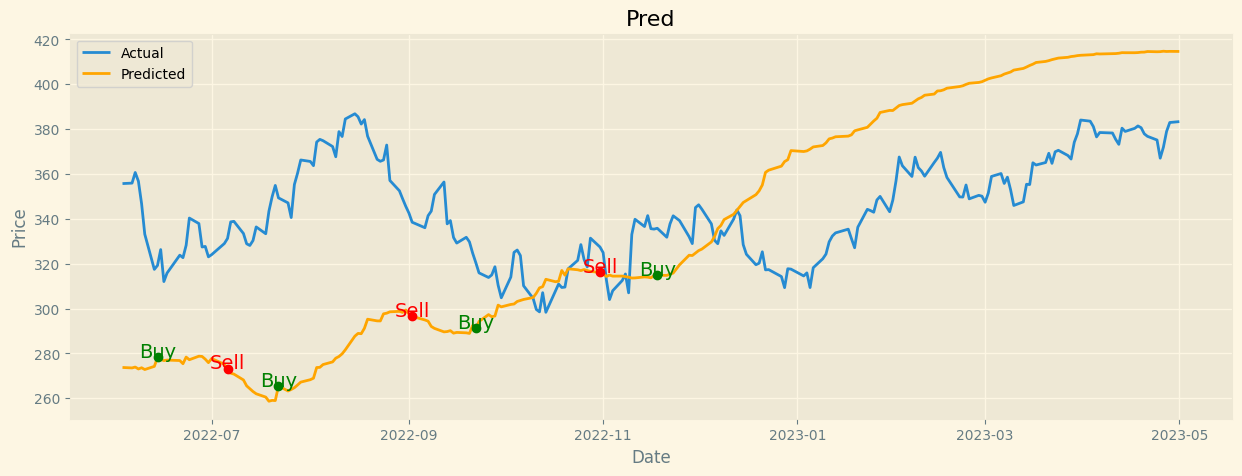

In [2]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(None, 2)), # where 2 is the number of features
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
        ]
    )

# model.save_weights(f'{Env.PROJECT_ROOT}/models_trained/keep/my_model_weights.h5')
grid_search_service = TFMTS(model, config)
grid_search_service.grid_search(logger)